In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
train_df = pd.read_csv('Oil_train.csv')
test_df = pd.read_csv('Oil_test.csv')

In [3]:
train_df.head()

ID  month  country  1_diffClosing stocks(kmt)  1_diffExports(kmt)  \
0  ID04188      6       46                     0.0000              0.0000   
1  ID02229      8       73                  -117.0000              0.0000   
2  ID01116      3        7                     0.0000            601.0000   
3  ID06858      9       27                    98.0000            -69.0000   
4  ID02754      6        3                    16.7135            112.2191   

   1_diffImports(kmt)  1_diffRefinery intake(kmt)  1_diffWTI  \
0              0.0000                      0.0000       2.62   
1           -125.0000                      6.0000      -7.40   
2            954.0000                      0.0000       0.65   
3            499.0000                    865.0000       3.04   
4              1.4045                     19.9439      12.16   

   1_diffSumClosing stocks(kmt)  1_diffSumExports(kmt)  ...  \
0                     7069.8310             -3216.1655  ...   
1                    -4477.9738              -675.9654  ...   
2                    11955.6239              2183.3548  ...   
3                    -3143.2323              -566.6417  ...   
4                      830.1912               269.7015  ...   

   12_diffExports(kmt)  12_diffImports(kmt)  12_diffRefinery intake(kmt)  \
0               0.0000                  0.0                       0.0000   
1               0.0000                  2.0                       6.0000   
2              73.0000                 33.0                       0.0000   
3               0.0000               -680.0                     104.0000   
4             142.5562                  0.0                     290.0281   

   12_diffWTI  12_diffSumClosing stocks(kmt)  12_diffSumExports(kmt)  \
0        9.09                      9341.6818               7186.3975   
1      -18.37                      1158.2971               5592.9500   
2       -5.80                     -5886.7599               6490.3996   
3        4.43                     -2504.4632             -11151.8836   
4        5.49                    -24272.1488              10527.6510   

   12_diffSumImports(kmt)  12_diffSumProduction(kmt)  \
0              22441.0501                 21649.3543   
1               7813.3317                  6655.9429   
2              21534.4067                  2257.4031   
3              -9154.3416                -10931.2210   
4              16947.2945                 28844.2150   

   12_diffSumRefinery intake(kmt)  Target  
0                      27000.5446       0  
1                      13708.0310       0  
2                      14769.6373       1  
3                       2850.7985       0  
4                      22691.3429       0  

[5 rows x 124 columns]

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7619 entries, 0 to 7618
Columns: 124 entries, ID to Target
dtypes: float64(120), int64(3), object(1)
memory usage: 7.2+ MB


In [5]:
train_df.drop('ID', axis = 1, inplace = True)

In [6]:
train_df['Target'].value_counts()

0    4985
1    2634
Name: Target, dtype: int64

In [7]:
train_df['month'].value_counts()

4     696
5     666
11    646
9     642
7     642
8     634
10    633
6     625
3     617
12    609
1     607
2     602
Name: month, dtype: int64

In [8]:
train_df['country'].value_counts()

49    111
71    109
72    108
64    108
30    108
     ... 
50     93
52     93
22     92
19     90
9      89
Name: country, Length: 76, dtype: int64

In [9]:
train_df.isna().sum()

month                               0
country                             0
1_diffClosing stocks(kmt)         198
1_diffExports(kmt)                  0
1_diffImports(kmt)                114
                                 ... 
12_diffSumExports(kmt)              0
12_diffSumImports(kmt)              0
12_diffSumProduction(kmt)           0
12_diffSumRefinery intake(kmt)      0
Target                              0
Length: 123, dtype: int64

In [10]:
train_df['1_diffClosing stocks(kmt)'].fillna(train_df['1_diffClosing stocks(kmt)'].median(), inplace = True)
train_df['1_diffImports(kmt)'].fillna(train_df['1_diffImports(kmt)'].median(), inplace = True)

In [11]:
train_df = train_df.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [12]:
train_df.isna().sum()

month                             0
country                           0
1_diffClosing stocks(kmt)         0
1_diffExports(kmt)                0
1_diffImports(kmt)                0
                                 ..
12_diffSumExports(kmt)            0
12_diffSumImports(kmt)            0
12_diffSumProduction(kmt)         0
12_diffSumRefinery intake(kmt)    0
Target                            0
Length: 123, dtype: int64

<AxesSubplot:xlabel='country', ylabel='month'>

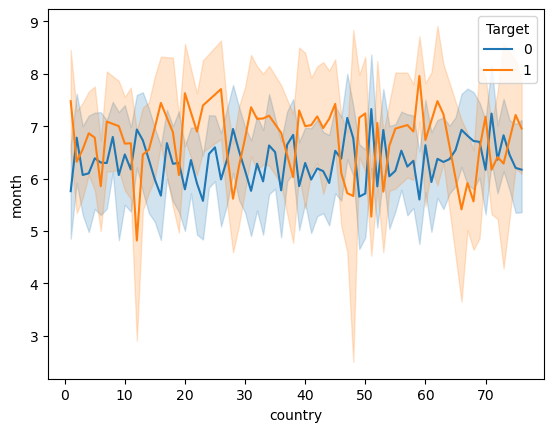

In [13]:
sns.lineplot(data = train_df, x = 'country', y = 'month', hue = 'Target')

<AxesSubplot:xlabel='Target', ylabel='month'>

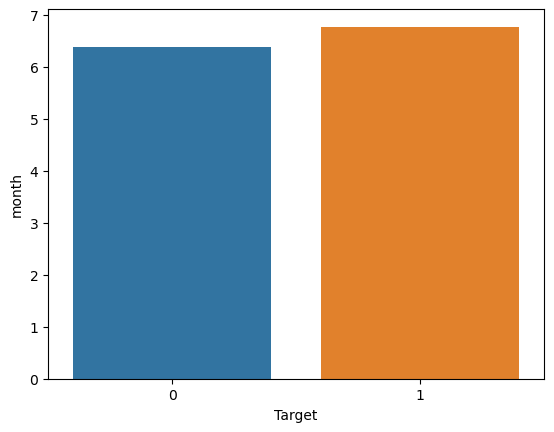

In [14]:
sns.barplot(data = train_df, x = 'Target', y = 'month', ci = None)

<AxesSubplot:xlabel='Target', ylabel='country'>

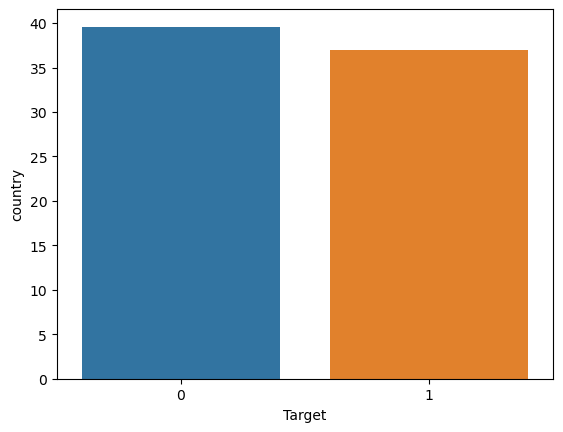

In [15]:
sns.barplot(data = train_df, x = 'Target', y = 'country', ci = None)

In [16]:
train_df.drop('month', axis = 1, inplace = True)

1_diffClosing stocks(kmt)


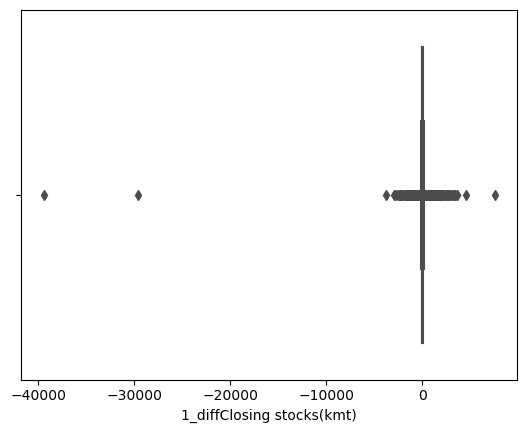

1_diffExports(kmt)


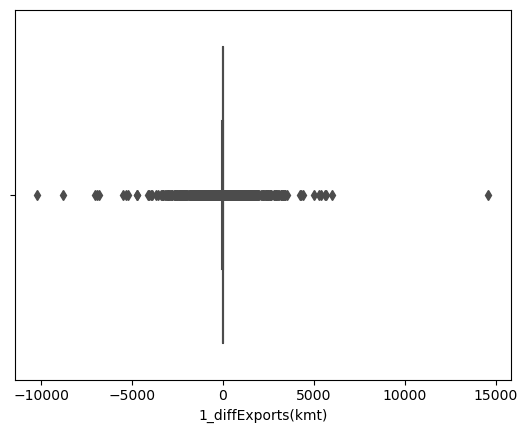

1_diffImports(kmt)


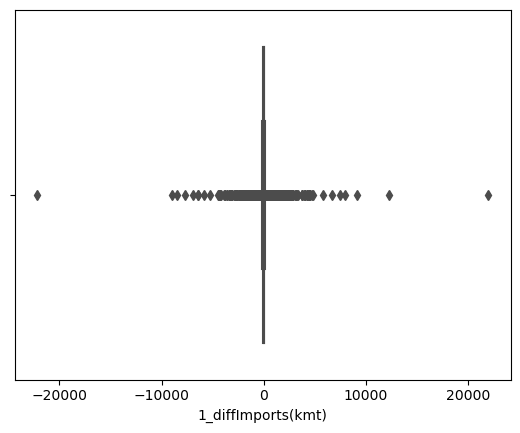

1_diffRefinery intake(kmt)


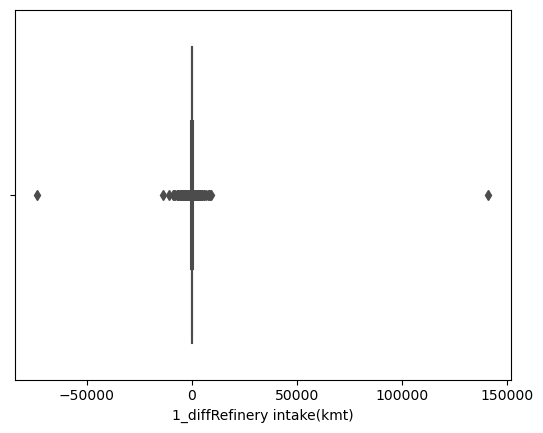

1_diffWTI


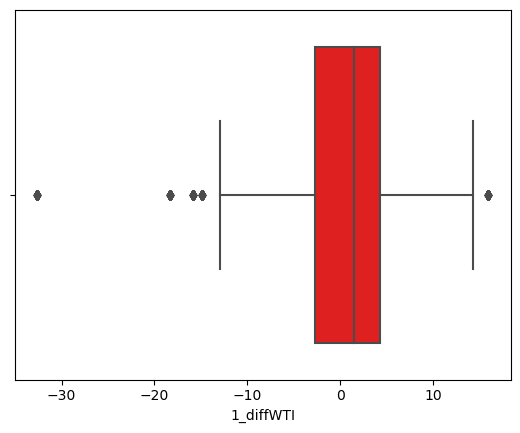

1_diffSumClosing stocks(kmt)


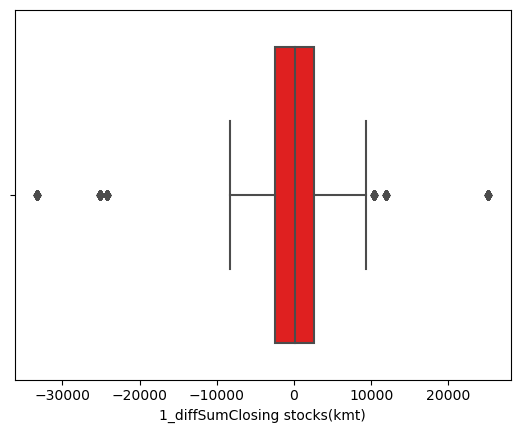

1_diffSumExports(kmt)


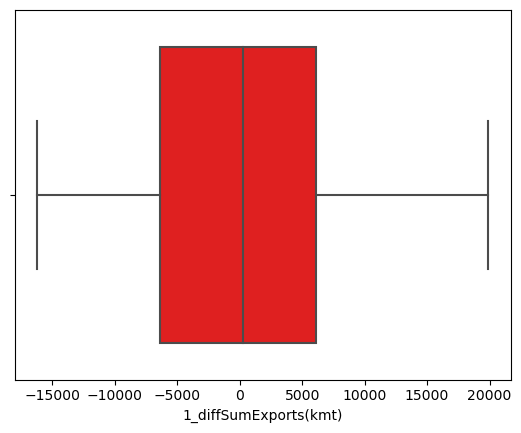

1_diffSumImports(kmt)


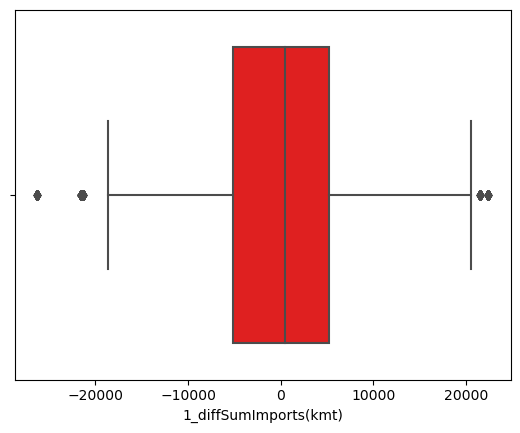

1_diffSumProduction(kmt)


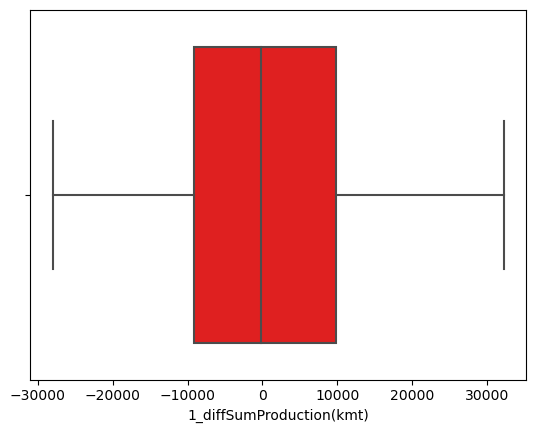

1_diffSumRefinery intake(kmt)


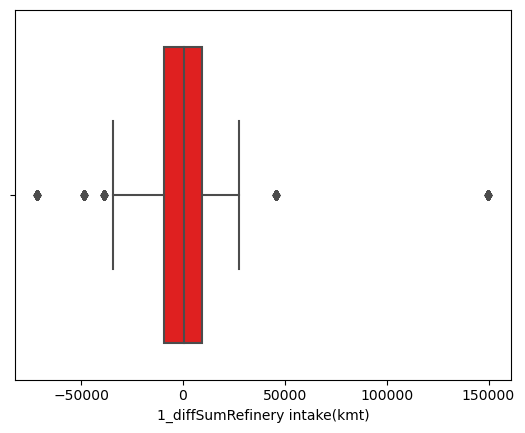

2_diffClosing stocks(kmt)


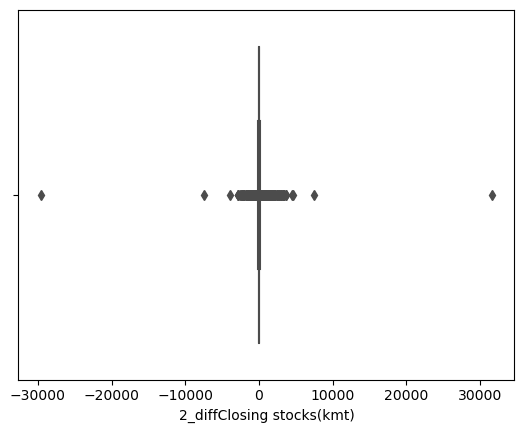

2_diffExports(kmt)


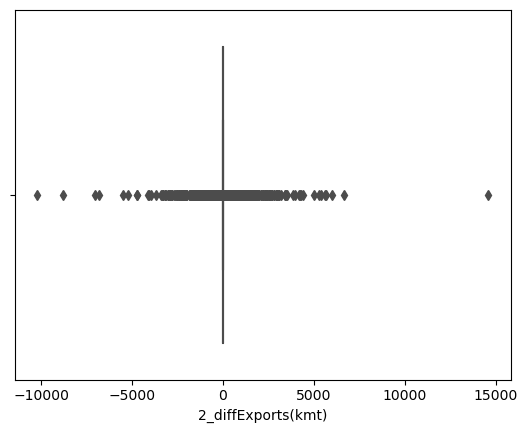

2_diffImports(kmt)


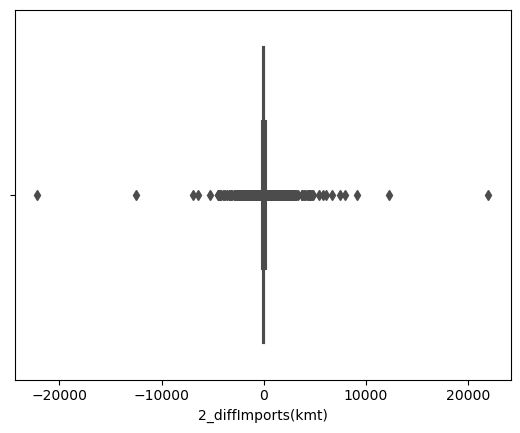

2_diffRefinery intake(kmt)


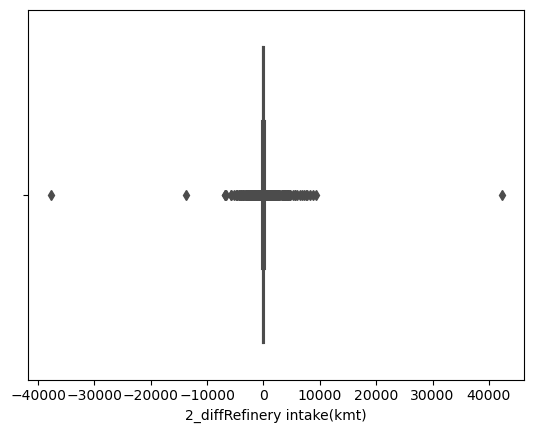

2_diffWTI


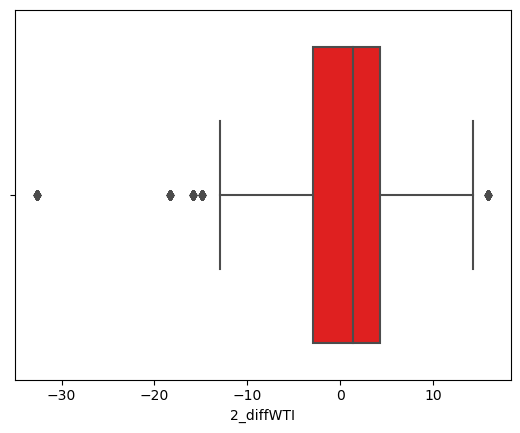

2_diffSumClosing stocks(kmt)


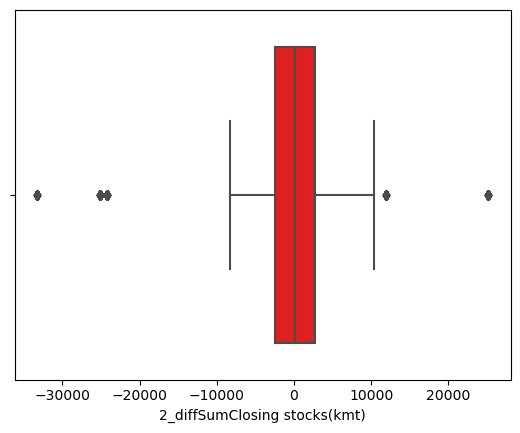

2_diffSumExports(kmt)


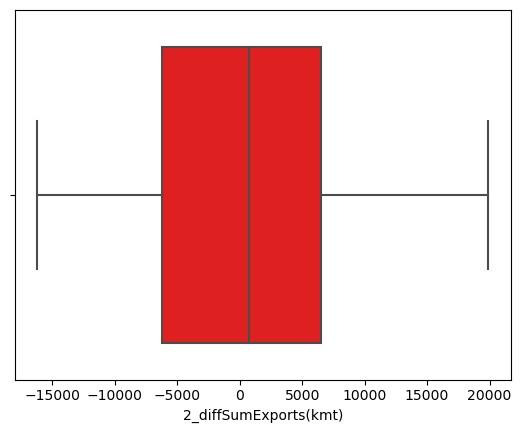

2_diffSumImports(kmt)


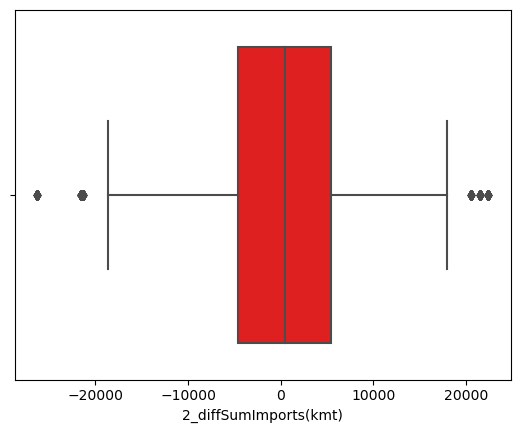

2_diffSumProduction(kmt)


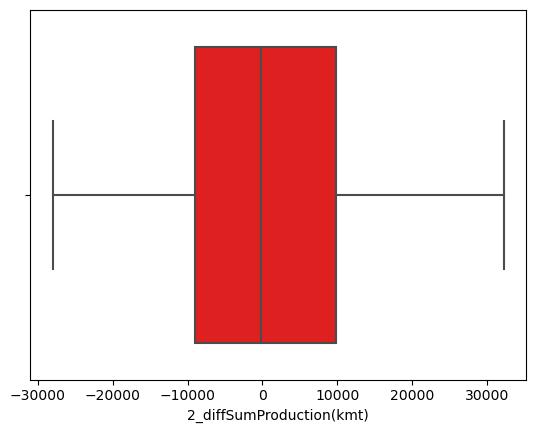

2_diffSumRefinery intake(kmt)


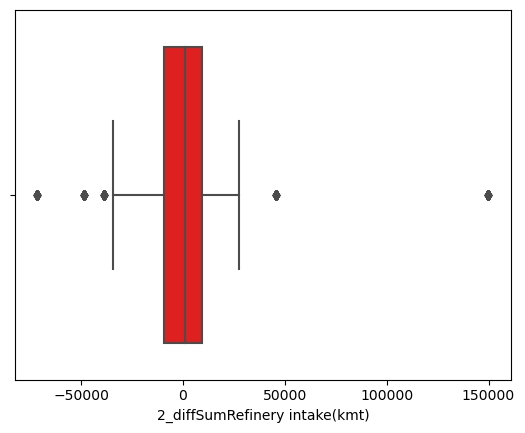

3_diffClosing stocks(kmt)


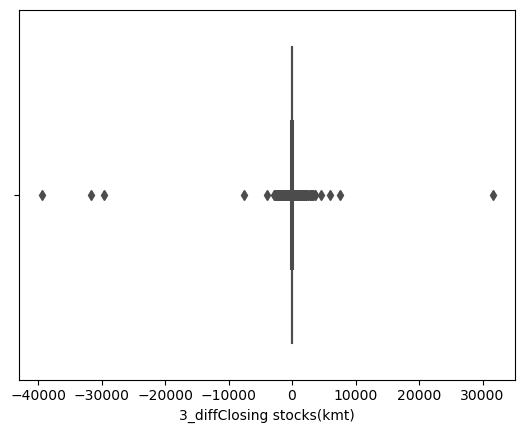

3_diffExports(kmt)


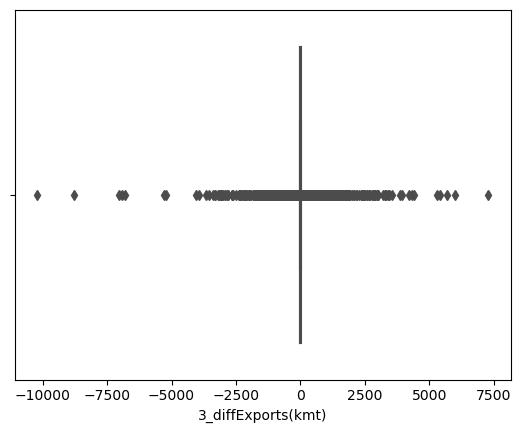

3_diffImports(kmt)


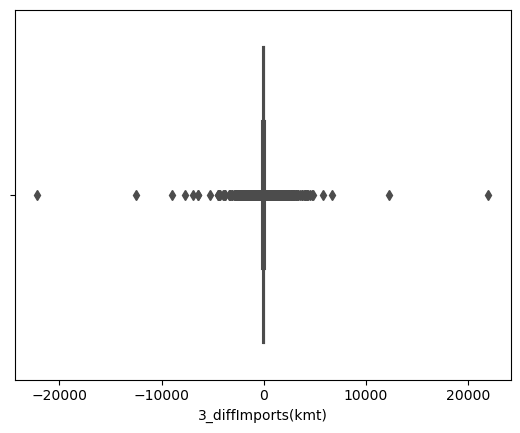

3_diffRefinery intake(kmt)


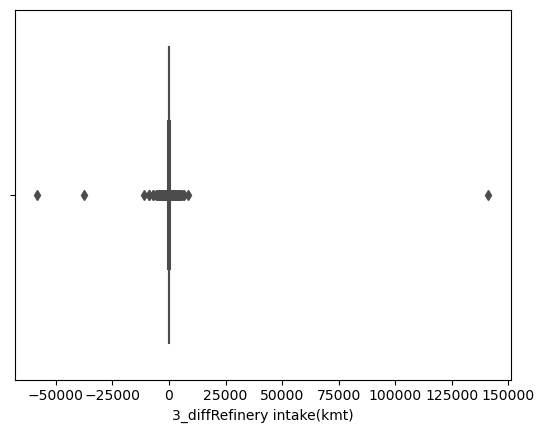

3_diffWTI


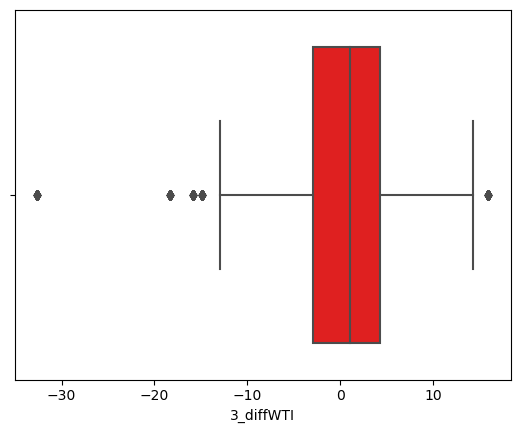

3_diffSumClosing stocks(kmt)


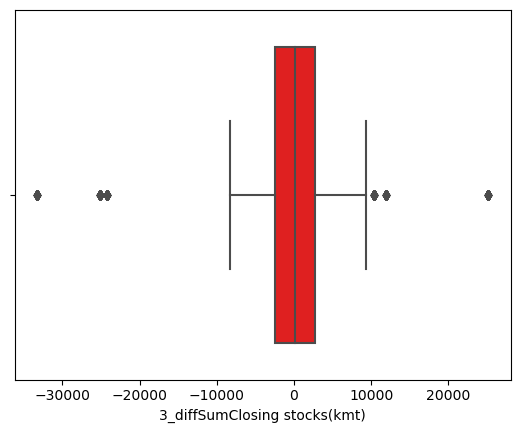

3_diffSumExports(kmt)


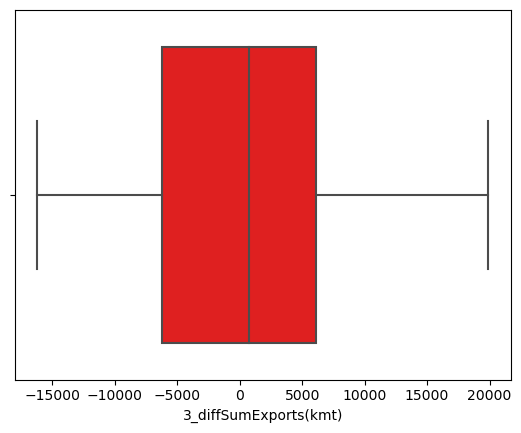

3_diffSumImports(kmt)


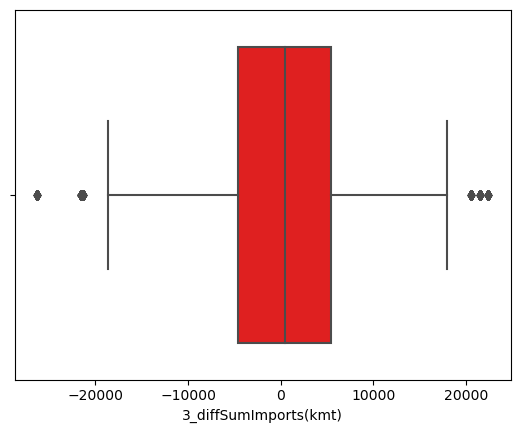

3_diffSumProduction(kmt)


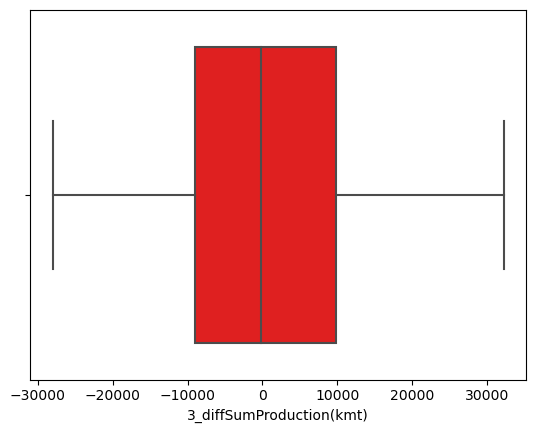

3_diffSumRefinery intake(kmt)


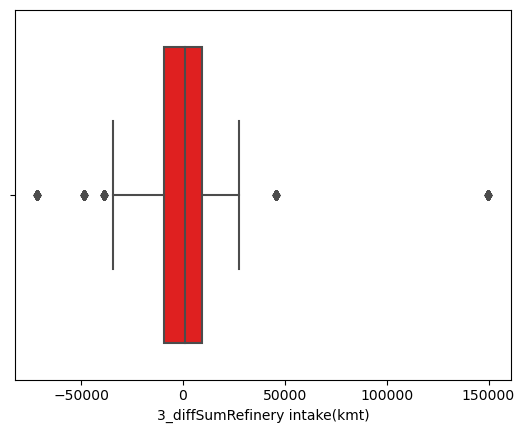

4_diffClosing stocks(kmt)


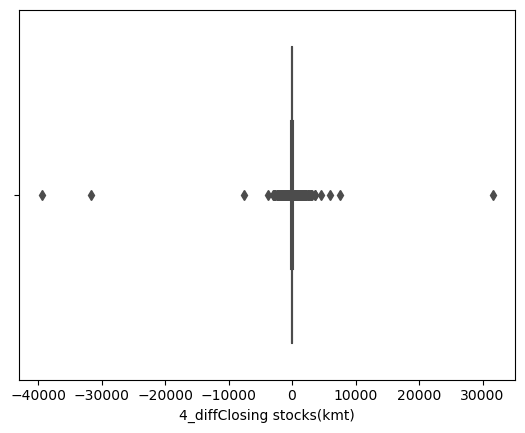

4_diffExports(kmt)


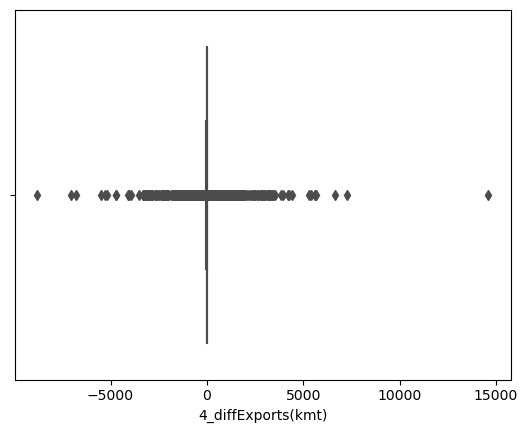

4_diffImports(kmt)


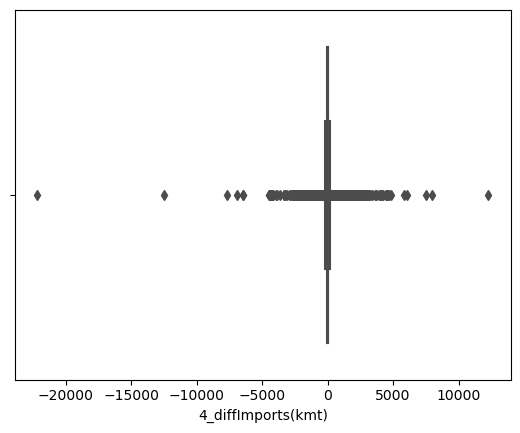

4_diffRefinery intake(kmt)


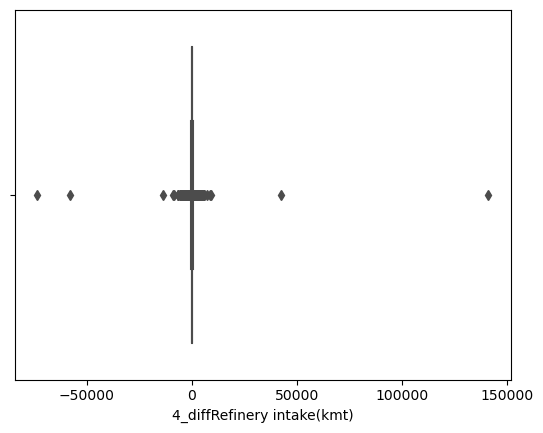

4_diffWTI


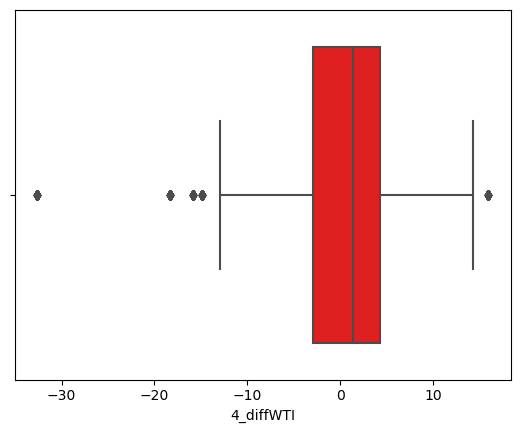

4_diffSumClosing stocks(kmt)


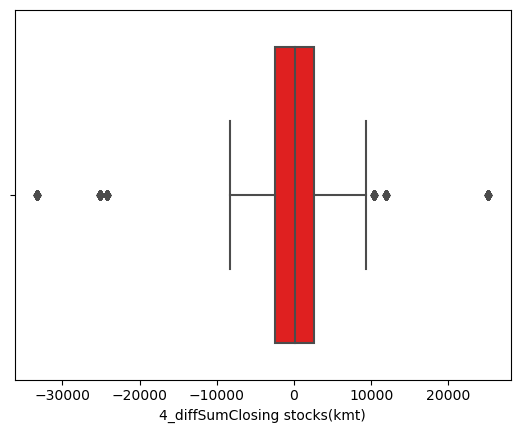

4_diffSumExports(kmt)


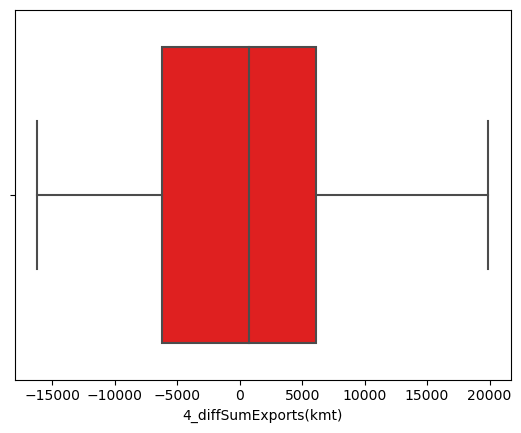

4_diffSumImports(kmt)


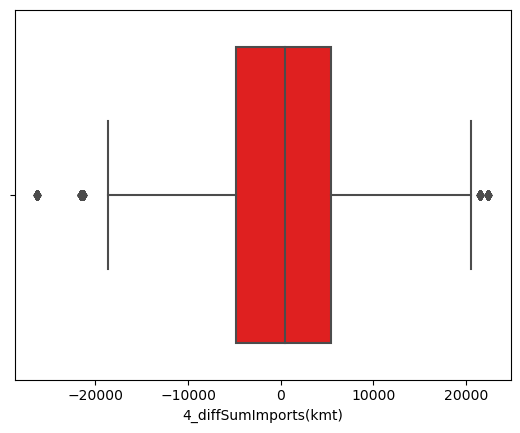

4_diffSumProduction(kmt)


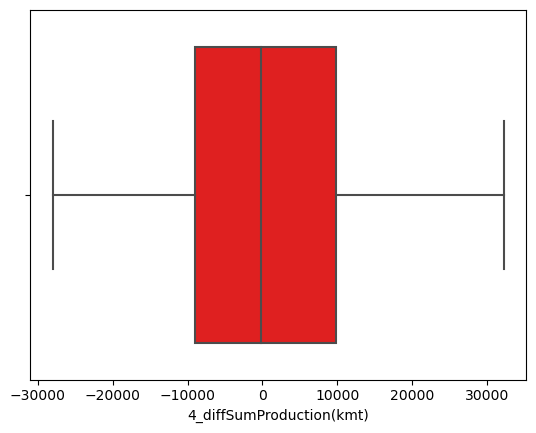

4_diffSumRefinery intake(kmt)


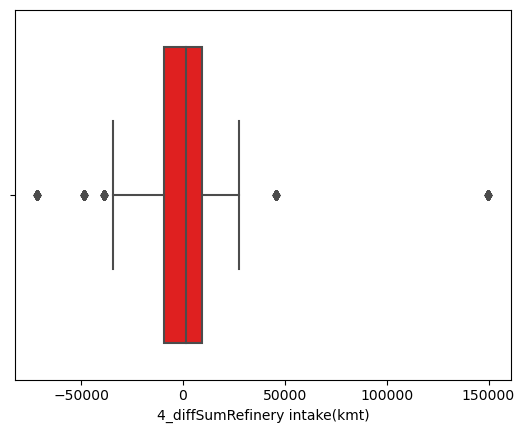

5_diffClosing stocks(kmt)


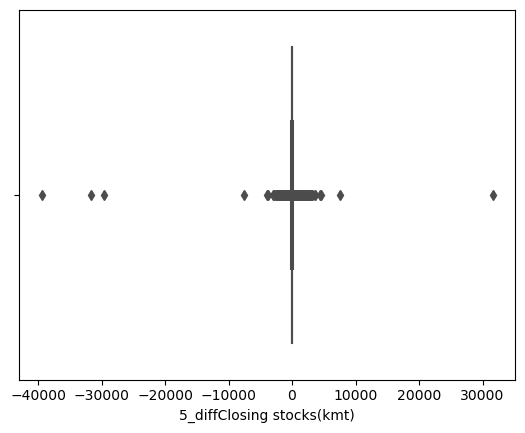

5_diffExports(kmt)


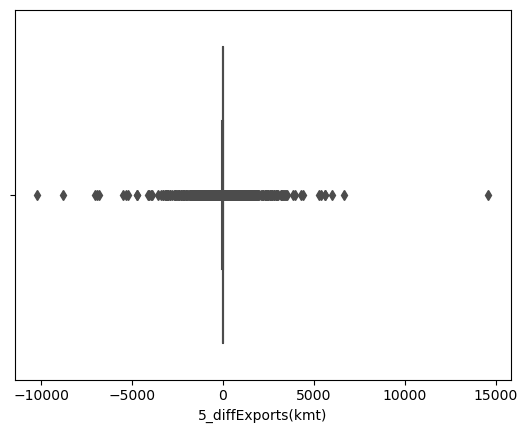

5_diffImports(kmt)


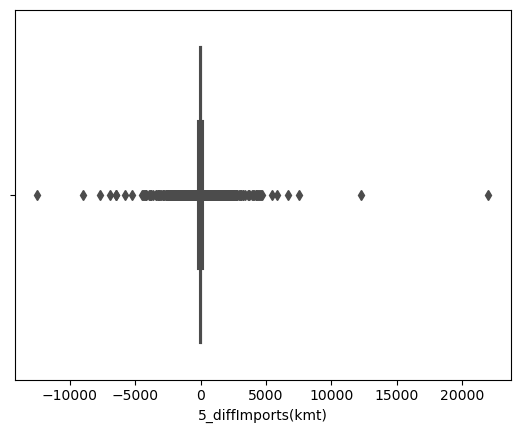

5_diffRefinery intake(kmt)


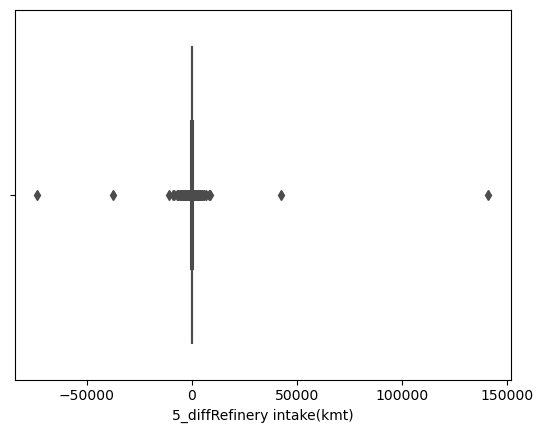

5_diffWTI


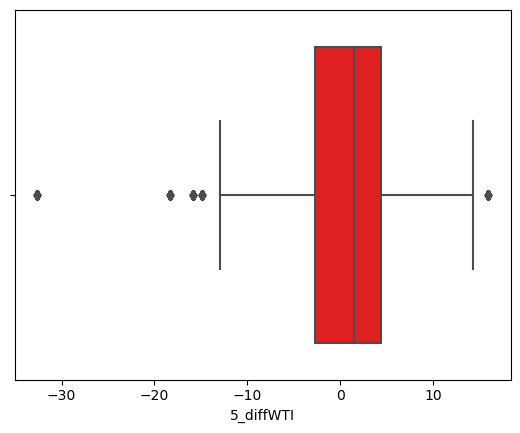

5_diffSumClosing stocks(kmt)


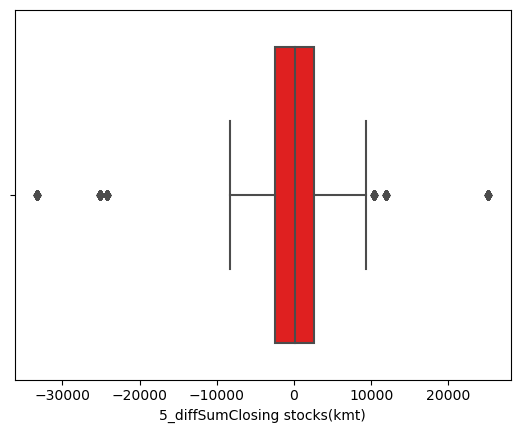

5_diffSumExports(kmt)


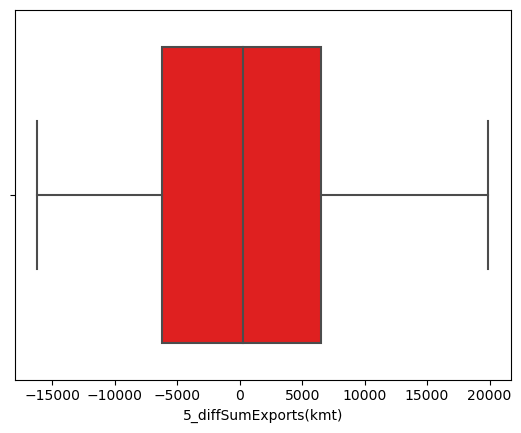

5_diffSumImports(kmt)


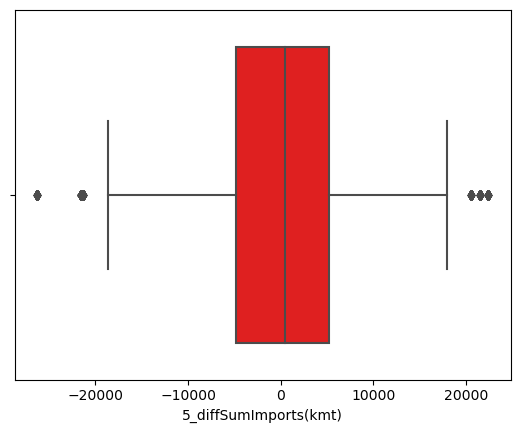

5_diffSumProduction(kmt)


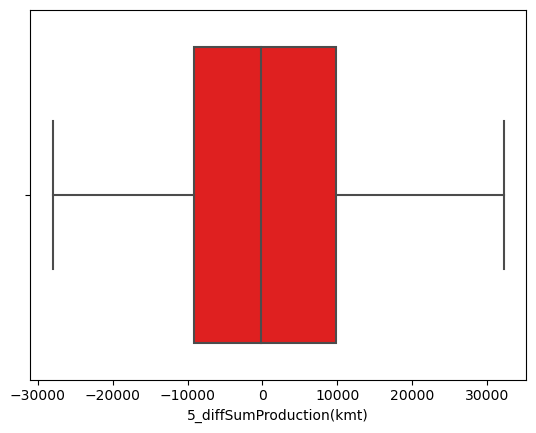

5_diffSumRefinery intake(kmt)


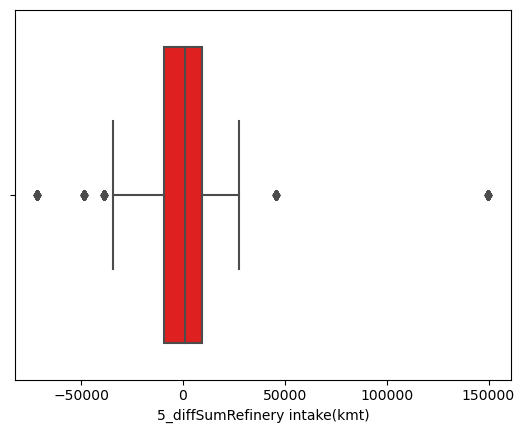

6_diffClosing stocks(kmt)


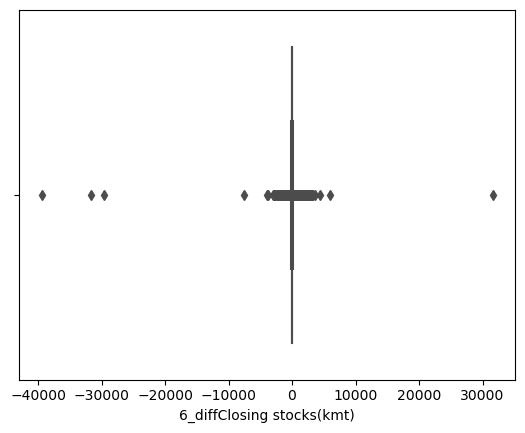

6_diffExports(kmt)


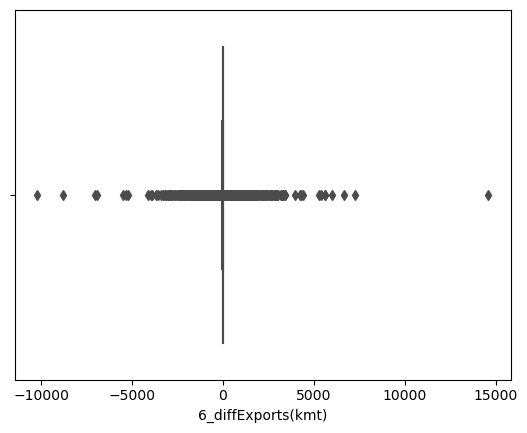

6_diffImports(kmt)


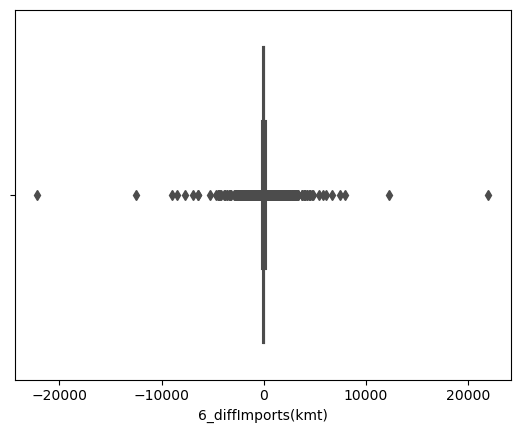

6_diffRefinery intake(kmt)


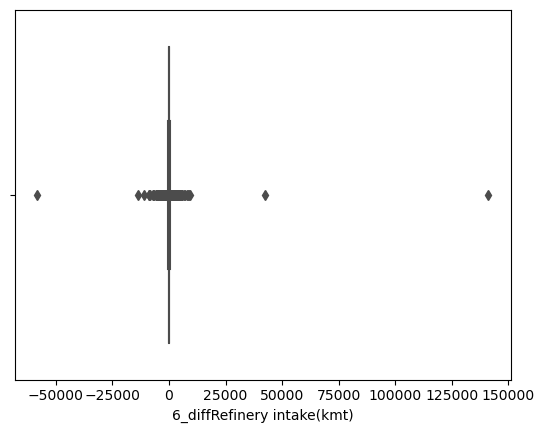

6_diffWTI


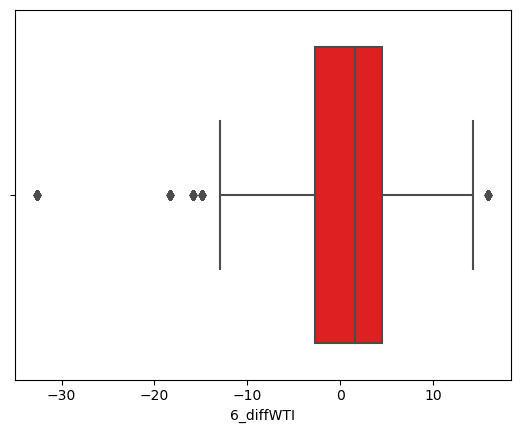

6_diffSumClosing stocks(kmt)


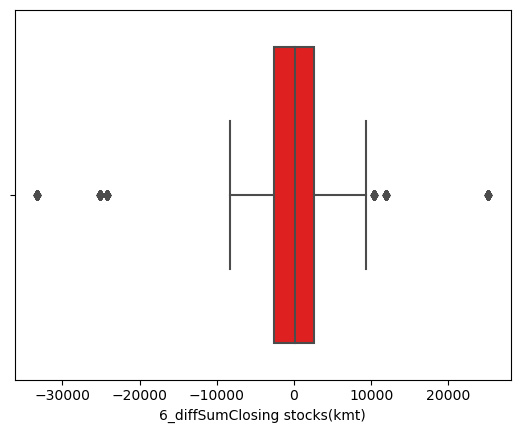

6_diffSumExports(kmt)


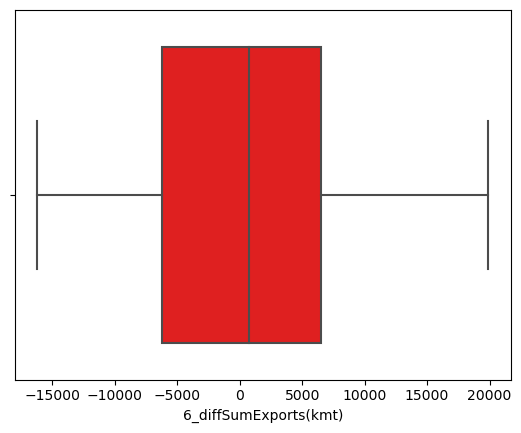

6_diffSumImports(kmt)


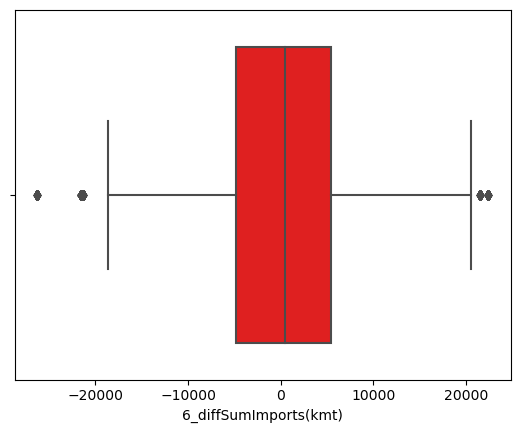

6_diffSumProduction(kmt)


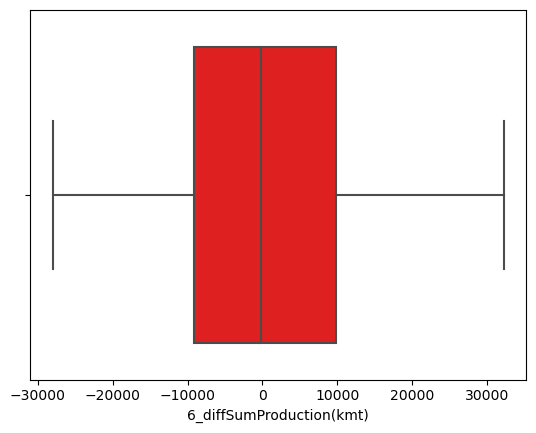

6_diffSumRefinery intake(kmt)


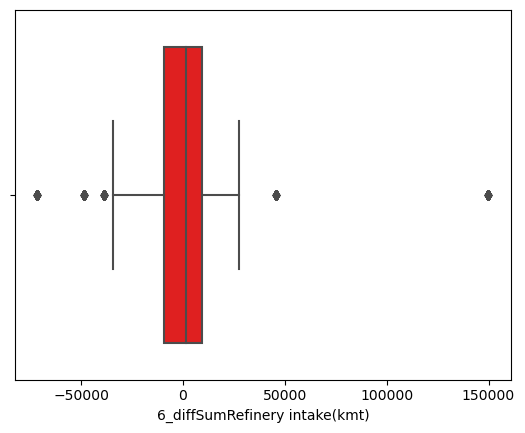

7_diffClosing stocks(kmt)


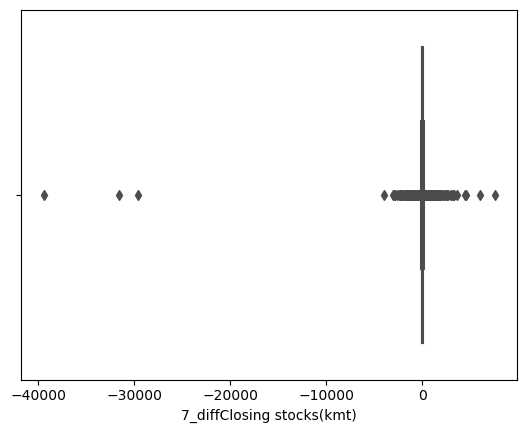

7_diffExports(kmt)


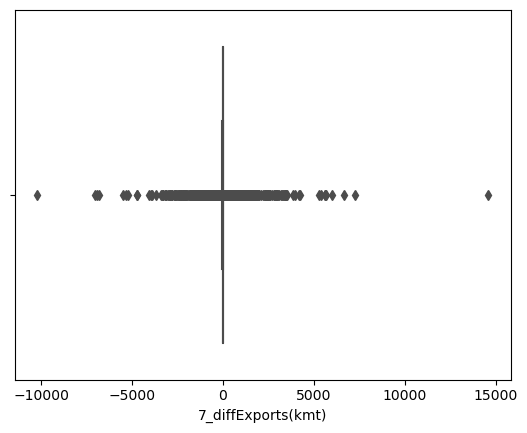

7_diffImports(kmt)


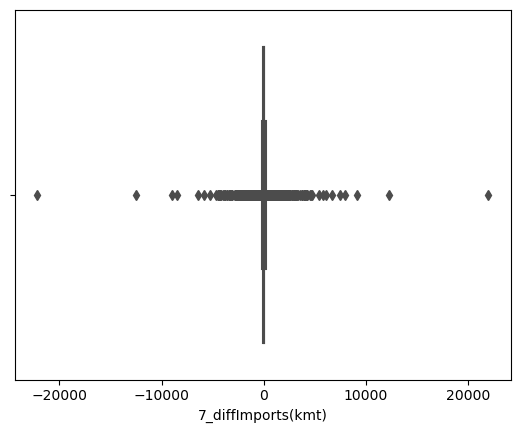

7_diffRefinery intake(kmt)


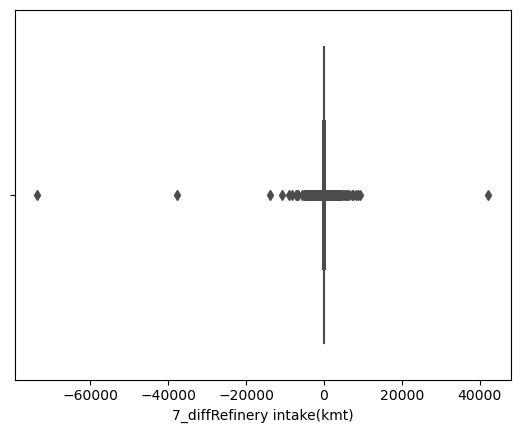

7_diffWTI


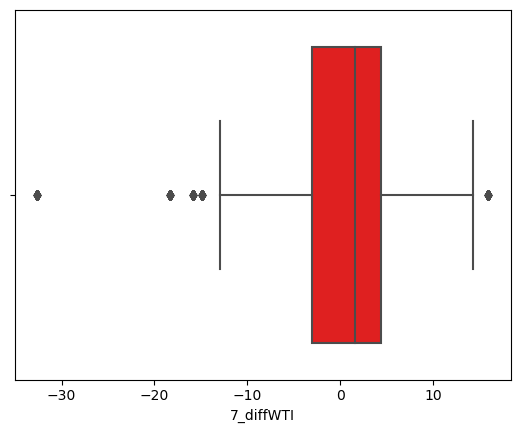

7_diffSumClosing stocks(kmt)


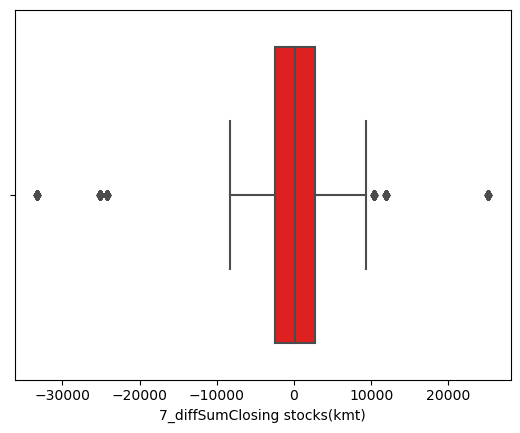

7_diffSumExports(kmt)


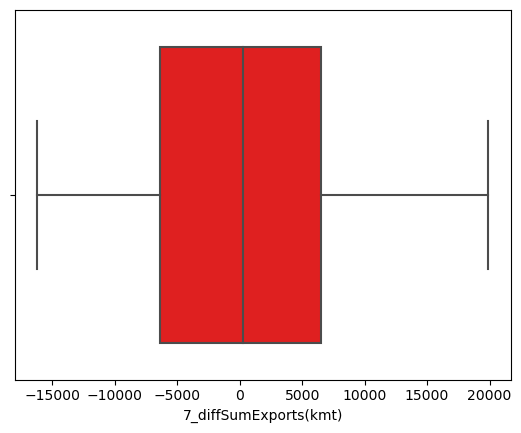

7_diffSumImports(kmt)


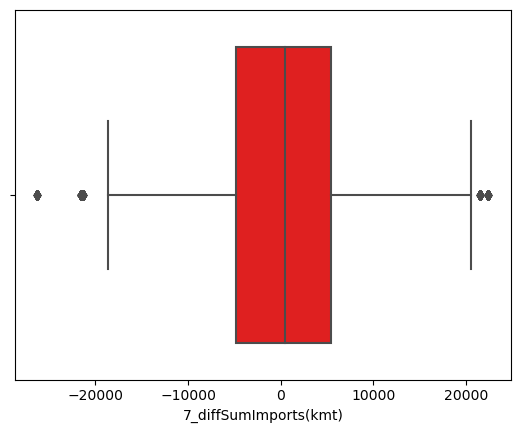

7_diffSumProduction(kmt)


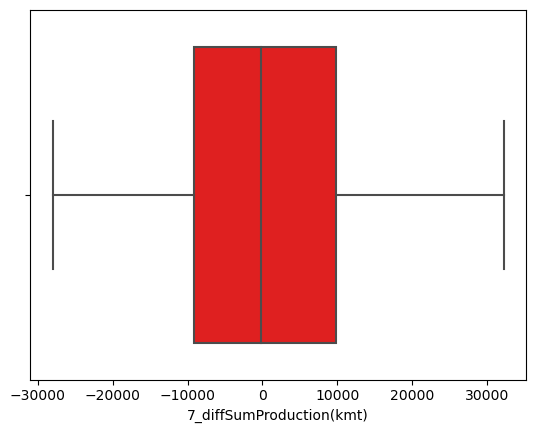

7_diffSumRefinery intake(kmt)


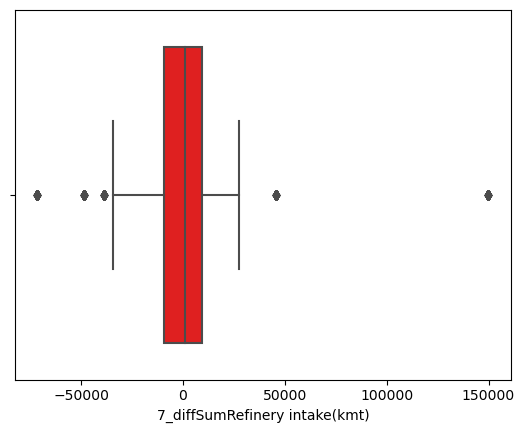

8_diffClosing stocks(kmt)


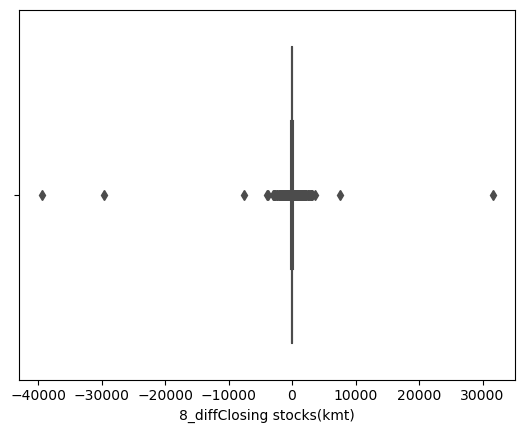

8_diffExports(kmt)


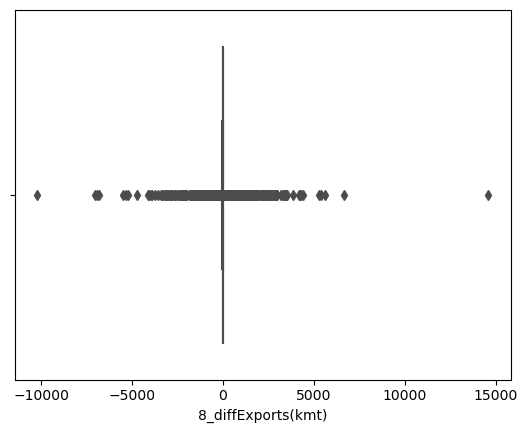

8_diffImports(kmt)


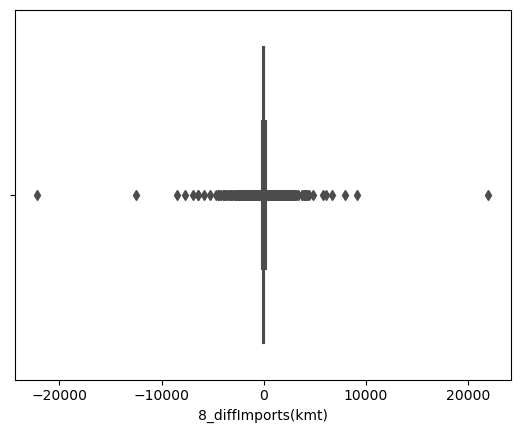

8_diffRefinery intake(kmt)


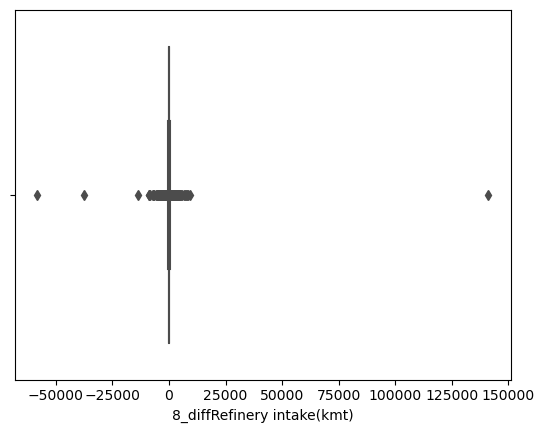

8_diffWTI


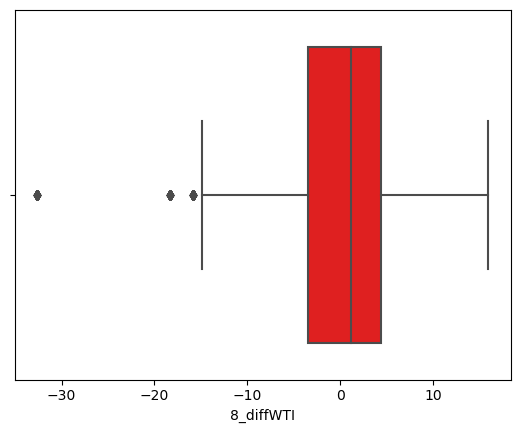

8_diffSumClosing stocks(kmt)


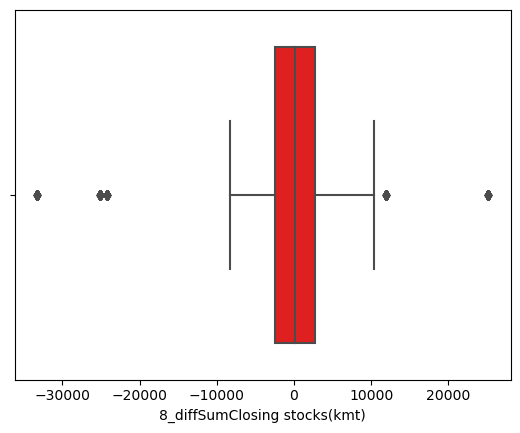

8_diffSumExports(kmt)


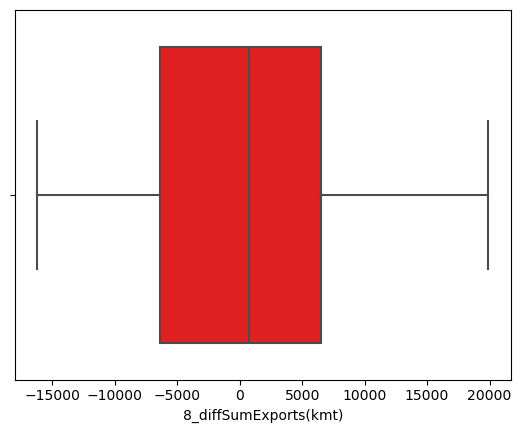

8_diffSumImports(kmt)


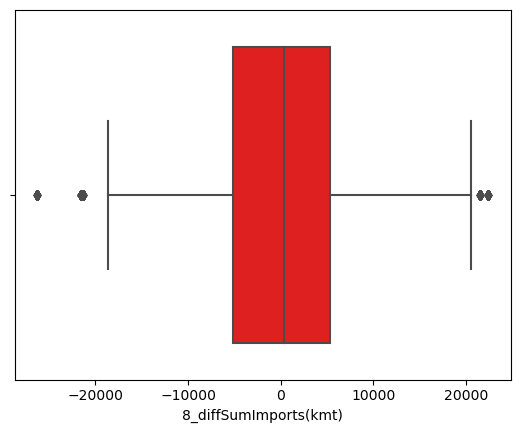

8_diffSumProduction(kmt)


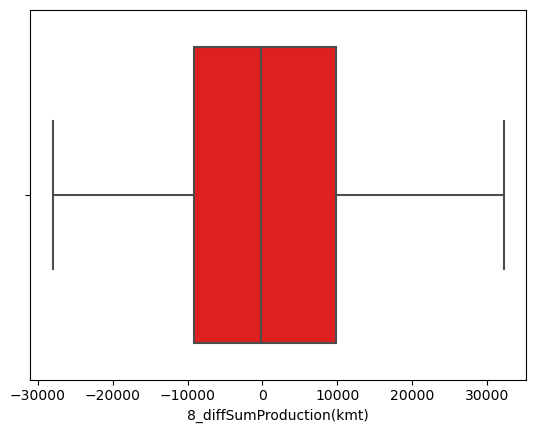

8_diffSumRefinery intake(kmt)


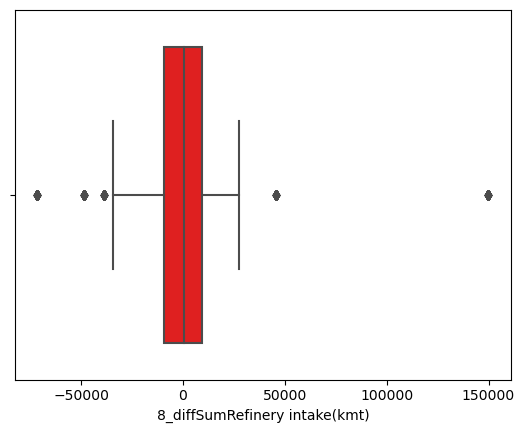

9_diffClosing stocks(kmt)


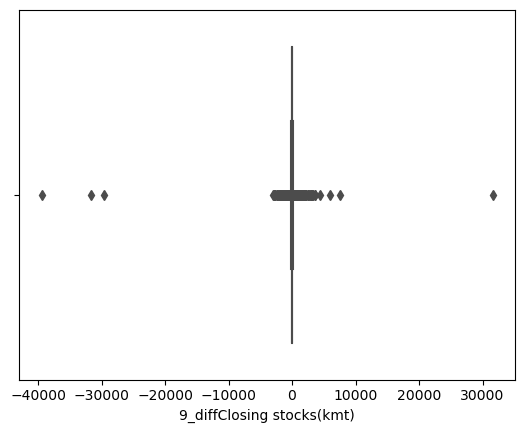

9_diffExports(kmt)


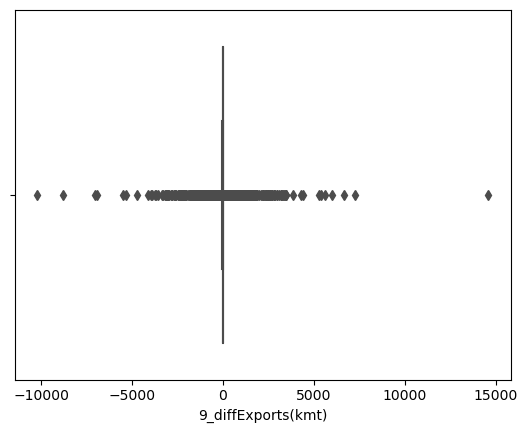

9_diffImports(kmt)


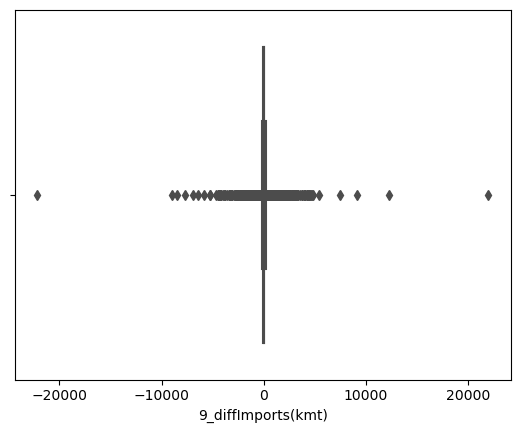

9_diffRefinery intake(kmt)


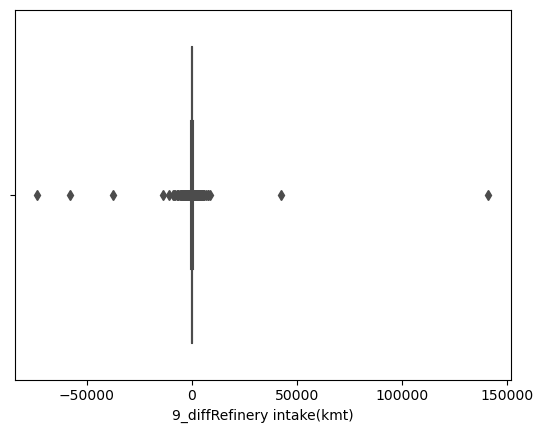

9_diffWTI


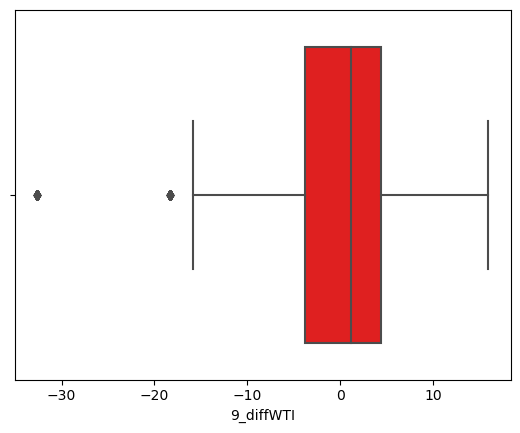

9_diffSumClosing stocks(kmt)


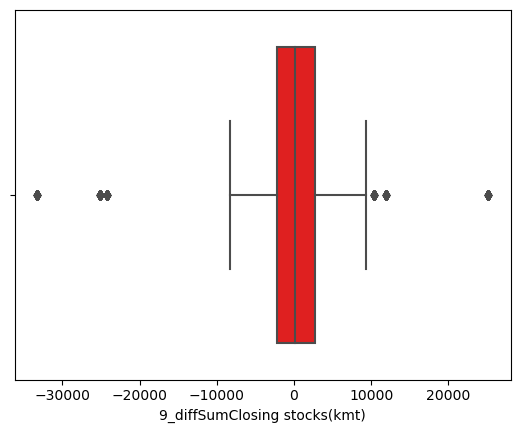

9_diffSumExports(kmt)


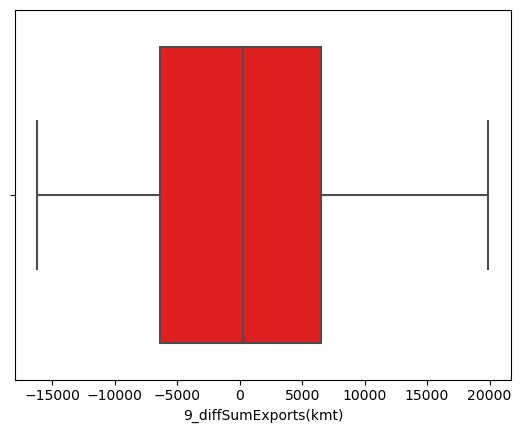

9_diffSumImports(kmt)


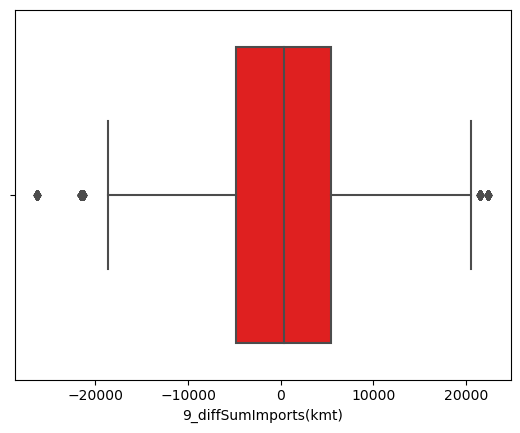

9_diffSumProduction(kmt)


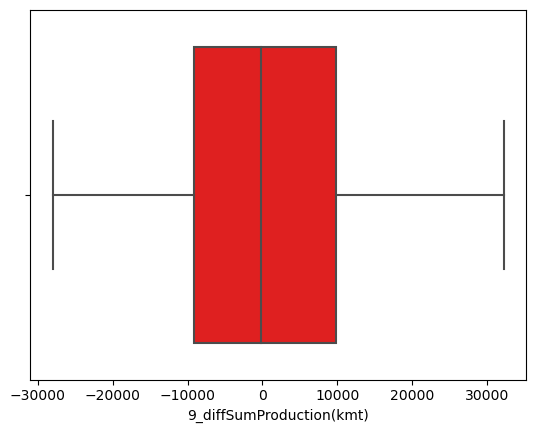

9_diffSumRefinery intake(kmt)


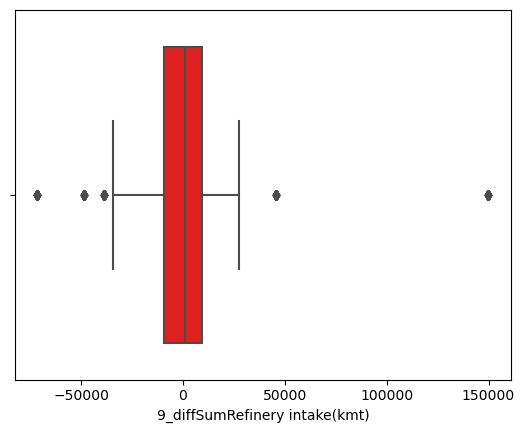

10_diffClosing stocks(kmt)


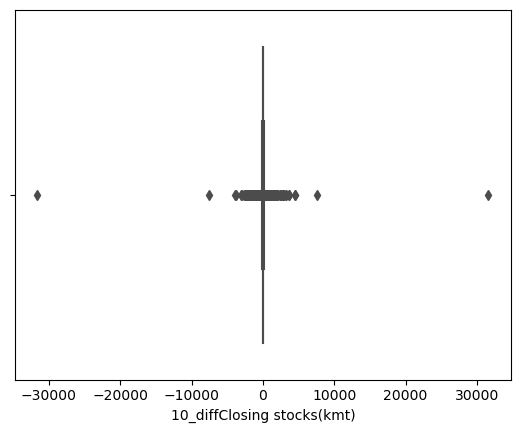

10_diffExports(kmt)


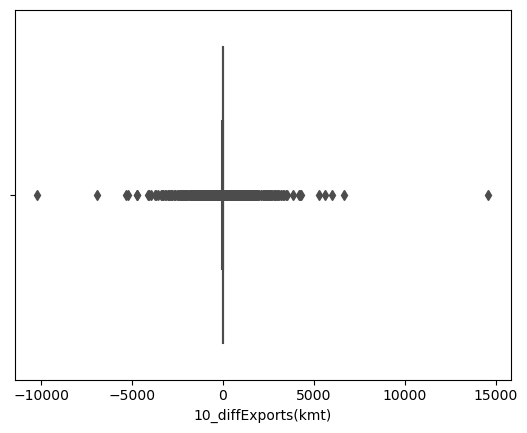

10_diffImports(kmt)


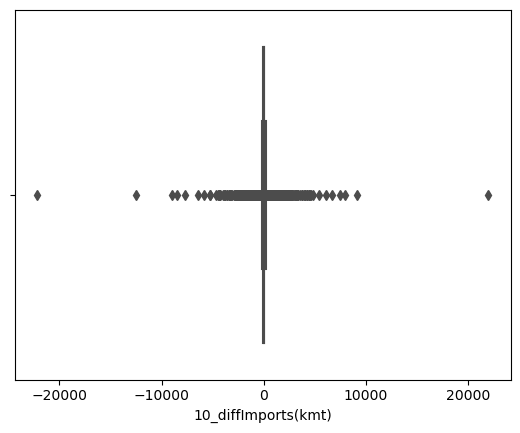

10_diffRefinery intake(kmt)


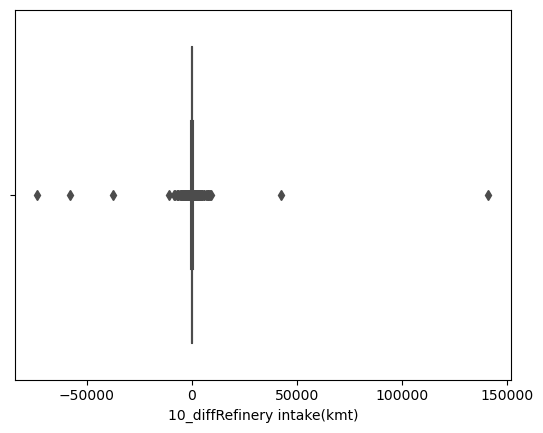

10_diffWTI


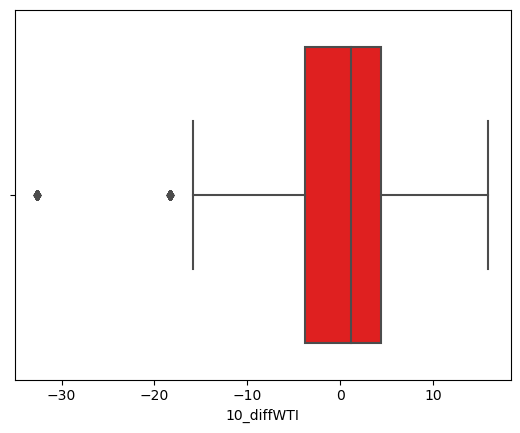

10_diffSumClosing stocks(kmt)


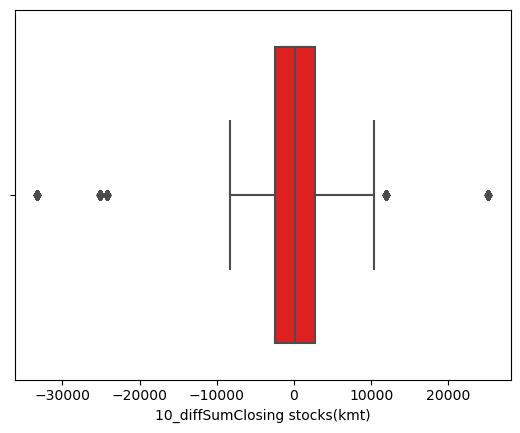

10_diffSumExports(kmt)


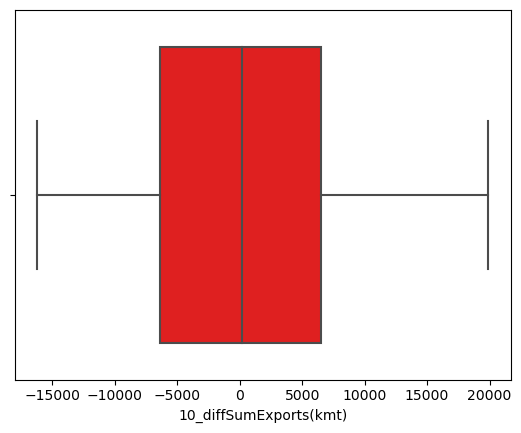

10_diffSumImports(kmt)


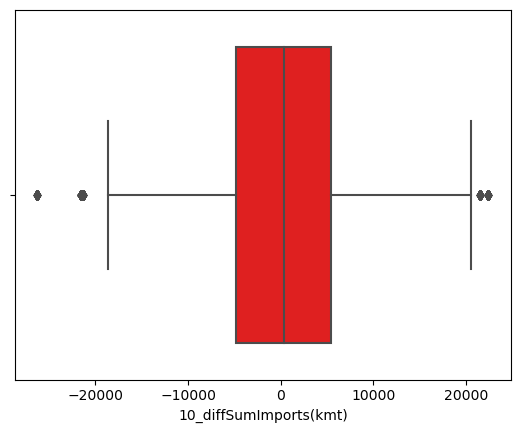

10_diffSumProduction(kmt)


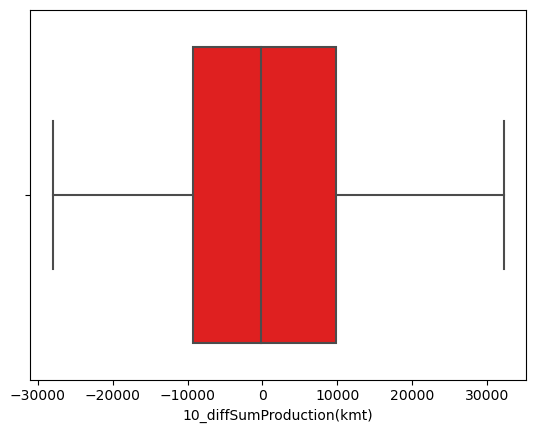

10_diffSumRefinery intake(kmt)


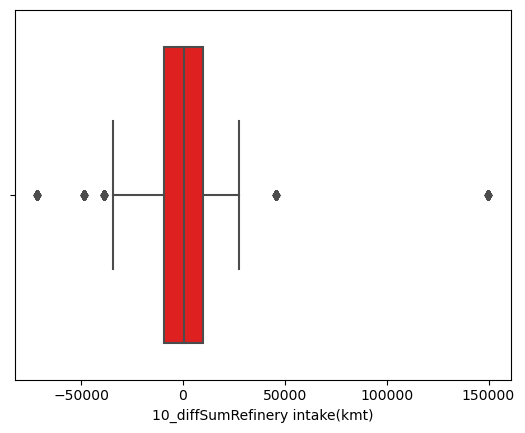

11_diffClosing stocks(kmt)


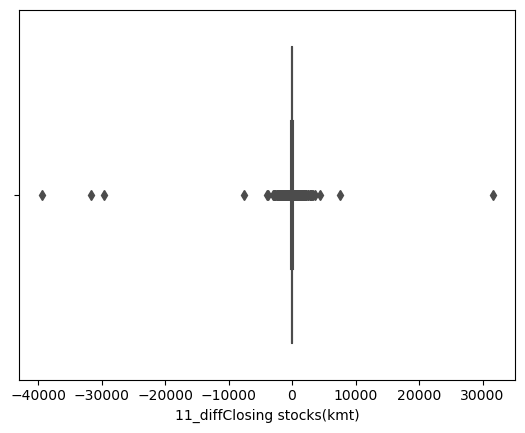

11_diffExports(kmt)


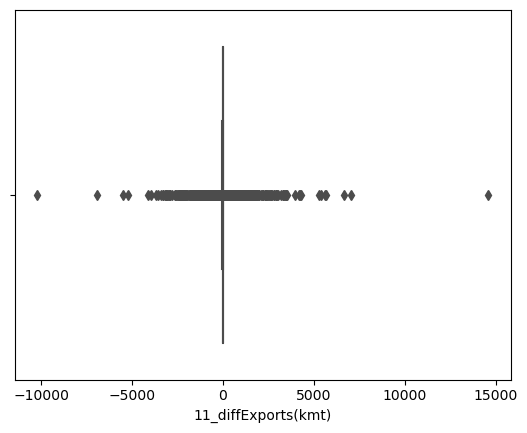

11_diffImports(kmt)


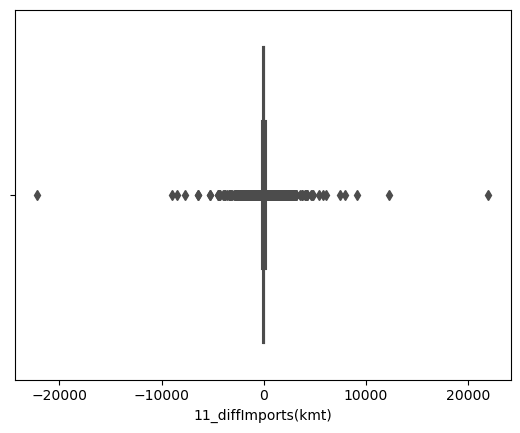

11_diffRefinery intake(kmt)


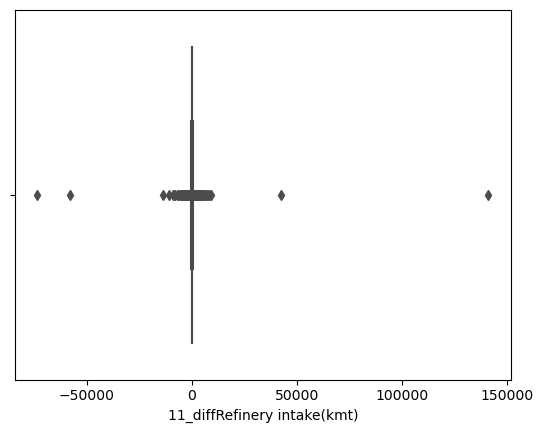

11_diffWTI


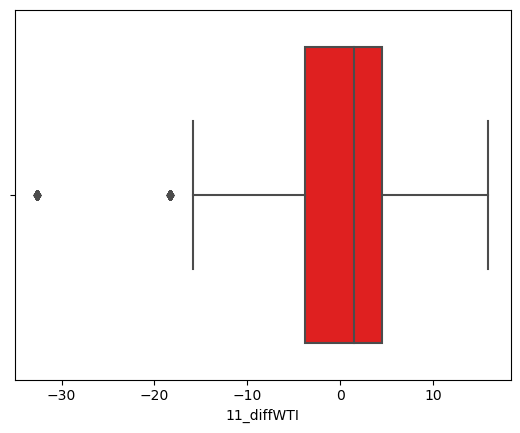

11_diffSumClosing stocks(kmt)


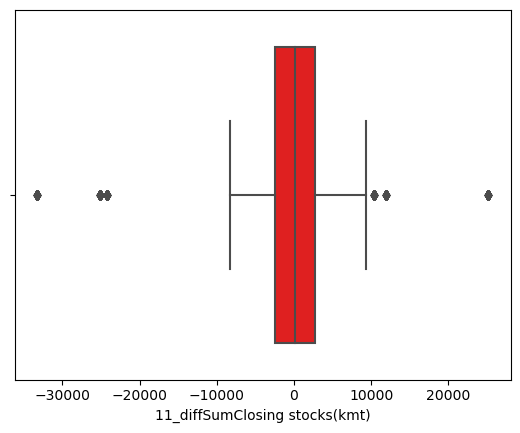

11_diffSumExports(kmt)


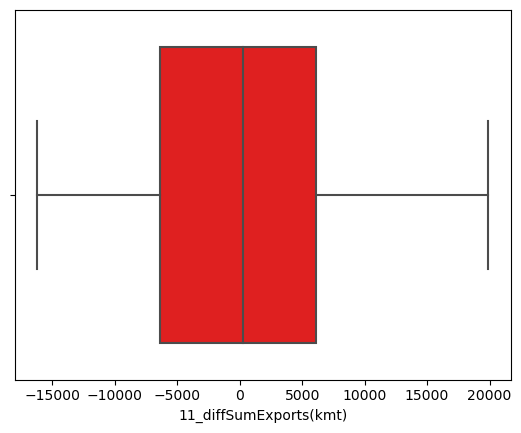

11_diffSumImports(kmt)


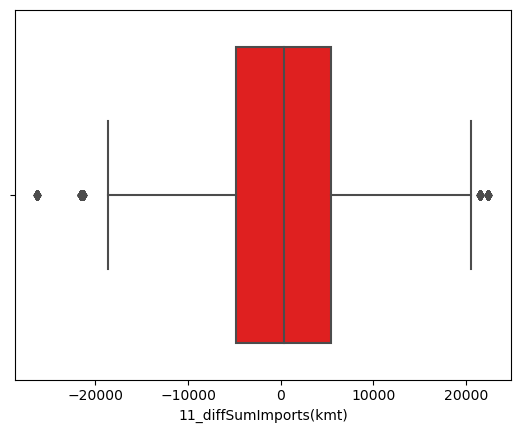

11_diffSumProduction(kmt)


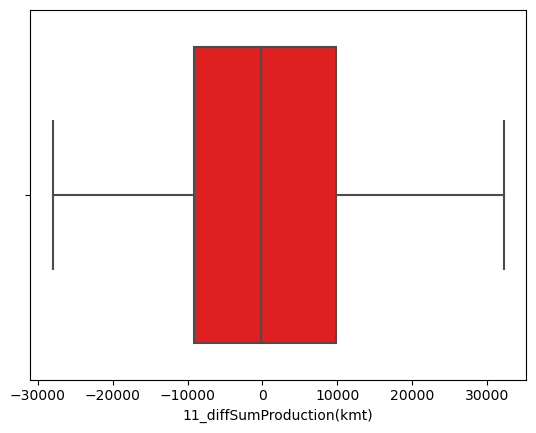

11_diffSumRefinery intake(kmt)


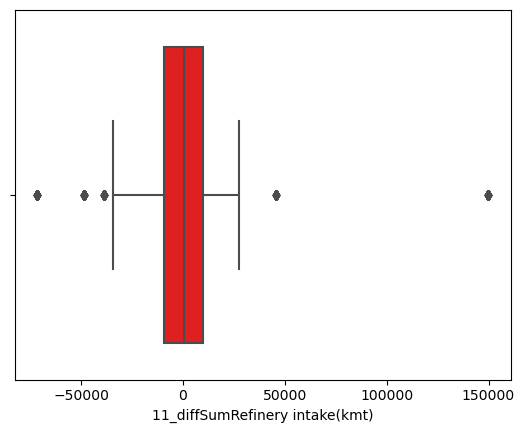

12_diffClosing stocks(kmt)


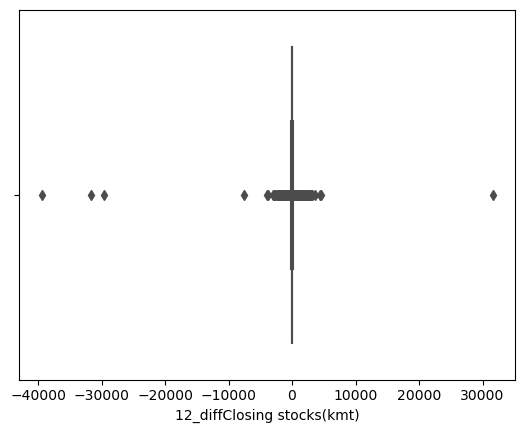

12_diffExports(kmt)


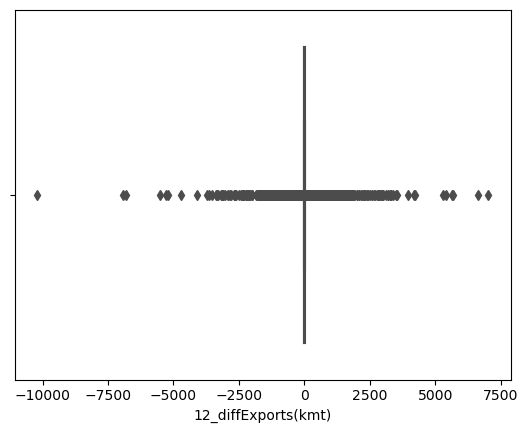

12_diffImports(kmt)


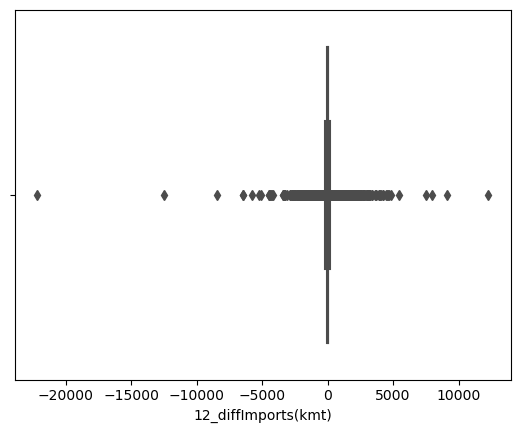

12_diffRefinery intake(kmt)


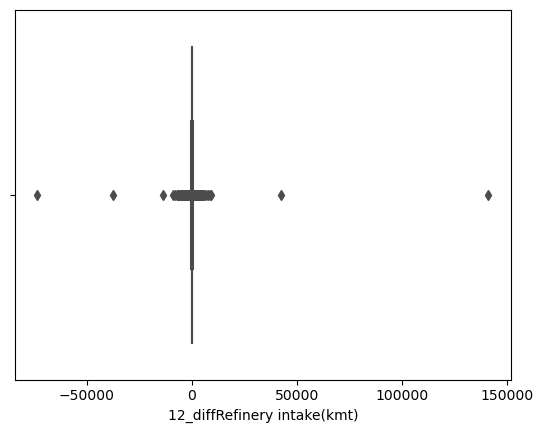

12_diffWTI


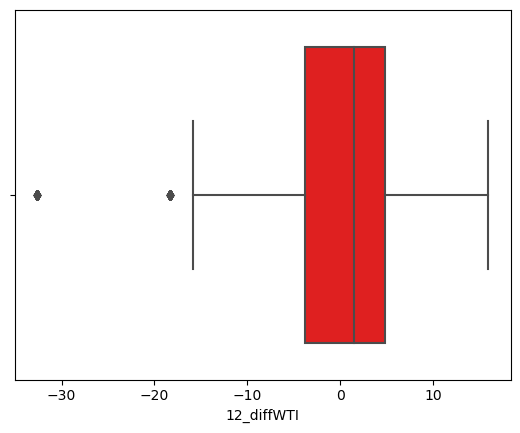

12_diffSumClosing stocks(kmt)


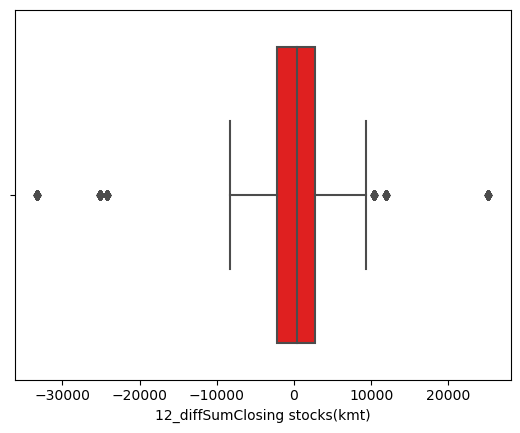

12_diffSumExports(kmt)


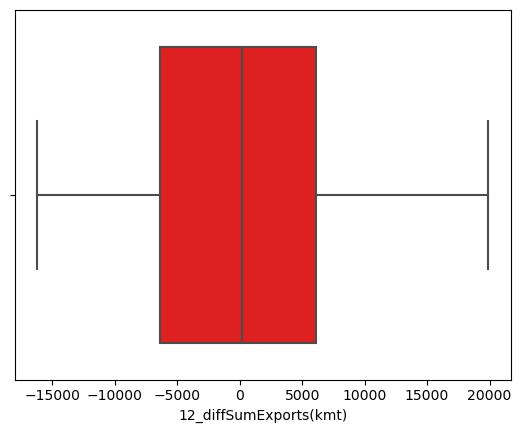

12_diffSumImports(kmt)


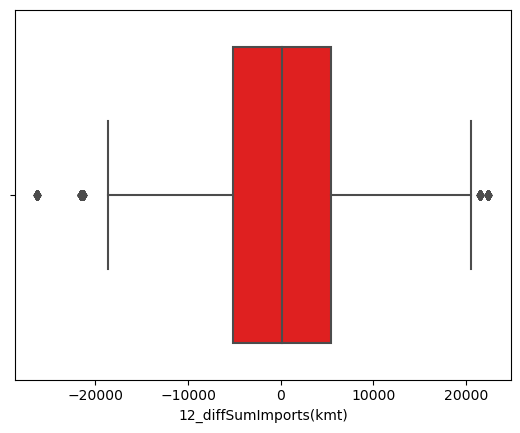

12_diffSumProduction(kmt)


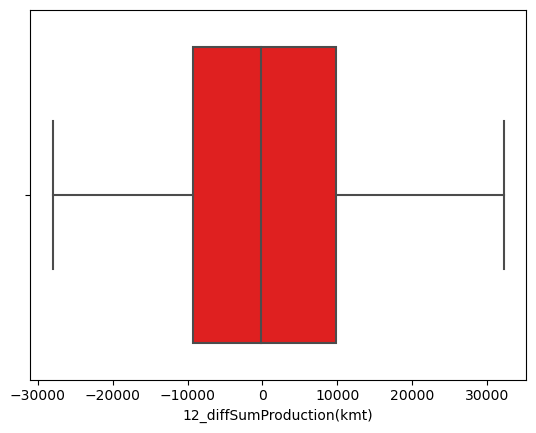

12_diffSumRefinery intake(kmt)


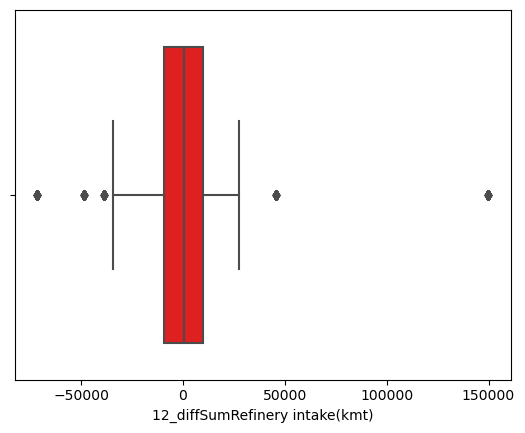

In [17]:
for col in train_df.iloc[:,1:121].columns:
    print(col)
    sns.boxplot(x = train_df[col], data = train_df, color = 'red')
    plt.show()

In [18]:
def Outlier(var):
    for x in var.iloc[:, 1:121].columns:
        Q1 = var[x].quantile(0.25)
        Q3 = var[x].quantile(0.75)
        IQR = Q3-Q1
        Lower = Q1-(1.5*IQR)
        Upper = Q3+(1.5*IQR)
        var.loc[:,x] = np.where(var[x].values > Upper, Upper, var[x].values)
        var.loc[:,x] = np.where(var[x].values < Lower, Lower, var[x].values)
    return var
df_train = Outlier(train_df)

1_diffClosing stocks(kmt)


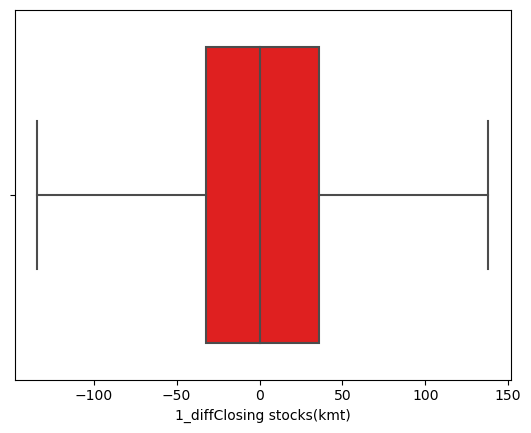

1_diffExports(kmt)


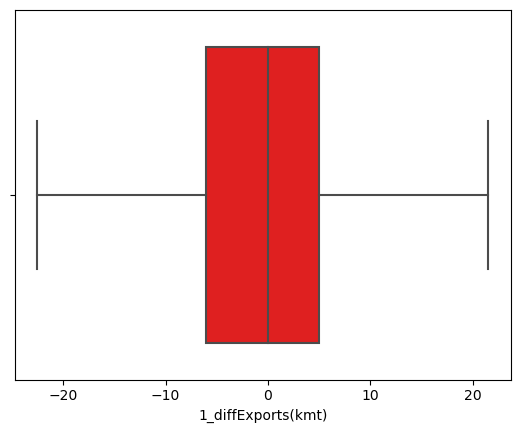

1_diffImports(kmt)


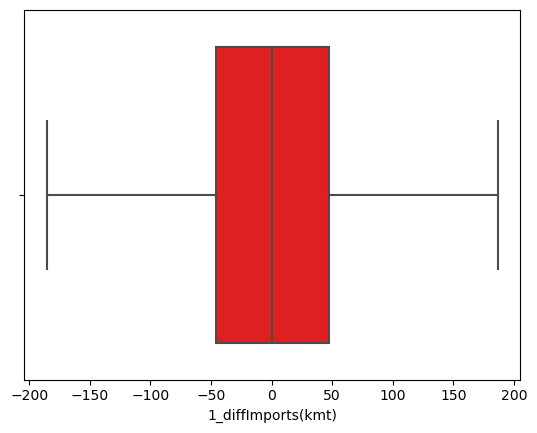

1_diffRefinery intake(kmt)


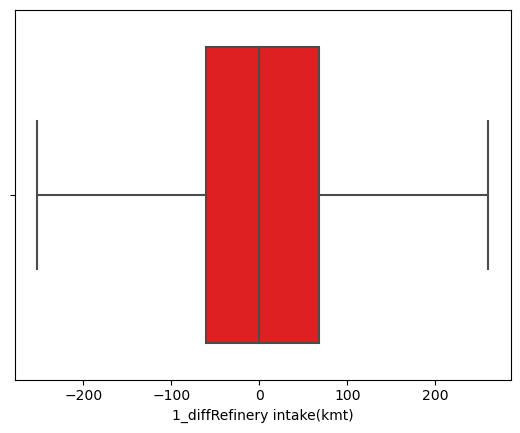

1_diffWTI


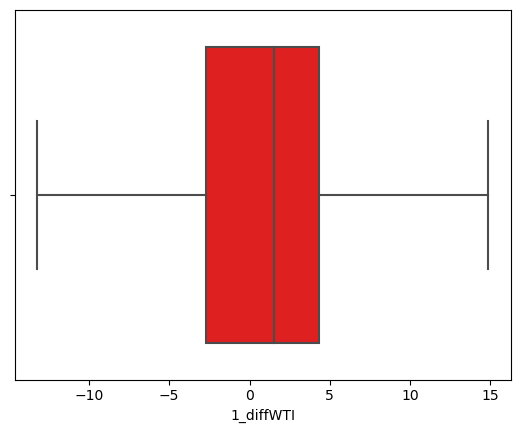

1_diffSumClosing stocks(kmt)


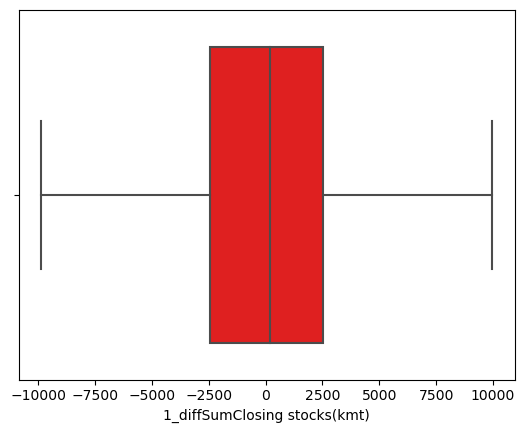

1_diffSumExports(kmt)


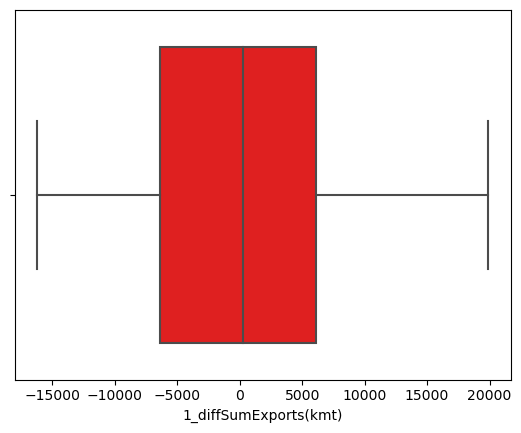

1_diffSumImports(kmt)


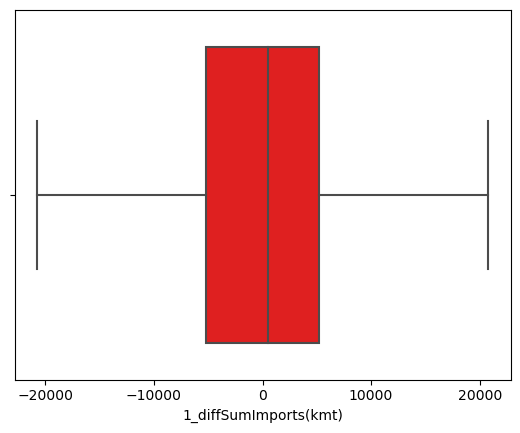

1_diffSumProduction(kmt)


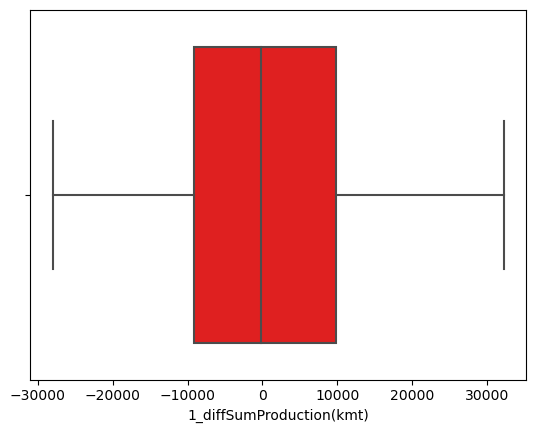

1_diffSumRefinery intake(kmt)


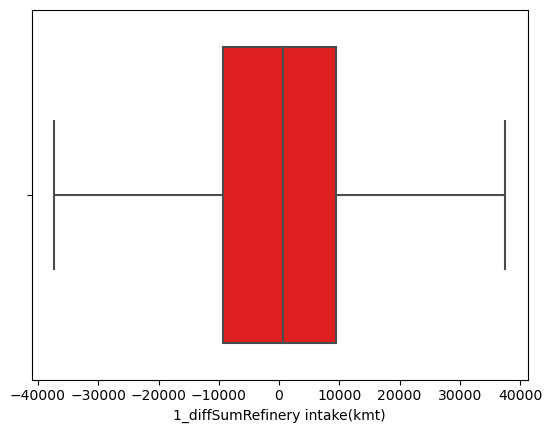

2_diffClosing stocks(kmt)


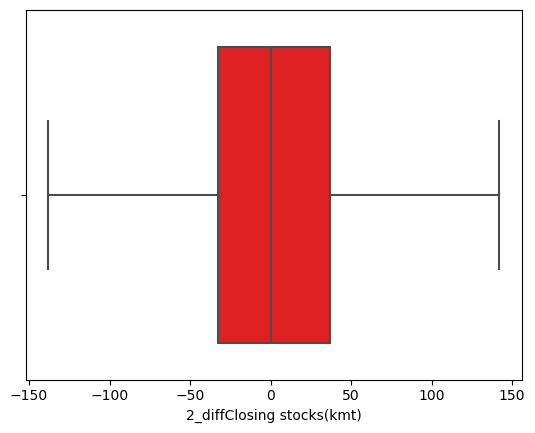

2_diffExports(kmt)


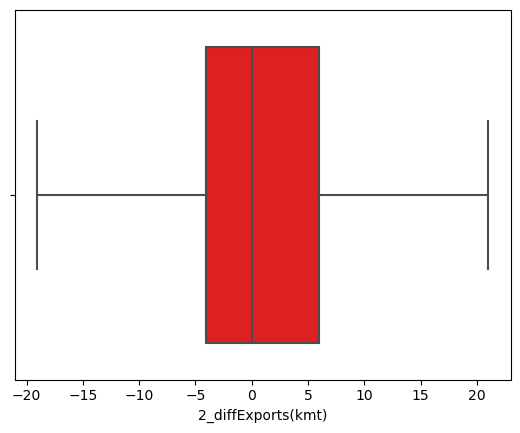

2_diffImports(kmt)


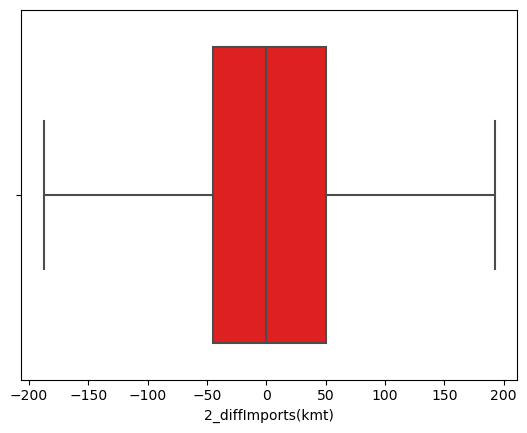

2_diffRefinery intake(kmt)


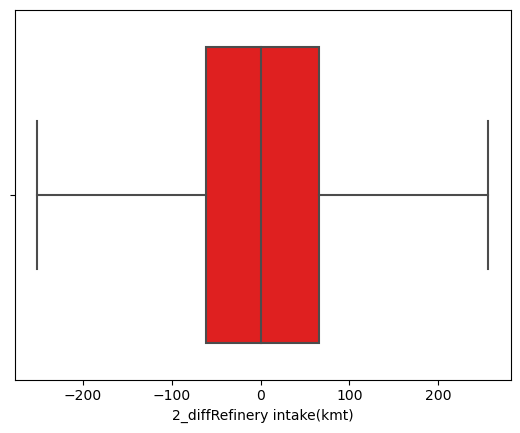

2_diffWTI


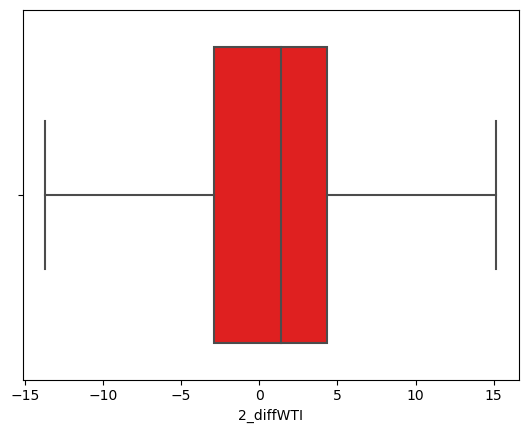

2_diffSumClosing stocks(kmt)


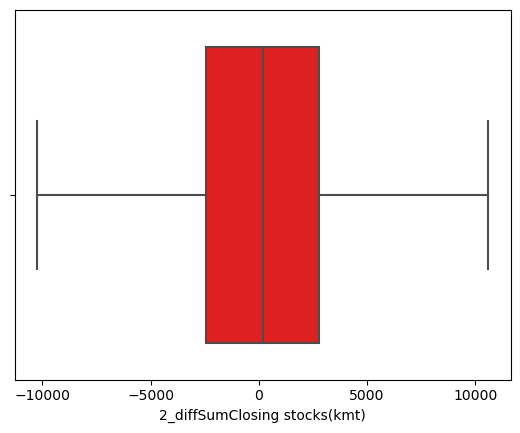

2_diffSumExports(kmt)


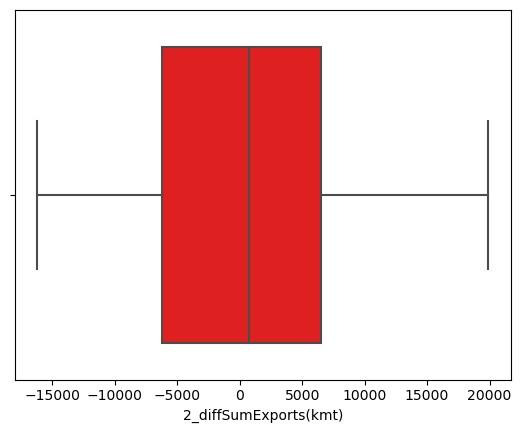

2_diffSumImports(kmt)


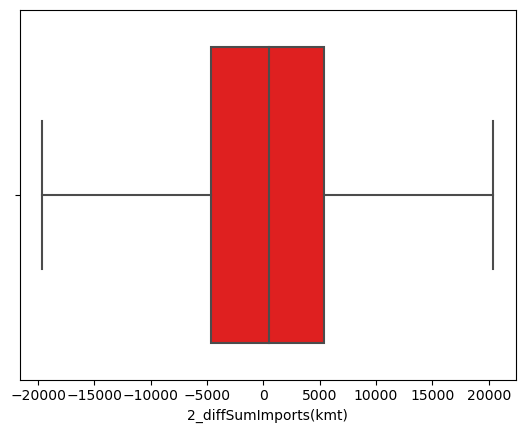

2_diffSumProduction(kmt)


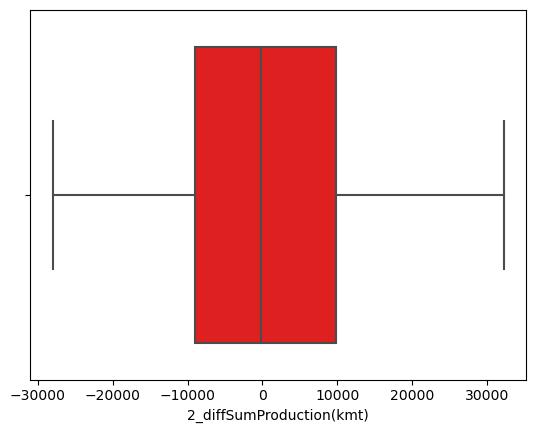

2_diffSumRefinery intake(kmt)


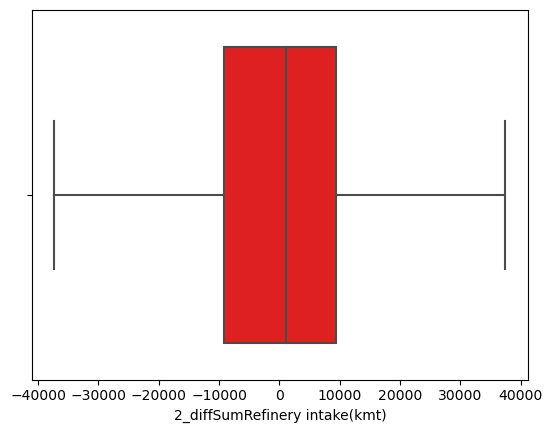

3_diffClosing stocks(kmt)


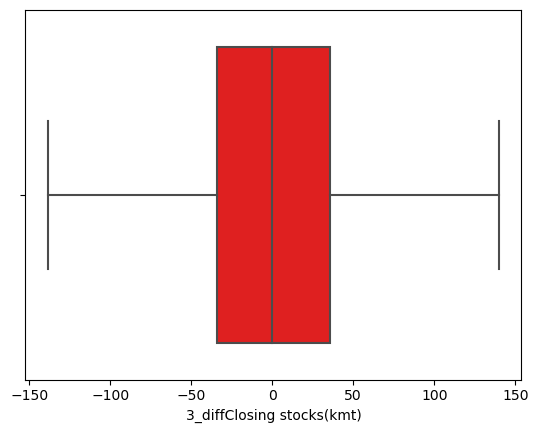

3_diffExports(kmt)


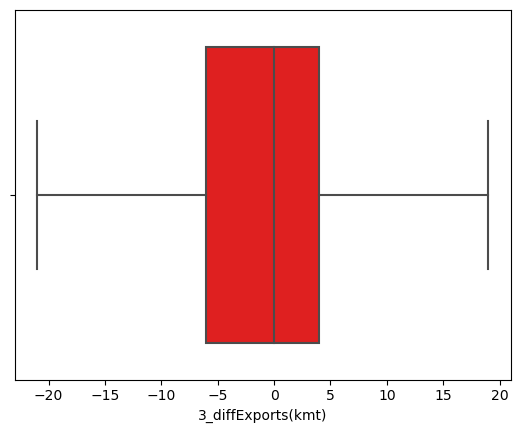

3_diffImports(kmt)


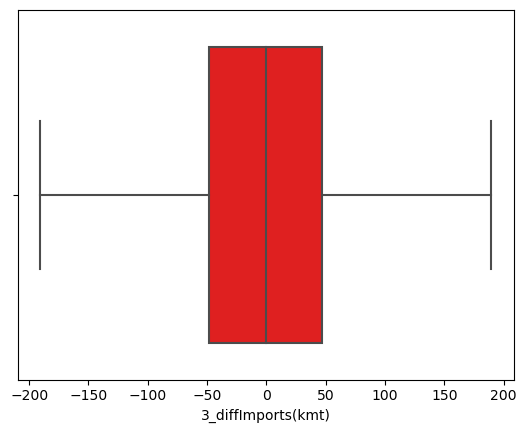

3_diffRefinery intake(kmt)


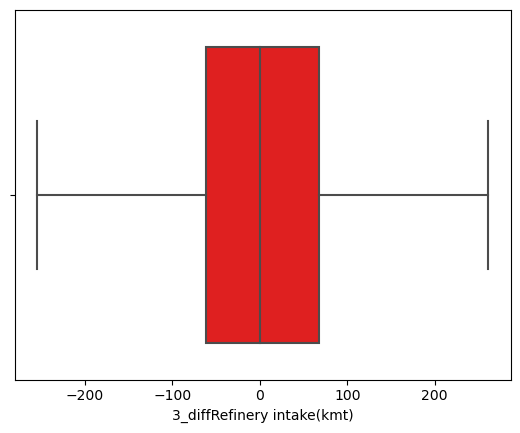

3_diffWTI


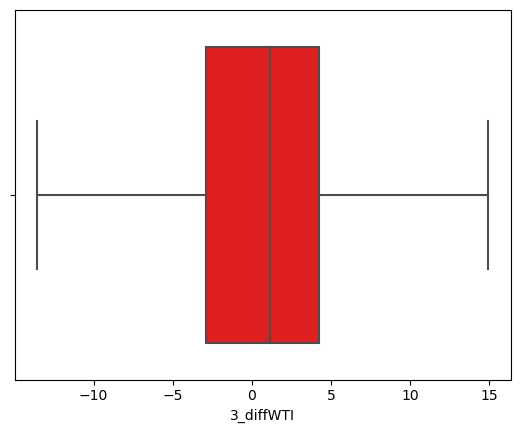

3_diffSumClosing stocks(kmt)


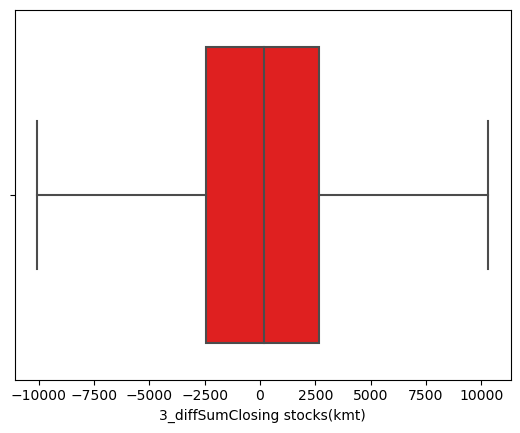

3_diffSumExports(kmt)


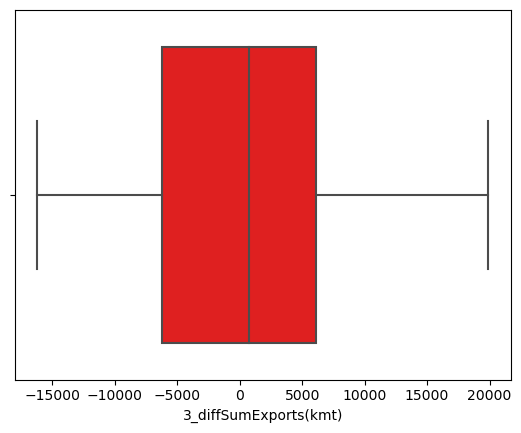

3_diffSumImports(kmt)


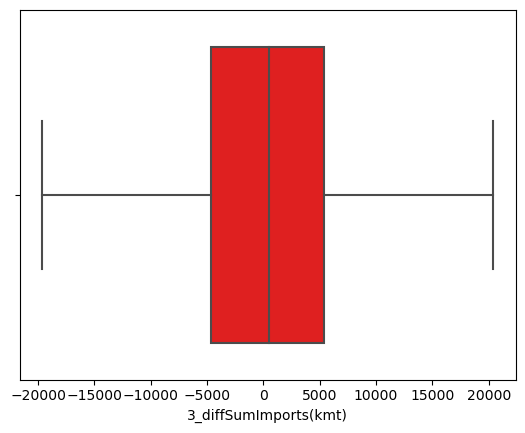

3_diffSumProduction(kmt)


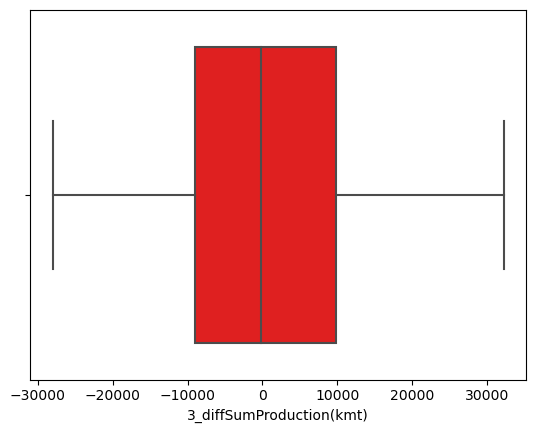

3_diffSumRefinery intake(kmt)


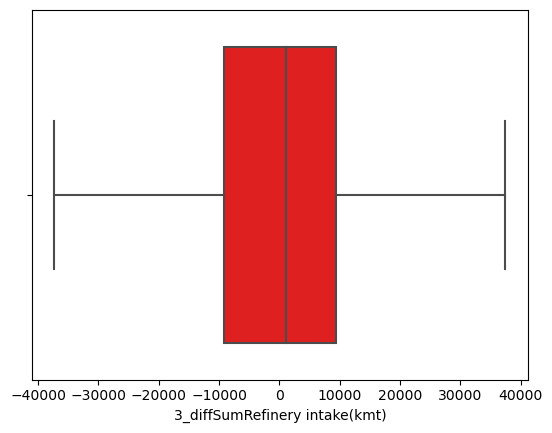

4_diffClosing stocks(kmt)


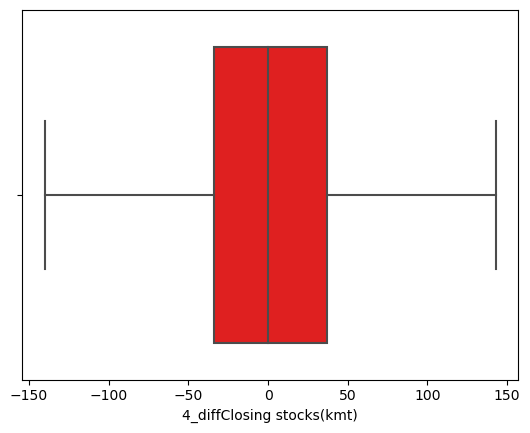

4_diffExports(kmt)


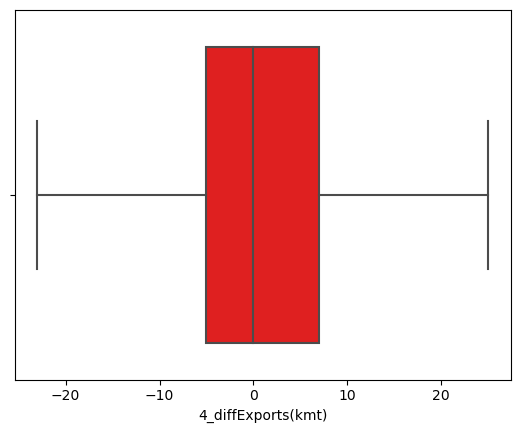

4_diffImports(kmt)


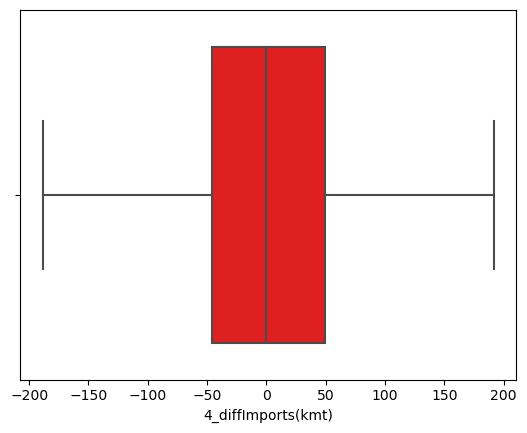

4_diffRefinery intake(kmt)


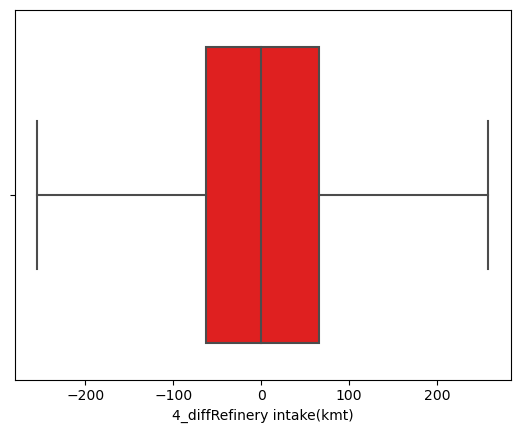

4_diffWTI


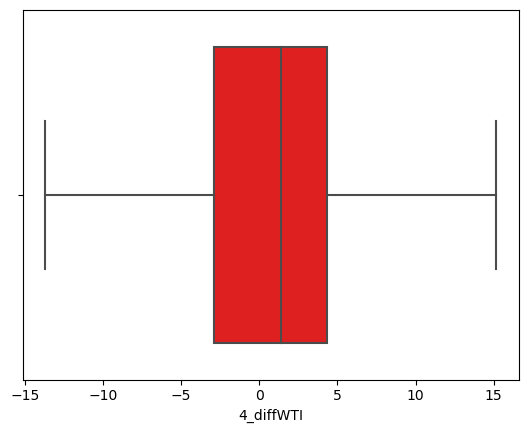

4_diffSumClosing stocks(kmt)


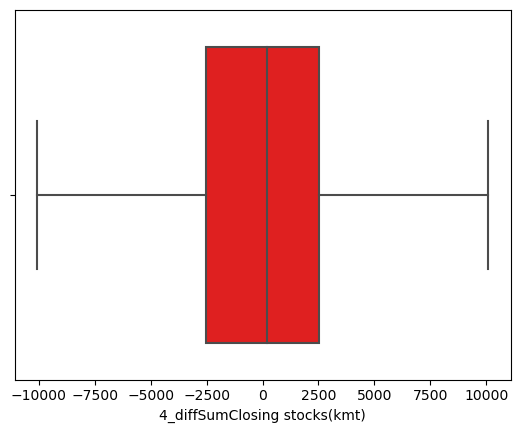

4_diffSumExports(kmt)


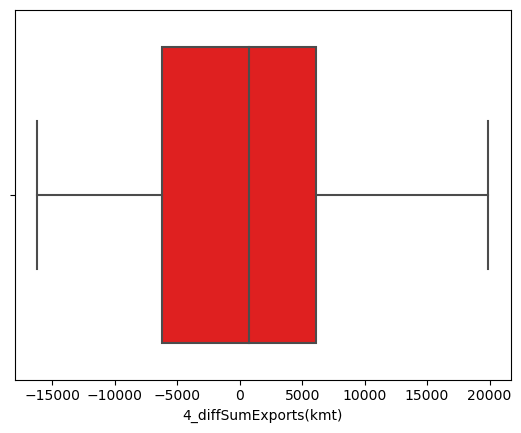

4_diffSumImports(kmt)


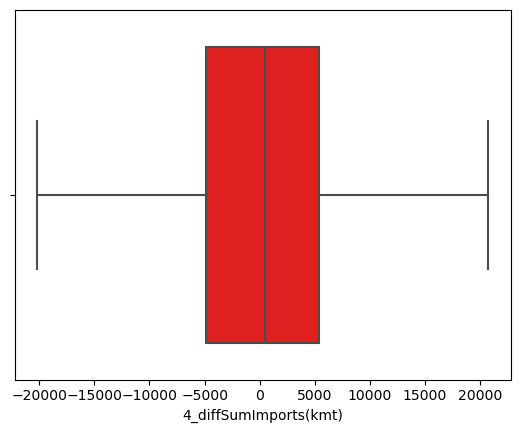

4_diffSumProduction(kmt)


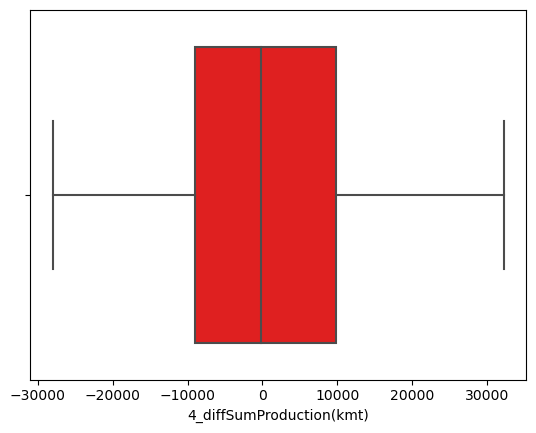

4_diffSumRefinery intake(kmt)


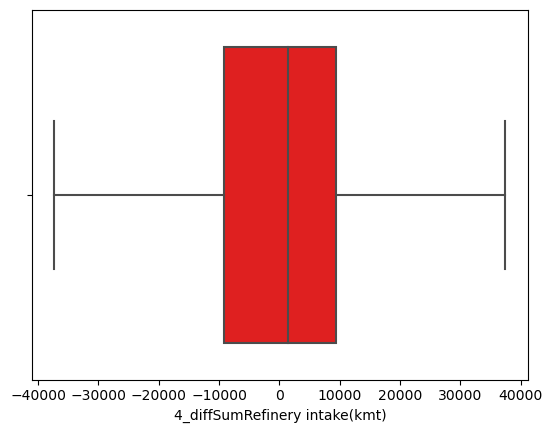

5_diffClosing stocks(kmt)


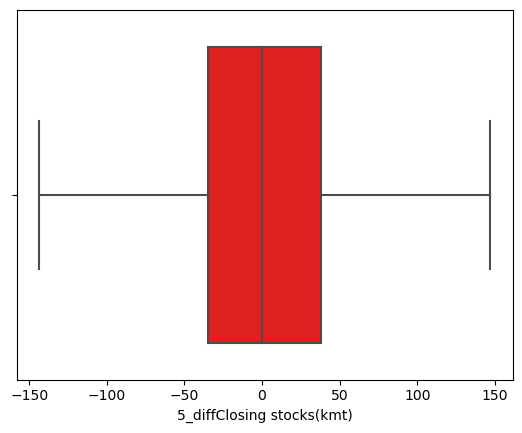

5_diffExports(kmt)


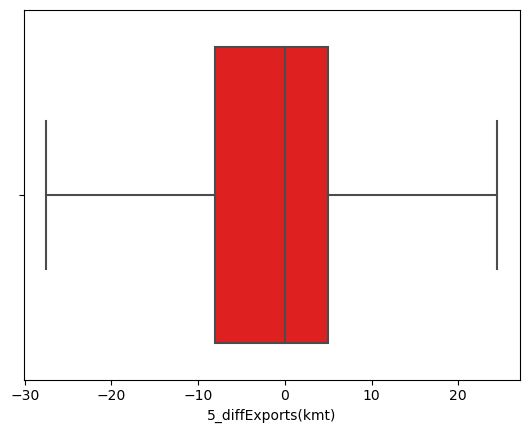

5_diffImports(kmt)


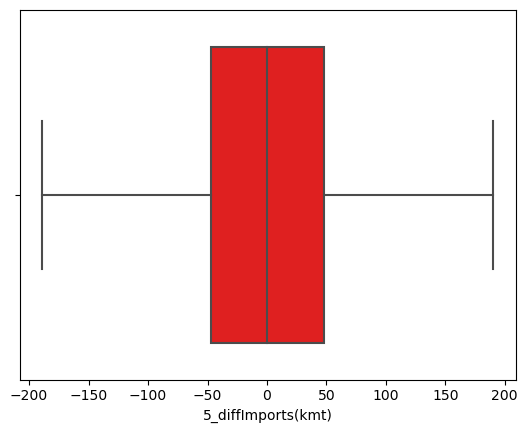

5_diffRefinery intake(kmt)


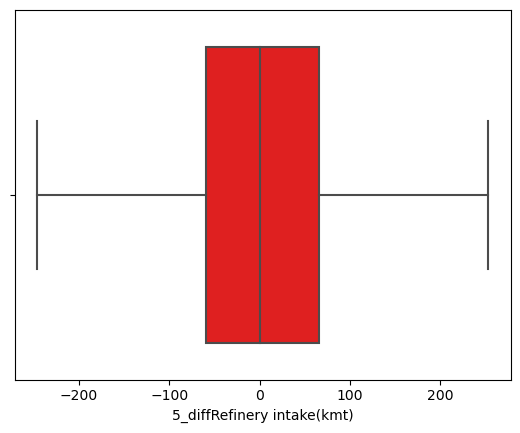

5_diffWTI


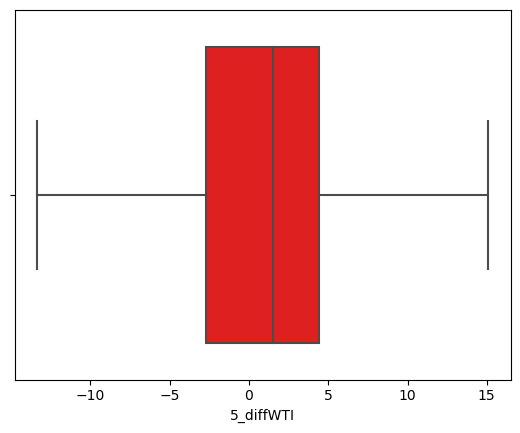

5_diffSumClosing stocks(kmt)


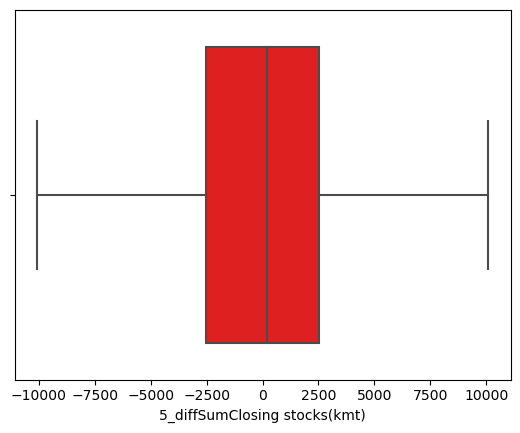

5_diffSumExports(kmt)


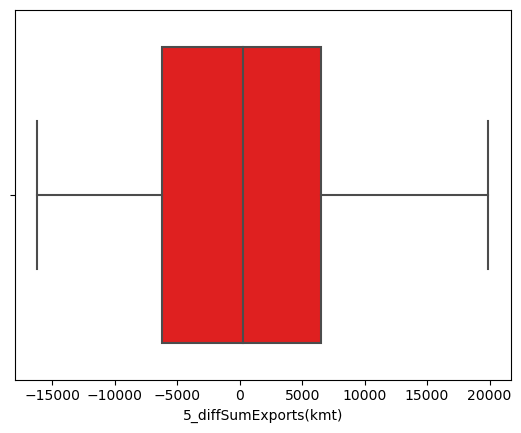

5_diffSumImports(kmt)


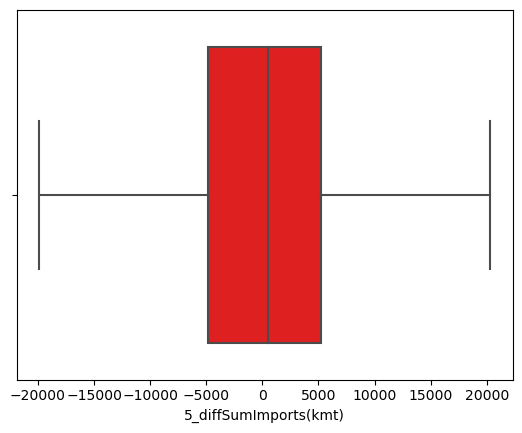

5_diffSumProduction(kmt)


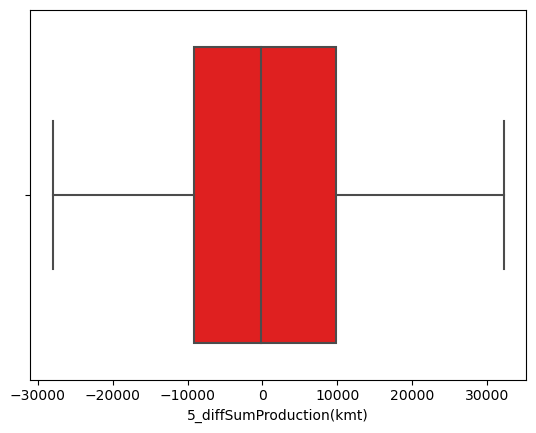

5_diffSumRefinery intake(kmt)


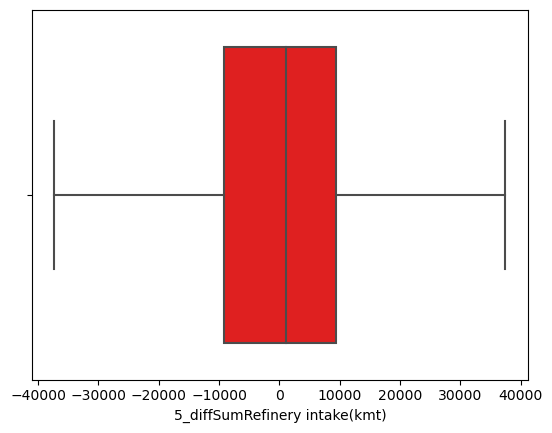

6_diffClosing stocks(kmt)


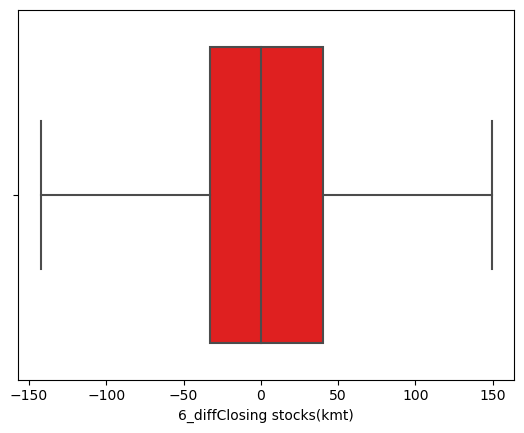

6_diffExports(kmt)


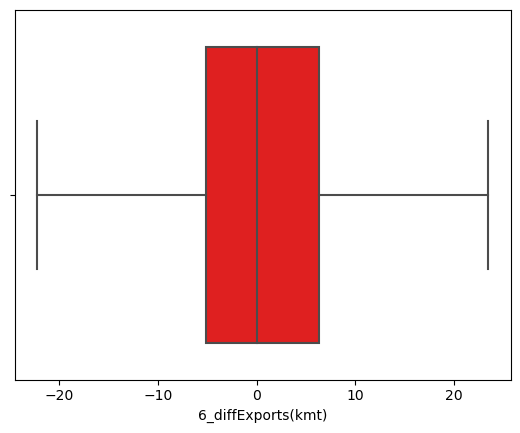

6_diffImports(kmt)


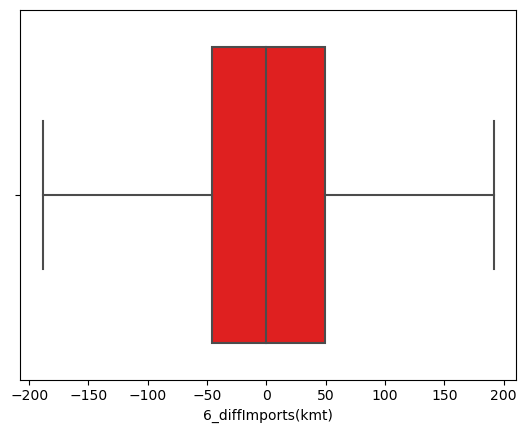

6_diffRefinery intake(kmt)


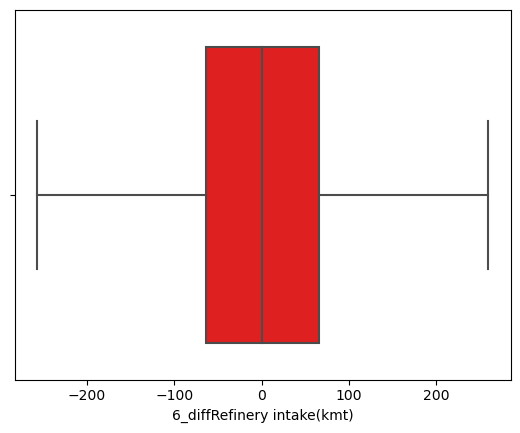

6_diffWTI


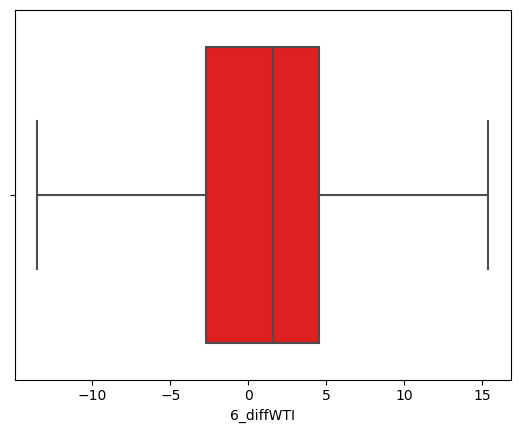

6_diffSumClosing stocks(kmt)


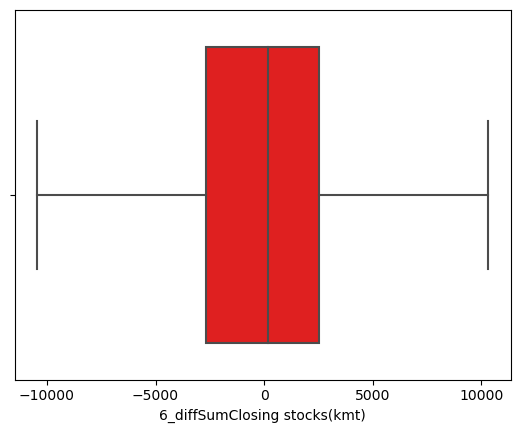

6_diffSumExports(kmt)


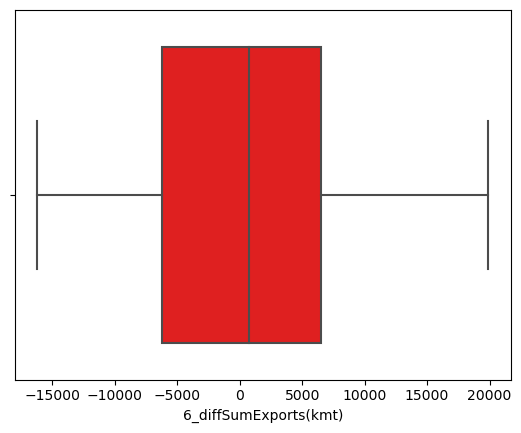

6_diffSumImports(kmt)


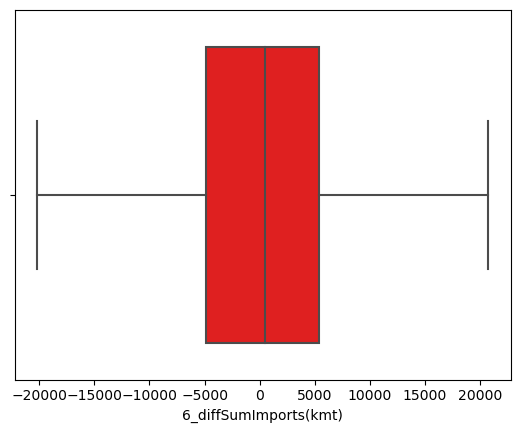

6_diffSumProduction(kmt)


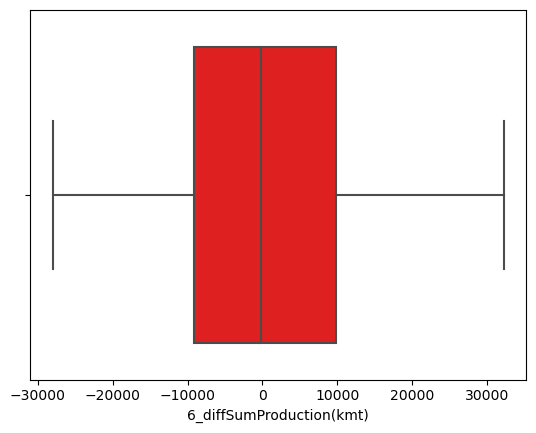

6_diffSumRefinery intake(kmt)


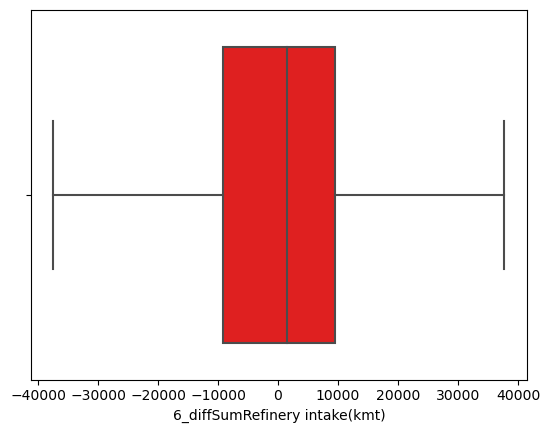

7_diffClosing stocks(kmt)


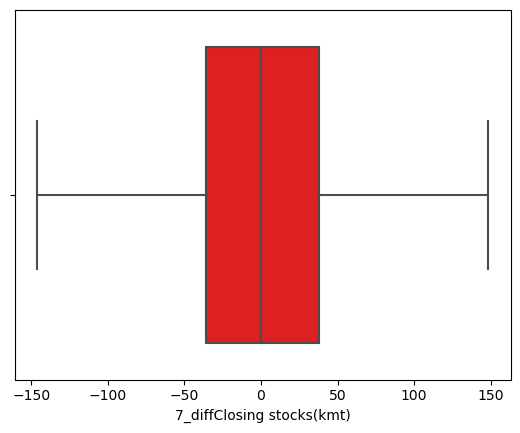

7_diffExports(kmt)


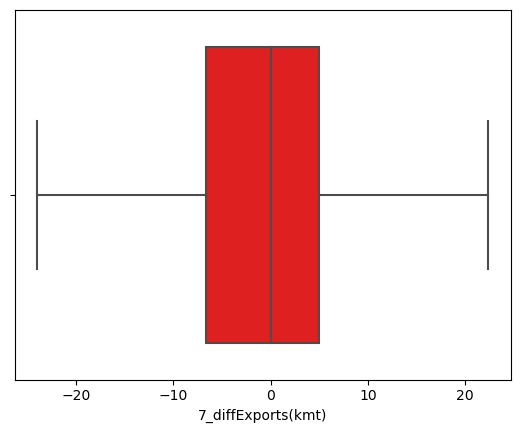

7_diffImports(kmt)


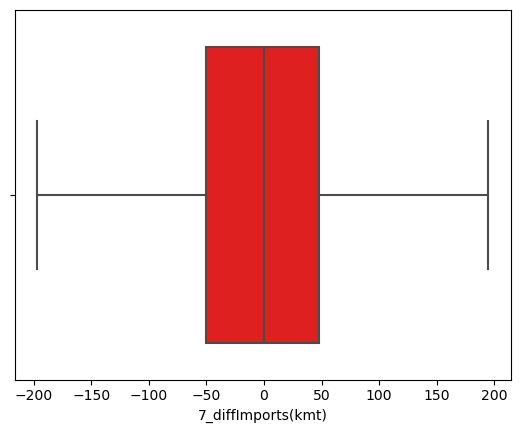

7_diffRefinery intake(kmt)


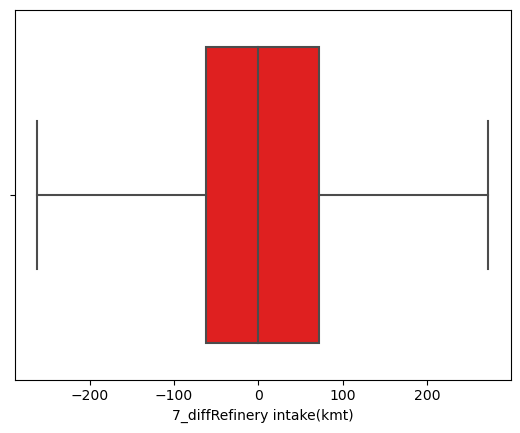

7_diffWTI


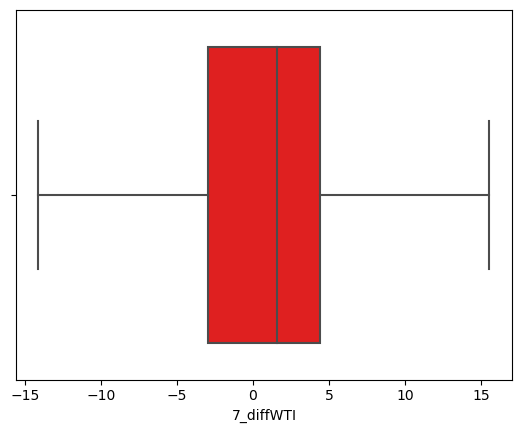

7_diffSumClosing stocks(kmt)


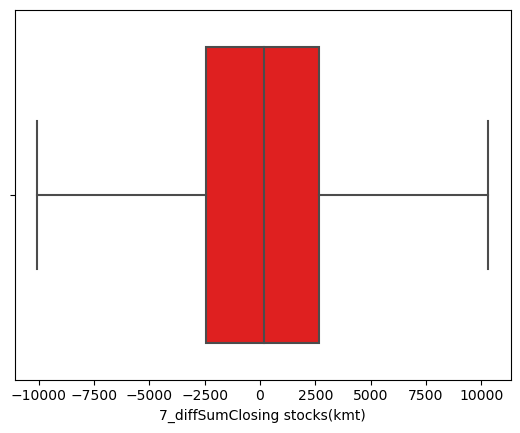

7_diffSumExports(kmt)


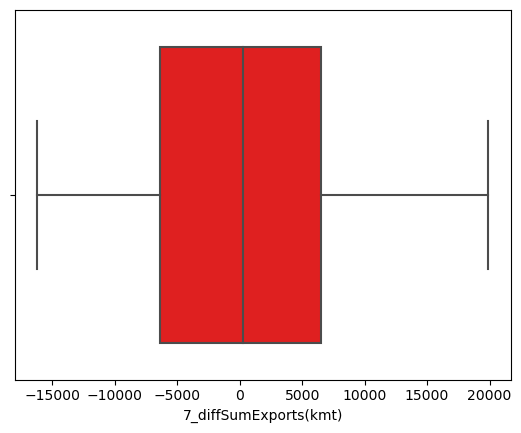

7_diffSumImports(kmt)


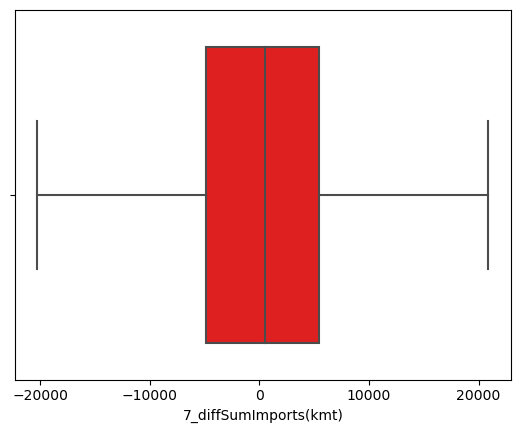

7_diffSumProduction(kmt)


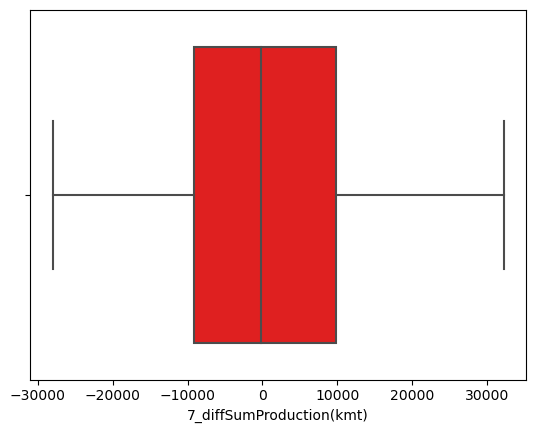

7_diffSumRefinery intake(kmt)


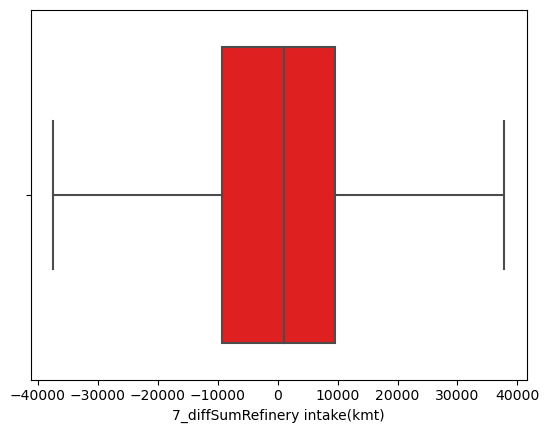

8_diffClosing stocks(kmt)


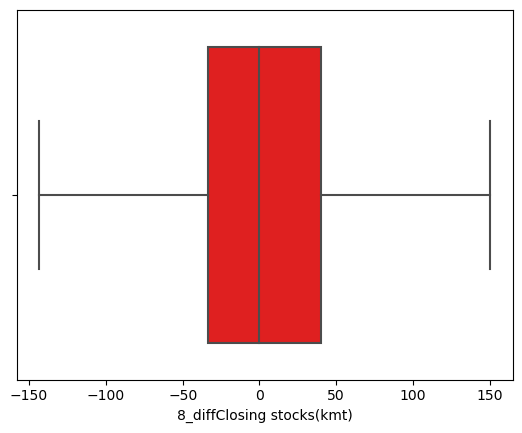

8_diffExports(kmt)


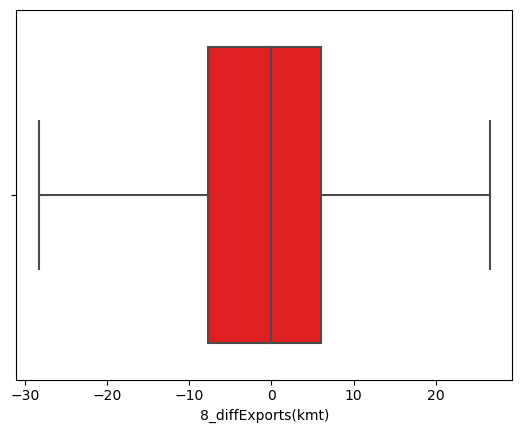

8_diffImports(kmt)


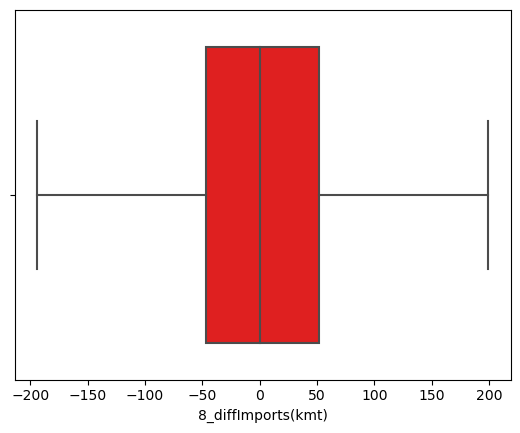

8_diffRefinery intake(kmt)


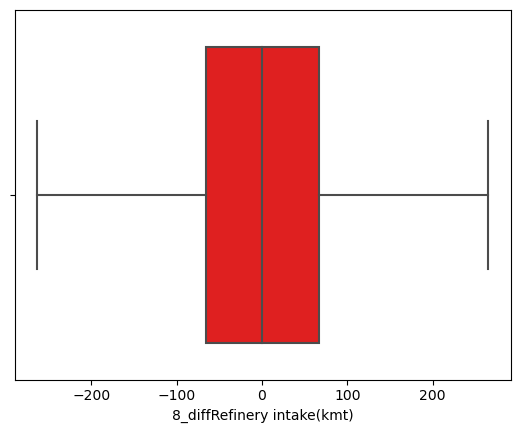

8_diffWTI


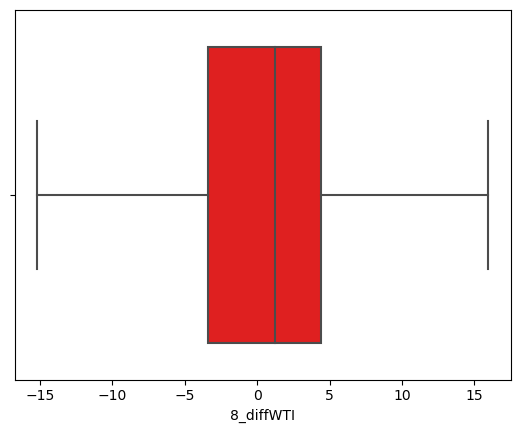

8_diffSumClosing stocks(kmt)


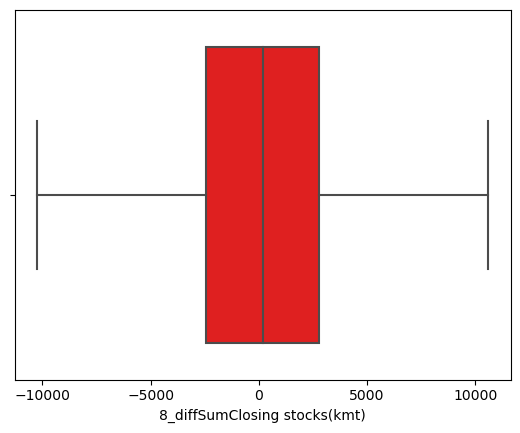

8_diffSumExports(kmt)


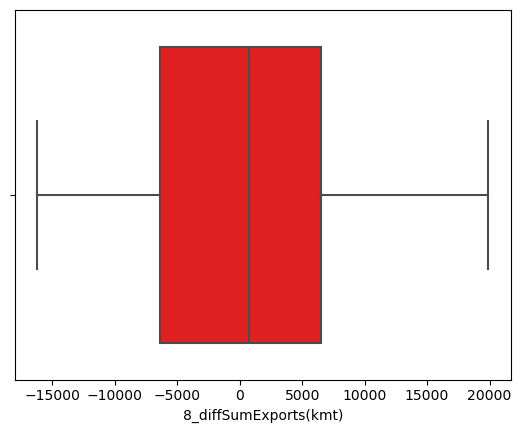

8_diffSumImports(kmt)


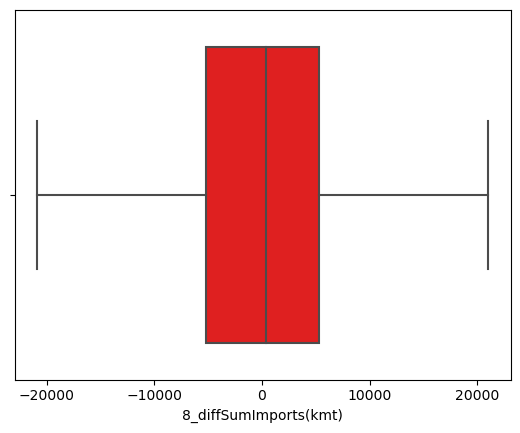

8_diffSumProduction(kmt)


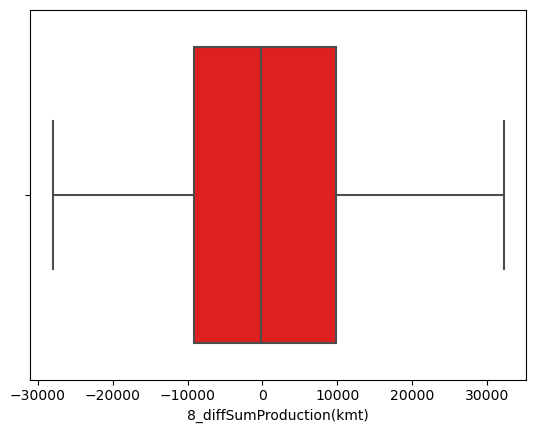

8_diffSumRefinery intake(kmt)


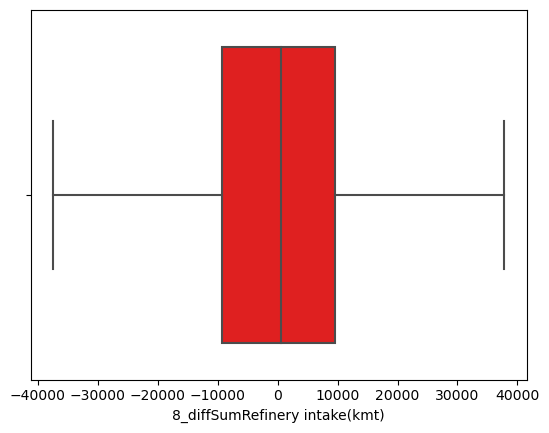

9_diffClosing stocks(kmt)


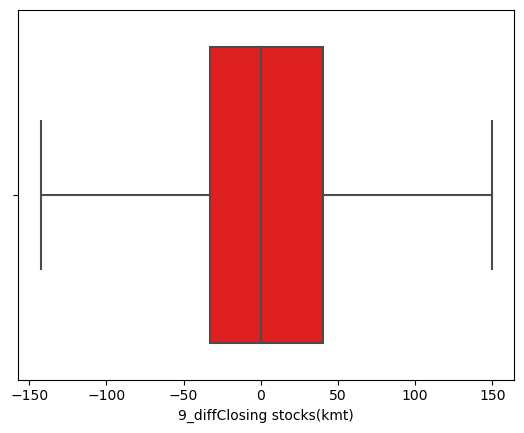

9_diffExports(kmt)


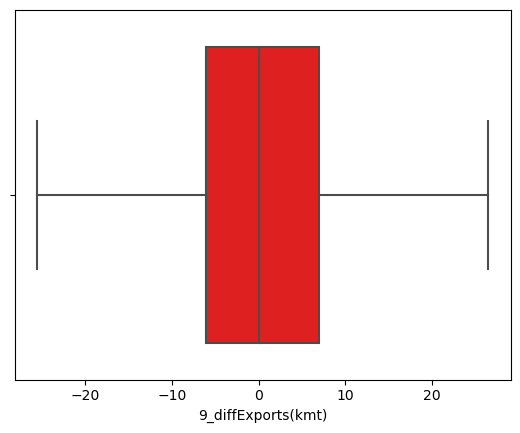

9_diffImports(kmt)


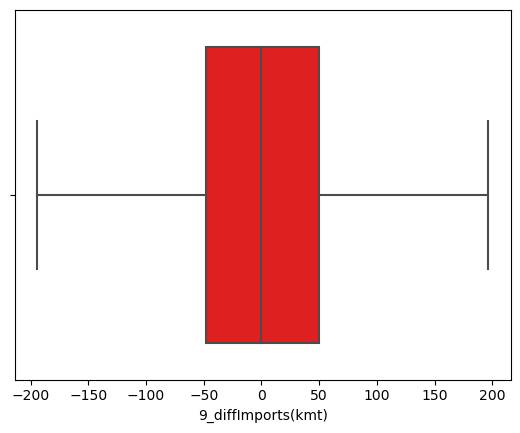

9_diffRefinery intake(kmt)


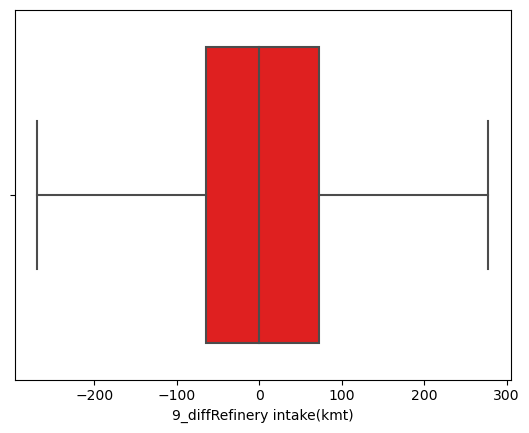

9_diffWTI


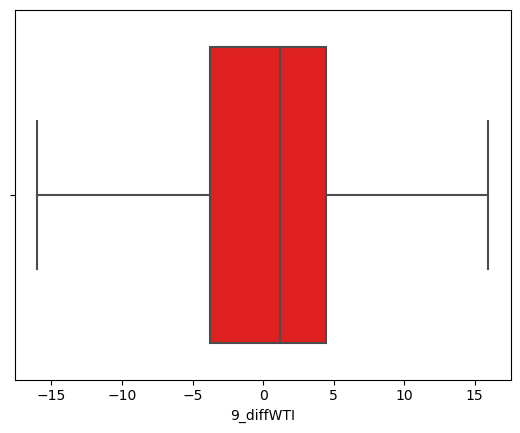

9_diffSumClosing stocks(kmt)


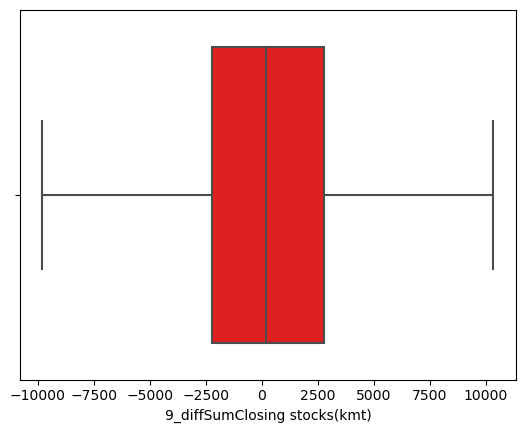

9_diffSumExports(kmt)


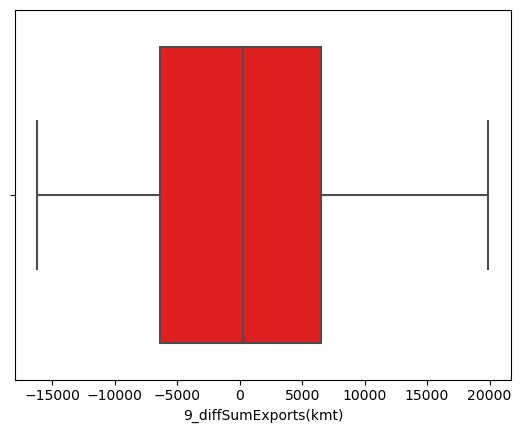

9_diffSumImports(kmt)


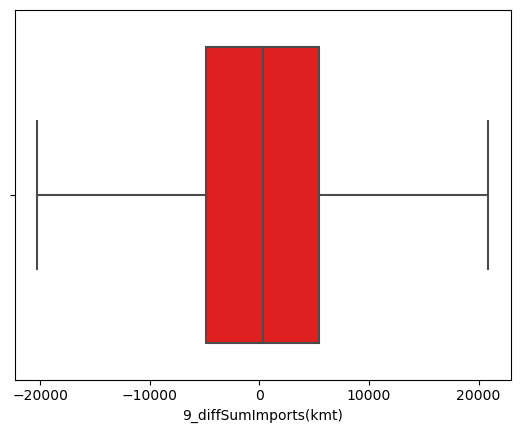

9_diffSumProduction(kmt)


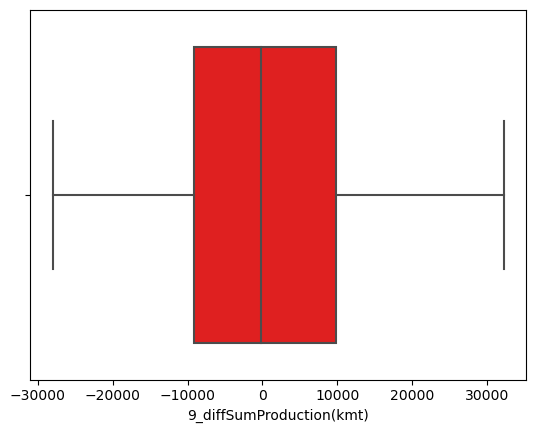

9_diffSumRefinery intake(kmt)


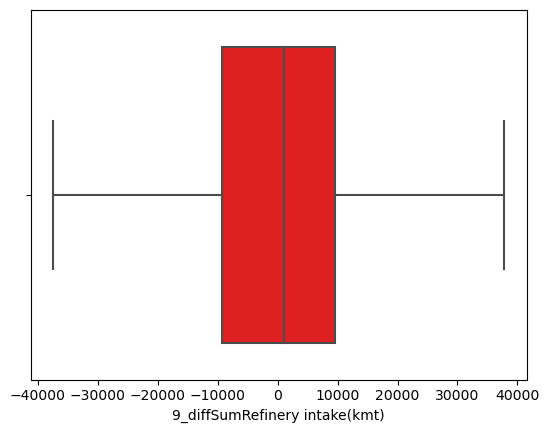

10_diffClosing stocks(kmt)


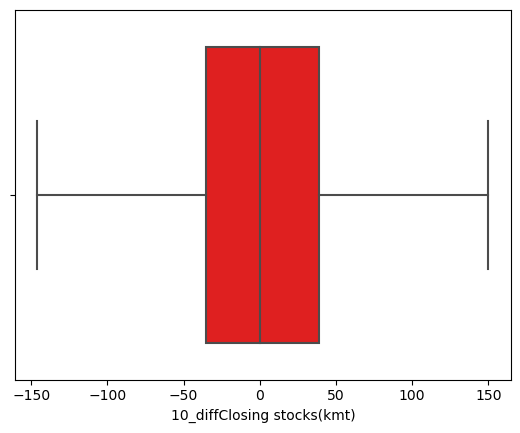

10_diffExports(kmt)


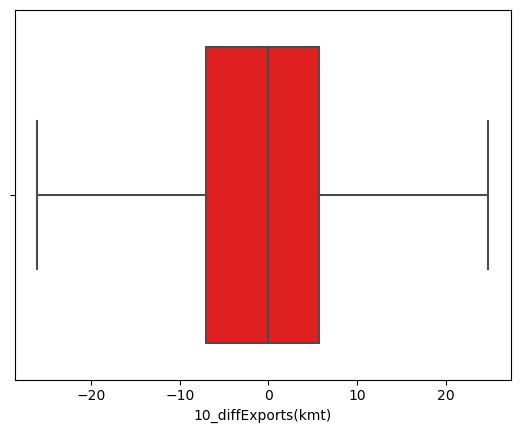

10_diffImports(kmt)


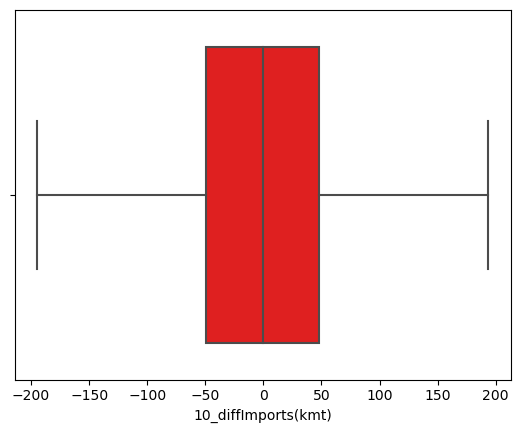

10_diffRefinery intake(kmt)


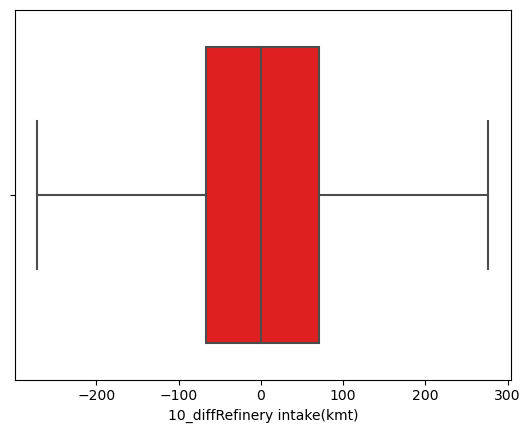

10_diffWTI


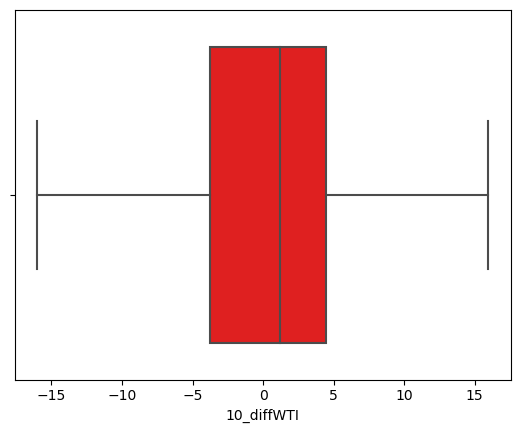

10_diffSumClosing stocks(kmt)


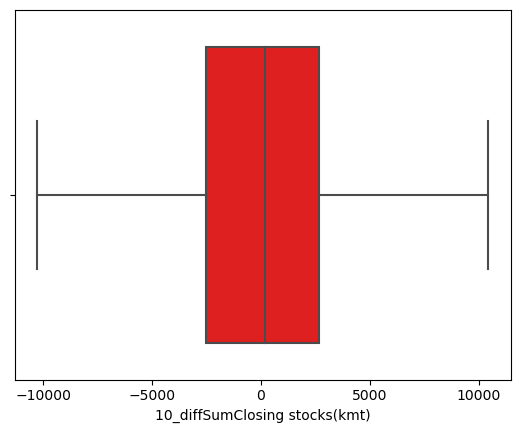

10_diffSumExports(kmt)


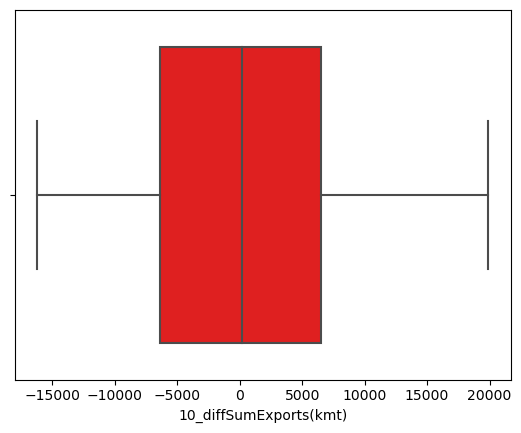

10_diffSumImports(kmt)


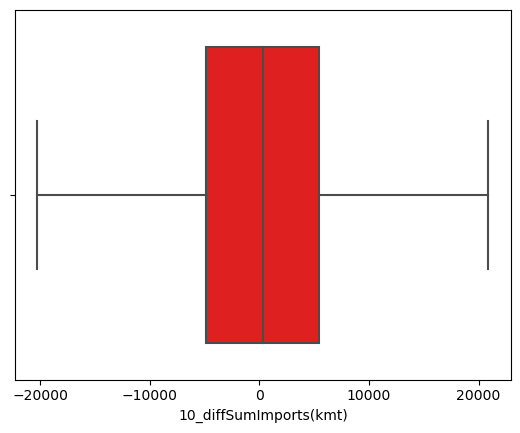

10_diffSumProduction(kmt)


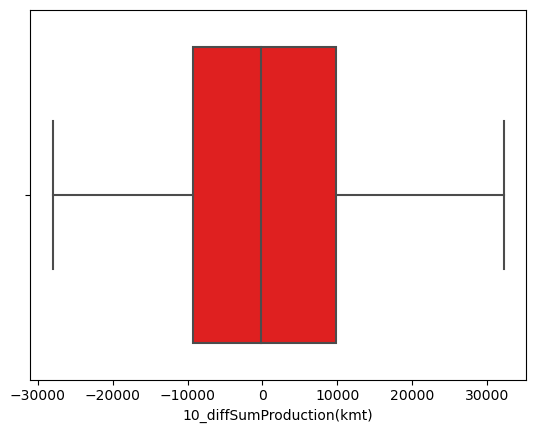

10_diffSumRefinery intake(kmt)


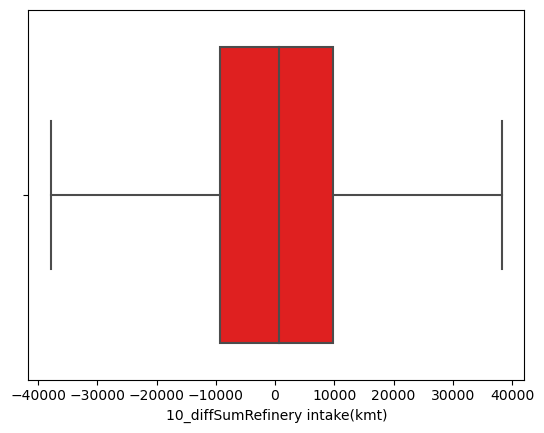

11_diffClosing stocks(kmt)


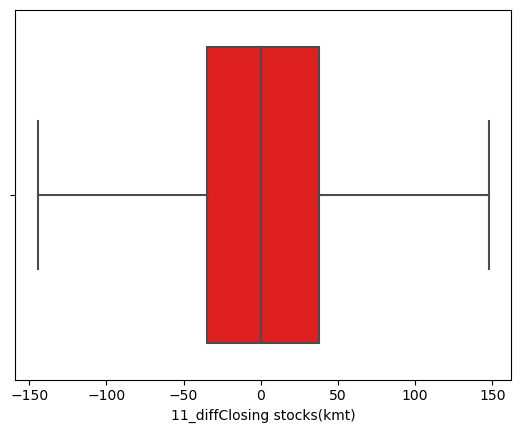

11_diffExports(kmt)


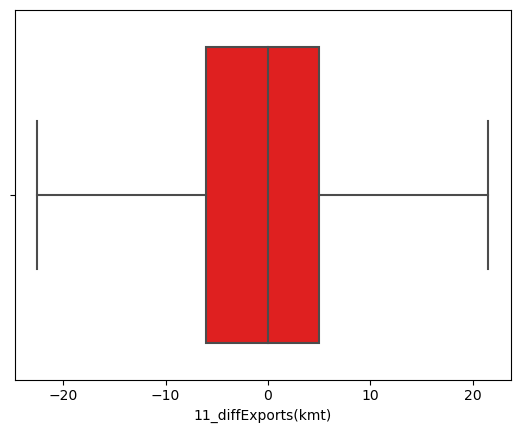

11_diffImports(kmt)


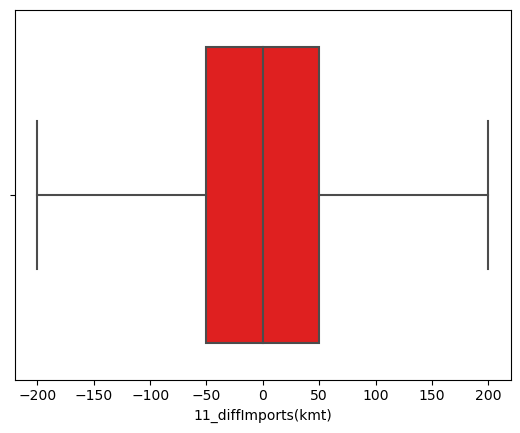

11_diffRefinery intake(kmt)


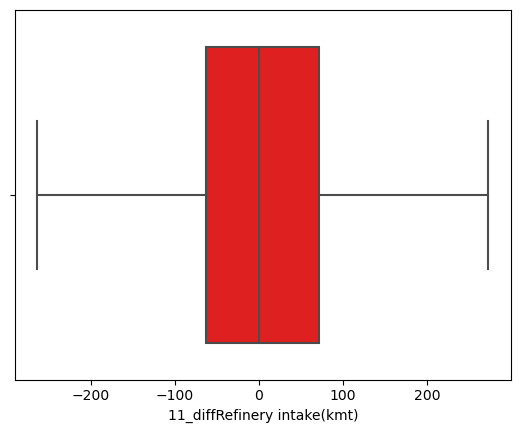

11_diffWTI


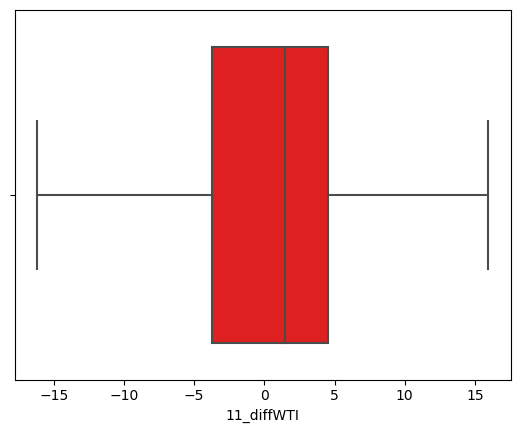

11_diffSumClosing stocks(kmt)


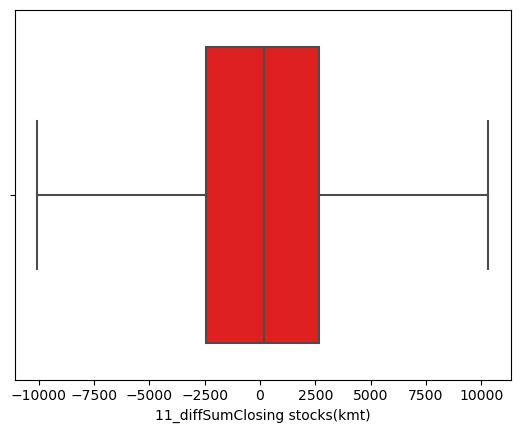

11_diffSumExports(kmt)


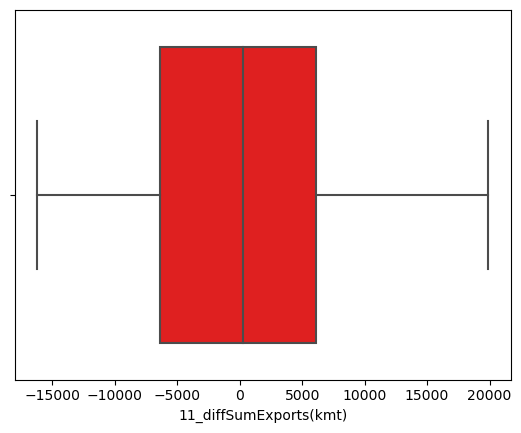

11_diffSumImports(kmt)


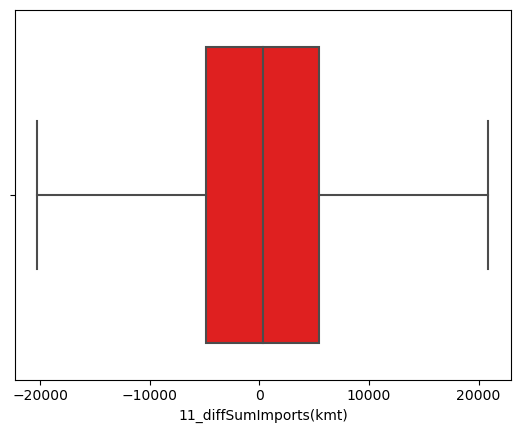

11_diffSumProduction(kmt)


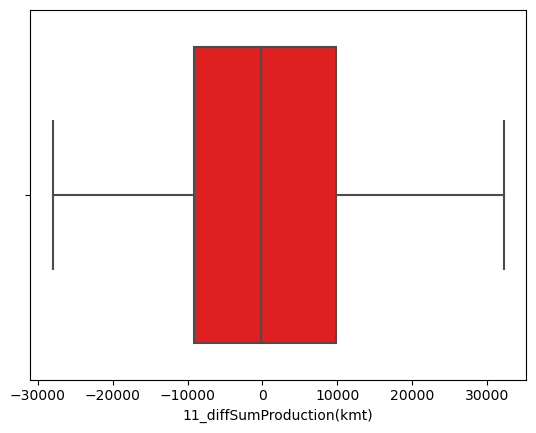

11_diffSumRefinery intake(kmt)


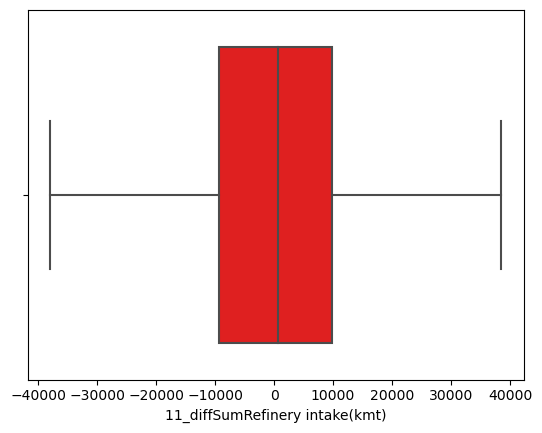

12_diffClosing stocks(kmt)


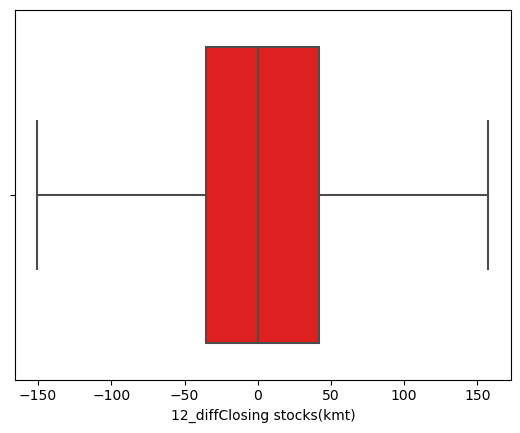

12_diffExports(kmt)


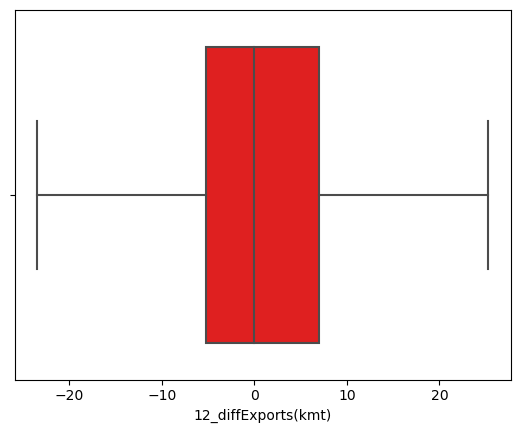

12_diffImports(kmt)


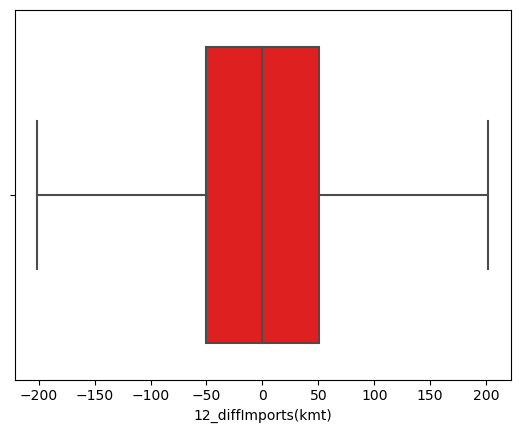

12_diffRefinery intake(kmt)


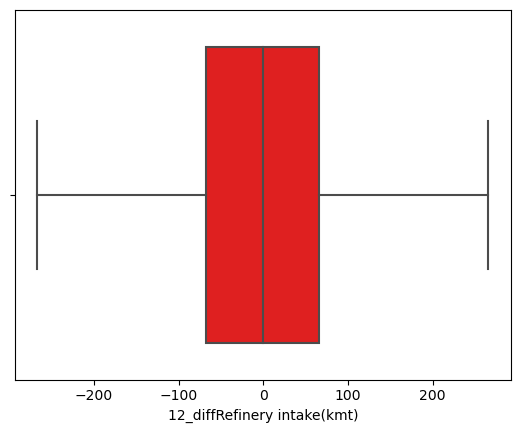

12_diffWTI


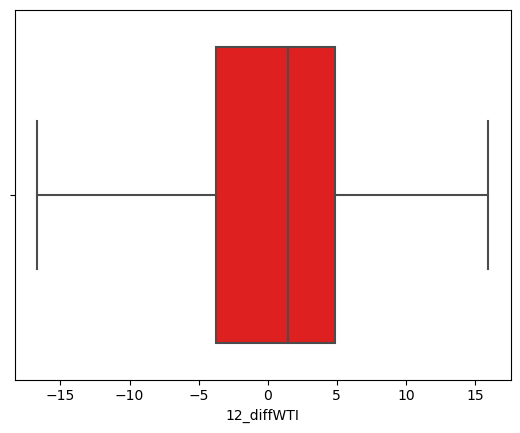

12_diffSumClosing stocks(kmt)


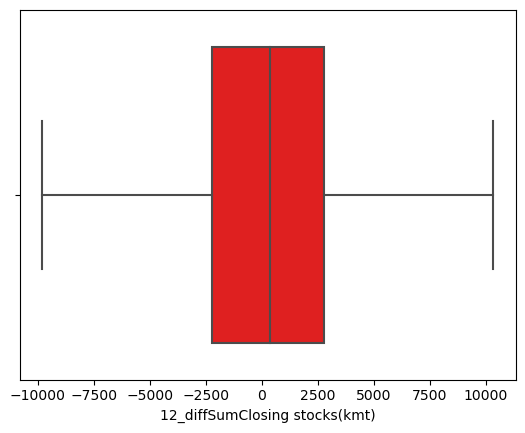

12_diffSumExports(kmt)


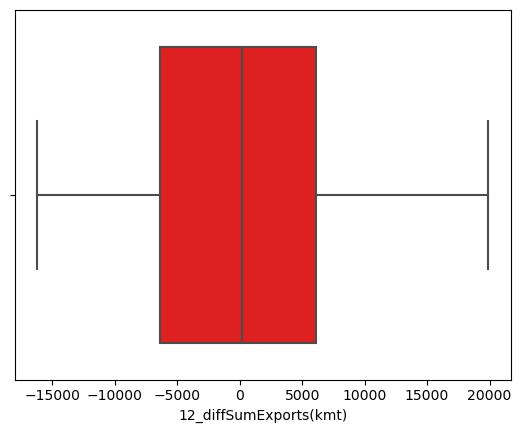

12_diffSumImports(kmt)


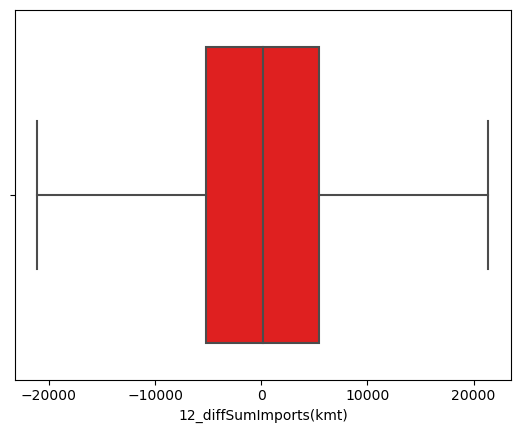

12_diffSumProduction(kmt)


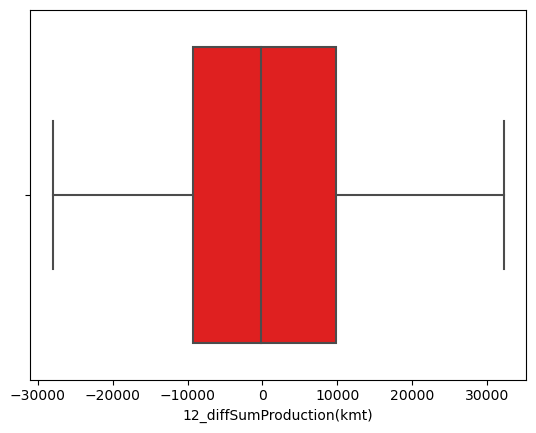

12_diffSumRefinery intake(kmt)


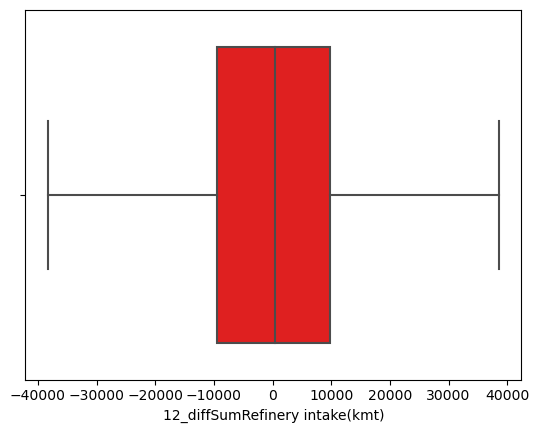

In [19]:
for col in train_df.iloc[:,1:121].columns:
    print(col)
    sns.boxplot(x = train_df[col], data = train_df, color = 'red')
    plt.show()

In [20]:
df_train.head()

country  1_diffClosing stocks(kmt)  1_diffExports(kmt)  1_diffImports(kmt)  \
0       46                     0.0000                 0.0              0.0000   
1       73                  -117.0000                 0.0           -125.0000   
2        7                     0.0000                21.5            186.5000   
3       27                    98.0000               -22.5            186.5000   
4        3                    16.7135                21.5              1.4045   

   1_diffRefinery intake(kmt)  1_diffWTI  1_diffSumClosing stocks(kmt)  \
0                      0.0000       2.62                    7069.83100   
1                      6.0000      -7.40                   -4477.97380   
2                      0.0000       0.65                    9968.22925   
3                    260.0000       3.04                   -3143.23230   
4                     19.9439      12.16                     830.19120   

   1_diffSumExports(kmt)  1_diffSumImports(kmt)  1_diffSumProduction(kmt)  \
0             -3216.1655              3291.5712                -9977.5602   
1              -675.9654             -3155.1122                -6110.6867   
2              2183.3548              2914.9567                 -258.3885   
3              -566.6417              5975.3444                 9230.8707   
4               269.7015             -7511.8921               -11652.5443   

   ...  12_diffExports(kmt)  12_diffImports(kmt)  12_diffRefinery intake(kmt)  \
0  ...             0.000000             0.000000                       0.0000   
1  ...             0.000000             2.000000                       6.0000   
2  ...            25.276675            33.000000                       0.0000   
3  ...             0.000000          -201.163625                     104.0000   
4  ...            25.276675             0.000000                     265.5065   

   12_diffWTI  12_diffSumClosing stocks(kmt)  12_diffSumExports(kmt)  \
0        9.09                     9341.68180               7186.3975   
1      -16.67                     1158.29710               5592.9500   
2       -5.80                    -5886.75990               6490.3996   
3        4.43                    -2504.46320             -11151.8836   
4        5.49                    -9799.11235              10527.6510   

   12_diffSumImports(kmt)  12_diffSumProduction(kmt)  \
0              21390.1482                 21649.3543   
1               7813.3317                  6655.9429   
2              21390.1482                  2257.4031   
3              -9154.3416                -10931.2210   
4              16947.2945                 28844.2150   

   12_diffSumRefinery intake(kmt)  Target  
0                      27000.5446       0  
1                      13708.0310       0  
2                      14769.6373       1  
3                       2850.7985       0  
4                      22691.3429       0  

[5 rows x 122 columns]

**Train-Test Split :** 

In [21]:
x = df_train.drop('Target', axis = 1)
y = df_train['Target']

In [22]:
x

country  1_diffClosing stocks(kmt)  1_diffExports(kmt)  \
0          46                     0.0000                 0.0   
1          73                  -117.0000                 0.0   
2           7                     0.0000                21.5   
3          27                    98.0000               -22.5   
4           3                    16.7135                21.5   
...       ...                        ...                 ...   
7614       68                   -14.5480                21.5   
7615       64                   -44.0000                 0.0   
7616       23                     0.0000                -2.0   
7617       13                  -134.0000               -22.5   
7618       49                   138.0000               -22.5   

      1_diffImports(kmt)  1_diffRefinery intake(kmt)  1_diffWTI  \
0                 0.0000                      0.0000       2.62   
1              -125.0000                      6.0000      -7.40   
2               186.5000                      0.0000       0.65   
3               186.5000                    260.0000       3.04   
4                 1.4045                     19.9439      12.16   
...                  ...                         ...        ...   
7614            -58.3334                   -147.0339       8.62   
7615            174.0000                     -2.0000       4.08   
7616              0.0000                    149.0000       1.20   
7617             25.0000                   -252.0000      -6.49   
7618              0.0000                   -129.2000       7.17   

      1_diffSumClosing stocks(kmt)  1_diffSumExports(kmt)  \
0                       7069.83100             -3216.1655   
1                      -4477.97380              -675.9654   
2                       9968.22925              2183.3548   
3                      -3143.23230              -566.6417   
4                        830.19120               269.7015   
...                            ...                    ...   
7614                    1157.70570             -4469.0027   
7615                   -6293.70230             11736.2149   
7616                   -2667.61060              2274.4733   
7617                    2676.37240            -13739.8173   
7618                    1642.81200             -6964.0468   

      1_diffSumImports(kmt)  1_diffSumProduction(kmt)  ...  \
0                 3291.5712                -9977.5602  ...   
1                -3155.1122                -6110.6867  ...   
2                 2914.9567                 -258.3885  ...   
3                 5975.3444                 9230.8707  ...   
4                -7511.8921               -11652.5443  ...   
...                     ...                       ...  ...   
7614             -9726.7317               -16917.8483  ...   
7615              9298.5185                10007.1252  ...   
7616             -4053.9670                 -219.4584  ...   
7617            -15146.1199               -28046.1357  ...   
7618              2112.0208                -4765.5951  ...   

      12_diffClosing stocks(kmt)  12_diffExports(kmt)  12_diffImports(kmt)  \
0                       0.000000             0.000000             0.000000   
1                      -4.000000             0.000000             2.000000   
2                       0.000000            25.276675            33.000000   
3                    -150.447875             0.000000          -201.163625   
4                      33.427000            25.276675             0.000000   
...                          ...                  ...                  ...   
7614                   -6.638400            25.276675           107.485800   
7615                 -150.447875             0.000000          -201.163625   
7616                    0.000000            25.276675           139.000000   
7617                  157.468725           -23.461125           201.939375   
7618                  157.468725            25.276675             0.000000   

      12_diffRefi

In [23]:
y

0       0
1       0
2       1
3       0
4       0
       ..
7614    0
7615    0
7616    0
7617    0
7618    0
Name: Target, Length: 7619, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.20, random_state = 42)

In [41]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6095, 121)
(1524, 121)
(6095,)
(1524,)


In [42]:
#using StandardScaler:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [43]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [44]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

selector = SelectFromModel(estimator=RandomForestClassifier(n_estimators = 100, random_state = 42, n_jobs = -1))
selector.fit(x, y)

selected_feat = x.columns[(selector.get_support())].tolist()

print('Total Features Selected are', len(selected_feat))

print('Threshold set by Model:', np.round(selector.threshold_, decimals = 2))
print('Important Features:', selected_feat)


Total Features Selected are 56
Threshold set by Model: 0.01
Important Features: ['country', '1_diffClosing stocks(kmt)', '1_diffExports(kmt)', '1_diffImports(kmt)', '1_diffRefinery intake(kmt)', '1_diffSumExports(kmt)', '1_diffSumProduction(kmt)', '1_diffSumRefinery intake(kmt)', '2_diffClosing stocks(kmt)', '2_diffExports(kmt)', '2_diffImports(kmt)', '2_diffRefinery intake(kmt)', '2_diffSumProduction(kmt)', '3_diffClosing stocks(kmt)', '3_diffExports(kmt)', '3_diffImports(kmt)', '3_diffRefinery intake(kmt)', '4_diffClosing stocks(kmt)', '4_diffExports(kmt)', '4_diffImports(kmt)', '4_diffRefinery intake(kmt)', '5_diffClosing stocks(kmt)', '5_diffExports(kmt)', '5_diffImports(kmt)', '5_diffRefinery intake(kmt)', '6_diffClosing stocks(kmt)', '6_diffExports(kmt)', '6_diffImports(kmt)', '6_diffRefinery intake(kmt)', '7_diffClosing stocks(kmt)', '7_diffExports(kmt)', '7_diffImports(kmt)', '7_diffRefinery intake(kmt)', '8_diffClosing stocks(kmt)', '8_diffExports(kmt)', '8_diffImports(kmt)', 

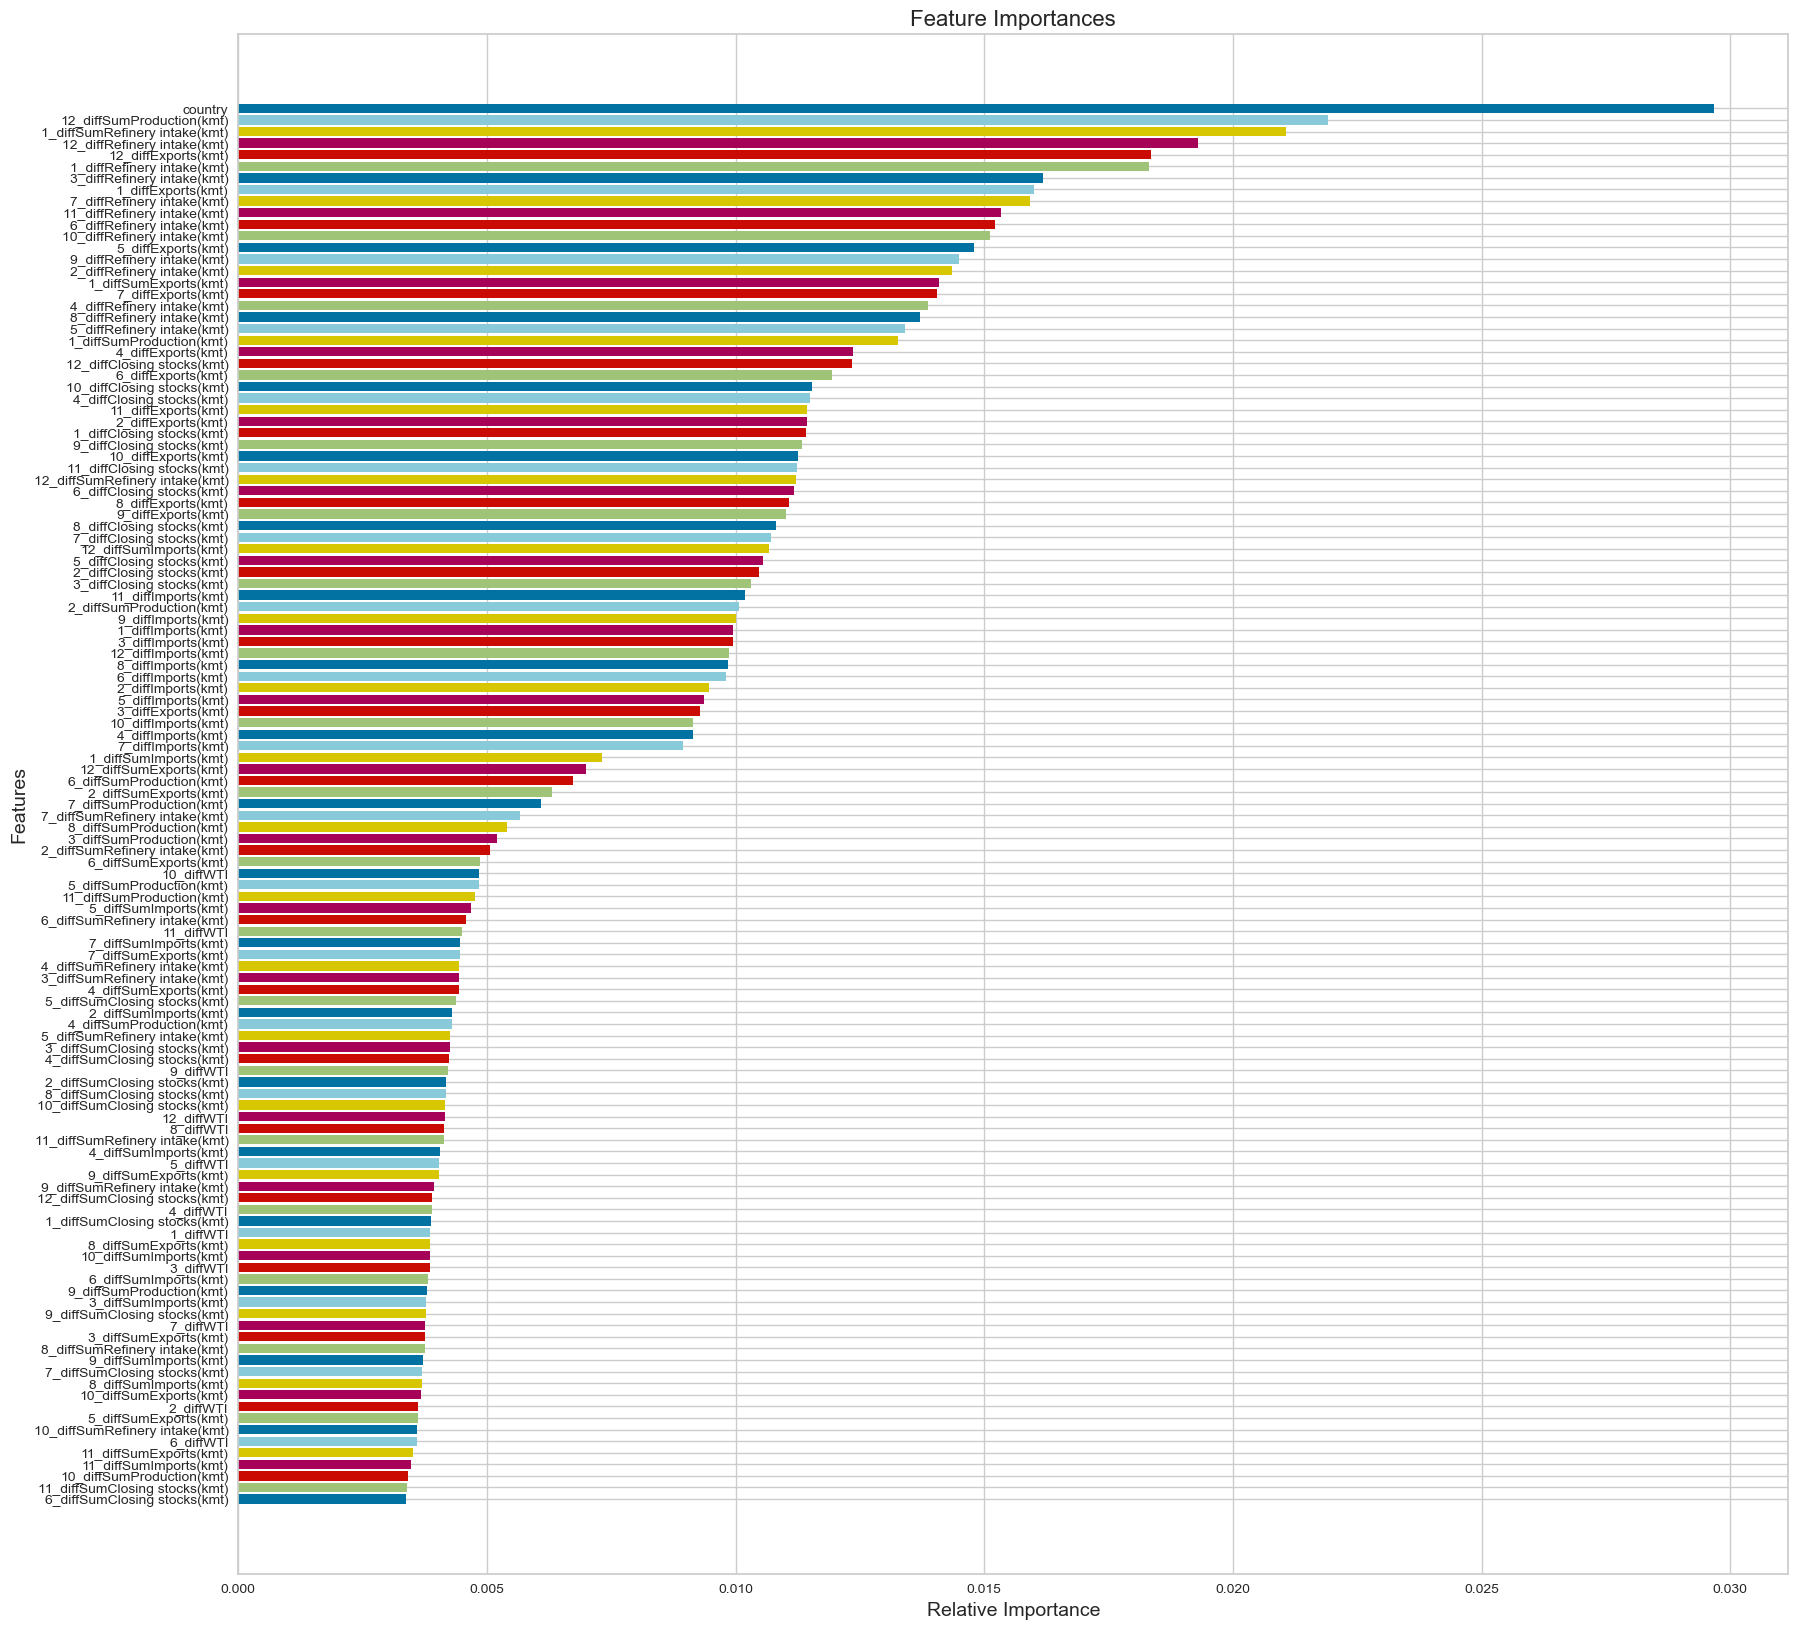

In [45]:
from yellowbrick.model_selection import FeatureImportances 

figure = plt.figure(figsize=[20, 20])
viz = FeatureImportances(selector.estimator, relative=False)
viz.fit(x, y)

plt.xlabel('Relative Importance', size=14)
plt.ylabel('Features', size=14)
plt.title(label='Feature Importances', size=16)
plt.show()

# Modelling :

# Logistic Regression :

In [46]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [47]:
acc_log_train = log_reg.score(x_train, y_train)
acc_log_train

0.7309269893355209

In [48]:
acc_log_test = log_reg.score(x_test, y_test)
acc_log_test

0.713254593175853

In [49]:
y_pred_train = log_reg.predict(x_train)
y_pred_test = log_reg.predict(x_test)

In [50]:
def modelEval(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    accuracy = accuracy_score(actual, predicted)
    class_rep = classification_report(actual, predicted)
    print(cm)
    print('The accuracy of the Model is :', accuracy)
    print(class_rep)

**Model Evaluation :**

In [51]:
print('                    Training Report           ')
modelEval(y_train, y_pred_train)

                    Training Report           
[[3501  495]
 [1145  954]]
The accuracy of the Model is : 0.7309269893355209
              precision    recall  f1-score   support

           0       0.75      0.88      0.81      3996
           1       0.66      0.45      0.54      2099

    accuracy                           0.73      6095
   macro avg       0.71      0.67      0.67      6095
weighted avg       0.72      0.73      0.72      6095



In [52]:
print('               Testing Report                            ')
modelEval(y_test, y_pred_test)

               Testing Report                            
[[850 139]
 [298 237]]
The accuracy of the Model is : 0.713254593175853
              precision    recall  f1-score   support

           0       0.74      0.86      0.80       989
           1       0.63      0.44      0.52       535

    accuracy                           0.71      1524
   macro avg       0.69      0.65      0.66      1524
weighted avg       0.70      0.71      0.70      1524



# Decision Tree Classifier :

In [53]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [54]:
acc_Dtree_train = tree.score(x_train, y_train)
acc_Dtree_train

1.0

In [55]:
acc_Dtree_test = tree.score(x_test, y_test)
acc_Dtree_test

0.6653543307086615

In [56]:
y_pred_dt_train = tree.predict(x_train)
y_pred_dt_test = tree.predict(x_test)

**Model Evaluation :**

In [57]:
print('                    Training Report           ')
modelEval(y_train, y_pred_dt_train)

                    Training Report           
[[3996    0]
 [   0 2099]]
The accuracy of the Model is : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3996
           1       1.00      1.00      1.00      2099

    accuracy                           1.00      6095
   macro avg       1.00      1.00      1.00      6095
weighted avg       1.00      1.00      1.00      6095



In [58]:
print('               Testing Report                            ')
modelEval(y_test, y_pred_dt_test)

               Testing Report                            
[[732 257]
 [253 282]]
The accuracy of the Model is : 0.6653543307086615
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       989
           1       0.52      0.53      0.53       535

    accuracy                           0.67      1524
   macro avg       0.63      0.63      0.63      1524
weighted avg       0.67      0.67      0.67      1524



# HyperParameter Tuning :

In [59]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [60]:
parameters = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']}

In [61]:
grid_tree = GridSearchCV(estimator = tree, param_grid = parameters, cv = 10, verbose = 3)
grid_tree.fit(x_train, y_train)

Fitting 10 folds for each of 90 candidates, totalling 900 fits
[CV 1/10] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=auto;, score=0.656 total time=   0.0s
[CV 2/10] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=auto;, score=0.656 total time=   0.0s
[CV 3/10] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=auto;, score=0.656 total time=   0.0s
[CV 4/10] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=auto;, score=0.656 total time=   0.0s
[CV 5/10] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=auto;, score=0.656 total time=   0.0s
[CV 6/10] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=auto;, score=0.655 total time=   0.0s
[CV 7/10] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=auto;, score=0.655 total time=   0.0s
[CV 8/10] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=auto;, score=0.655 total time=   0.0s
[CV 9/10] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_fea

[CV 10/10] END ccp_alpha=0.1, criterion=gini, max_depth=7, max_features=log2;, score=0.657 total time=   0.0s
[CV 1/10] END ccp_alpha=0.1, criterion=gini, max_depth=8, max_features=auto;, score=0.656 total time=   0.0s
[CV 2/10] END ccp_alpha=0.1, criterion=gini, max_depth=8, max_features=auto;, score=0.656 total time=   0.0s
[CV 3/10] END ccp_alpha=0.1, criterion=gini, max_depth=8, max_features=auto;, score=0.656 total time=   0.0s
[CV 4/10] END ccp_alpha=0.1, criterion=gini, max_depth=8, max_features=auto;, score=0.656 total time=   0.0s
[CV 5/10] END ccp_alpha=0.1, criterion=gini, max_depth=8, max_features=auto;, score=0.656 total time=   0.0s
[CV 6/10] END ccp_alpha=0.1, criterion=gini, max_depth=8, max_features=auto;, score=0.655 total time=   0.0s
[CV 7/10] END ccp_alpha=0.1, criterion=gini, max_depth=8, max_features=auto;, score=0.655 total time=   0.0s
[CV 8/10] END ccp_alpha=0.1, criterion=gini, max_depth=8, max_features=auto;, score=0.655 total time=   0.0s
[CV 9/10] END ccp_

[CV 10/10] END ccp_alpha=0.1, criterion=entropy, max_depth=5, max_features=sqrt;, score=0.657 total time=   0.0s
[CV 1/10] END ccp_alpha=0.1, criterion=entropy, max_depth=5, max_features=log2;, score=0.656 total time=   0.0s
[CV 2/10] END ccp_alpha=0.1, criterion=entropy, max_depth=5, max_features=log2;, score=0.656 total time=   0.0s
[CV 3/10] END ccp_alpha=0.1, criterion=entropy, max_depth=5, max_features=log2;, score=0.656 total time=   0.0s
[CV 4/10] END ccp_alpha=0.1, criterion=entropy, max_depth=5, max_features=log2;, score=0.656 total time=   0.0s
[CV 5/10] END ccp_alpha=0.1, criterion=entropy, max_depth=5, max_features=log2;, score=0.656 total time=   0.0s
[CV 6/10] END ccp_alpha=0.1, criterion=entropy, max_depth=5, max_features=log2;, score=0.655 total time=   0.0s
[CV 7/10] END ccp_alpha=0.1, criterion=entropy, max_depth=5, max_features=log2;, score=0.655 total time=   0.0s
[CV 8/10] END ccp_alpha=0.1, criterion=entropy, max_depth=5, max_features=log2;, score=0.655 total time

[CV 7/10] END ccp_alpha=0.1, criterion=entropy, max_depth=8, max_features=auto;, score=0.655 total time=   0.0s
[CV 8/10] END ccp_alpha=0.1, criterion=entropy, max_depth=8, max_features=auto;, score=0.655 total time=   0.0s
[CV 9/10] END ccp_alpha=0.1, criterion=entropy, max_depth=8, max_features=auto;, score=0.655 total time=   0.0s
[CV 10/10] END ccp_alpha=0.1, criterion=entropy, max_depth=8, max_features=auto;, score=0.657 total time=   0.0s
[CV 1/10] END ccp_alpha=0.1, criterion=entropy, max_depth=8, max_features=sqrt;, score=0.656 total time=   0.0s
[CV 2/10] END ccp_alpha=0.1, criterion=entropy, max_depth=8, max_features=sqrt;, score=0.656 total time=   0.0s
[CV 3/10] END ccp_alpha=0.1, criterion=entropy, max_depth=8, max_features=sqrt;, score=0.656 total time=   0.0s
[CV 4/10] END ccp_alpha=0.1, criterion=entropy, max_depth=8, max_features=sqrt;, score=0.656 total time=   0.0s
[CV 5/10] END ccp_alpha=0.1, criterion=entropy, max_depth=8, max_features=sqrt;, score=0.656 total time

[CV 2/10] END ccp_alpha=0.01, criterion=gini, max_depth=6, max_features=auto;, score=0.693 total time=   0.0s
[CV 3/10] END ccp_alpha=0.01, criterion=gini, max_depth=6, max_features=auto;, score=0.700 total time=   0.0s
[CV 4/10] END ccp_alpha=0.01, criterion=gini, max_depth=6, max_features=auto;, score=0.690 total time=   0.0s
[CV 5/10] END ccp_alpha=0.01, criterion=gini, max_depth=6, max_features=auto;, score=0.682 total time=   0.0s
[CV 6/10] END ccp_alpha=0.01, criterion=gini, max_depth=6, max_features=auto;, score=0.688 total time=   0.0s
[CV 7/10] END ccp_alpha=0.01, criterion=gini, max_depth=6, max_features=auto;, score=0.696 total time=   0.0s
[CV 8/10] END ccp_alpha=0.01, criterion=gini, max_depth=6, max_features=auto;, score=0.708 total time=   0.0s
[CV 9/10] END ccp_alpha=0.01, criterion=gini, max_depth=6, max_features=auto;, score=0.672 total time=   0.0s
[CV 10/10] END ccp_alpha=0.01, criterion=gini, max_depth=6, max_features=auto;, score=0.627 total time=   0.0s
[CV 1/10]

[CV 10/10] END ccp_alpha=0.01, criterion=gini, max_depth=8, max_features=sqrt;, score=0.701 total time=   0.0s
[CV 1/10] END ccp_alpha=0.01, criterion=gini, max_depth=8, max_features=log2;, score=0.718 total time=   0.0s
[CV 2/10] END ccp_alpha=0.01, criterion=gini, max_depth=8, max_features=log2;, score=0.656 total time=   0.0s
[CV 3/10] END ccp_alpha=0.01, criterion=gini, max_depth=8, max_features=log2;, score=0.664 total time=   0.0s
[CV 4/10] END ccp_alpha=0.01, criterion=gini, max_depth=8, max_features=log2;, score=0.693 total time=   0.0s
[CV 5/10] END ccp_alpha=0.01, criterion=gini, max_depth=8, max_features=log2;, score=0.656 total time=   0.0s
[CV 6/10] END ccp_alpha=0.01, criterion=gini, max_depth=8, max_features=log2;, score=0.655 total time=   0.0s
[CV 7/10] END ccp_alpha=0.01, criterion=gini, max_depth=8, max_features=log2;, score=0.683 total time=   0.0s
[CV 8/10] END ccp_alpha=0.01, criterion=gini, max_depth=8, max_features=log2;, score=0.727 total time=   0.0s
[CV 9/10]

[CV 3/10] END ccp_alpha=0.01, criterion=entropy, max_depth=6, max_features=sqrt;, score=0.725 total time=   0.0s
[CV 4/10] END ccp_alpha=0.01, criterion=entropy, max_depth=6, max_features=sqrt;, score=0.703 total time=   0.0s
[CV 5/10] END ccp_alpha=0.01, criterion=entropy, max_depth=6, max_features=sqrt;, score=0.685 total time=   0.0s
[CV 6/10] END ccp_alpha=0.01, criterion=entropy, max_depth=6, max_features=sqrt;, score=0.727 total time=   0.0s
[CV 7/10] END ccp_alpha=0.01, criterion=entropy, max_depth=6, max_features=sqrt;, score=0.700 total time=   0.0s
[CV 8/10] END ccp_alpha=0.01, criterion=entropy, max_depth=6, max_features=sqrt;, score=0.718 total time=   0.0s
[CV 9/10] END ccp_alpha=0.01, criterion=entropy, max_depth=6, max_features=sqrt;, score=0.745 total time=   0.0s
[CV 10/10] END ccp_alpha=0.01, criterion=entropy, max_depth=6, max_features=sqrt;, score=0.739 total time=   0.0s
[CV 1/10] END ccp_alpha=0.01, criterion=entropy, max_depth=6, max_features=log2;, score=0.702 t

[CV 10/10] END ccp_alpha=0.01, criterion=entropy, max_depth=8, max_features=log2;, score=0.708 total time=   0.0s
[CV 1/10] END ccp_alpha=0.01, criterion=entropy, max_depth=9, max_features=auto;, score=0.693 total time=   0.0s
[CV 2/10] END ccp_alpha=0.01, criterion=entropy, max_depth=9, max_features=auto;, score=0.702 total time=   0.0s
[CV 3/10] END ccp_alpha=0.01, criterion=entropy, max_depth=9, max_features=auto;, score=0.730 total time=   0.0s
[CV 4/10] END ccp_alpha=0.01, criterion=entropy, max_depth=9, max_features=auto;, score=0.652 total time=   0.0s
[CV 5/10] END ccp_alpha=0.01, criterion=entropy, max_depth=9, max_features=auto;, score=0.693 total time=   0.0s
[CV 6/10] END ccp_alpha=0.01, criterion=entropy, max_depth=9, max_features=auto;, score=0.693 total time=   0.0s
[CV 7/10] END ccp_alpha=0.01, criterion=entropy, max_depth=9, max_features=auto;, score=0.737 total time=   0.0s
[CV 8/10] END ccp_alpha=0.01, criterion=entropy, max_depth=9, max_features=auto;, score=0.736 t

[CV 6/10] END ccp_alpha=0.001, criterion=gini, max_depth=6, max_features=log2;, score=0.741 total time=   0.0s
[CV 7/10] END ccp_alpha=0.001, criterion=gini, max_depth=6, max_features=log2;, score=0.726 total time=   0.0s
[CV 8/10] END ccp_alpha=0.001, criterion=gini, max_depth=6, max_features=log2;, score=0.721 total time=   0.0s
[CV 9/10] END ccp_alpha=0.001, criterion=gini, max_depth=6, max_features=log2;, score=0.739 total time=   0.0s
[CV 10/10] END ccp_alpha=0.001, criterion=gini, max_depth=6, max_features=log2;, score=0.726 total time=   0.0s
[CV 1/10] END ccp_alpha=0.001, criterion=gini, max_depth=7, max_features=auto;, score=0.734 total time=   0.0s
[CV 2/10] END ccp_alpha=0.001, criterion=gini, max_depth=7, max_features=auto;, score=0.766 total time=   0.0s
[CV 3/10] END ccp_alpha=0.001, criterion=gini, max_depth=7, max_features=auto;, score=0.718 total time=   0.0s
[CV 4/10] END ccp_alpha=0.001, criterion=gini, max_depth=7, max_features=auto;, score=0.748 total time=   0.0s


[CV 2/10] END ccp_alpha=0.001, criterion=gini, max_depth=9, max_features=sqrt;, score=0.766 total time=   0.0s
[CV 3/10] END ccp_alpha=0.001, criterion=gini, max_depth=9, max_features=sqrt;, score=0.733 total time=   0.0s
[CV 4/10] END ccp_alpha=0.001, criterion=gini, max_depth=9, max_features=sqrt;, score=0.718 total time=   0.0s
[CV 5/10] END ccp_alpha=0.001, criterion=gini, max_depth=9, max_features=sqrt;, score=0.739 total time=   0.0s
[CV 6/10] END ccp_alpha=0.001, criterion=gini, max_depth=9, max_features=sqrt;, score=0.752 total time=   0.0s
[CV 7/10] END ccp_alpha=0.001, criterion=gini, max_depth=9, max_features=sqrt;, score=0.737 total time=   0.0s
[CV 8/10] END ccp_alpha=0.001, criterion=gini, max_depth=9, max_features=sqrt;, score=0.729 total time=   0.0s
[CV 9/10] END ccp_alpha=0.001, criterion=gini, max_depth=9, max_features=sqrt;, score=0.737 total time=   0.0s
[CV 10/10] END ccp_alpha=0.001, criterion=gini, max_depth=9, max_features=sqrt;, score=0.709 total time=   0.0s


[CV 4/10] END ccp_alpha=0.001, criterion=entropy, max_depth=7, max_features=auto;, score=0.749 total time=   0.0s
[CV 5/10] END ccp_alpha=0.001, criterion=entropy, max_depth=7, max_features=auto;, score=0.733 total time=   0.0s
[CV 6/10] END ccp_alpha=0.001, criterion=entropy, max_depth=7, max_features=auto;, score=0.731 total time=   0.0s
[CV 7/10] END ccp_alpha=0.001, criterion=entropy, max_depth=7, max_features=auto;, score=0.732 total time=   0.0s
[CV 8/10] END ccp_alpha=0.001, criterion=entropy, max_depth=7, max_features=auto;, score=0.744 total time=   0.0s
[CV 9/10] END ccp_alpha=0.001, criterion=entropy, max_depth=7, max_features=auto;, score=0.736 total time=   0.0s
[CV 10/10] END ccp_alpha=0.001, criterion=entropy, max_depth=7, max_features=auto;, score=0.726 total time=   0.0s
[CV 1/10] END ccp_alpha=0.001, criterion=entropy, max_depth=7, max_features=sqrt;, score=0.734 total time=   0.0s
[CV 2/10] END ccp_alpha=0.001, criterion=entropy, max_depth=7, max_features=sqrt;, scor

[CV 1/10] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=log2;, score=0.733 total time=   0.0s
[CV 2/10] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=log2;, score=0.744 total time=   0.0s
[CV 3/10] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=log2;, score=0.720 total time=   0.0s
[CV 4/10] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=log2;, score=0.716 total time=   0.0s
[CV 5/10] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=log2;, score=0.725 total time=   0.0s
[CV 6/10] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=log2;, score=0.731 total time=   0.0s
[CV 7/10] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=log2;, score=0.709 total time=   0.0s
[CV 8/10] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=log2;, score=0.706 total time=   0.0s
[CV 9/10] END ccp_alpha=0.001, criterion=entropy, max_depth=9, max_features=log2;, score

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=3)

In [62]:
final_model = grid_tree.best_estimator_
final_model

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=7,
                       max_features='auto')

In [63]:
clf_Dtree = DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=7,
                       max_features='auto')
clf_Dtree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=7,
                       max_features='auto')

In [64]:
acc_grid_tree_train = clf_Dtree.score(x_train, y_train)
acc_grid_tree_train

0.7507793273174733

In [65]:
acc_grid_tree_test = clf_Dtree.score(x_test, y_test)
acc_grid_tree_test

0.7198162729658792

In [66]:
y_pred_gtree_train = clf_Dtree.predict(x_train)
y_pred_gtree_test = clf_Dtree.predict(x_test)

**Model Evaluation :**

In [67]:
print('                    Training Report           ')
modelEval(y_train, y_pred_gtree_train)

                    Training Report           
[[3532  464]
 [1055 1044]]
The accuracy of the Model is : 0.7507793273174733
              precision    recall  f1-score   support

           0       0.77      0.88      0.82      3996
           1       0.69      0.50      0.58      2099

    accuracy                           0.75      6095
   macro avg       0.73      0.69      0.70      6095
weighted avg       0.74      0.75      0.74      6095



In [68]:
print('               Testing Report                            ')
modelEval(y_test, y_pred_gtree_test)

               Testing Report                            
[[850 139]
 [288 247]]
The accuracy of the Model is : 0.7198162729658792
              precision    recall  f1-score   support

           0       0.75      0.86      0.80       989
           1       0.64      0.46      0.54       535

    accuracy                           0.72      1524
   macro avg       0.69      0.66      0.67      1524
weighted avg       0.71      0.72      0.71      1524



# AdaBoost Classifier :

In [69]:
from sklearn.ensemble import AdaBoostClassifier
ada_class = AdaBoostClassifier(base_estimator = clf_Dtree)
ada_class.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.001,
                                                         criterion='entropy',
                                                         max_depth=7,
                                                         max_features='auto'))

In [70]:
acc_adaTree_train = ada_class.score(x_train, y_train)
acc_adaTree_train

1.0

In [71]:
acc_adaTree_test = ada_class.score(x_test, y_test)
acc_adaTree_test

0.6548556430446194

In [72]:
y_pred_ada_train = ada_class.predict(x_train)
y_pred_ada_test = ada_class.predict(x_test)

**Model Evaluation :**

In [73]:
print('                    Training Report           ')
modelEval(y_train, y_pred_ada_train)

                    Training Report           
[[3996    0]
 [   0 2099]]
The accuracy of the Model is : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3996
           1       1.00      1.00      1.00      2099

    accuracy                           1.00      6095
   macro avg       1.00      1.00      1.00      6095
weighted avg       1.00      1.00      1.00      6095



In [74]:
print('               Testing Report                            ')
modelEval(y_test, y_pred_ada_test)

               Testing Report                            
[[742 247]
 [279 256]]
The accuracy of the Model is : 0.6548556430446194
              precision    recall  f1-score   support

           0       0.73      0.75      0.74       989
           1       0.51      0.48      0.49       535

    accuracy                           0.65      1524
   macro avg       0.62      0.61      0.62      1524
weighted avg       0.65      0.65      0.65      1524



# Random Forest Classifier :

In [75]:
from sklearn.ensemble import RandomForestClassifier

clf_randF = RandomForestClassifier()
clf_randF.fit(x_train, y_train)

RandomForestClassifier()

In [76]:
acc_randForest_train = clf_randF.score(x_train, y_train)
acc_randForest_train

1.0

In [77]:
acc_randForest_test = clf_randF.score(x_test, y_test)
acc_randForest_test

0.7434383202099738

In [78]:
y_pred_rf_train = clf_randF.predict(x_train)
y_pred_rf_test = clf_randF.predict(x_test)

**Model Evaluation :**

In [79]:
print('                    Training Report           ')
modelEval(y_train, y_pred_rf_train)

                    Training Report           
[[3996    0]
 [   0 2099]]
The accuracy of the Model is : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3996
           1       1.00      1.00      1.00      2099

    accuracy                           1.00      6095
   macro avg       1.00      1.00      1.00      6095
weighted avg       1.00      1.00      1.00      6095



In [80]:
print('               Testing Report                            ')
modelEval(y_test, y_pred_rf_test)

               Testing Report                            
[[867 122]
 [269 266]]
The accuracy of the Model is : 0.7434383202099738
              precision    recall  f1-score   support

           0       0.76      0.88      0.82       989
           1       0.69      0.50      0.58       535

    accuracy                           0.74      1524
   macro avg       0.72      0.69      0.70      1524
weighted avg       0.74      0.74      0.73      1524



# RandomizedSearchCV on RandomForest:

In [81]:
from scipy.stats import randint as sp_randint 

In [82]:
param_dist = {"max_depth": range(2,5),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "n_estimators": [20, 50, 100, 400, 700],
              "criterion" : ["gini", "entropy"],
              'max_features': ['sqrt', 'log2', None]
             }

In [83]:
from scipy.stats import randint as sp_randint 

In [84]:
clf_randForest = RandomForestClassifier()

rand_search = RandomizedSearchCV(clf_randForest,param_dist, n_iter=50, verbose = 3, n_jobs = -1)
rand_search.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 5),
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021E2FF44490>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021E2FF179D0>,
                                        'n_estimators': [20, 50, 100, 400,
                                                         700]},
                   verbose=3)

In [85]:
final_modelR = rand_search.best_estimator_
final_modelR

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=4,
                       max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=8, n_estimators=700)

In [86]:
clf_randForest = RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=4,
                       max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=8, n_estimators=700)
clf_randForest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=4,
                       max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=8, n_estimators=700)

In [87]:
acc_randomSearchF_train = clf_randForest.score(x_train, y_train)
acc_randomSearchF_train

0.7594749794913864

In [88]:
acc_randomSearchF_test = clf_randForest.score(x_test, y_test)
acc_randomSearchF_test

0.7421259842519685

In [89]:
y_pred_RandF_train = clf_randForest.predict(x_train)
y_pred_RandF_test = clf_randForest.predict(x_test)

**Model Evaluation :**

In [90]:
print('                    Training Report           ')
modelEval(y_train, y_pred_RandF_train)

                    Training Report           
[[3636  360]
 [1106  993]]
The accuracy of the Model is : 0.7594749794913864
              precision    recall  f1-score   support

           0       0.77      0.91      0.83      3996
           1       0.73      0.47      0.58      2099

    accuracy                           0.76      6095
   macro avg       0.75      0.69      0.70      6095
weighted avg       0.76      0.76      0.74      6095



In [91]:
print('               Testing Report                            ')
modelEval(y_test, y_pred_RandF_test)

               Testing Report                            
[[886 103]
 [290 245]]
The accuracy of the Model is : 0.7421259842519685
              precision    recall  f1-score   support

           0       0.75      0.90      0.82       989
           1       0.70      0.46      0.55       535

    accuracy                           0.74      1524
   macro avg       0.73      0.68      0.69      1524
weighted avg       0.74      0.74      0.73      1524



# BaggingClassifier on RandomForest Classifier :

In [98]:
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(base_estimator = clf_randForest, n_estimators = 100)
bag_clf.fit(x_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=False,
                                                        criterion='entropy',
                                                        max_depth=4,
                                                        max_features='sqrt',
                                                        min_samples_leaf=5,
                                                        min_samples_split=8,
                                                        n_estimators=700),
                  n_estimators=100)

In [99]:
acc_bag_train = bag_clf.score(x_train, y_train)
acc_bag_train

0.7591468416735029

In [100]:
acc_bag_test = bag_clf.score(x_test, y_test)
acc_bag_test

0.7434383202099738

In [101]:
y_pred_bag_train = bag_clf.predict(x_train)
y_pred_bag_test = bag_clf.predict(x_test)

**Model Evaluation :**

In [102]:
print('                    Training Report           ')
modelEval(y_train, y_pred_bag_train)

                    Training Report           
[[3643  353]
 [1115  984]]
The accuracy of the Model is : 0.7591468416735029
              precision    recall  f1-score   support

           0       0.77      0.91      0.83      3996
           1       0.74      0.47      0.57      2099

    accuracy                           0.76      6095
   macro avg       0.75      0.69      0.70      6095
weighted avg       0.76      0.76      0.74      6095



In [103]:
print('               Testing Report                            ')
modelEval(y_test, y_pred_bag_test)

               Testing Report                            
[[888 101]
 [290 245]]
The accuracy of the Model is : 0.7434383202099738
              precision    recall  f1-score   support

           0       0.75      0.90      0.82       989
           1       0.71      0.46      0.56       535

    accuracy                           0.74      1524
   macro avg       0.73      0.68      0.69      1524
weighted avg       0.74      0.74      0.73      1524



# GradientBoostingClassifier :

In [104]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators = 500)
gb_clf.fit(x_train, y_train)

GradientBoostingClassifier(n_estimators=500)

In [105]:
acc_gb_train = gb_clf.score(x_train, y_train)
acc_gb_train

0.9264971287940935

In [106]:
acc_gb_test = gb_clf.score(x_test, y_test)
acc_gb_test

0.739501312335958

In [107]:
y_pred_grad_train = gb_clf.predict(x_train)
y_pred_grad_test = gb_clf.predict(x_test)

**Model Evaluation :**

In [108]:
print('                    Training Report           ')
modelEval(y_train, y_pred_grad_train)

                    Training Report           
[[3891  105]
 [ 343 1756]]
The accuracy of the Model is : 0.9264971287940935
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      3996
           1       0.94      0.84      0.89      2099

    accuracy                           0.93      6095
   macro avg       0.93      0.91      0.92      6095
weighted avg       0.93      0.93      0.93      6095



In [109]:
print('               Testing Report                            ')
modelEval(y_test, y_pred_grad_test)

               Testing Report                            
[[860 129]
 [268 267]]
The accuracy of the Model is : 0.739501312335958
              precision    recall  f1-score   support

           0       0.76      0.87      0.81       989
           1       0.67      0.50      0.57       535

    accuracy                           0.74      1524
   macro avg       0.72      0.68      0.69      1524
weighted avg       0.73      0.74      0.73      1524



# KNeighborsClassifier :

In [110]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(x_train, y_train)

KNeighborsClassifier()

In [111]:
acc_kn_train = knn.score(x_train, y_train)
acc_kn_train

0.7340442986054143

In [112]:
acc_kn_test = knn.score(x_test, y_test)
acc_kn_test

0.666010498687664

In [113]:
y_pred_kn_train = knn.predict(x_train)
y_pred_kn_test = knn.predict(x_test)

**Model Evaluation :**

In [114]:
print('                    Training Report           ')
modelEval(y_train, y_pred_kn_train)

                    Training Report           
[[3941   55]
 [1566  533]]
The accuracy of the Model is : 0.7340442986054143
              precision    recall  f1-score   support

           0       0.72      0.99      0.83      3996
           1       0.91      0.25      0.40      2099

    accuracy                           0.73      6095
   macro avg       0.81      0.62      0.61      6095
weighted avg       0.78      0.73      0.68      6095



In [115]:
print('               Testing Report                            ')
modelEval(y_test, y_pred_kn_test)

               Testing Report                            
[[950  39]
 [470  65]]
The accuracy of the Model is : 0.666010498687664
              precision    recall  f1-score   support

           0       0.67      0.96      0.79       989
           1       0.62      0.12      0.20       535

    accuracy                           0.67      1524
   macro avg       0.65      0.54      0.50      1524
weighted avg       0.65      0.67      0.58      1524



# XGBClassifier :

In [116]:
import xgboost as xgb

In [117]:
xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [118]:
acc_xgb_train = xgb_cl.score(x_train, y_train)
acc_xgb_train

0.9977030352748154

In [119]:
acc_xgb_test = xgb_cl.score(x_test, y_test)
acc_xgb_test

0.7329396325459318

In [120]:
y_pred_xg_train = xgb_cl.predict(x_train)
y_pred_xg_test = xgb_cl.predict(x_test)

**Model Evaluation :**

In [121]:
print('                    Training Report           ')
modelEval(y_train, y_pred_xg_train)

                    Training Report           
[[3995    1]
 [  13 2086]]
The accuracy of the Model is : 0.9977030352748154
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3996
           1       1.00      0.99      1.00      2099

    accuracy                           1.00      6095
   macro avg       1.00      1.00      1.00      6095
weighted avg       1.00      1.00      1.00      6095



In [122]:
print('               Testing Report                            ')
modelEval(y_test, y_pred_xg_test)

               Testing Report                            
[[838 151]
 [256 279]]
The accuracy of the Model is : 0.7329396325459318
              precision    recall  f1-score   support

           0       0.77      0.85      0.80       989
           1       0.65      0.52      0.58       535

    accuracy                           0.73      1524
   macro avg       0.71      0.68      0.69      1524
weighted avg       0.72      0.73      0.73      1524



In [123]:
models = pd.DataFrame({ 'Model': ['Logistic Regression', 'Decision Tree Classifier','GridSearch(Dtree)', 'ADABoost Classifier',
                                 'Random Forest Classifier','RandomizedSearchCV(RandF)', 'Bagging Classifier(RF)',
                                 'GradientBoostingClassifier', 'KNeighborsClassifier', 'XGBClassifier'],
                       'Training Score': [acc_log_train, acc_Dtree_train,acc_grid_tree_train, acc_adaTree_train,
                                         acc_randForest_train,acc_randomSearchF_train,
                                          acc_bag_train, acc_gb_train, acc_kn_train, acc_xgb_train],
                       'Testing Score': [acc_log_test, acc_Dtree_test, acc_grid_tree_test, 
                                         acc_adaTree_test, acc_randForest_test,acc_randomSearchF_test,
                                         acc_bag_test,acc_gb_test, acc_kn_test, acc_xgb_test]})
models.sort_values(by = ['Training Score', 'Testing Score'], ascending = False, ignore_index = True)

Model  Training Score  Testing Score
0    Random Forest Classifier        1.000000       0.743438
1    Decision Tree Classifier        1.000000       0.665354
2         ADABoost Classifier        1.000000       0.654856
3               XGBClassifier        0.997703       0.732940
4  GradientBoostingClassifier        0.926497       0.739501
5   RandomizedSearchCV(RandF)        0.759475       0.742126
6      Bagging Classifier(RF)        0.759147       0.743438
7           GridSearch(Dtree)        0.750779       0.719816
8        KNeighborsClassifier        0.734044       0.666010
9         Logistic Regression        0.730927       0.713255

# Kfold Cross Validation :

In [124]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [125]:
classifiers = []

classifiers.append(LogisticRegression())
classifiers.append(RandomForestClassifier())
classifiers.append(DecisionTreeClassifier())
classifiers.append(BaggingClassifier(n_estimators = 100))
classifiers.append(AdaBoostClassifier())
classifiers.append(KNeighborsClassifier(n_neighbors = 5))
classifiers.append(GradientBoostingClassifier())
classifiers.append(DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=7,
                       max_features='auto'))
classifiers.append(RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=4,
                       max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=8, n_estimators=700))
classifiers.append(xgb.XGBClassifier())

In [126]:
cv_results = []

for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, x_train, y_train, scoring = 'accuracy', cv = 10))

In [127]:
cv_results

[array([0.73606557, 0.72459016, 0.69672131, 0.71147541, 0.71639344,
        0.71264368, 0.71592775, 0.71264368, 0.70114943, 0.69950739]),
 array([0.7442623 , 0.78196721, 0.73442623, 0.76229508, 0.75737705,
        0.76190476, 0.74876847, 0.7454844 , 0.75862069, 0.72906404]),
 array([0.65901639, 0.70655738, 0.66885246, 0.66229508, 0.64754098,
        0.63546798, 0.65188834, 0.66502463, 0.66174056, 0.65845649]),
 array([0.7557377 , 0.7852459 , 0.74098361, 0.74754098, 0.75245902,
        0.77339901, 0.75533662, 0.75369458, 0.74055829, 0.74055829]),
 array([0.7442623 , 0.75737705, 0.73770492, 0.74262295, 0.73606557,
        0.7454844 , 0.73234811, 0.72906404, 0.73891626, 0.74055829]),
 array([0.70163934, 0.67213115, 0.66393443, 0.67868852, 0.68688525,
        0.68308703, 0.65681445, 0.67159278, 0.66995074, 0.66338259]),
 array([0.76229508, 0.7704918 , 0.73770492, 0.74262295, 0.75245902,
        0.7635468 , 0.75205255, 0.75369458, 0.7454844 , 0.74876847]),
 array([0.73442623, 0.74098361, 0.

In [128]:
cv_mean = []
cv_std = []
for cv_result in cv_results:
    cv_mean.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [129]:
cv_res = pd.DataFrame({'Cross Validation Mean': cv_mean, 'Cross Validation Std': cv_std, 'Algorithm':['Logistic Regression', 'Decision Tree Classifier','GridSearch(Dtree)', 'ADABoost Classifier',
                                 'Random Forest Classifier','RandomizedSearchCV(RandF)', 'Bagging Classifier(RF)',
                                 'GradientBoostingClassifier', 'KNeighborsClassifier', 'XGBClassifier']})
cv_res.sort_values(by = 'Cross Validation Mean', ascending  = False, ignore_index = True)

Cross Validation Mean  Cross Validation Std                   Algorithm
0               0.754551              0.013890         ADABoost Classifier
1               0.752912              0.009598      Bagging Classifier(RF)
2               0.752745              0.010097        KNeighborsClassifier
3               0.752417              0.014563    Decision Tree Classifier
4               0.745032              0.012231               XGBClassifier
5               0.740440              0.007453    Random Forest Classifier
6               0.734375              0.009883  GradientBoostingClassifier
7               0.712712              0.011295         Logistic Regression
8               0.674811              0.012502   RandomizedSearchCV(RandF)
9               0.661684              0.017542           GridSearch(Dtree)

# Hyper Parameter Tuning on ADABoost Classifier : 

In [130]:
search_grid={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1, 0.05]}

In [132]:
ada_clf = AdaBoostClassifier(base_estimator= clf_Dtree)

In [133]:
grid_clf = GridSearchCV(ada_clf, search_grid, cv=5, verbose=3, n_jobs=1)
grid_clf.fit(x_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END learning_rate=0.001, n_estimators=500;, score=0.771 total time=   8.9s
[CV 2/5] END learning_rate=0.001, n_estimators=500;, score=0.756 total time=   8.9s
[CV 3/5] END learning_rate=0.001, n_estimators=500;, score=0.756 total time=  10.4s
[CV 4/5] END learning_rate=0.001, n_estimators=500;, score=0.751 total time=  12.1s
[CV 5/5] END learning_rate=0.001, n_estimators=500;, score=0.752 total time=  11.3s
[CV 1/5] END learning_rate=0.001, n_estimators=1000;, score=0.765 total time=  21.9s
[CV 2/5] END learning_rate=0.001, n_estimators=1000;, score=0.746 total time=  21.6s
[CV 3/5] END learning_rate=0.001, n_estimators=1000;, score=0.763 total time=  20.7s
[CV 4/5] END learning_rate=0.001, n_estimators=1000;, score=0.749 total time=  22.2s
[CV 5/5] END learning_rate=0.001, n_estimators=1000;, score=0.751 total time=  20.1s
[CV 1/5] END learning_rate=0.001, n_estimators=2000;, score=0.772 total time=  41.2s
[CV 2/5] 

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.001,
                                                                                criterion='entropy',
                                                                                max_depth=7,
                                                                                max_features='auto')),
             n_jobs=1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.05],
                         'n_estimators': [500, 1000, 2000]},
             verbose=3)

In [134]:
final_ada = grid_clf.best_estimator_
final_ada

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.001,
                                                         criterion='entropy',
                                                         max_depth=7,
                                                         max_features='auto'),
                   learning_rate=0.001, n_estimators=500)

In [138]:
ada_clf = AdaBoostClassifier(base_estimator= DecisionTreeClassifier(ccp_alpha=0.001,
                                                         criterion='entropy',
                                                         max_depth=7,
                                                         max_features='auto'),learning_rate=0.001, n_estimators=500)
ada_clf.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.001,
                                                         criterion='entropy',
                                                         max_depth=7,
                                                         max_features='auto'),
                   learning_rate=0.001, n_estimators=500)

In [139]:
y_pred_gridADA_train = ada_clf.predict(x_train)
y_pred_grid_ADA_test = ada_clf.predict(x_test)

**Model Evaluation :**

In [140]:
print('                    Training Report           ')
modelEval(y_train, y_pred_gridADA_train)

                    Training Report           
[[3849  147]
 [ 819 1280]]
The accuracy of the Model is : 0.8415094339622642
              precision    recall  f1-score   support

           0       0.82      0.96      0.89      3996
           1       0.90      0.61      0.73      2099

    accuracy                           0.84      6095
   macro avg       0.86      0.79      0.81      6095
weighted avg       0.85      0.84      0.83      6095



In [141]:
print('               Testing Report                            ')
modelEval(y_test, y_pred_grid_ADA_test)

               Testing Report                            
[[873 116]
 [272 263]]
The accuracy of the Model is : 0.7454068241469817
              precision    recall  f1-score   support

           0       0.76      0.88      0.82       989
           1       0.69      0.49      0.58       535

    accuracy                           0.75      1524
   macro avg       0.73      0.69      0.70      1524
weighted avg       0.74      0.75      0.73      1524



In [142]:
test_df = pd.read_csv('Oil_test.csv')

In [143]:
test_df.head()

ID  month  country  1_diffClosing stocks(kmt)  1_diffExports(kmt)  \
0  ID03667      7       70                      115.0              0.0000   
1  ID06089      2       67                      135.0            -80.0000   
2  ID03095      3       38                      698.0              0.0000   
3  ID02233     12       54                      -12.0              0.0000   
4  ID03119     10       29                        0.0             -0.1492   

   1_diffImports(kmt)  1_diffRefinery intake(kmt)  1_diffWTI  \
0                64.0                       101.0       3.47   
1              1043.0                       543.0       3.73   
2               828.0                       328.0      -0.37   
3                -1.0                        27.0      -5.95   
4                 0.0                         0.0       7.92   

   1_diffSumClosing stocks(kmt)  1_diffSumExports(kmt)  ...  \
0                    -1389.7911              8409.3483  ...   
1                   -33236.7385             10687.6499  ...   
2                     7872.1638              1455.8212  ...   
3                      195.2005              7500.1033  ...   
4                    -2418.4155             -4488.9974  ...   

   12_diffClosing stocks(kmt)  12_diffExports(kmt)  12_diffImports(kmt)  \
0                       277.0               0.0000                -74.0   
1                      -313.0             -25.0000               -833.0   
2                      -303.0               0.0000               2926.0   
3                       -73.0             -19.0000               -280.0   
4                         0.0             -33.4329                  0.0   

   12_diffRefinery intake(kmt)  12_diffWTI  12_diffSumClosing stocks(kmt)  \
0                       -461.0        1.56                      2053.0322   
1                       -457.0        4.25                       556.2058   
2                       2213.0        3.29                     -5669.9954   
3                        -62.0       -5.62                      3217.0304   
4                          0.0        0.62                       672.6503   

   12_diffSumExports(kmt)  12_diffSumImports(kmt)  12_diffSumProduction(kmt)  \
0             -12407.3611              -6992.4780                -10142.2844   
1              -6009.6068               -893.0590                -11152.6291   
2               6087.2918               -305.7071                  8436.4626   
3              -6563.6422              -3587.5152                -13053.6586   
4               5374.9922               4515.2537                 11351.4010   

   12_diffSumRefinery intake(kmt)  
0                        345.4324  
1                     -38711.0815  
2                      12519.3416  
3                     -13005.0503  
4                     149904.7276  

[5 rows x 123 columns]

In [144]:
test_df.isna().sum()

ID                                 0
month                              0
country                            0
1_diffClosing stocks(kmt)         63
1_diffExports(kmt)                 0
                                  ..
12_diffSumClosing stocks(kmt)      0
12_diffSumExports(kmt)             0
12_diffSumImports(kmt)             0
12_diffSumProduction(kmt)          0
12_diffSumRefinery intake(kmt)     0
Length: 123, dtype: int64

In [145]:
test_df['1_diffClosing stocks(kmt)'].fillna(test_df['1_diffClosing stocks(kmt)'].median(), inplace = True)

In [146]:
test_df = test_df.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [148]:
test_df.drop('month', axis = 1, inplace = True)

country


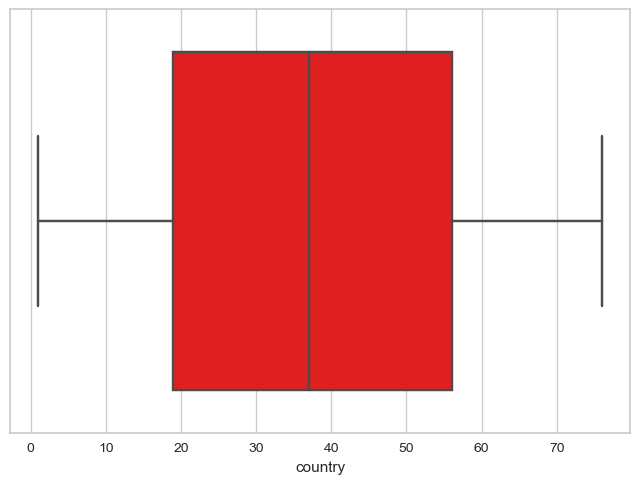

1_diffClosing stocks(kmt)


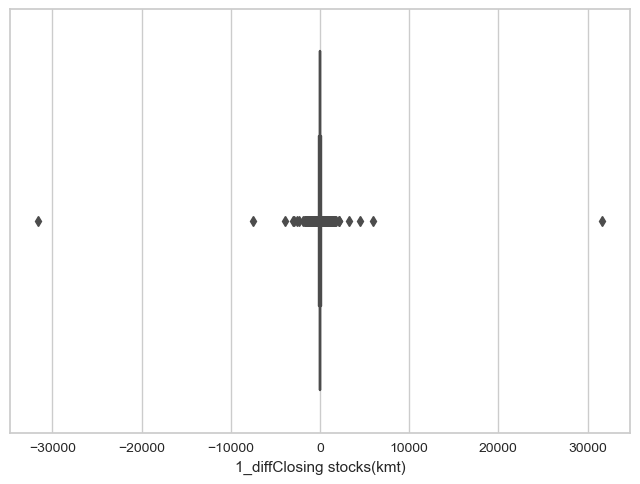

1_diffExports(kmt)


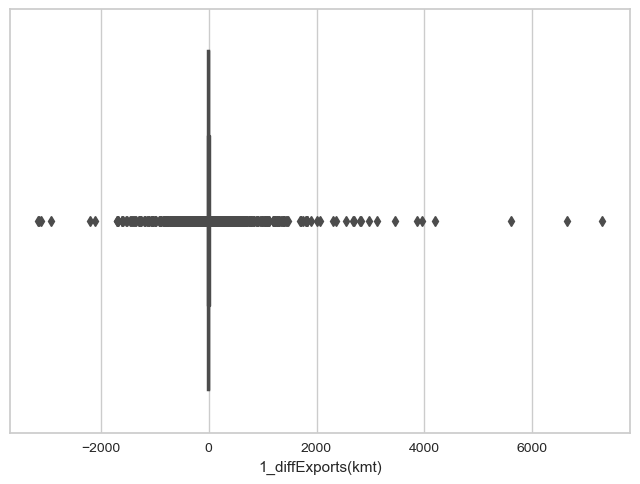

1_diffImports(kmt)


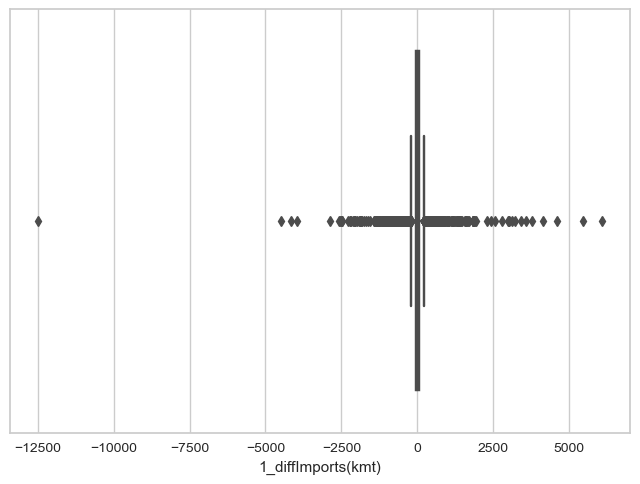

1_diffRefinery intake(kmt)


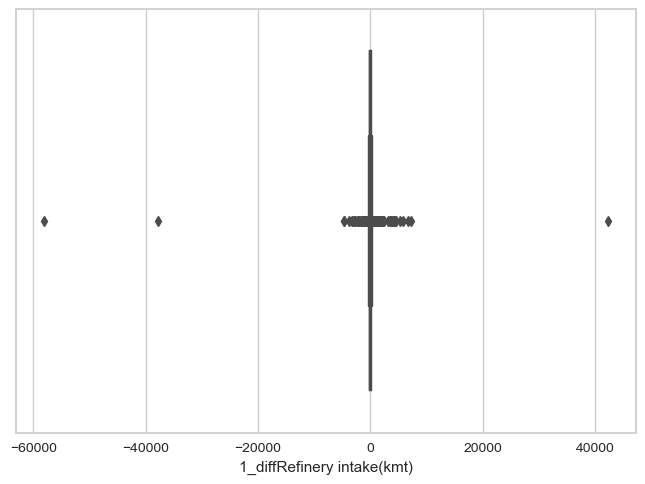

1_diffWTI


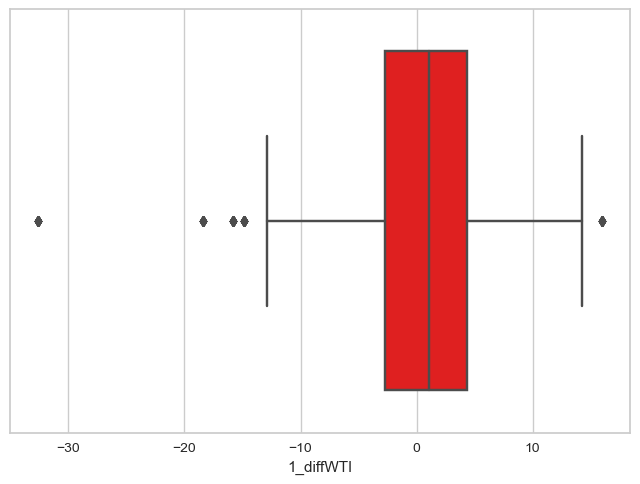

1_diffSumClosing stocks(kmt)


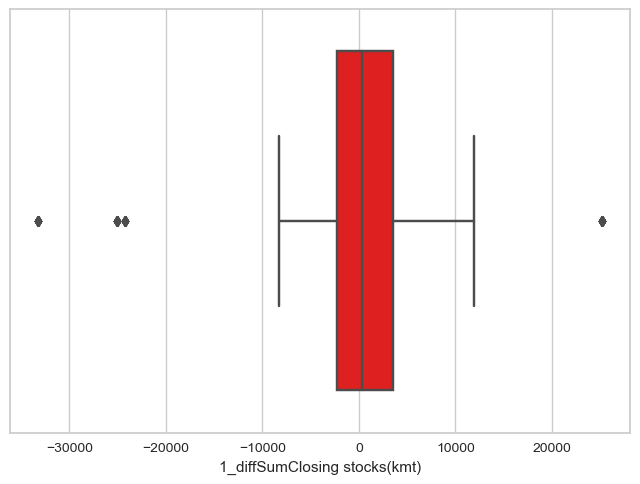

1_diffSumExports(kmt)


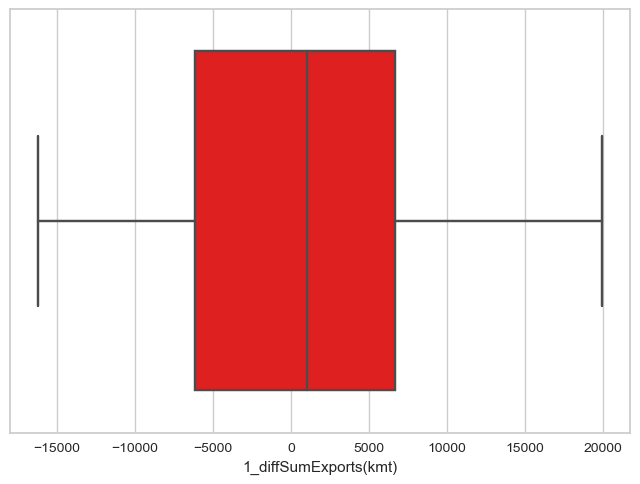

1_diffSumImports(kmt)


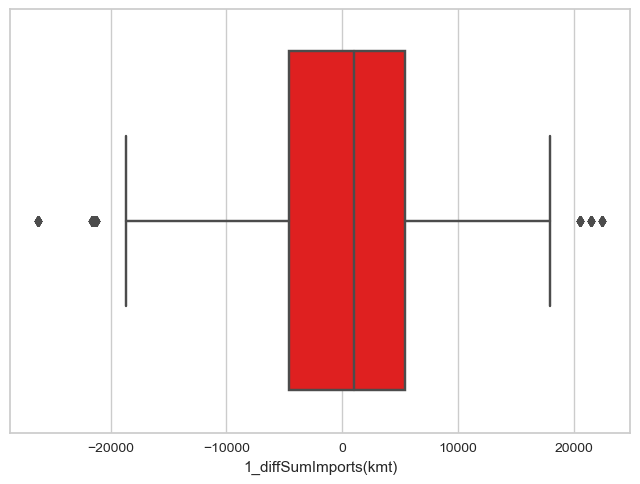

1_diffSumProduction(kmt)


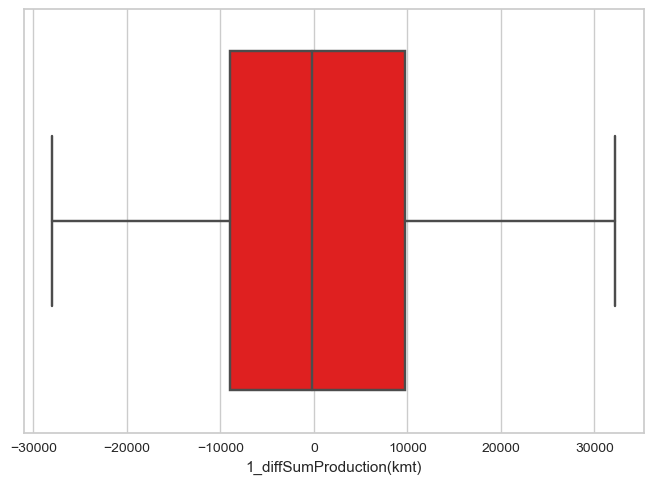

1_diffSumRefinery intake(kmt)


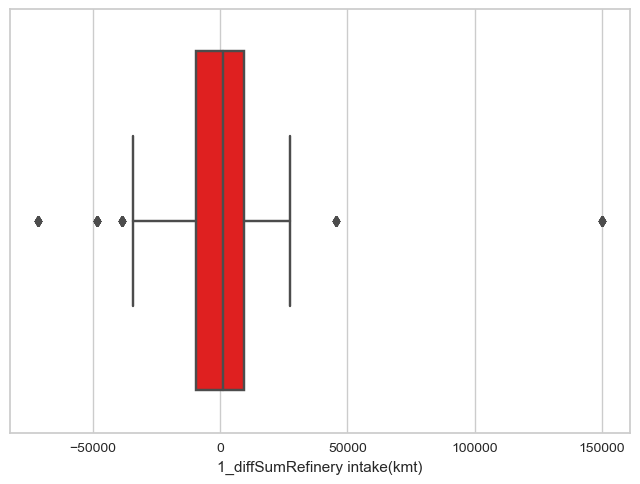

2_diffClosing stocks(kmt)


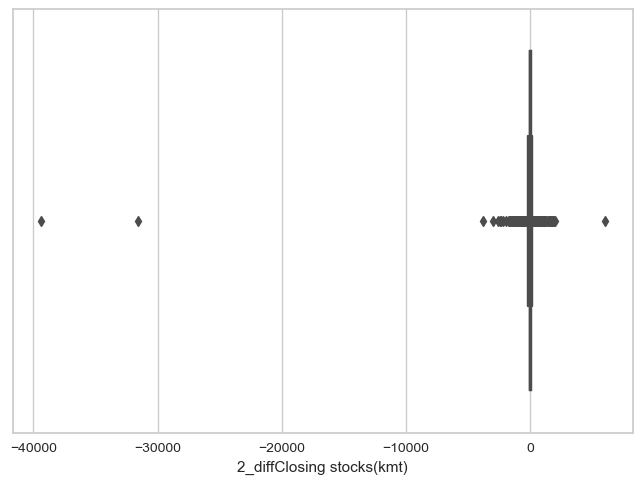

2_diffExports(kmt)


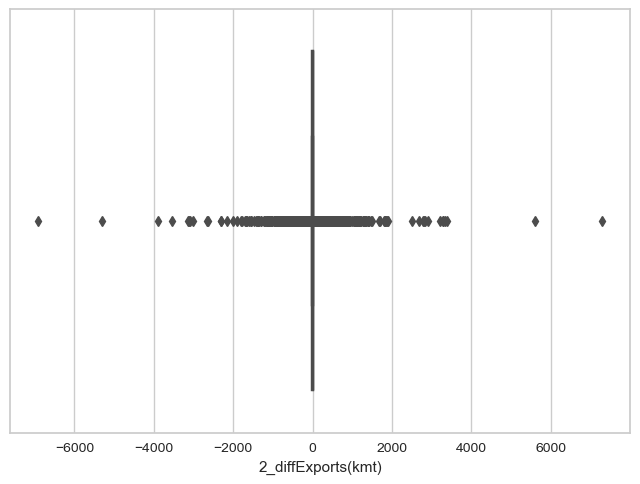

2_diffImports(kmt)


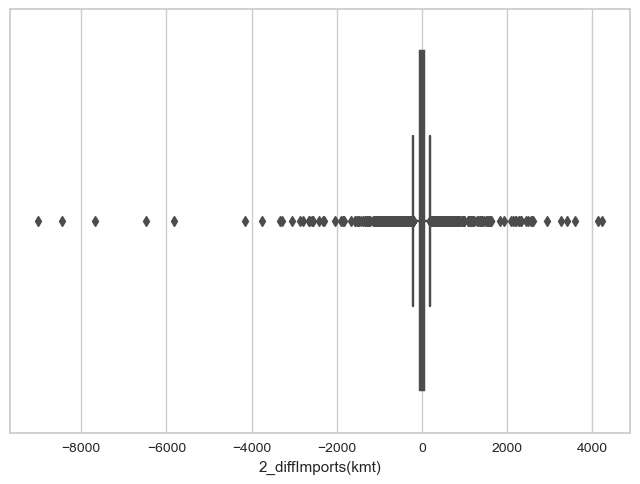

2_diffRefinery intake(kmt)


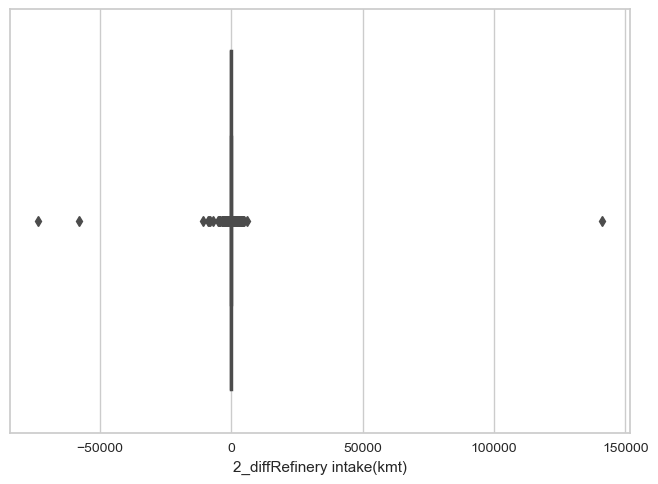

2_diffWTI


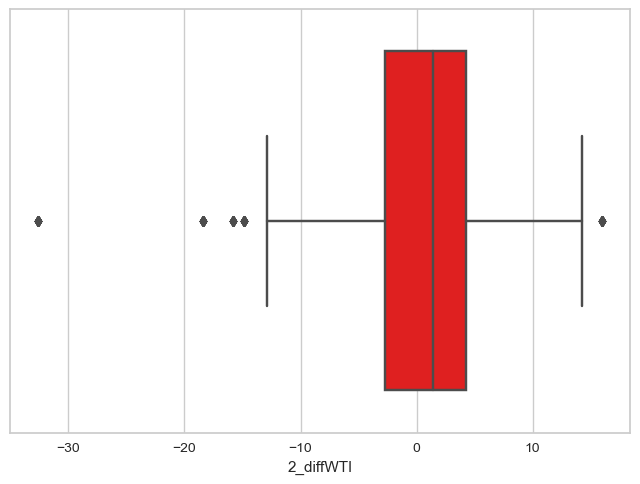

2_diffSumClosing stocks(kmt)


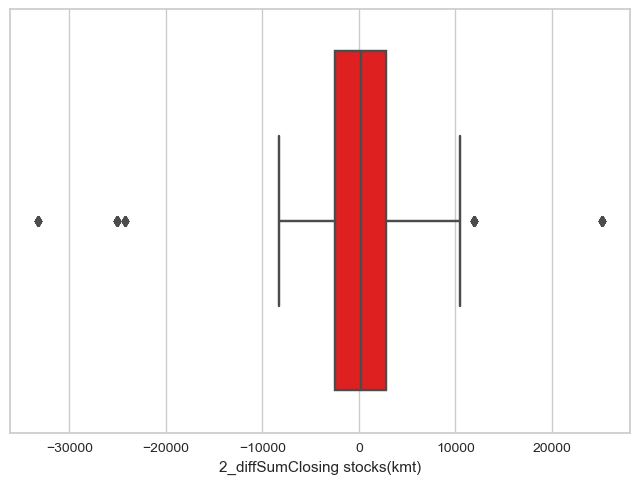

2_diffSumExports(kmt)


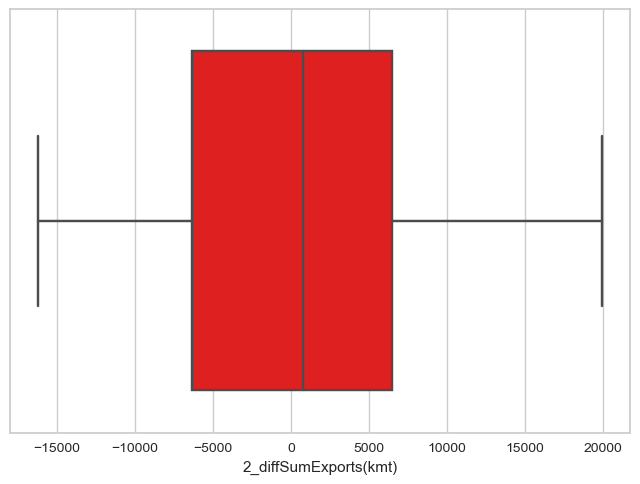

2_diffSumImports(kmt)


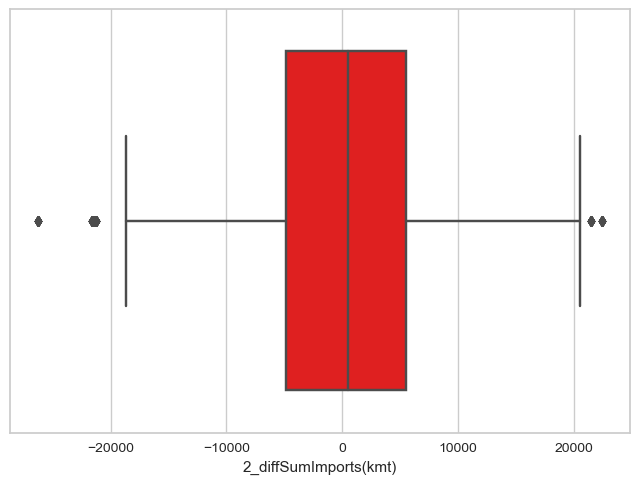

2_diffSumProduction(kmt)


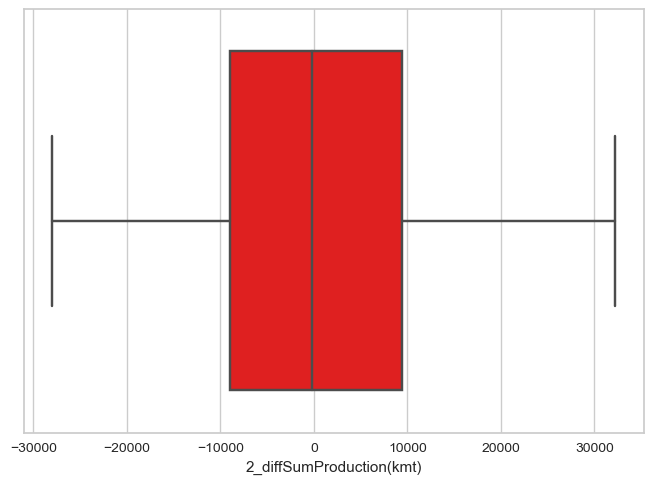

2_diffSumRefinery intake(kmt)


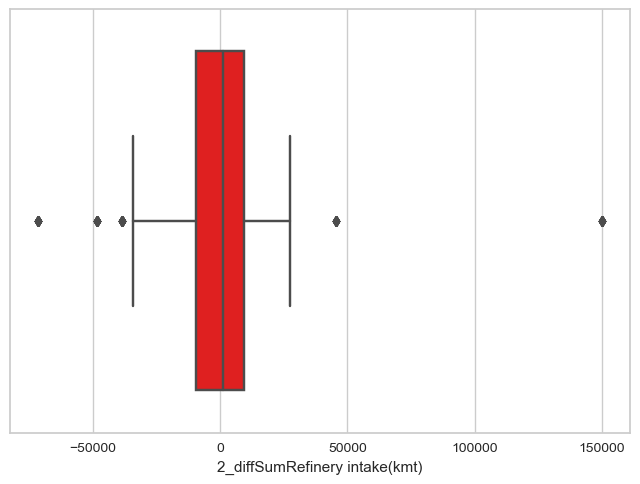

3_diffClosing stocks(kmt)


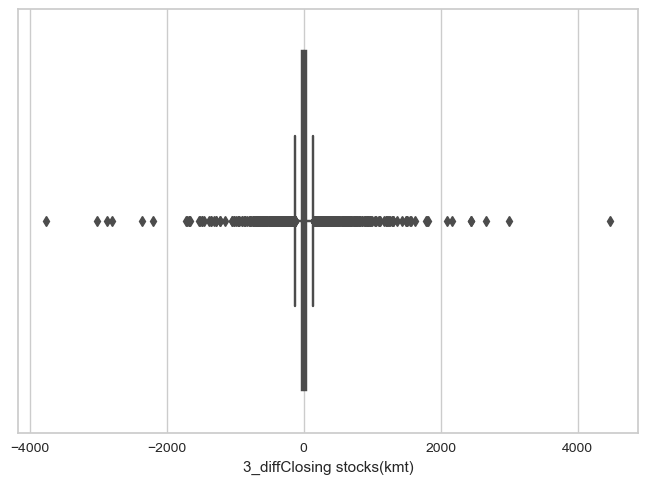

3_diffExports(kmt)


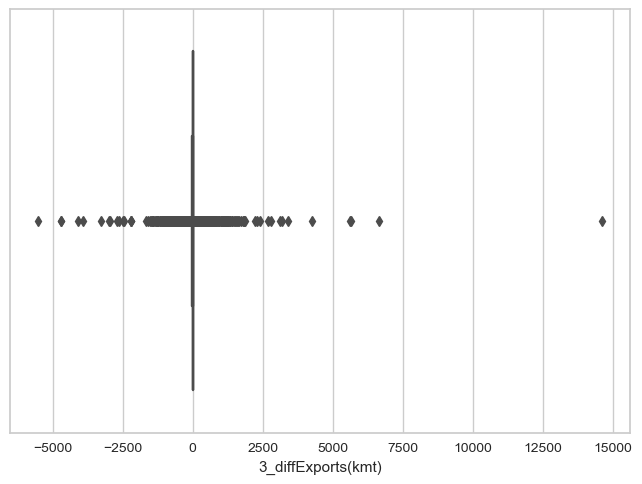

3_diffImports(kmt)


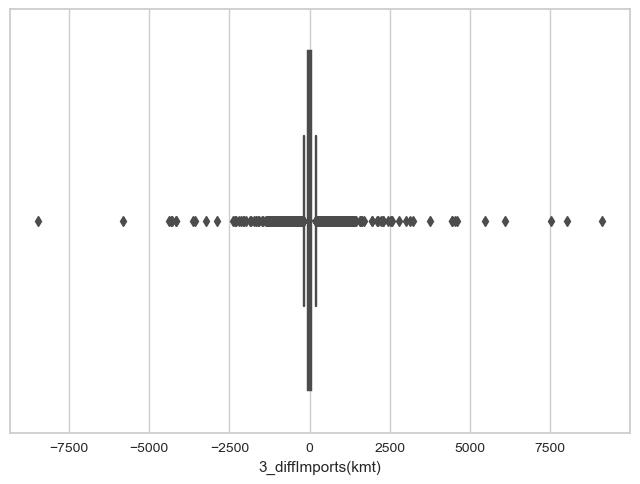

3_diffRefinery intake(kmt)


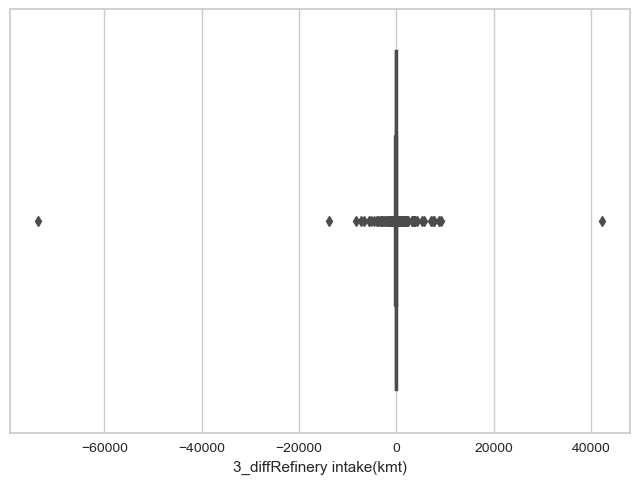

3_diffWTI


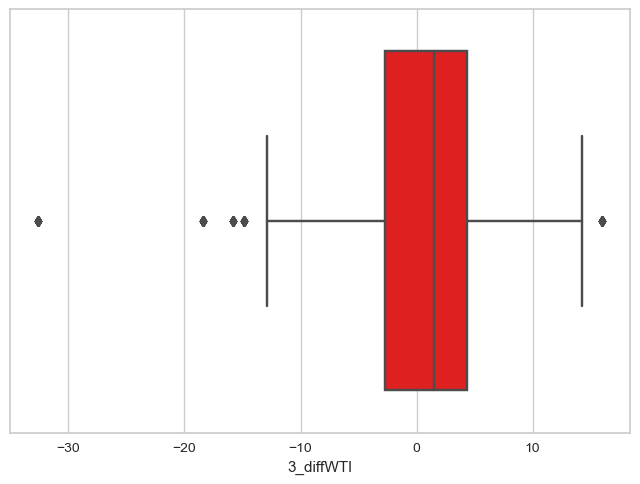

3_diffSumClosing stocks(kmt)


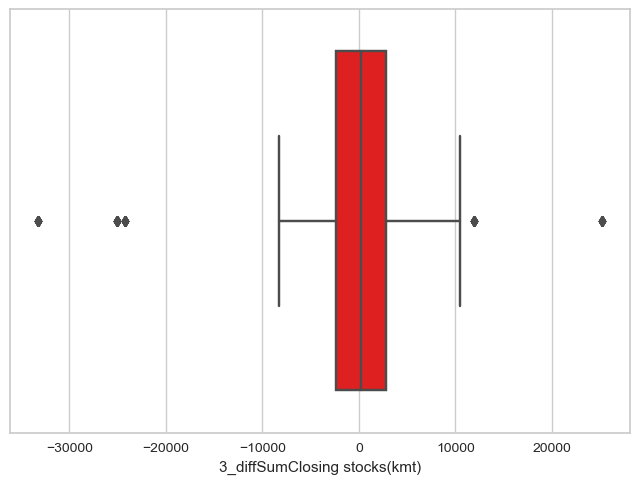

3_diffSumExports(kmt)


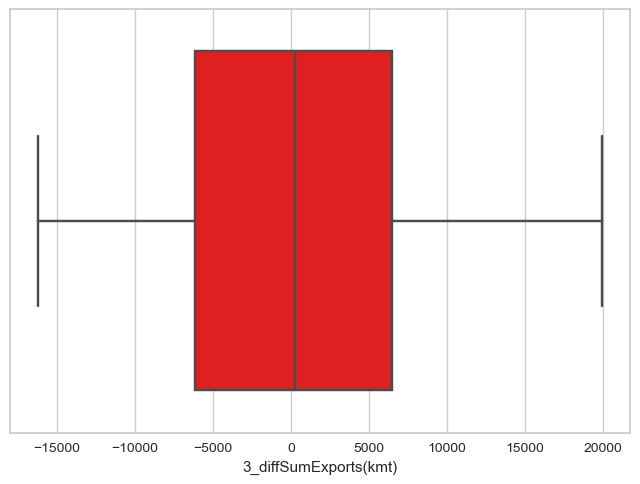

3_diffSumImports(kmt)


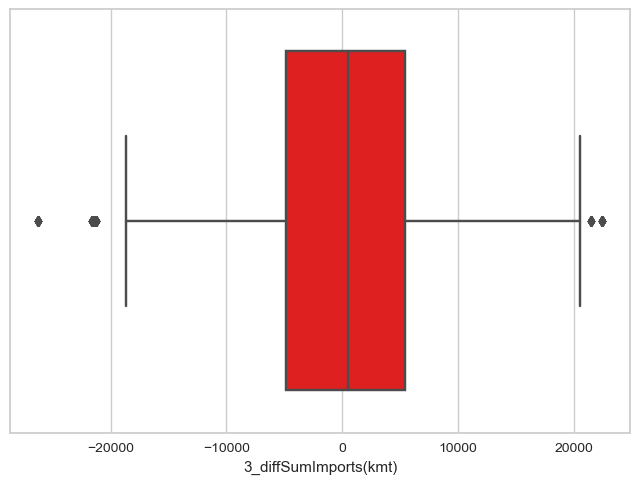

3_diffSumProduction(kmt)


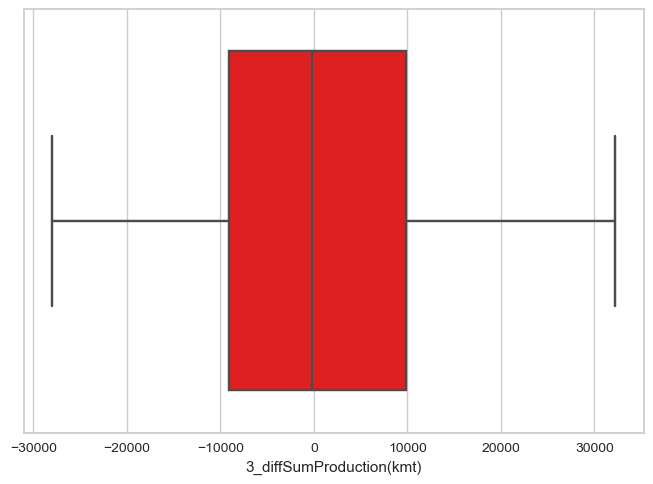

3_diffSumRefinery intake(kmt)


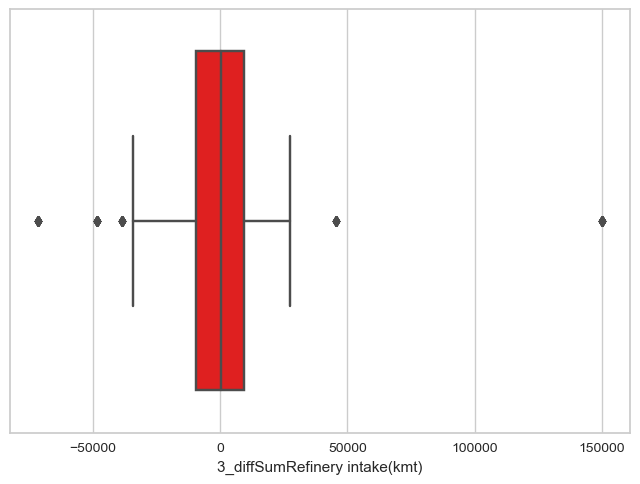

4_diffClosing stocks(kmt)


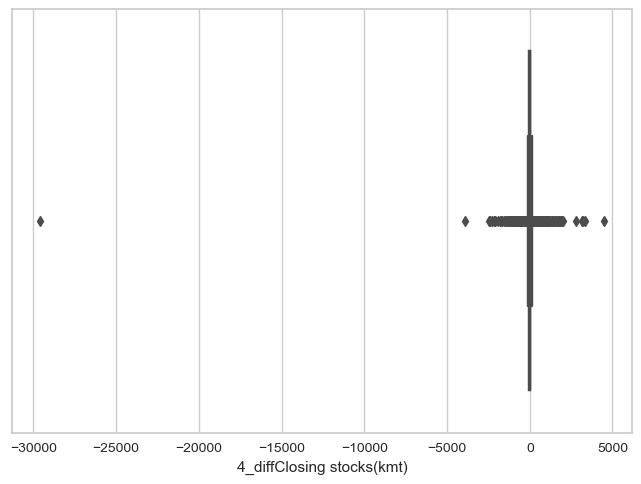

4_diffExports(kmt)


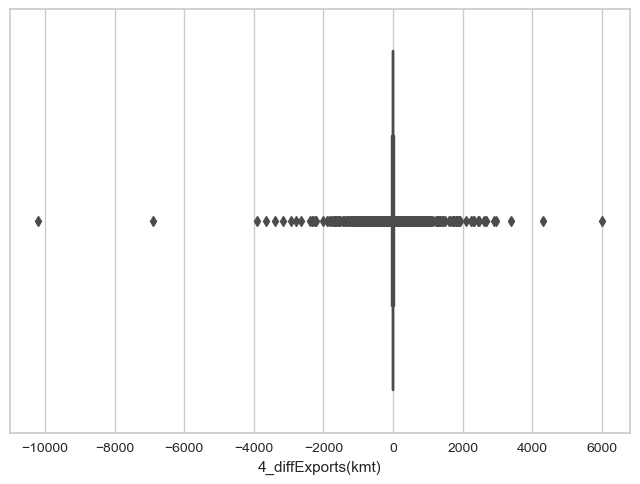

4_diffImports(kmt)


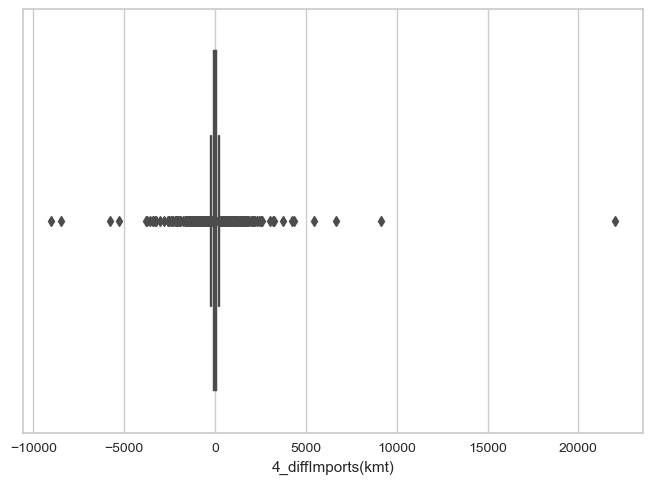

4_diffRefinery intake(kmt)


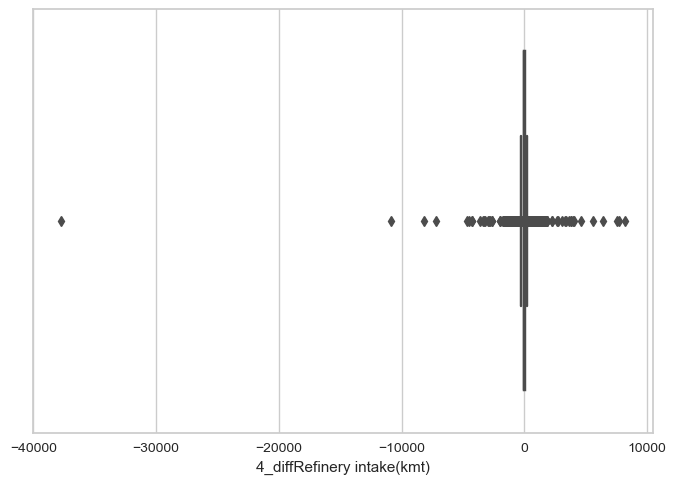

4_diffWTI


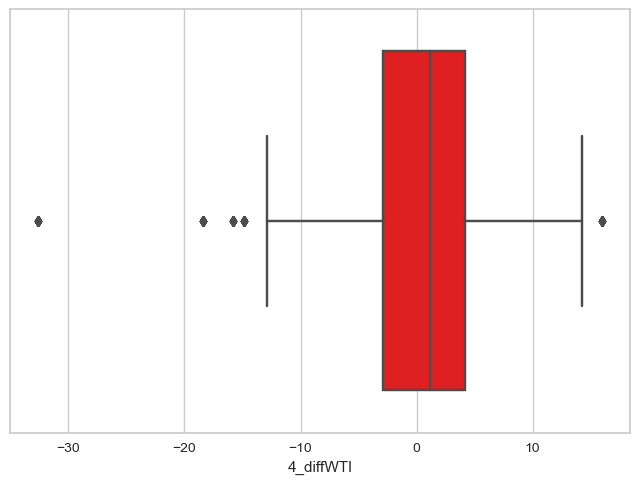

4_diffSumClosing stocks(kmt)


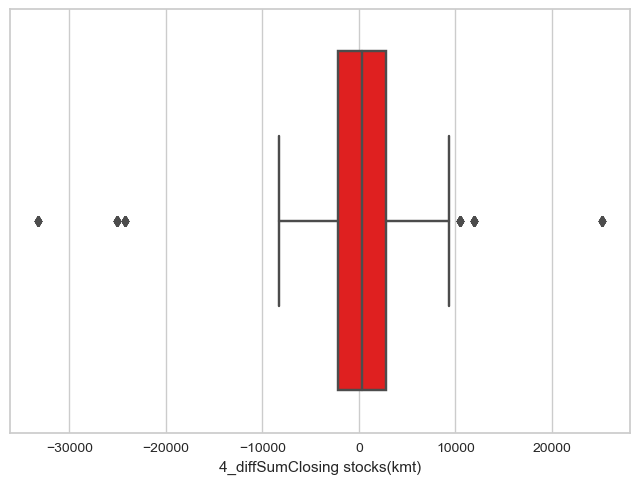

4_diffSumExports(kmt)


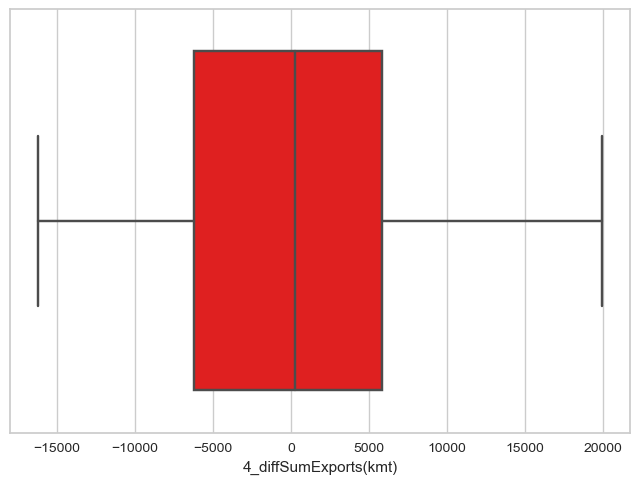

4_diffSumImports(kmt)


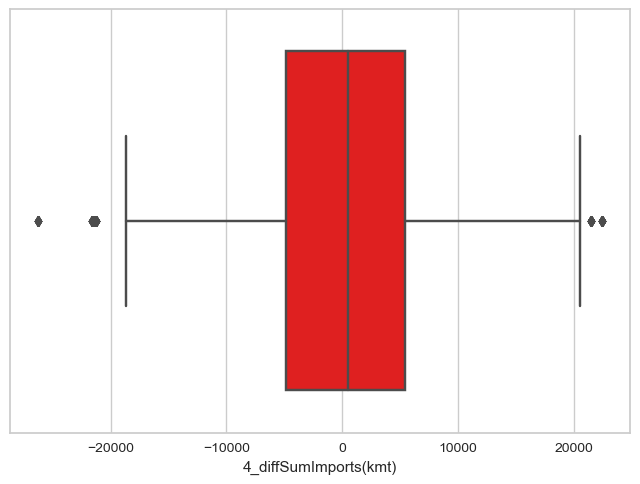

4_diffSumProduction(kmt)


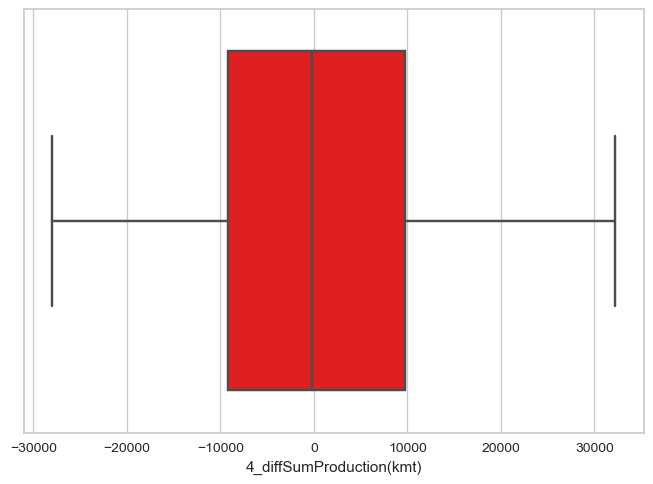

4_diffSumRefinery intake(kmt)


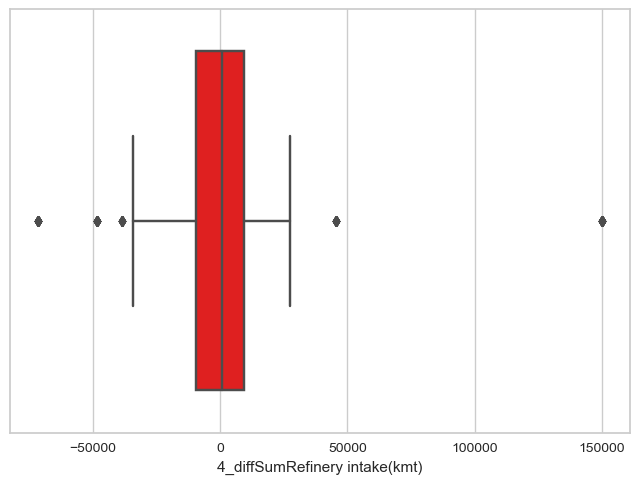

5_diffClosing stocks(kmt)


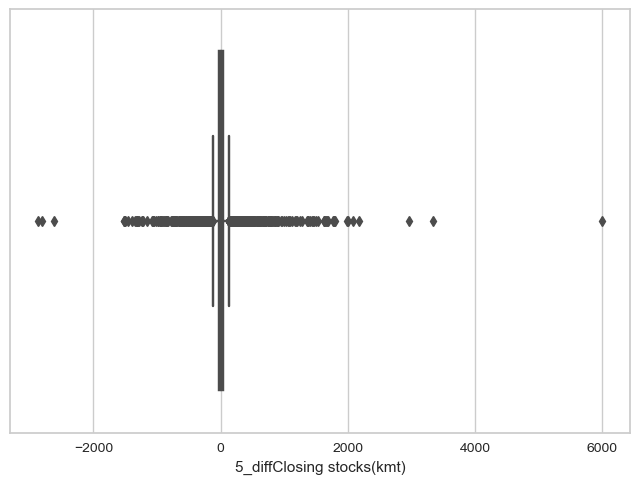

5_diffExports(kmt)


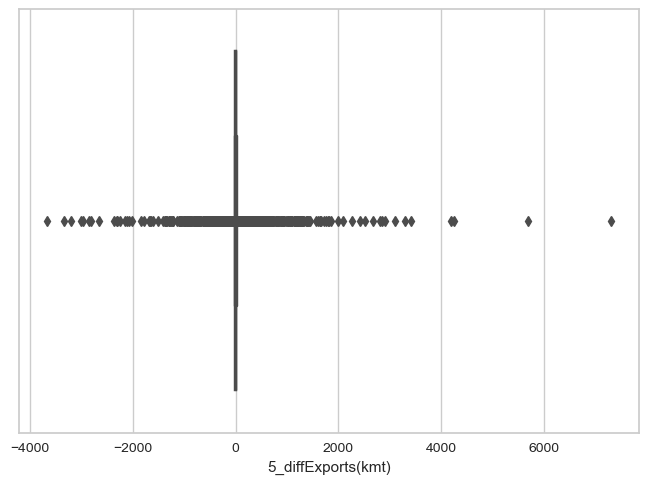

5_diffImports(kmt)


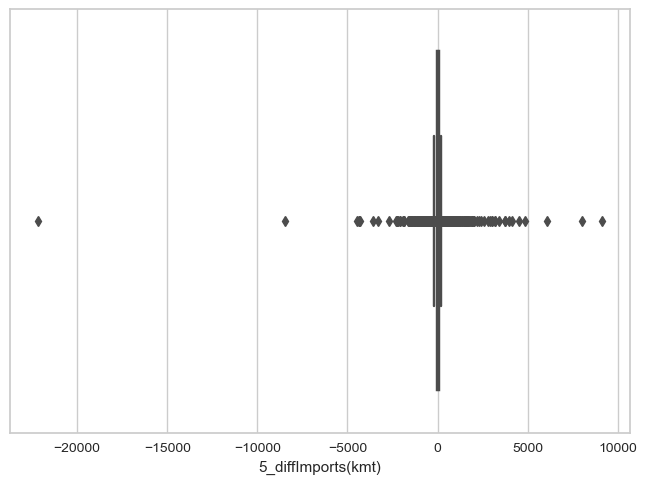

5_diffRefinery intake(kmt)


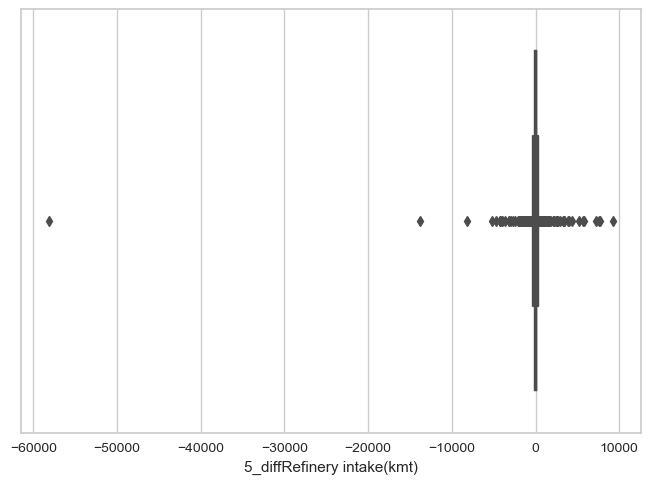

5_diffWTI


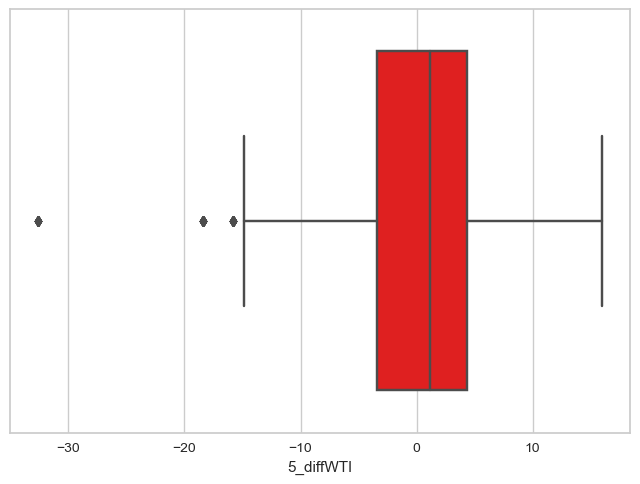

5_diffSumClosing stocks(kmt)


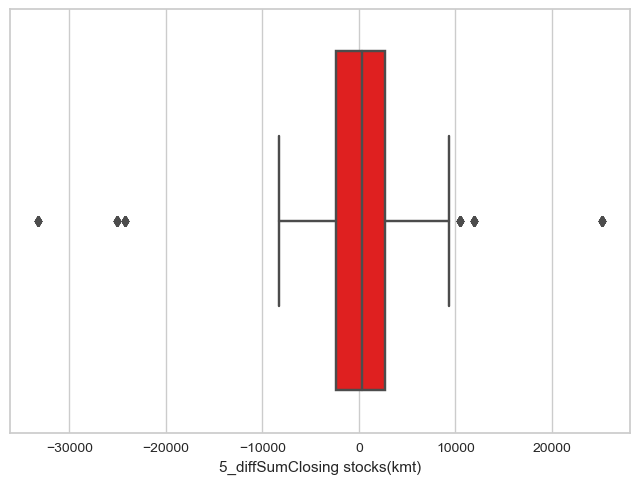

5_diffSumExports(kmt)


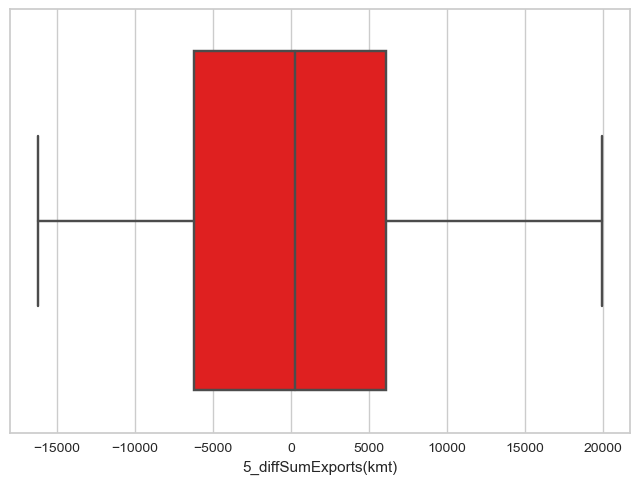

5_diffSumImports(kmt)


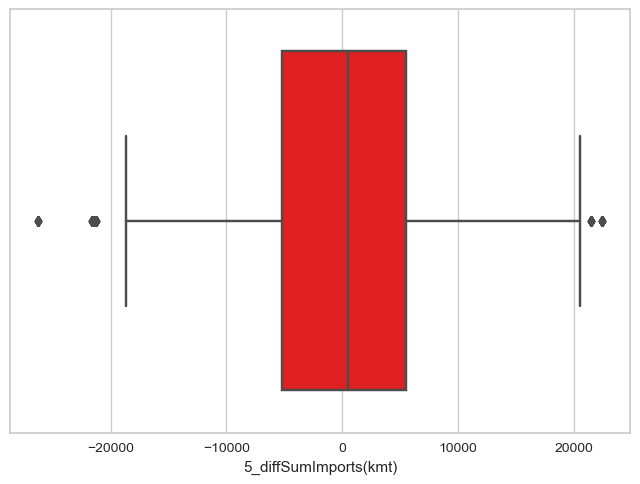

5_diffSumProduction(kmt)


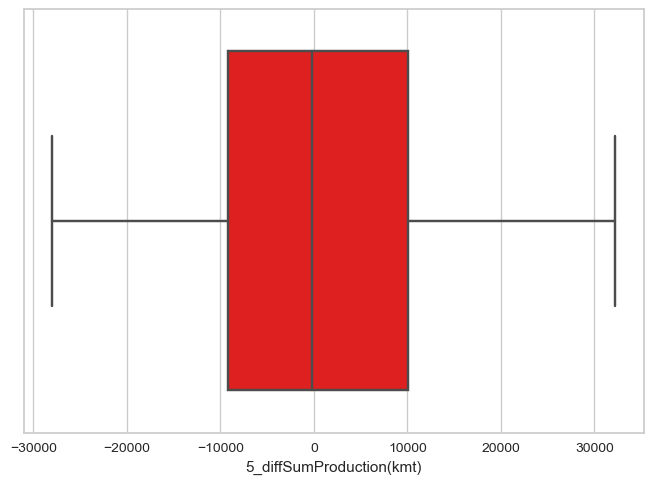

5_diffSumRefinery intake(kmt)


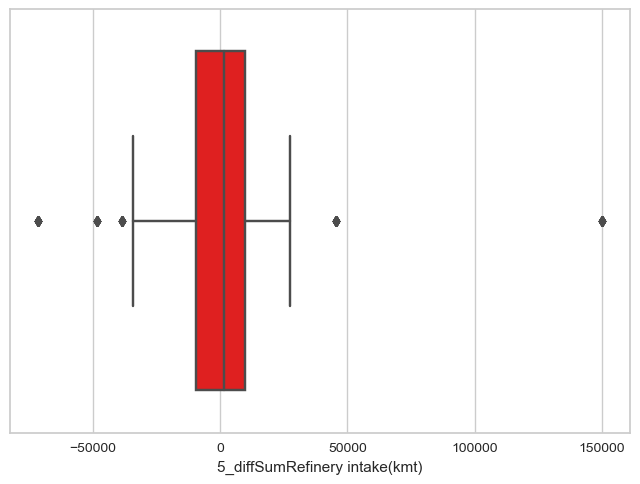

6_diffClosing stocks(kmt)


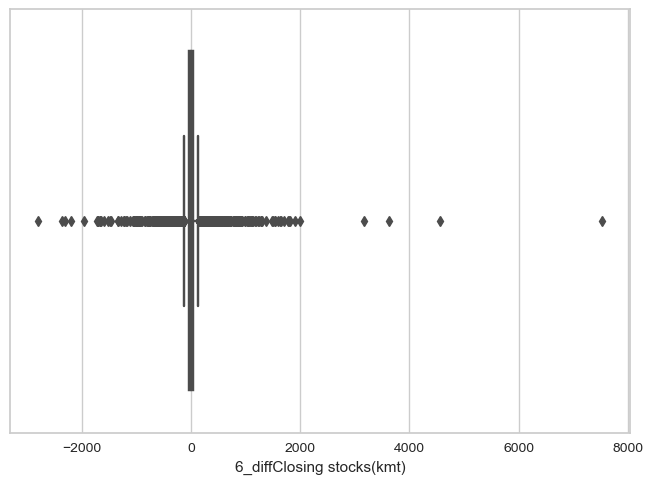

6_diffExports(kmt)


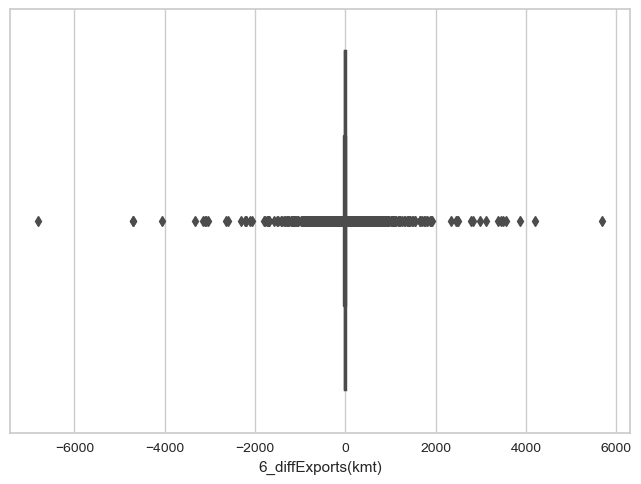

6_diffImports(kmt)


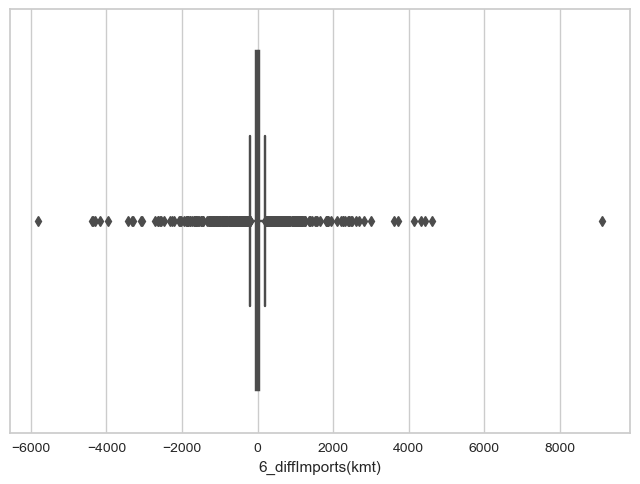

6_diffRefinery intake(kmt)


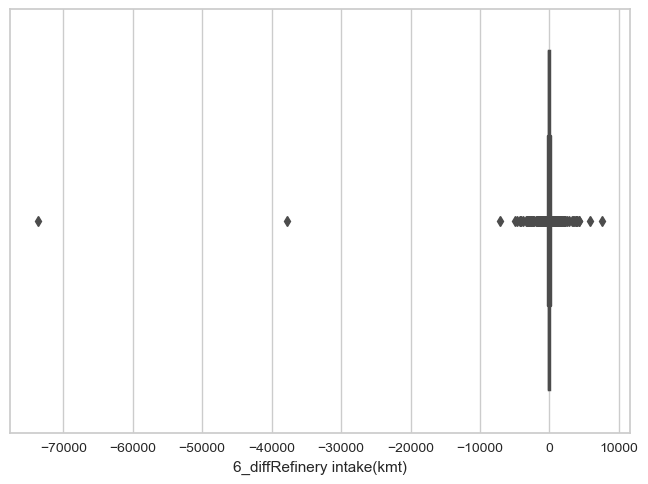

6_diffWTI


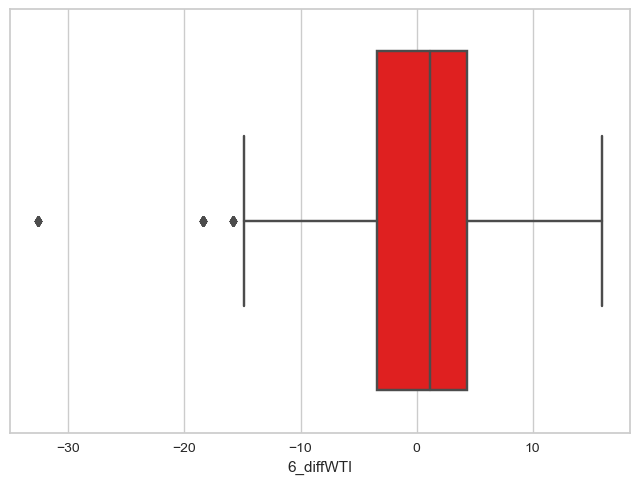

6_diffSumClosing stocks(kmt)


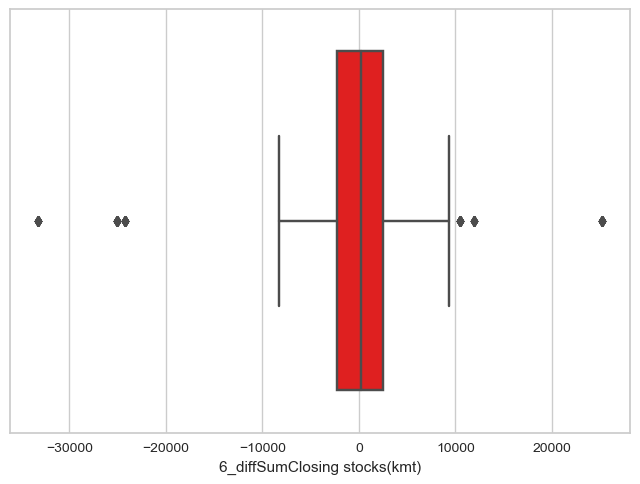

6_diffSumExports(kmt)


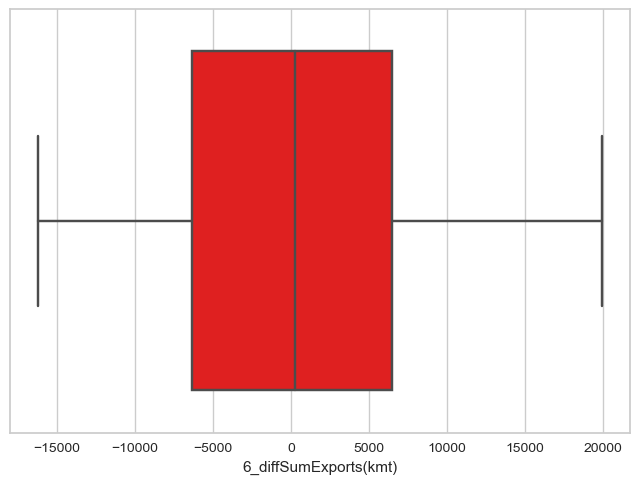

6_diffSumImports(kmt)


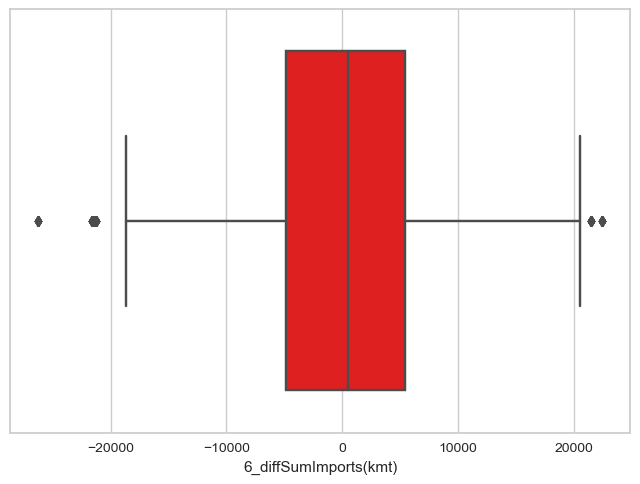

6_diffSumProduction(kmt)


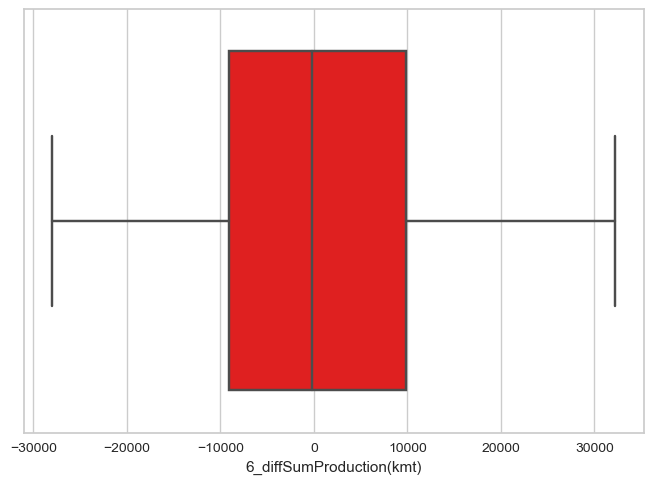

6_diffSumRefinery intake(kmt)


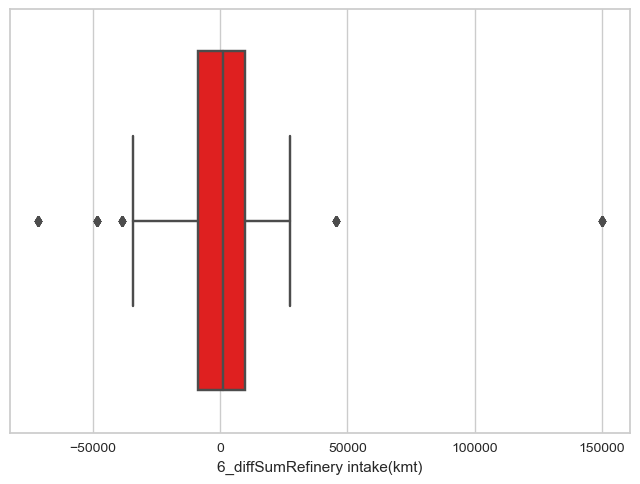

7_diffClosing stocks(kmt)


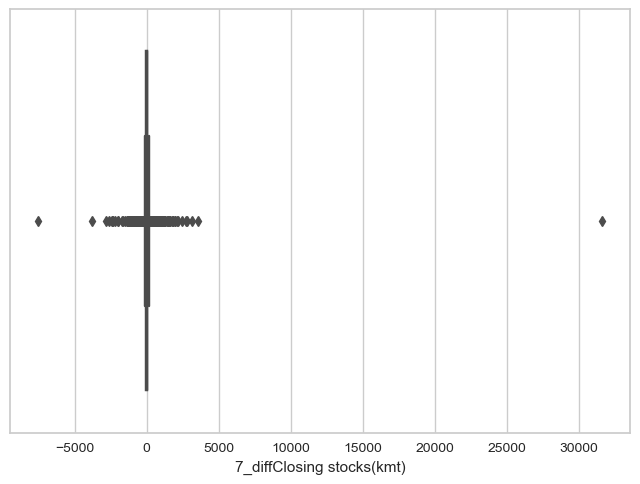

7_diffExports(kmt)


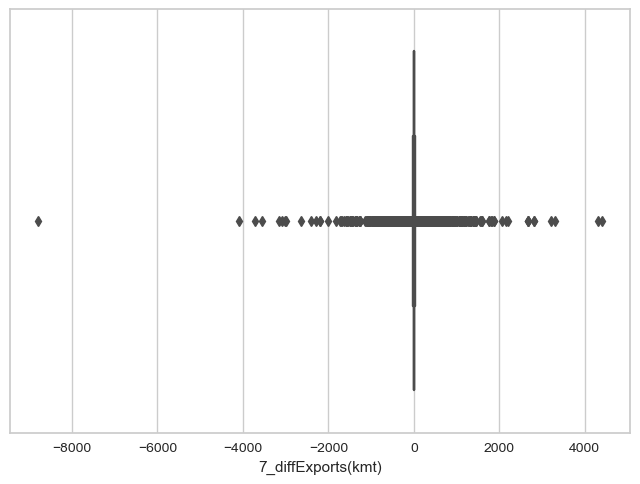

7_diffImports(kmt)


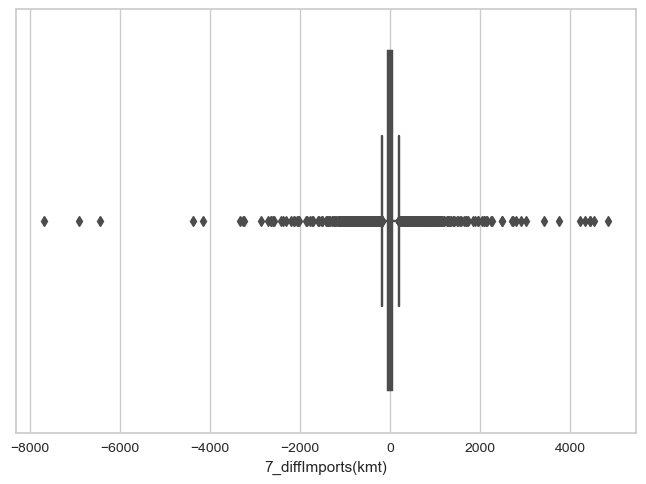

7_diffRefinery intake(kmt)


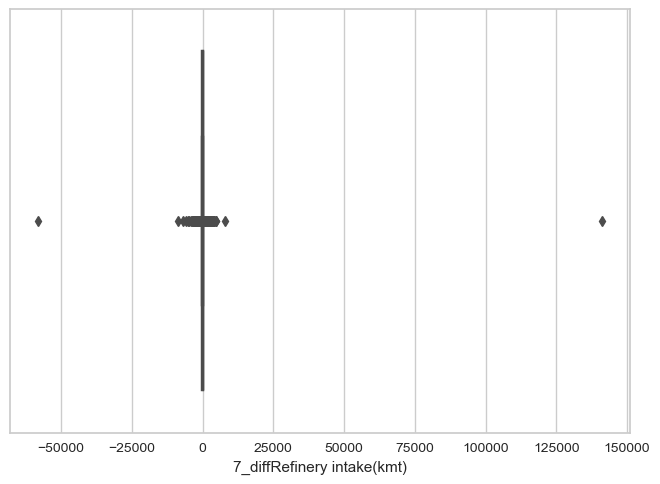

7_diffWTI


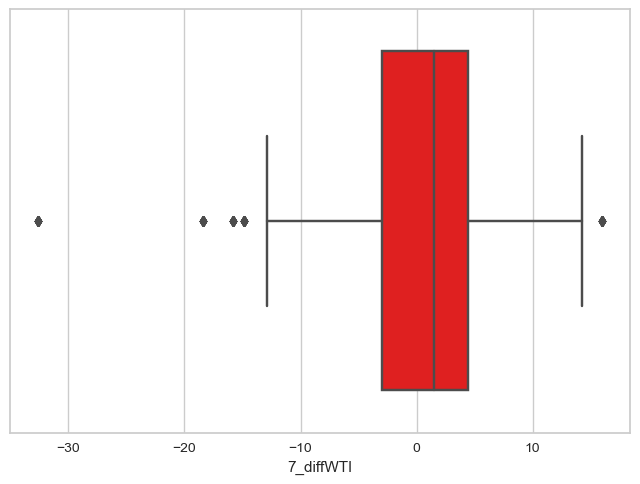

7_diffSumClosing stocks(kmt)


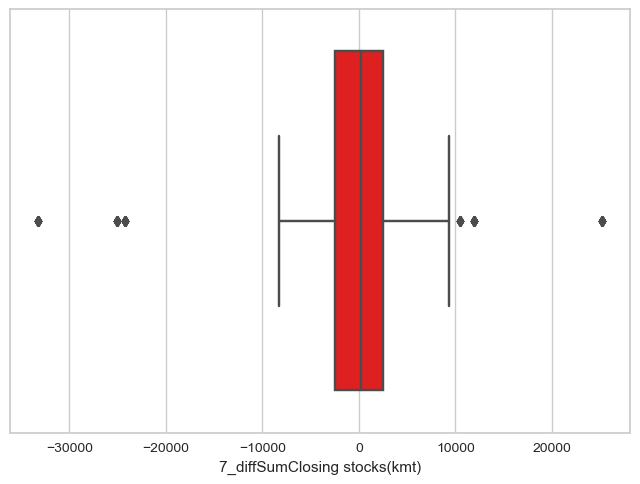

7_diffSumExports(kmt)


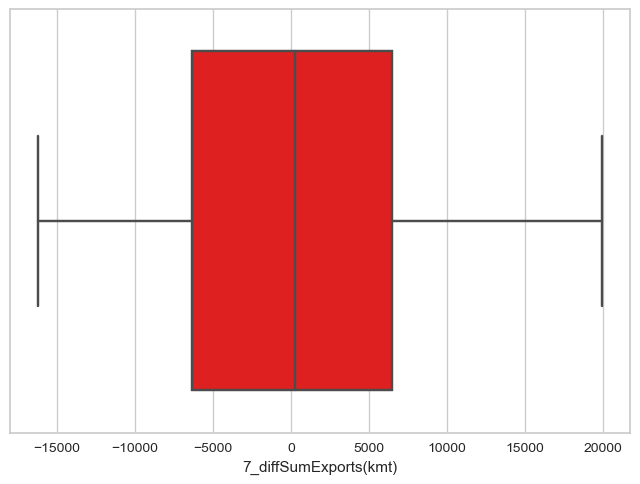

7_diffSumImports(kmt)


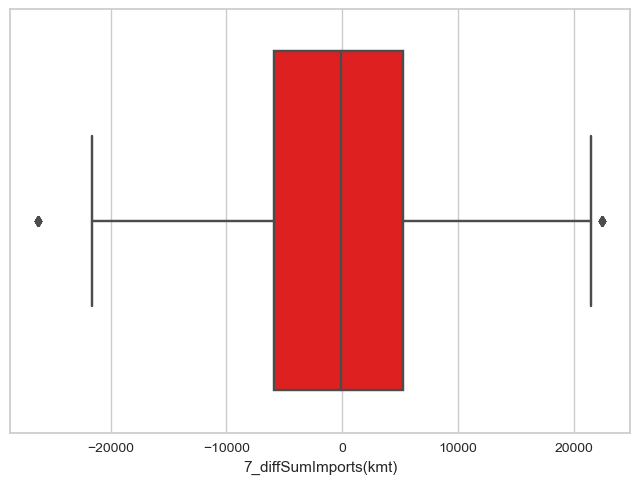

7_diffSumProduction(kmt)


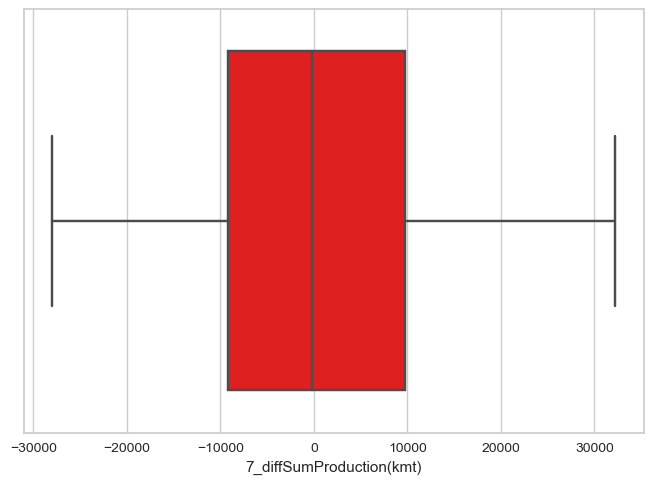

7_diffSumRefinery intake(kmt)


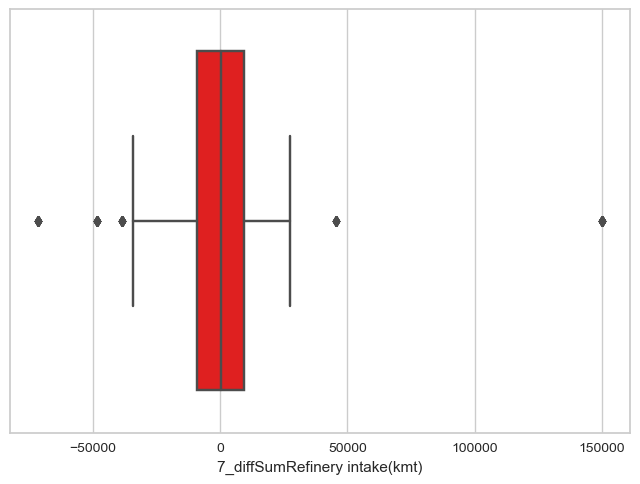

8_diffClosing stocks(kmt)


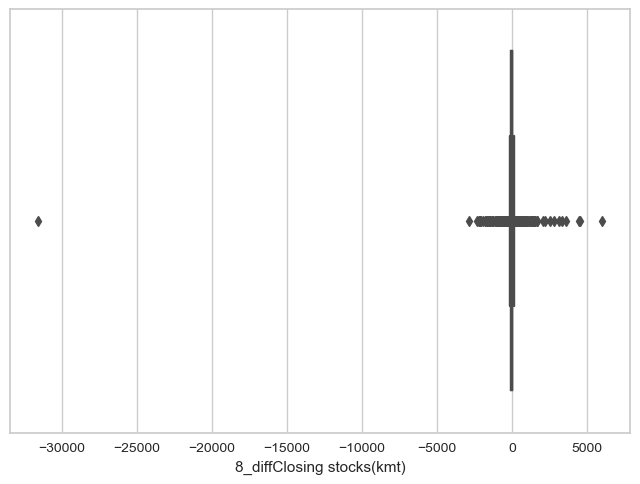

8_diffExports(kmt)


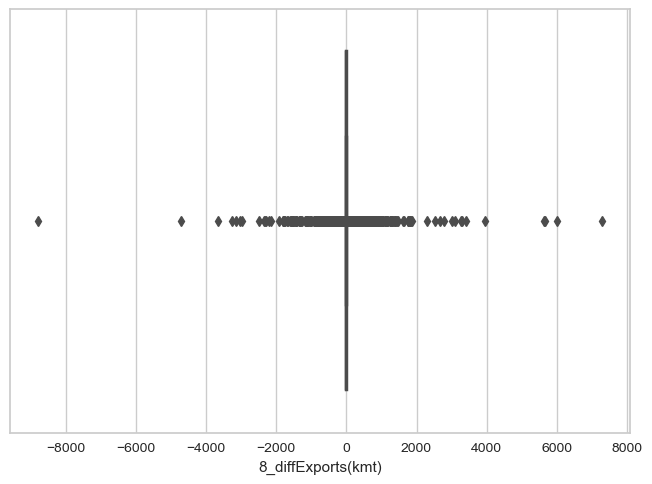

8_diffImports(kmt)


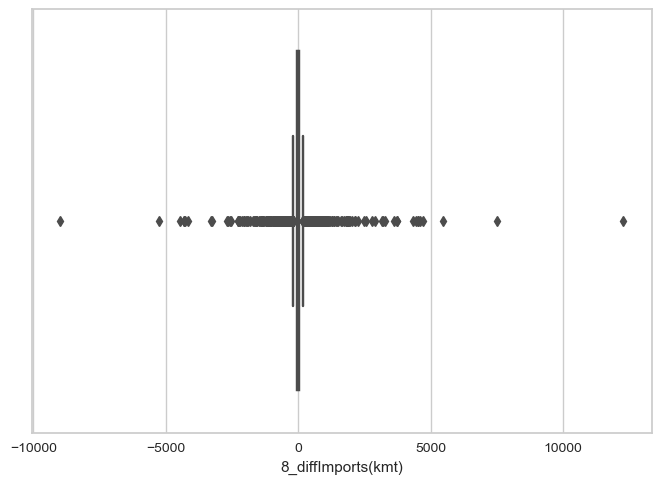

8_diffRefinery intake(kmt)


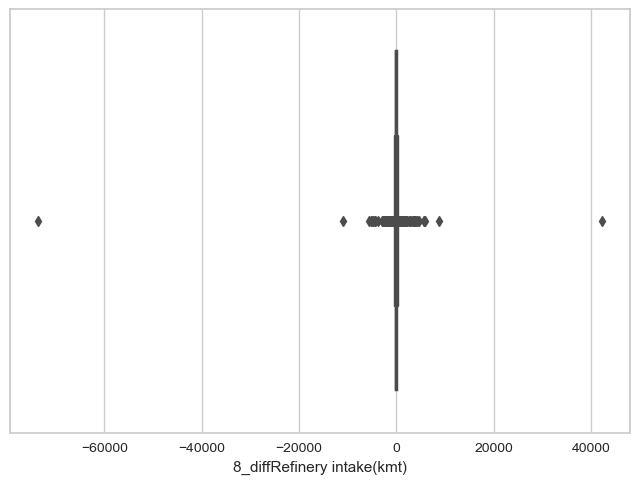

8_diffWTI


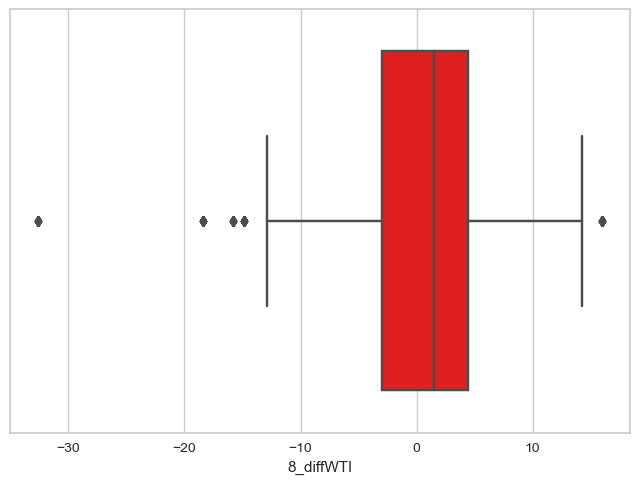

8_diffSumClosing stocks(kmt)


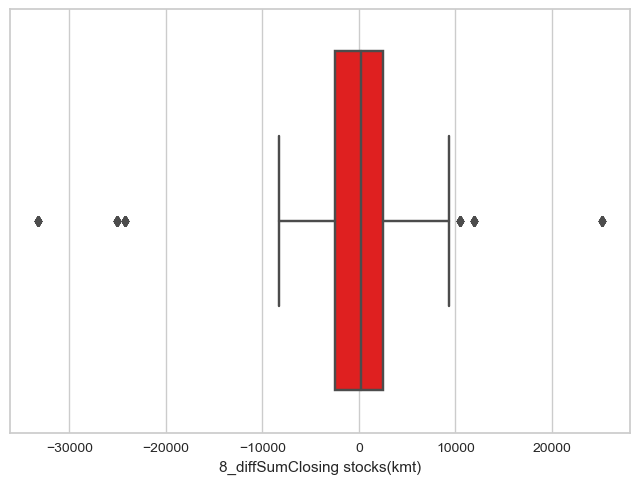

8_diffSumExports(kmt)


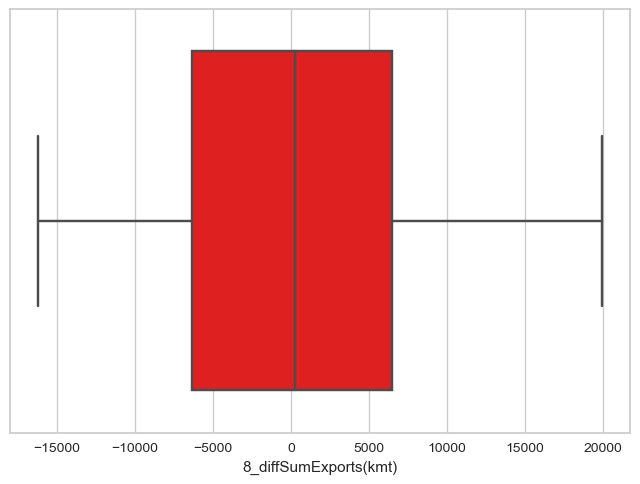

8_diffSumImports(kmt)


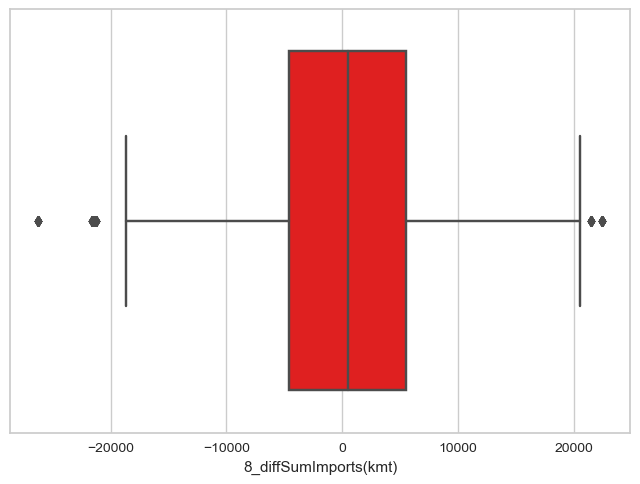

8_diffSumProduction(kmt)


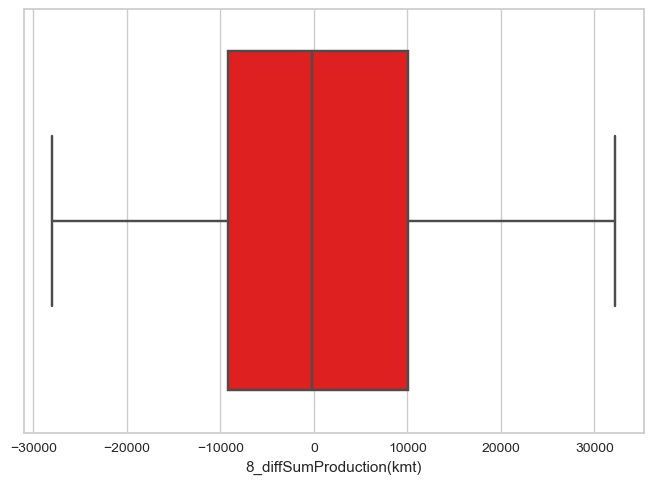

8_diffSumRefinery intake(kmt)


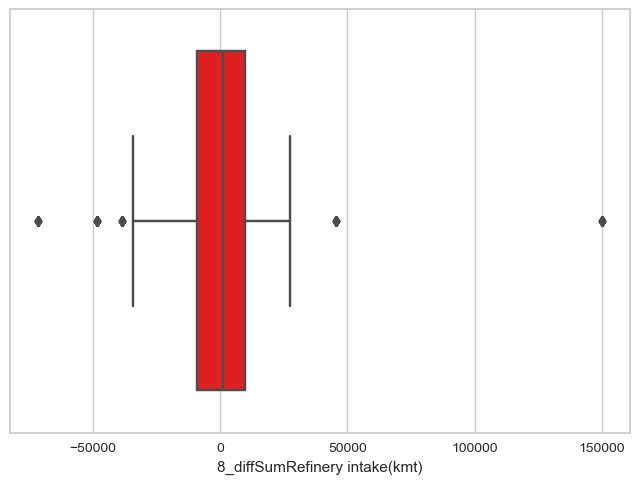

9_diffClosing stocks(kmt)


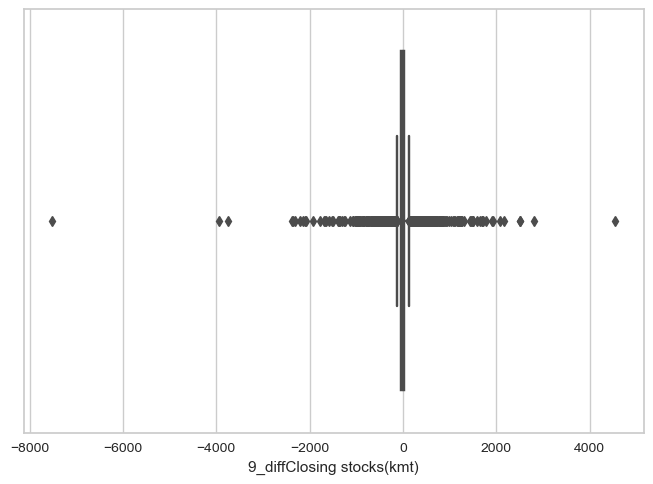

9_diffExports(kmt)


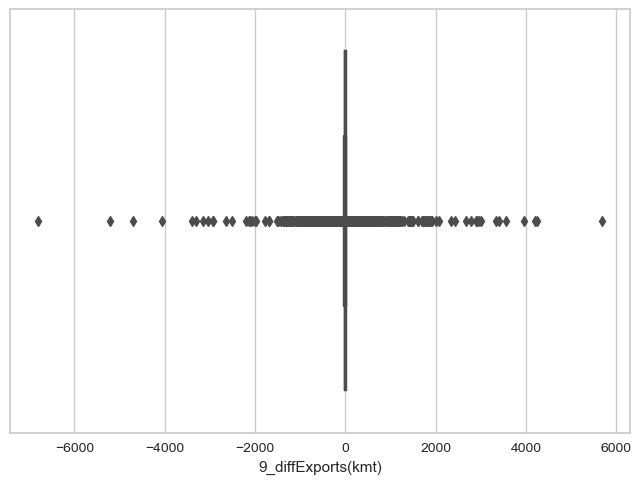

9_diffImports(kmt)


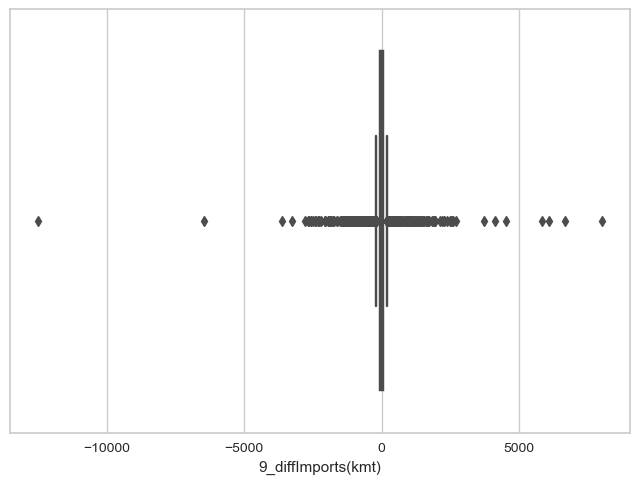

9_diffRefinery intake(kmt)


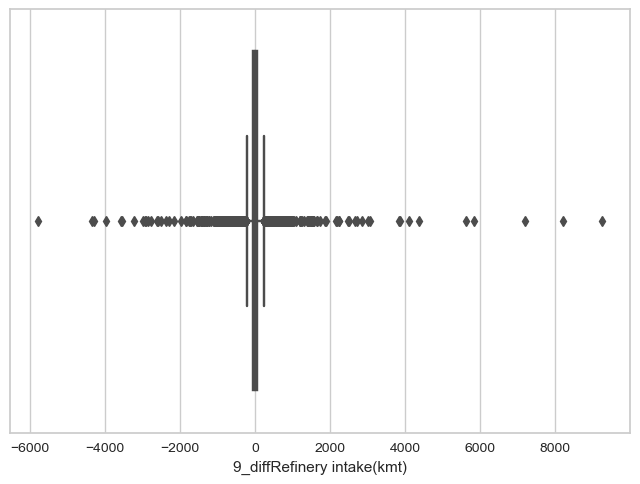

9_diffWTI


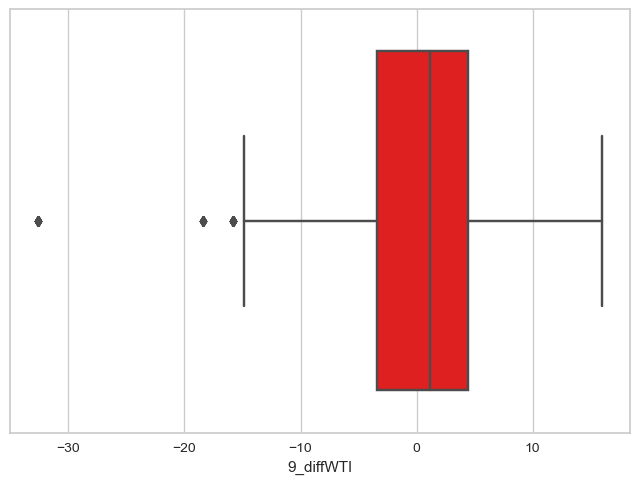

9_diffSumClosing stocks(kmt)


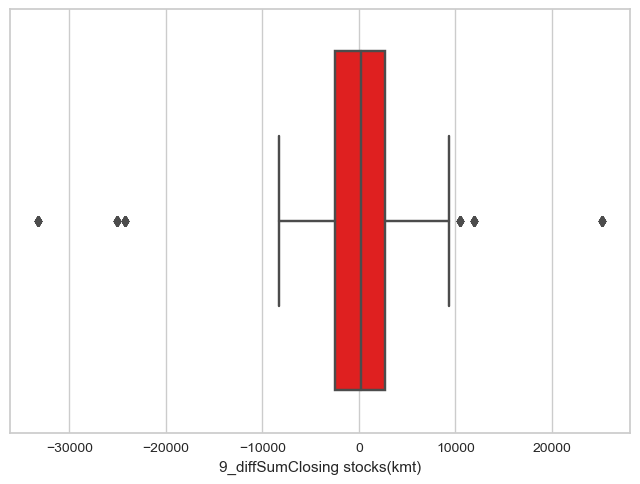

9_diffSumExports(kmt)


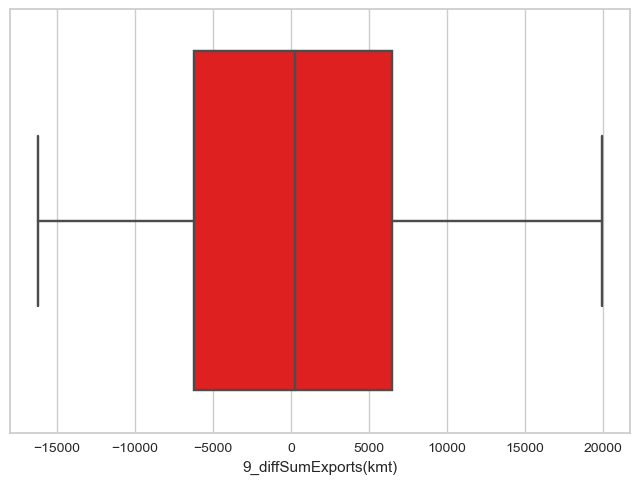

9_diffSumImports(kmt)


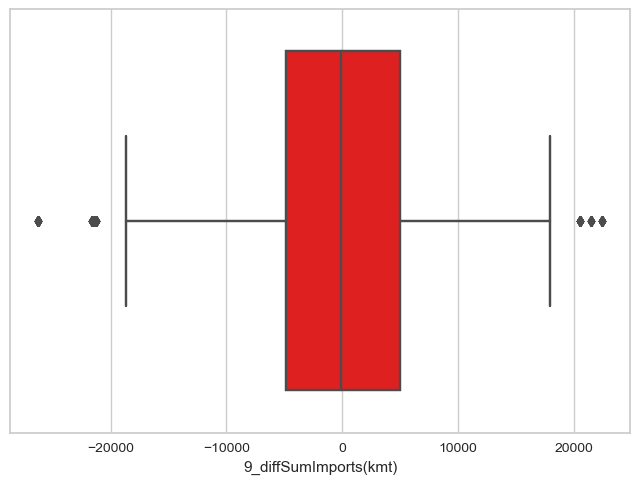

9_diffSumProduction(kmt)


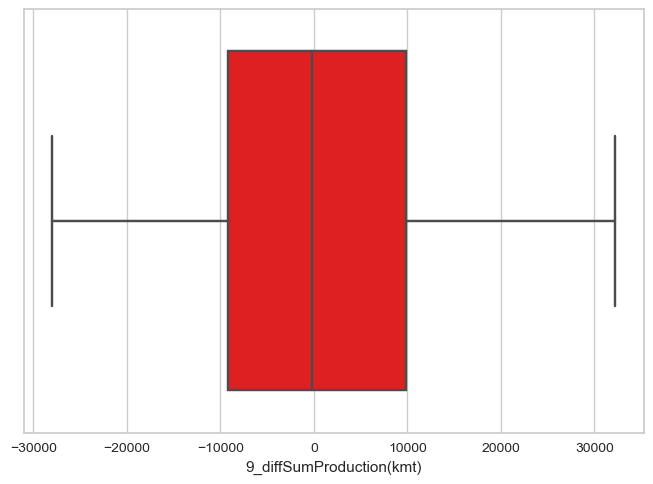

9_diffSumRefinery intake(kmt)


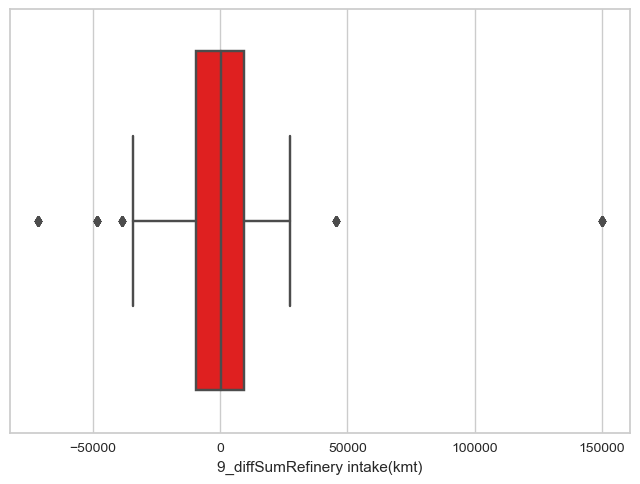

10_diffClosing stocks(kmt)


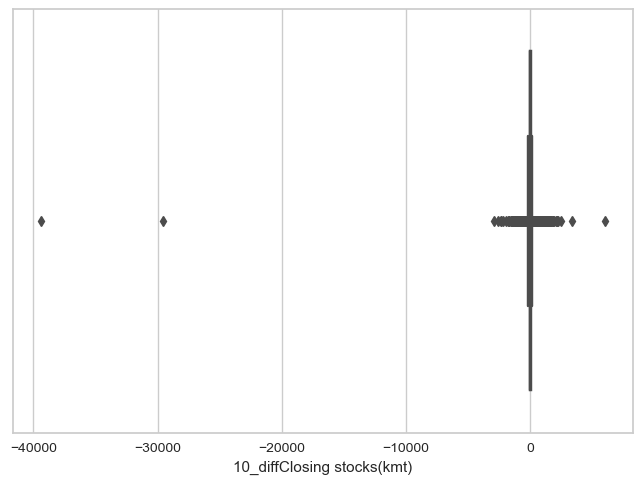

10_diffExports(kmt)


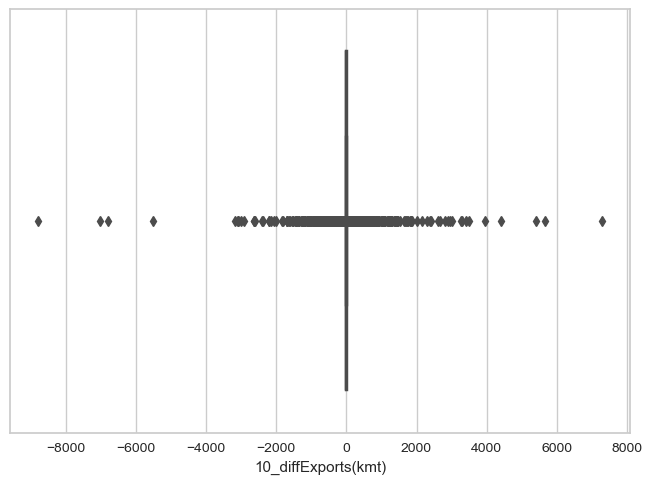

10_diffImports(kmt)


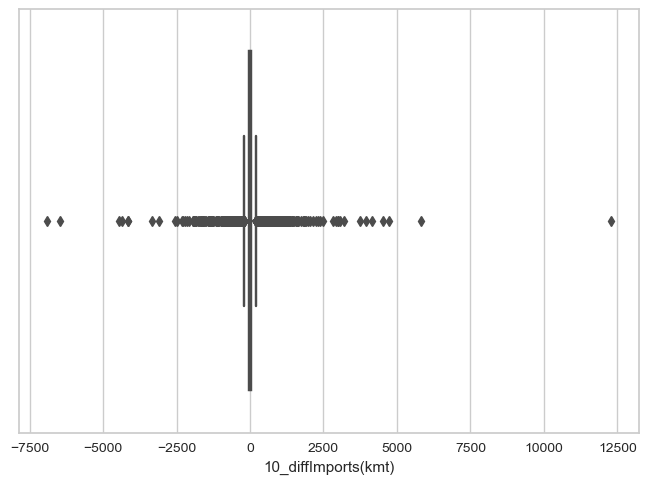

10_diffRefinery intake(kmt)


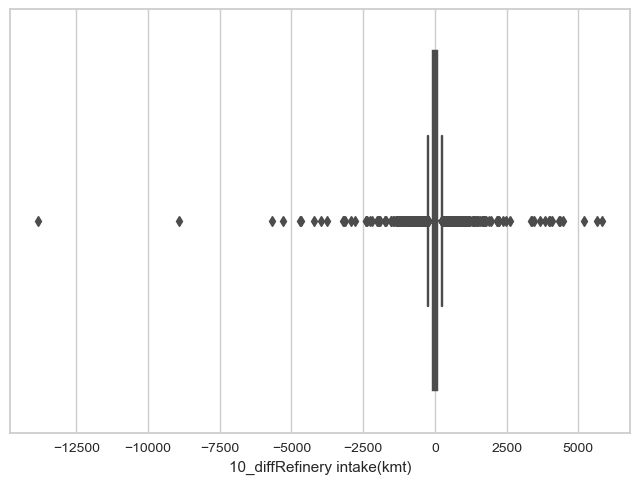

10_diffWTI


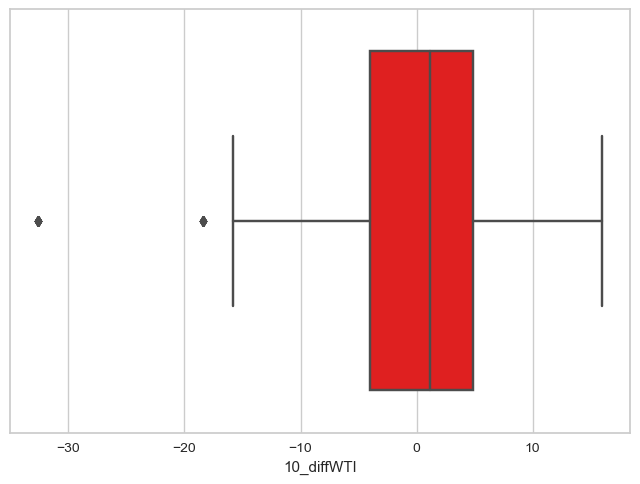

10_diffSumClosing stocks(kmt)


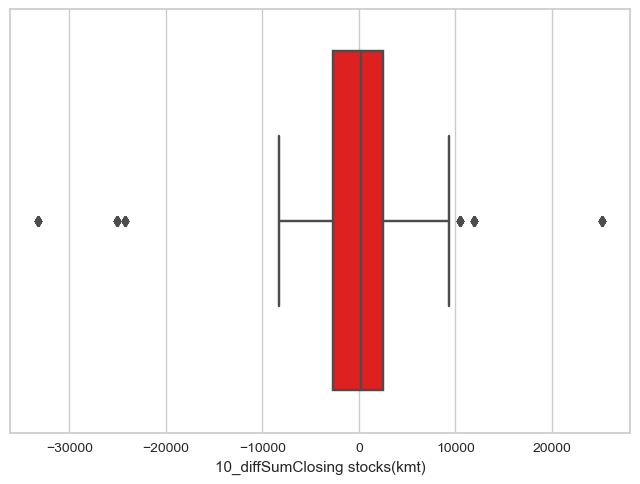

10_diffSumExports(kmt)


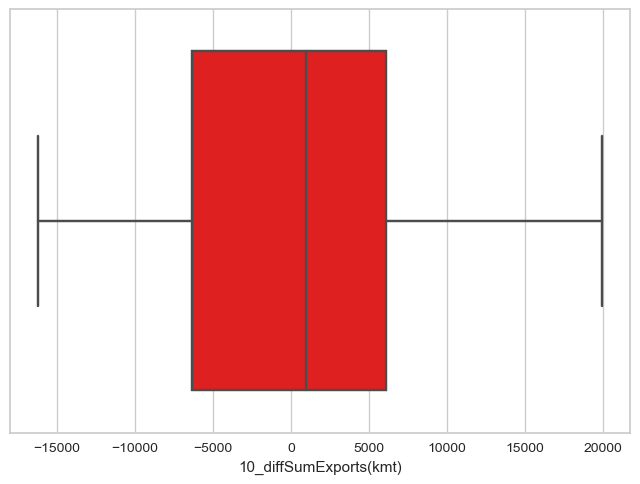

10_diffSumImports(kmt)


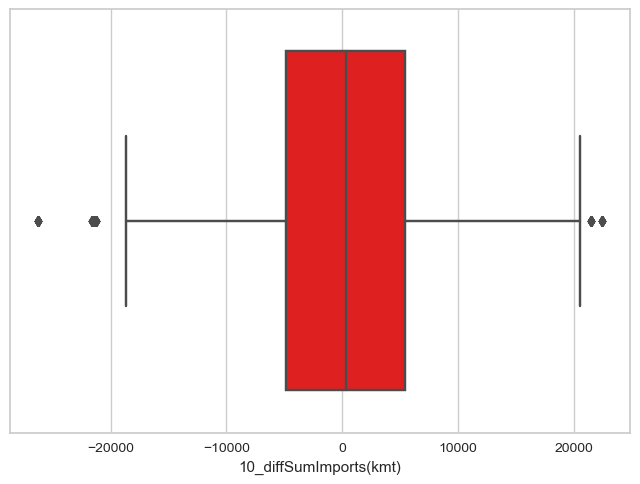

10_diffSumProduction(kmt)


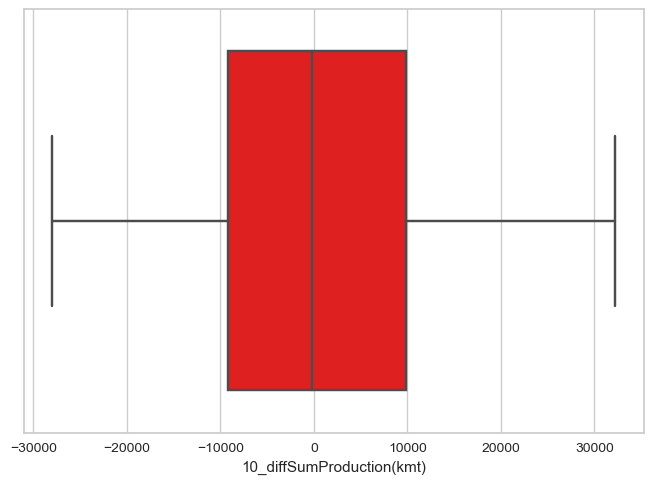

10_diffSumRefinery intake(kmt)


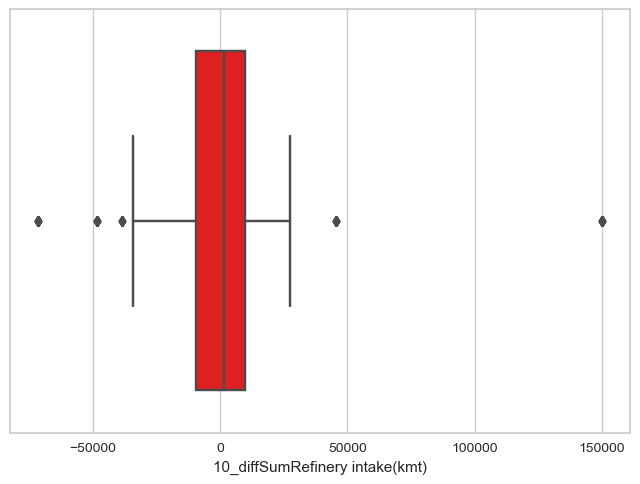

11_diffClosing stocks(kmt)


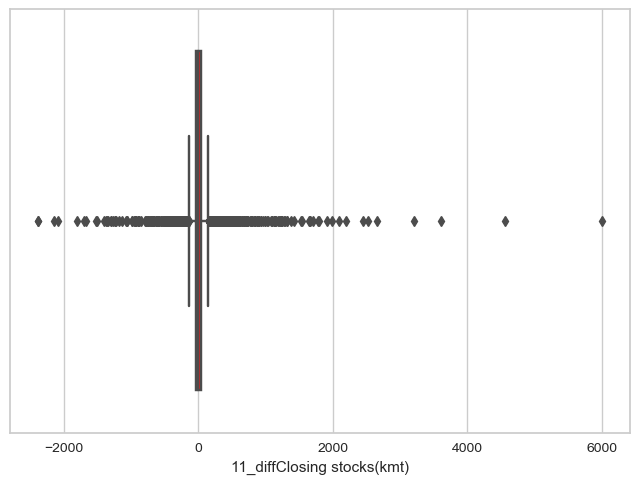

11_diffExports(kmt)


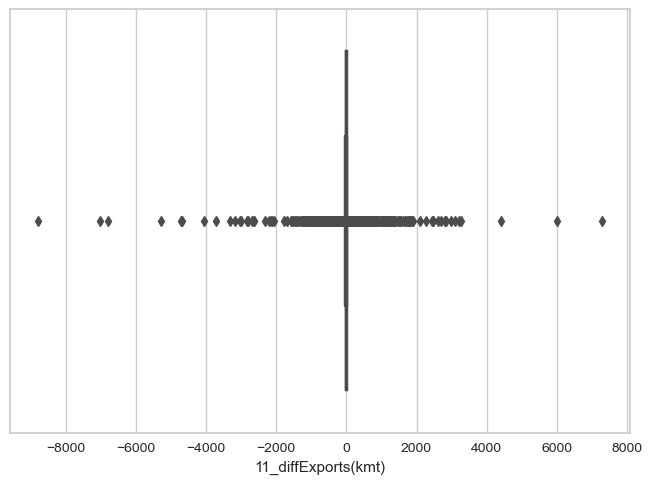

11_diffImports(kmt)


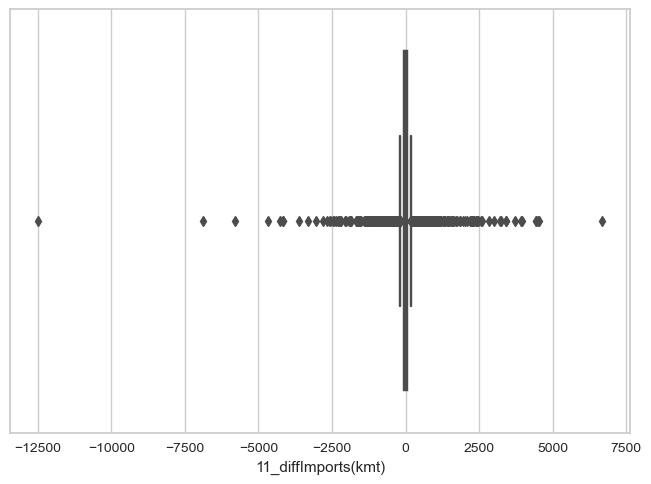

11_diffRefinery intake(kmt)


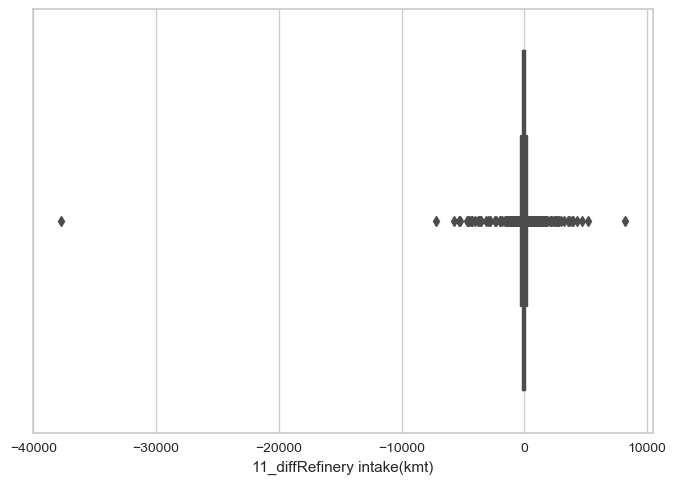

11_diffWTI


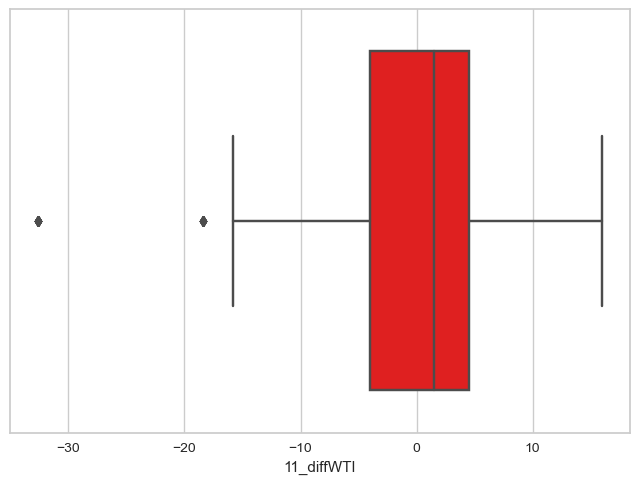

11_diffSumClosing stocks(kmt)


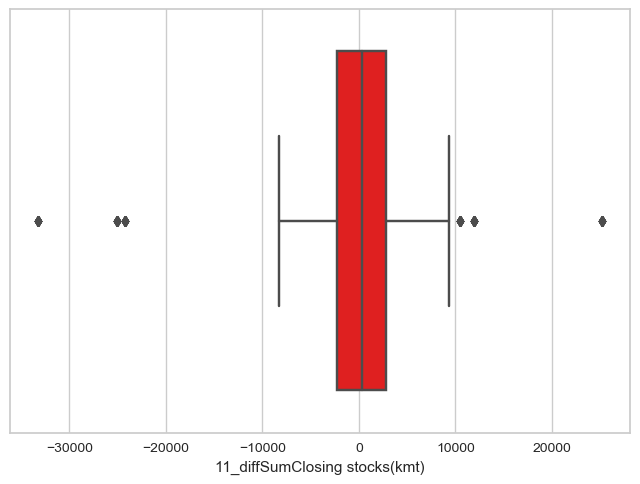

11_diffSumExports(kmt)


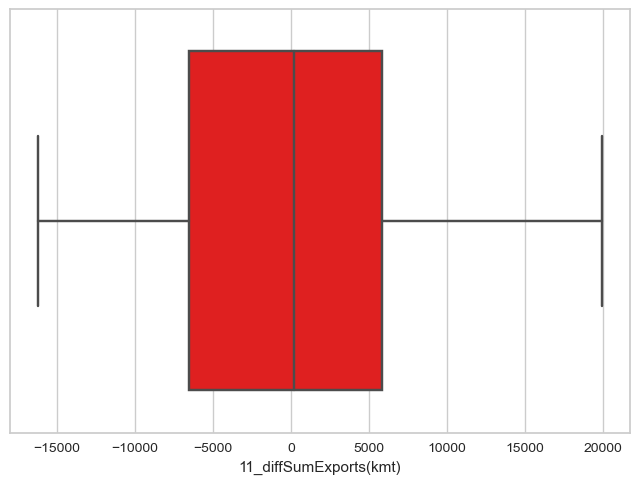

11_diffSumImports(kmt)


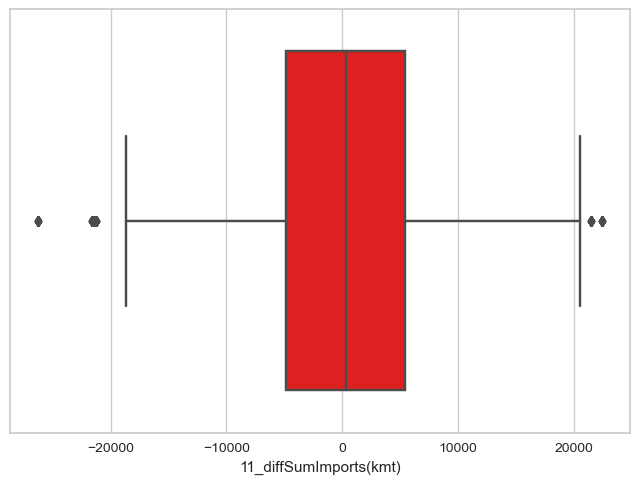

11_diffSumProduction(kmt)


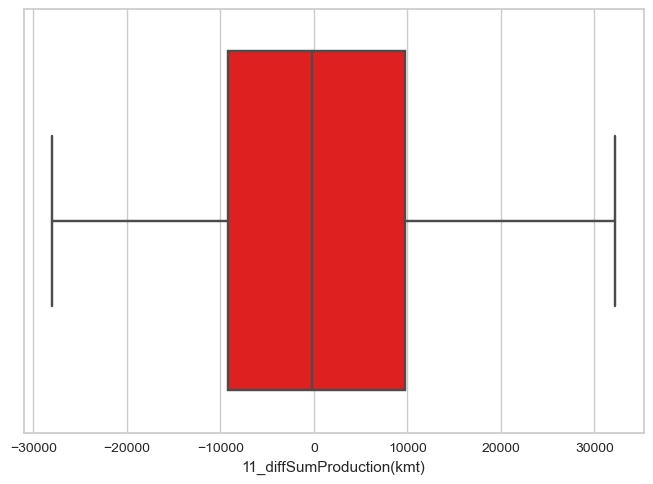

11_diffSumRefinery intake(kmt)


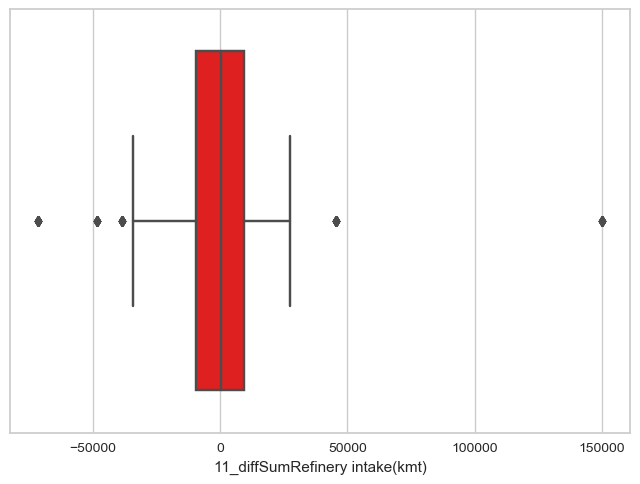

12_diffClosing stocks(kmt)


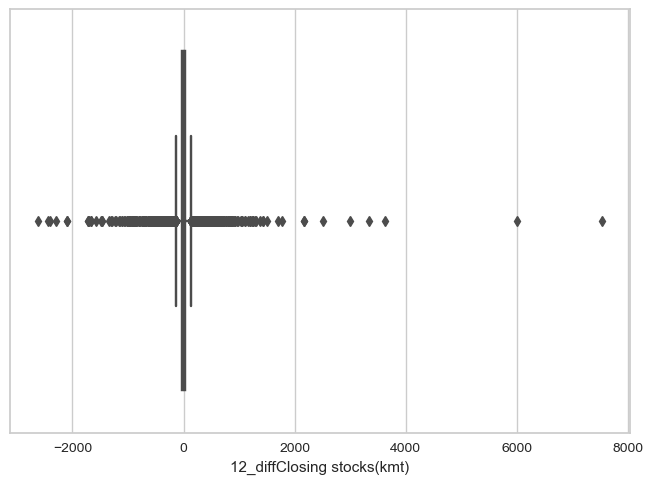

12_diffExports(kmt)


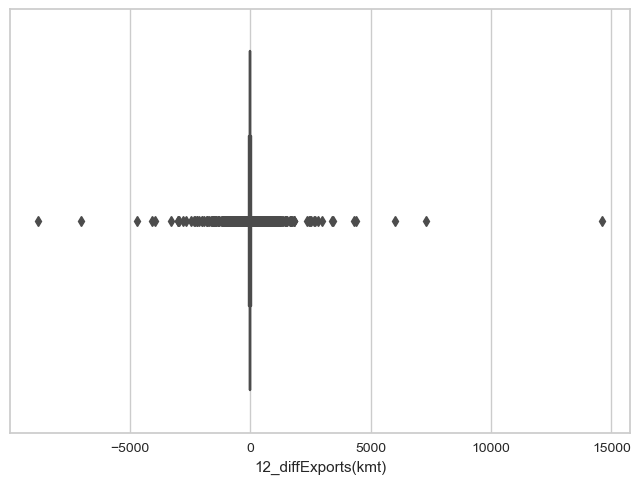

12_diffImports(kmt)


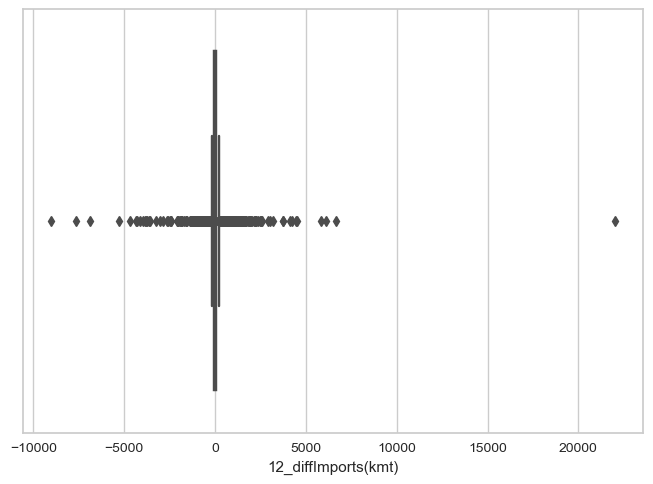

12_diffRefinery intake(kmt)


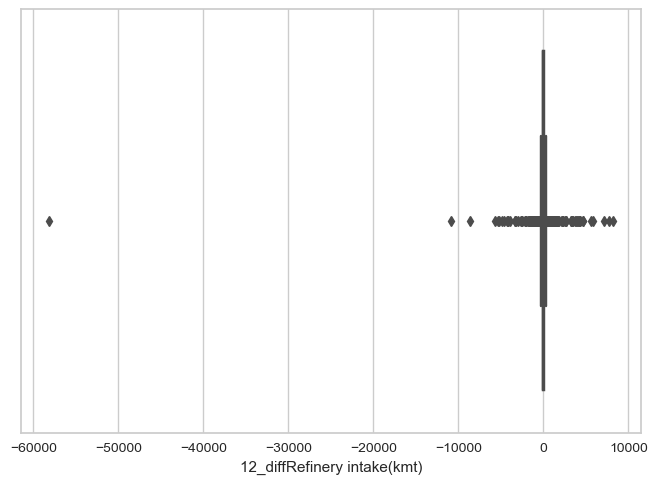

12_diffWTI


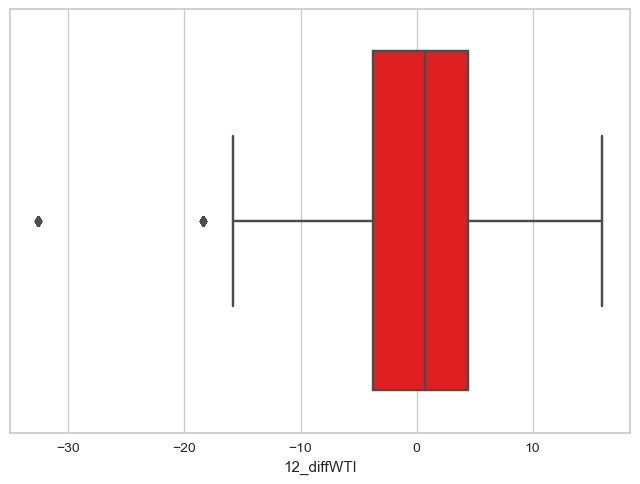

12_diffSumClosing stocks(kmt)


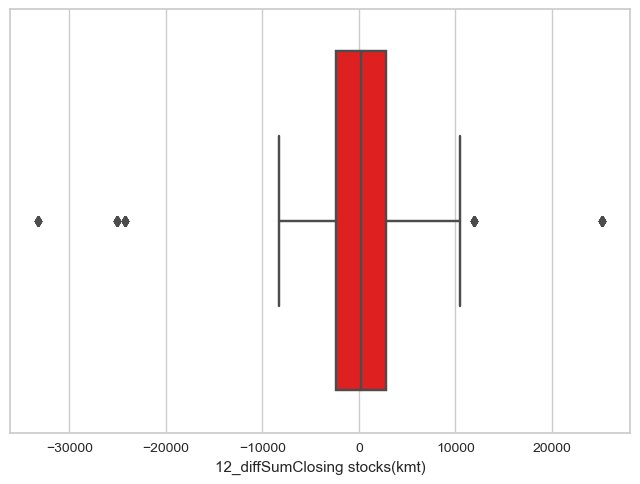

12_diffSumExports(kmt)


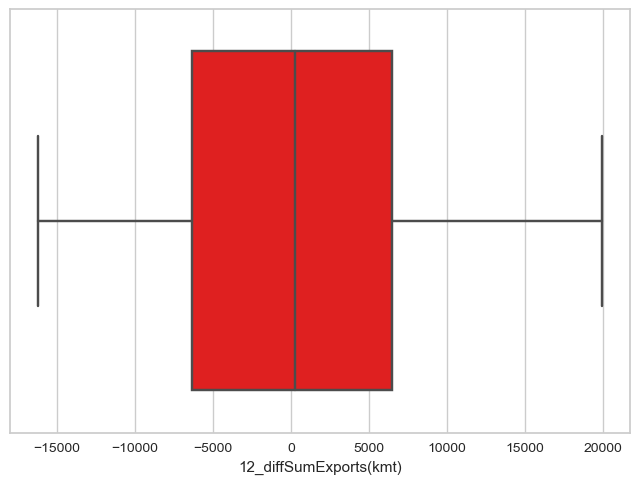

12_diffSumImports(kmt)


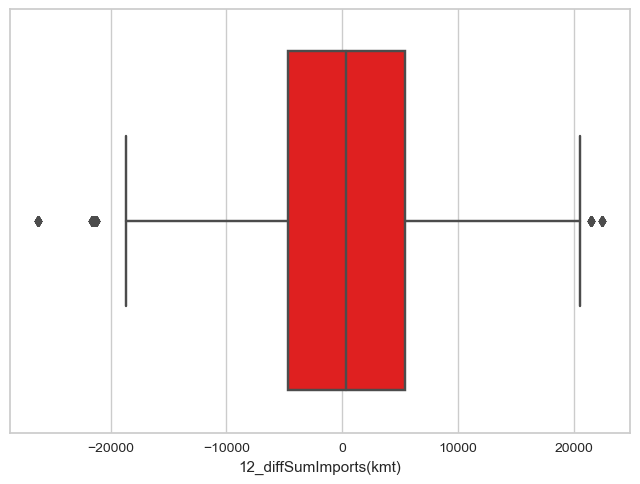

12_diffSumProduction(kmt)


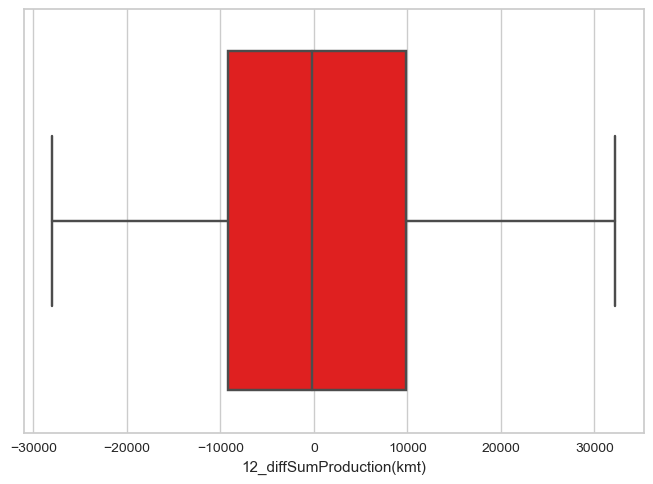

12_diffSumRefinery intake(kmt)


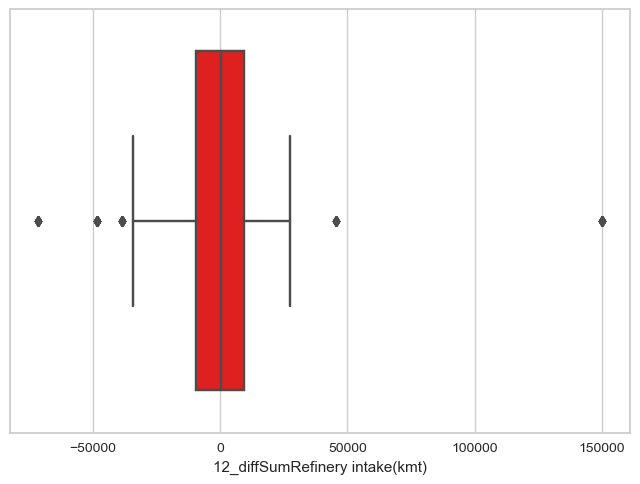

In [149]:
for col in test_df.iloc[:,1:].columns:
    print(col)
    sns.boxplot(x = test_df[col], data = test_df, color = 'red')
    plt.show()

In [150]:
def Outlier(var):
    for x in var.iloc[:, 1:].columns:
        Q1 = var[x].quantile(0.25)
        Q3 = var[x].quantile(0.75)
        IQR = Q3-Q1
        Lower = Q1-(1.5*IQR)
        Upper = Q3+(1.5*IQR)
        var.loc[:,x] = np.where(var[x].values > Upper, Upper, var[x].values)
        var.loc[:,x] = np.where(var[x].values < Lower, Lower, var[x].values)
    return var
df_test = Outlier(test_df)

country


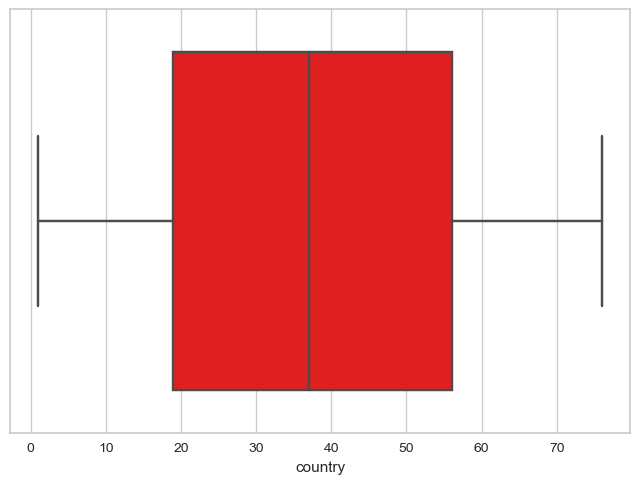

1_diffClosing stocks(kmt)


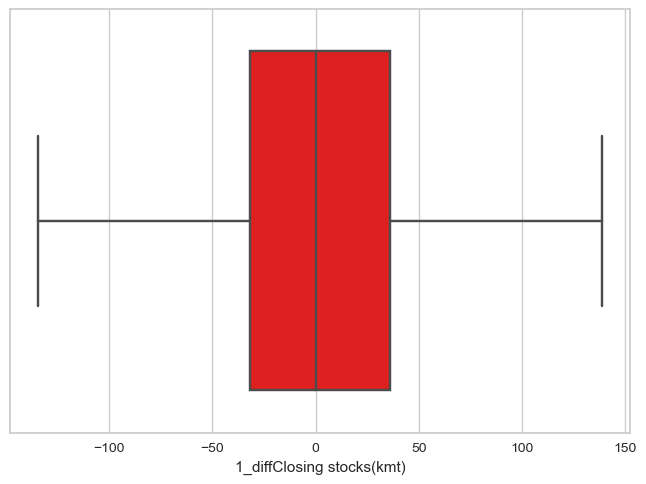

1_diffExports(kmt)


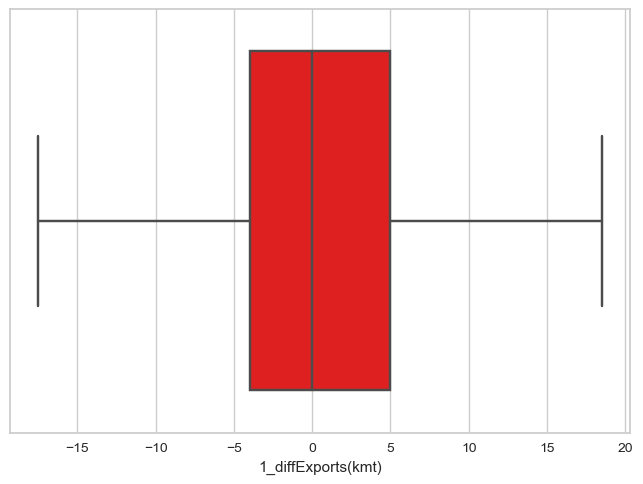

1_diffImports(kmt)


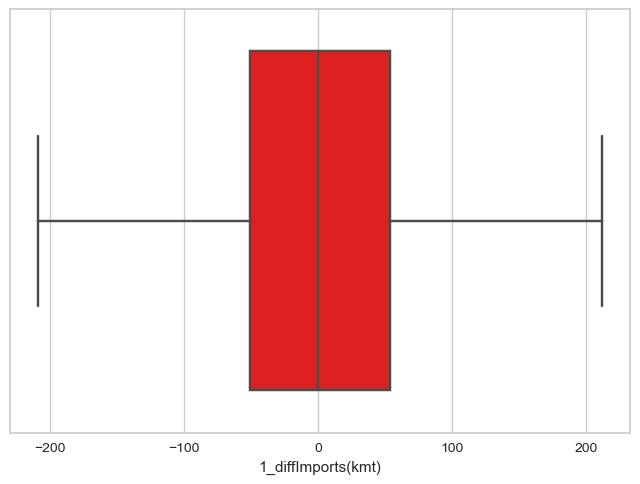

1_diffRefinery intake(kmt)


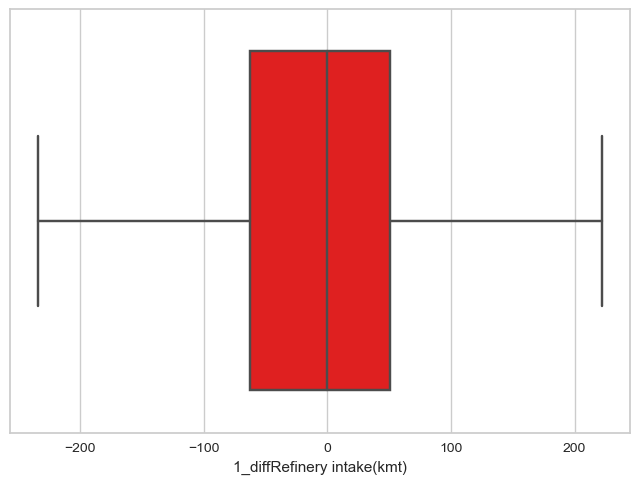

1_diffWTI


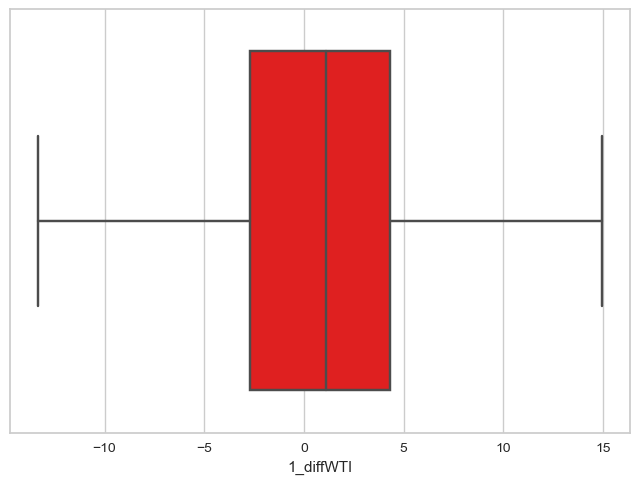

1_diffSumClosing stocks(kmt)


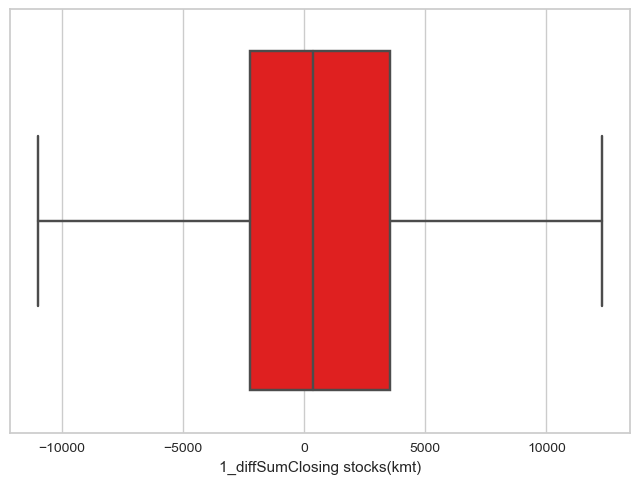

1_diffSumExports(kmt)


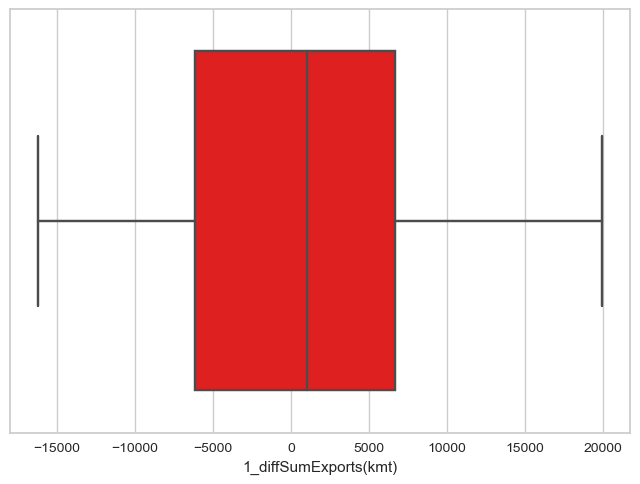

1_diffSumImports(kmt)


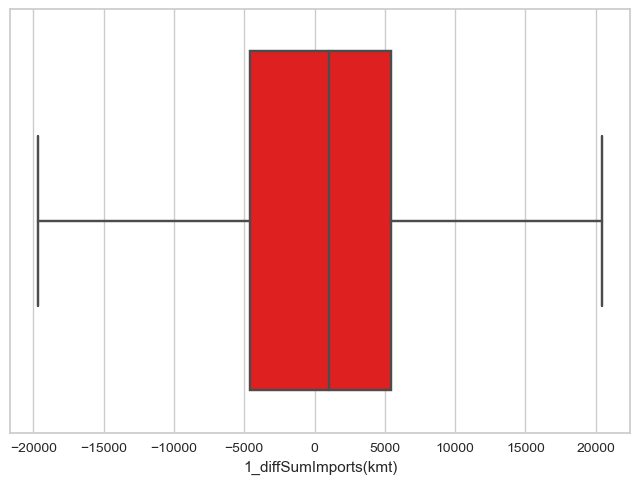

1_diffSumProduction(kmt)


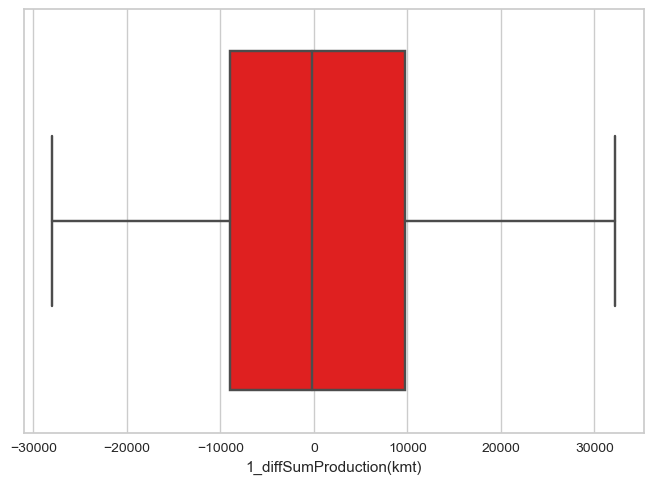

1_diffSumRefinery intake(kmt)


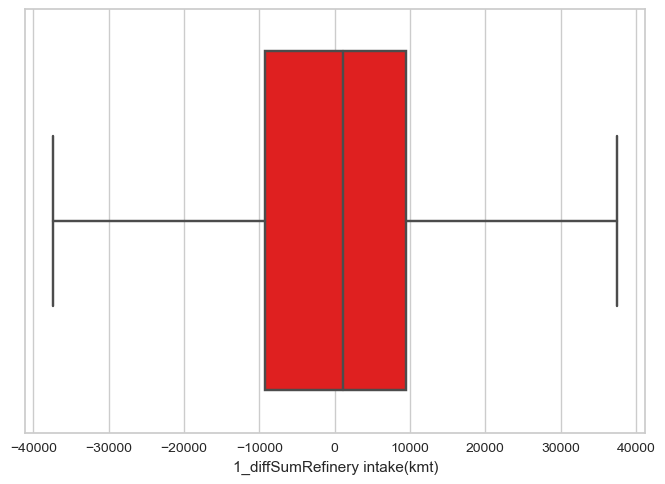

2_diffClosing stocks(kmt)


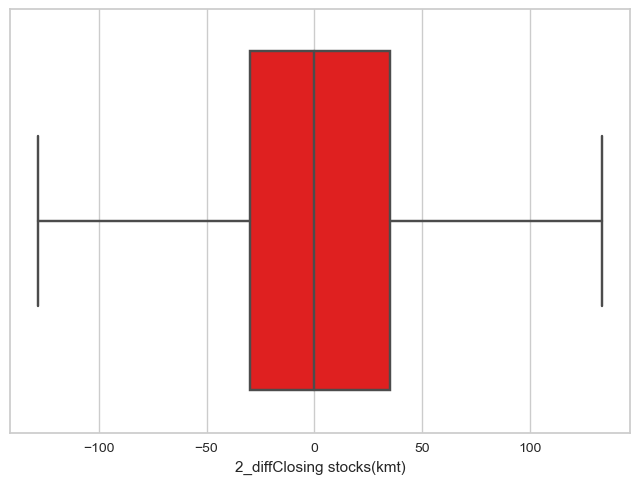

2_diffExports(kmt)


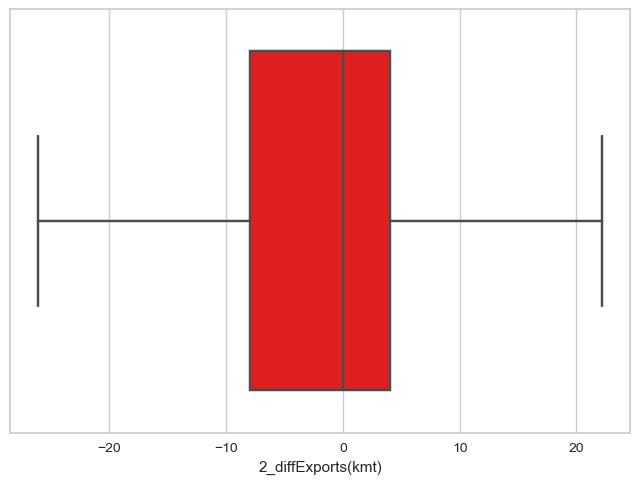

2_diffImports(kmt)


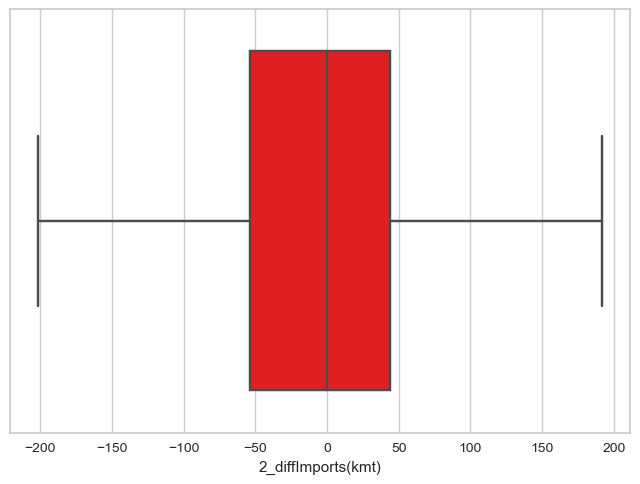

2_diffRefinery intake(kmt)


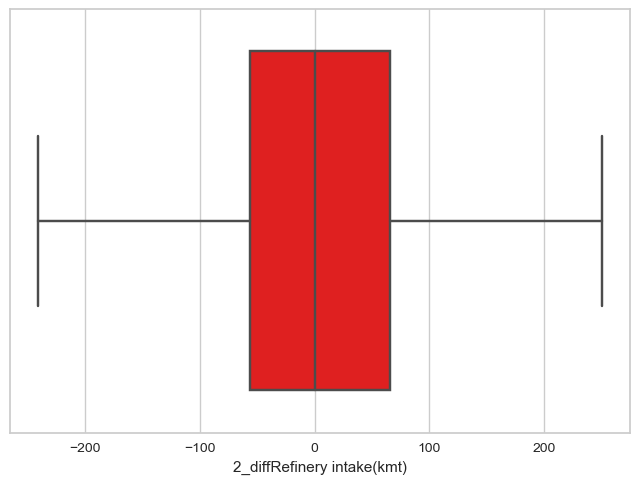

2_diffWTI


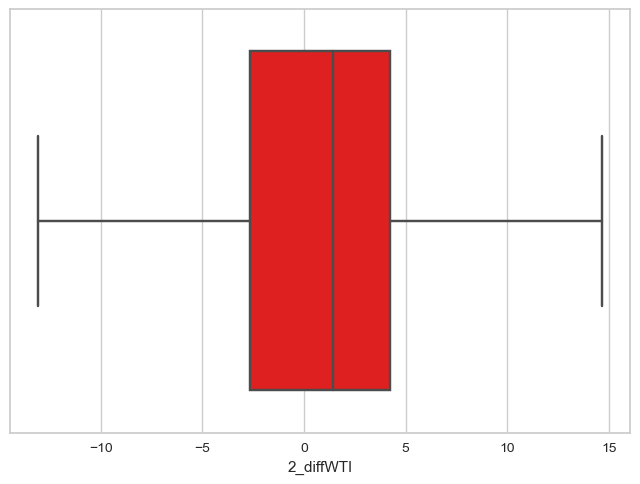

2_diffSumClosing stocks(kmt)


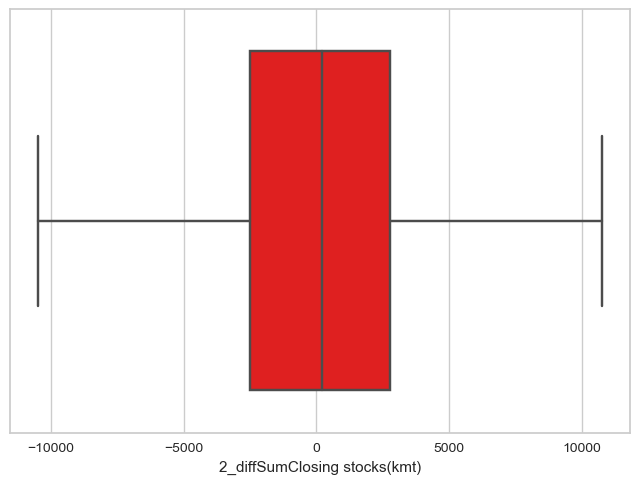

2_diffSumExports(kmt)


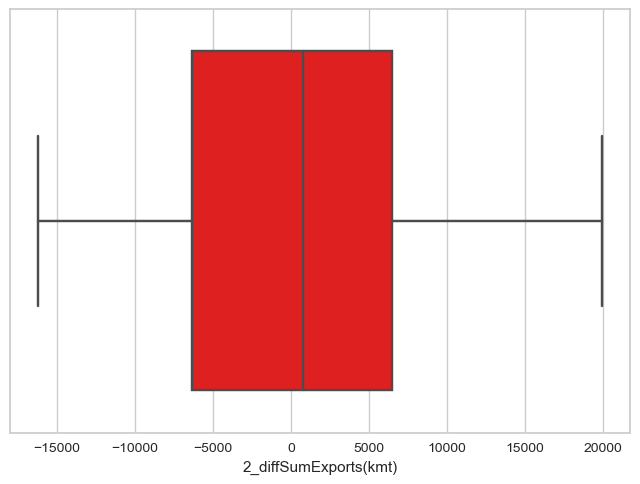

2_diffSumImports(kmt)


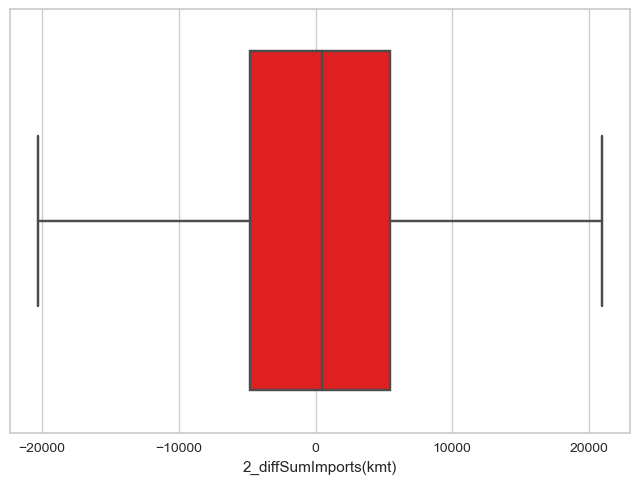

2_diffSumProduction(kmt)


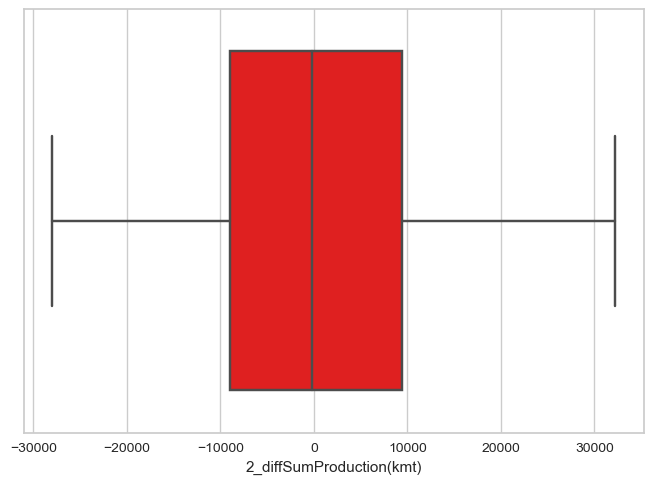

2_diffSumRefinery intake(kmt)


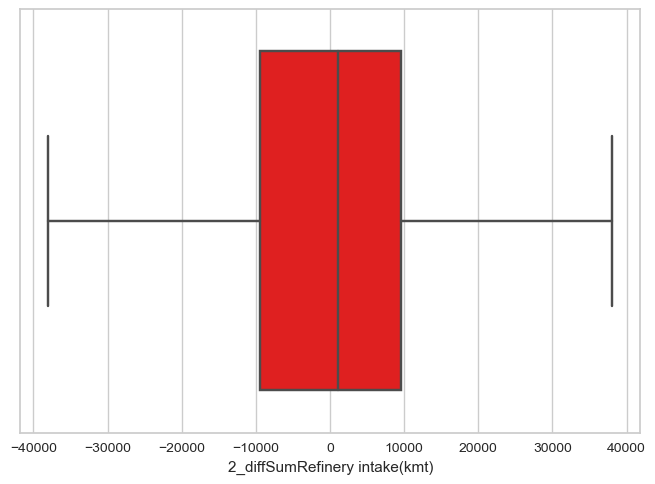

3_diffClosing stocks(kmt)


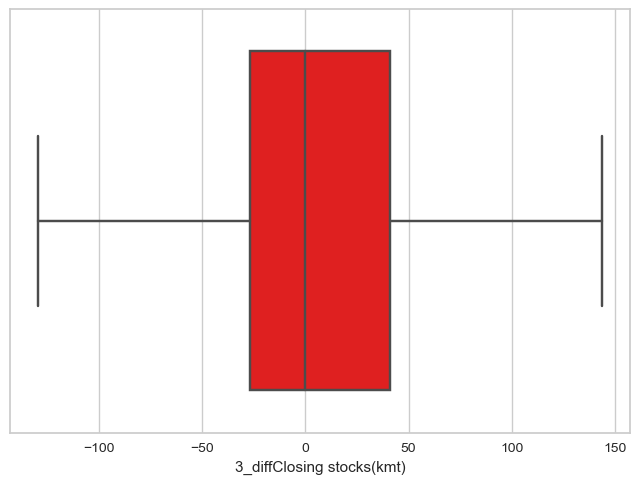

3_diffExports(kmt)


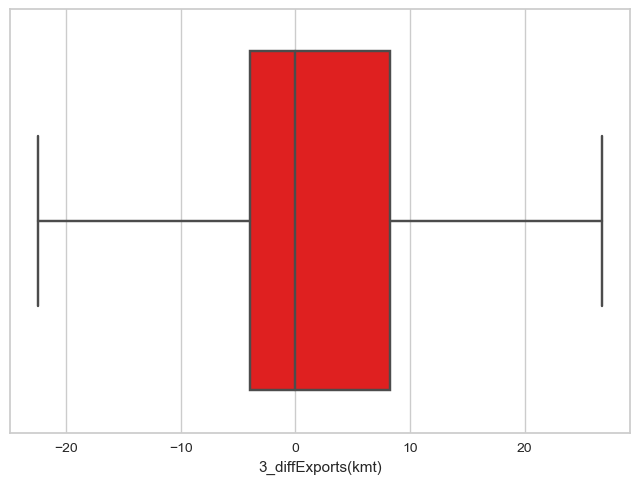

3_diffImports(kmt)


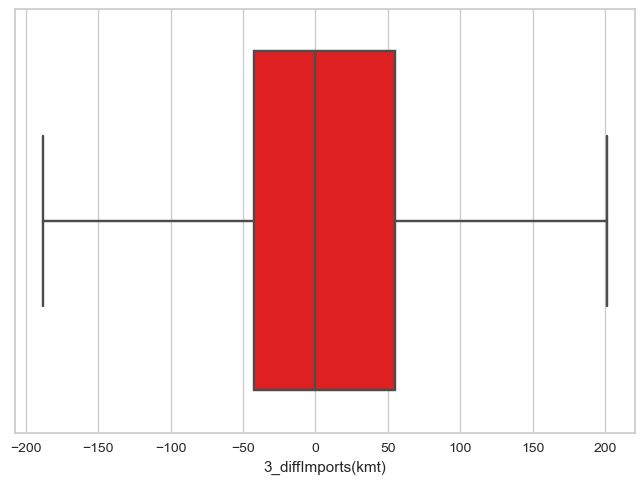

3_diffRefinery intake(kmt)


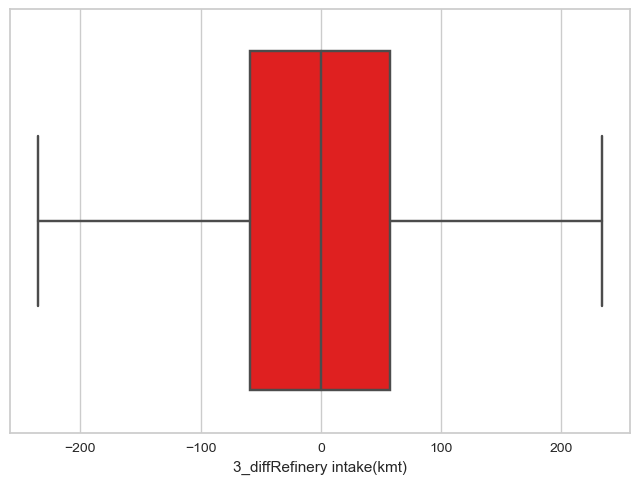

3_diffWTI


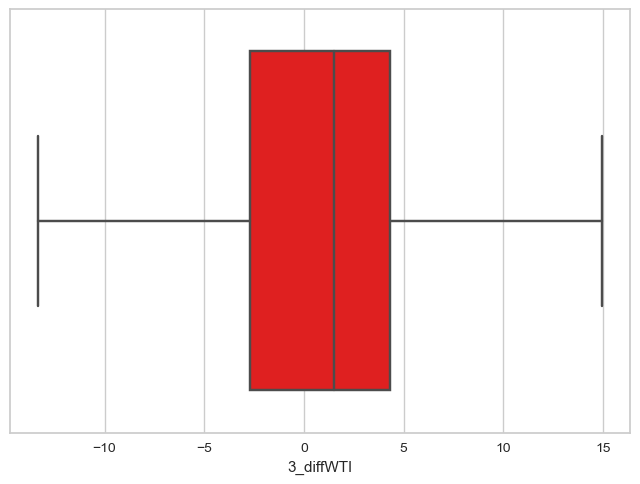

3_diffSumClosing stocks(kmt)


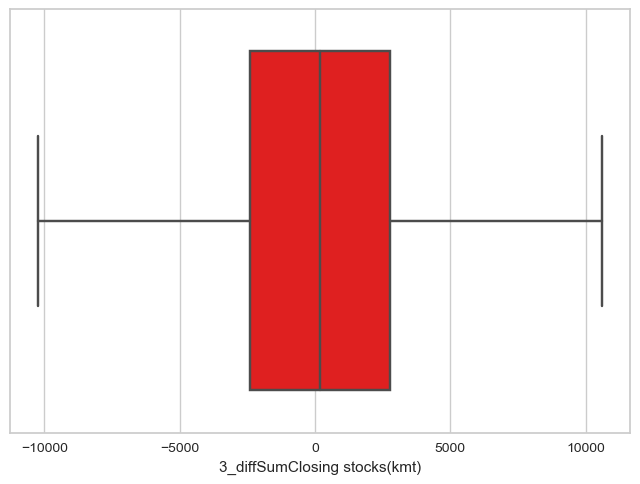

3_diffSumExports(kmt)


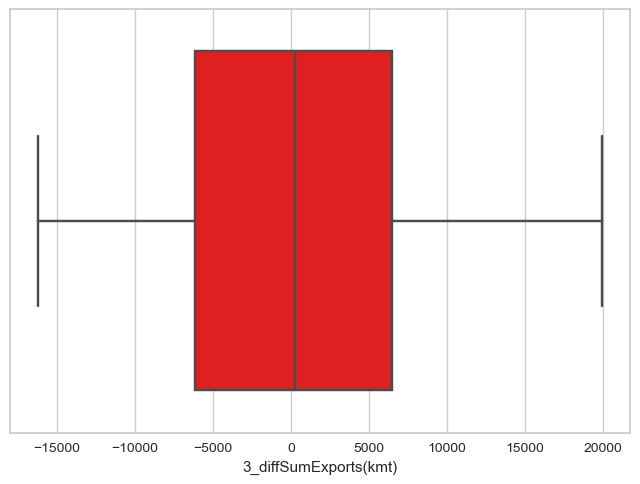

3_diffSumImports(kmt)


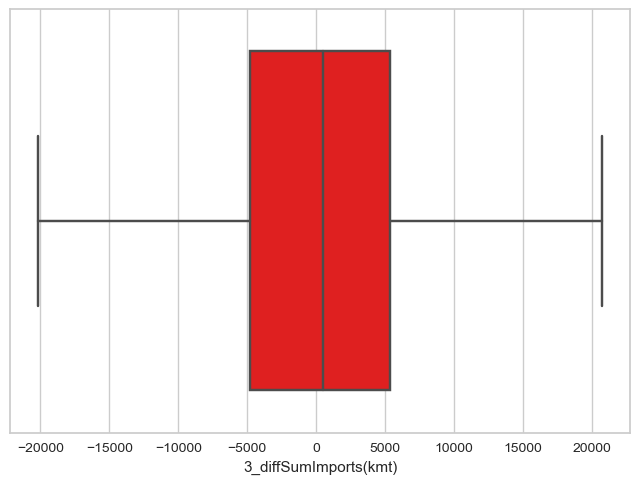

3_diffSumProduction(kmt)


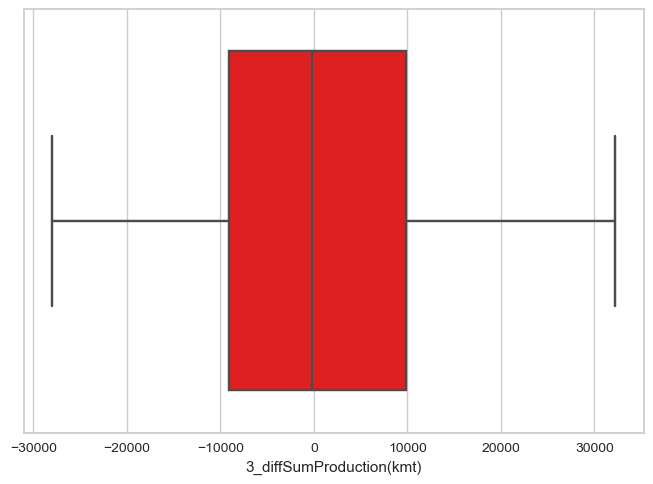

3_diffSumRefinery intake(kmt)


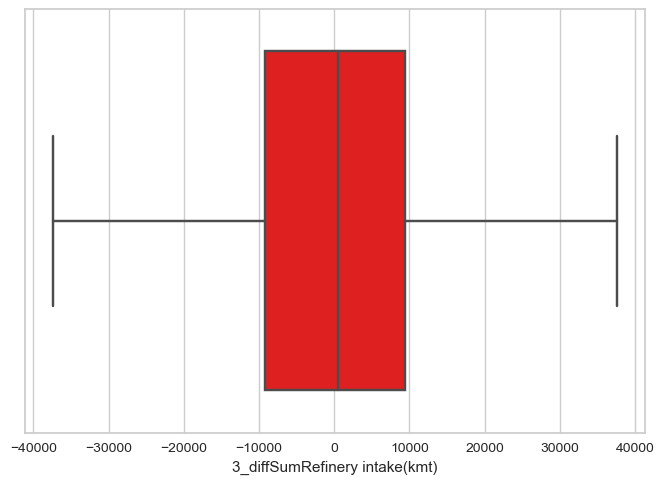

4_diffClosing stocks(kmt)


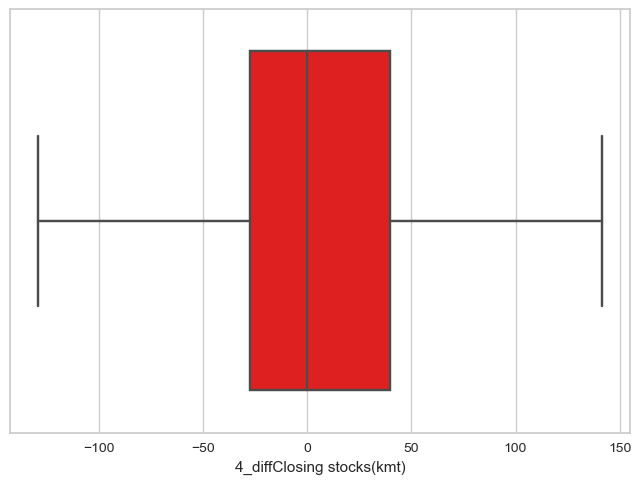

4_diffExports(kmt)


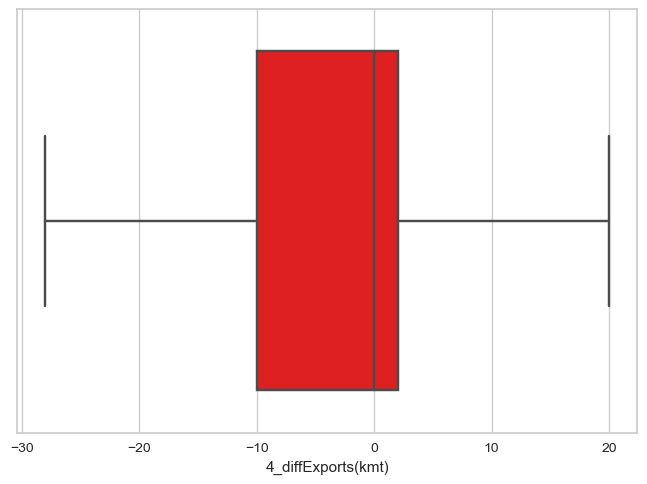

4_diffImports(kmt)


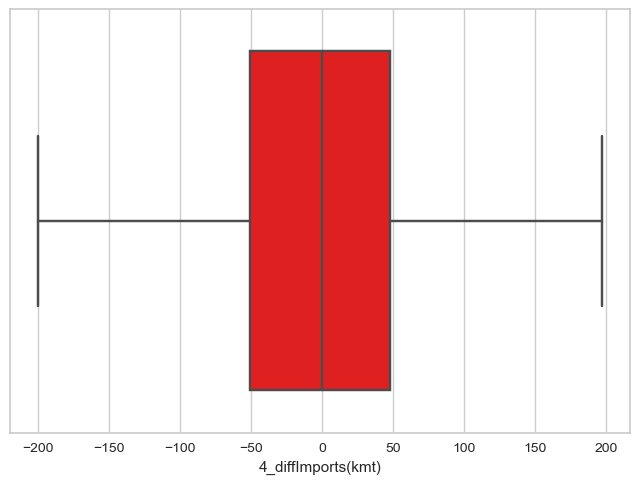

4_diffRefinery intake(kmt)


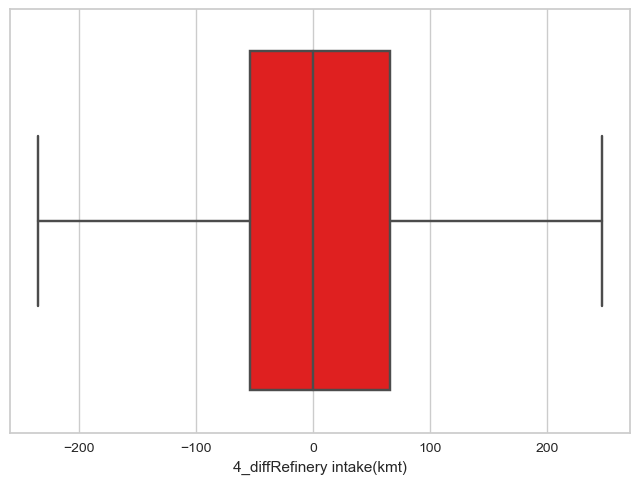

4_diffWTI


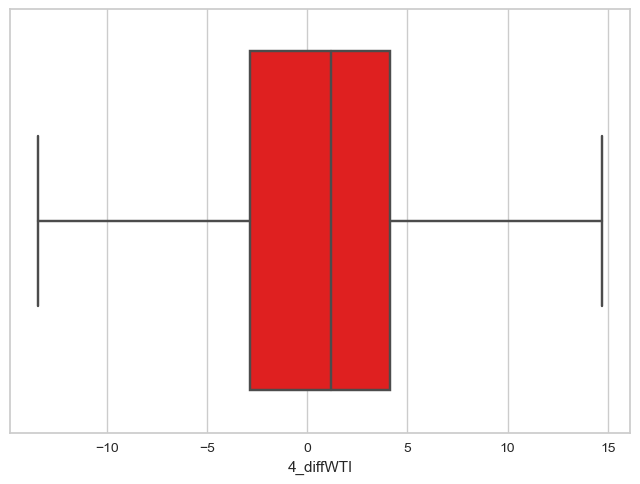

4_diffSumClosing stocks(kmt)


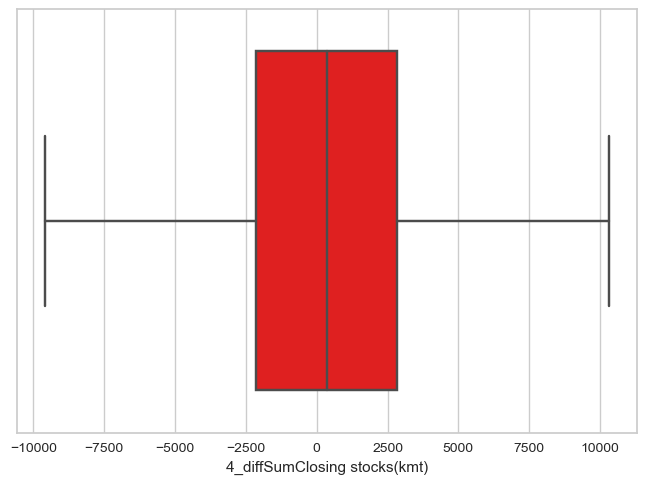

4_diffSumExports(kmt)


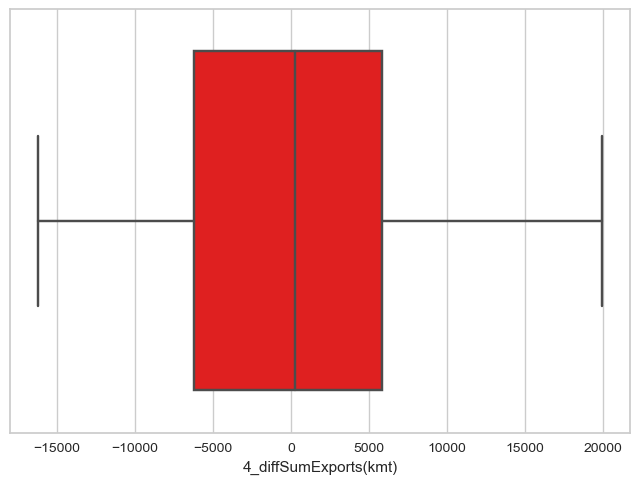

4_diffSumImports(kmt)


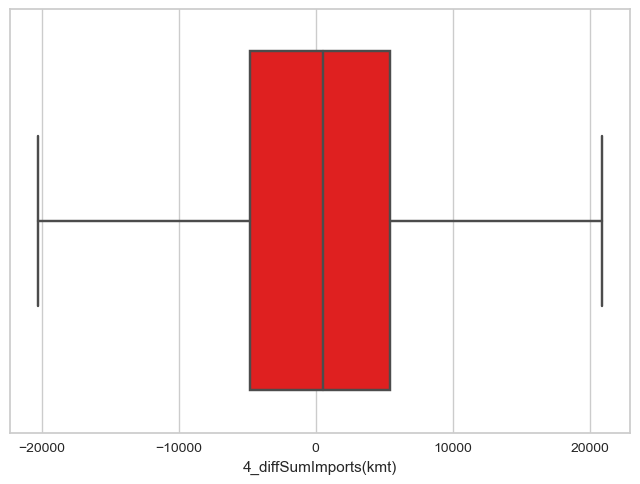

4_diffSumProduction(kmt)


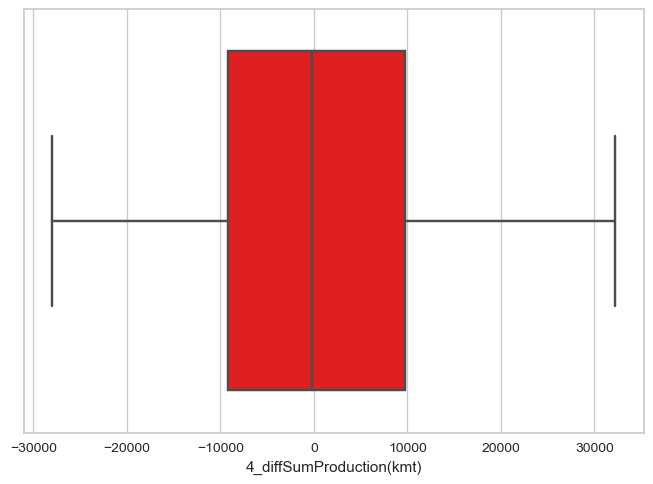

4_diffSumRefinery intake(kmt)


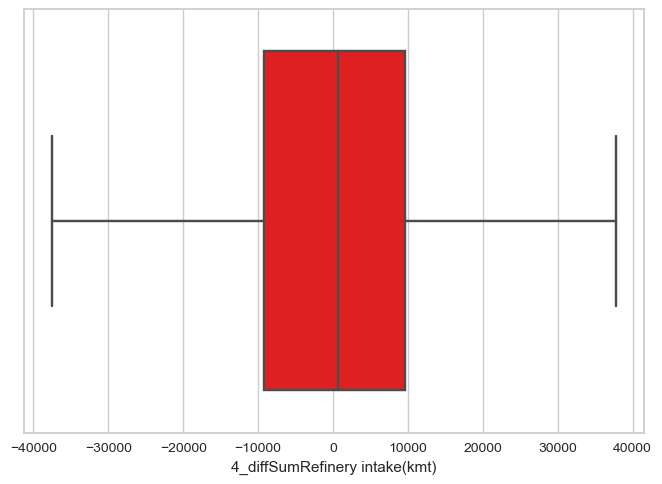

5_diffClosing stocks(kmt)


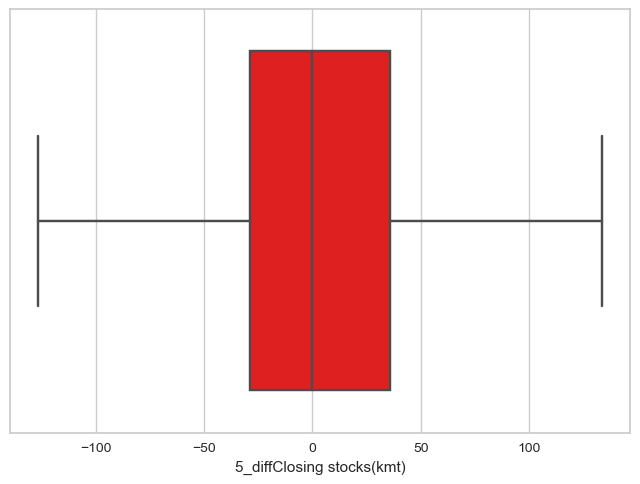

5_diffExports(kmt)


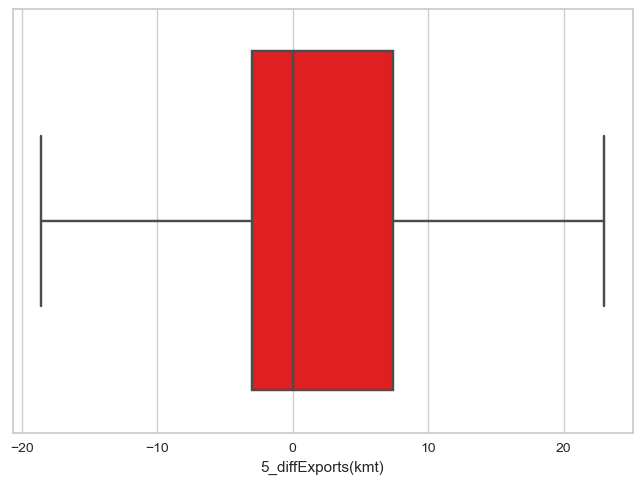

5_diffImports(kmt)


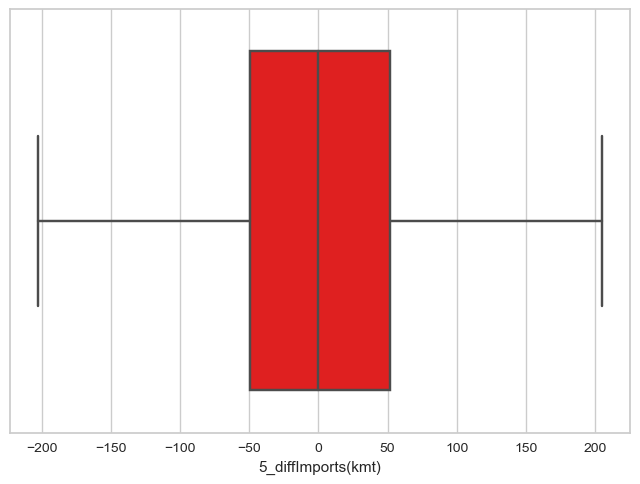

5_diffRefinery intake(kmt)


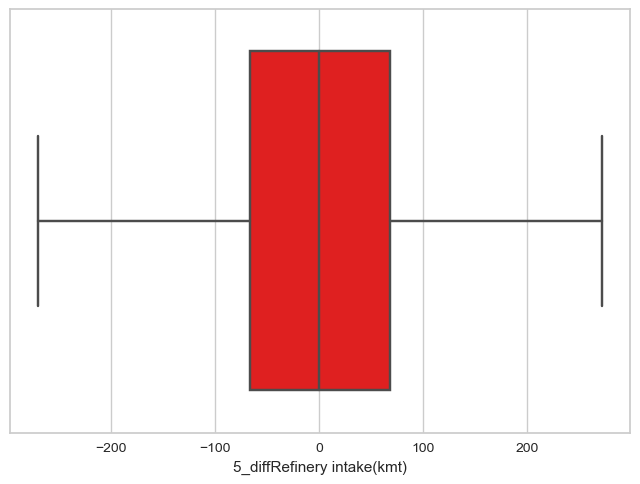

5_diffWTI


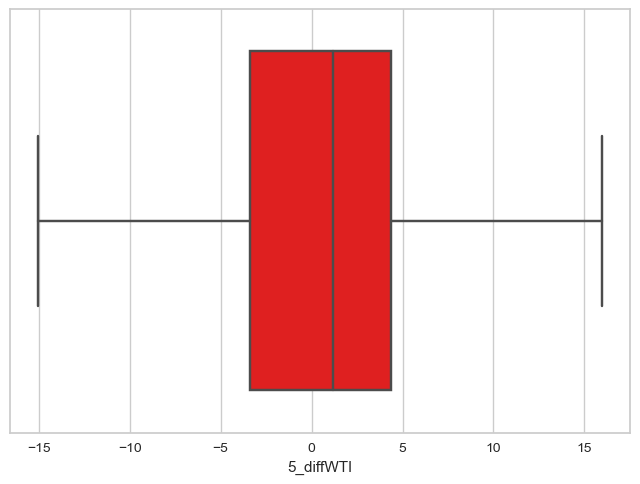

5_diffSumClosing stocks(kmt)


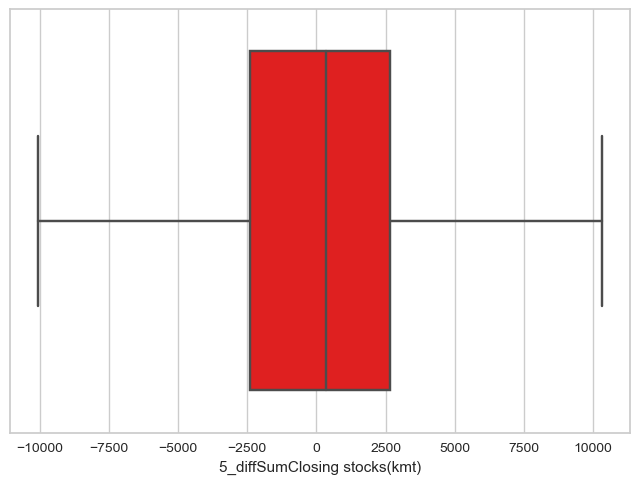

5_diffSumExports(kmt)


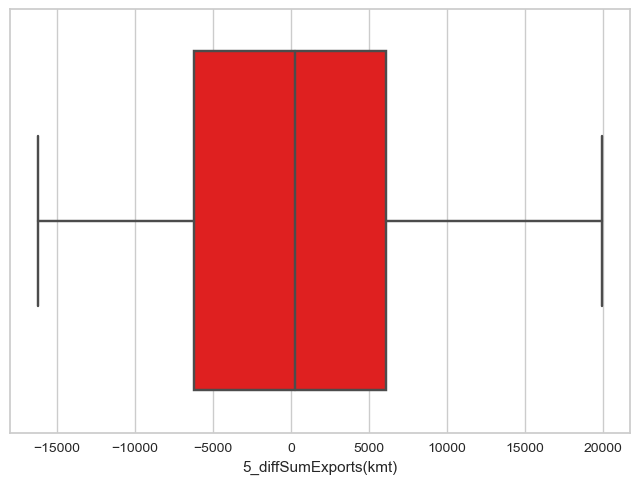

5_diffSumImports(kmt)


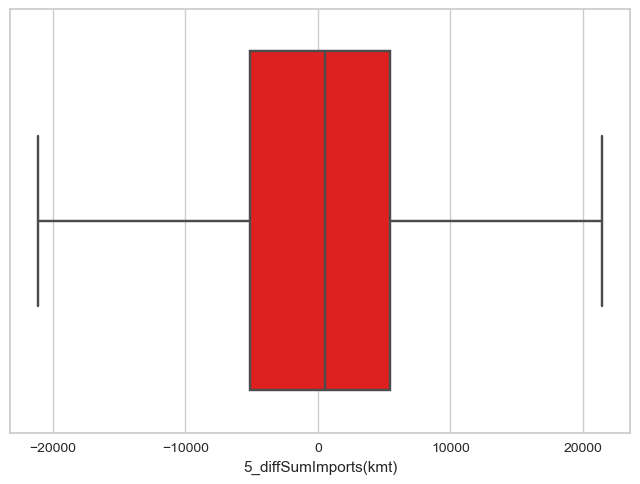

5_diffSumProduction(kmt)


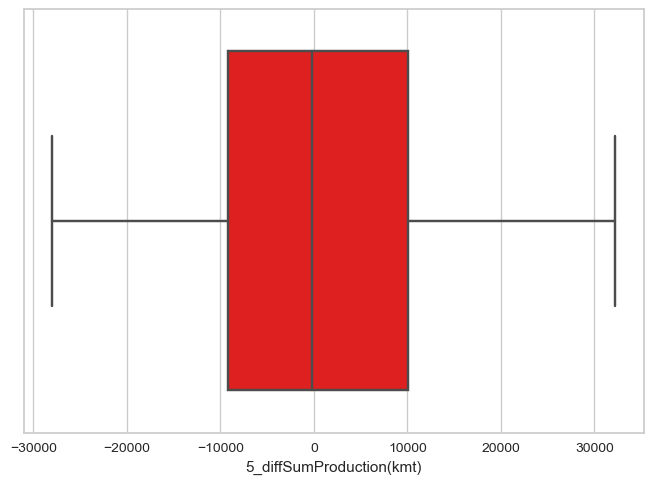

5_diffSumRefinery intake(kmt)


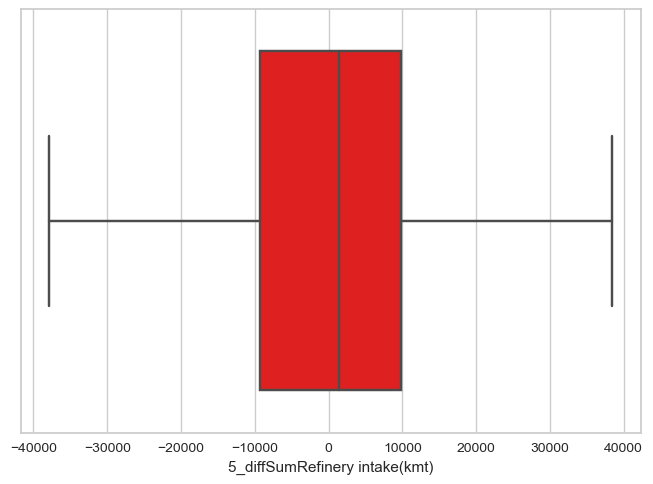

6_diffClosing stocks(kmt)


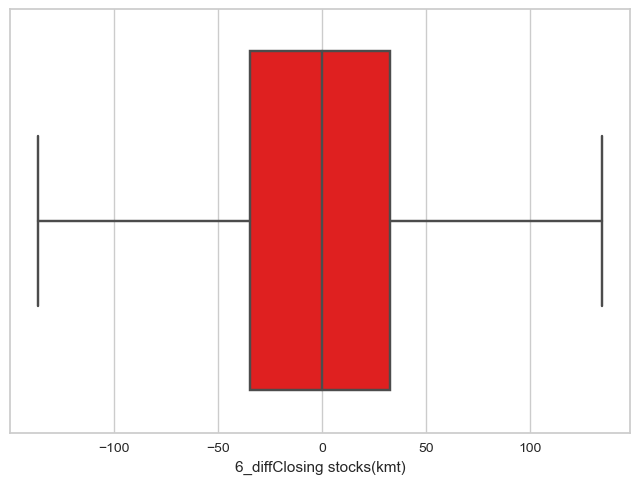

6_diffExports(kmt)


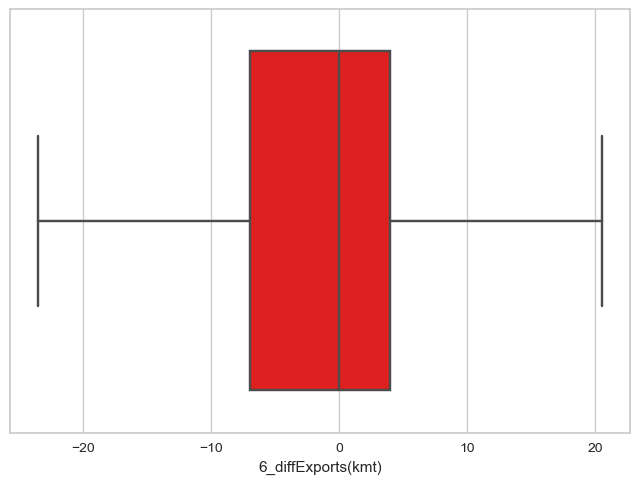

6_diffImports(kmt)


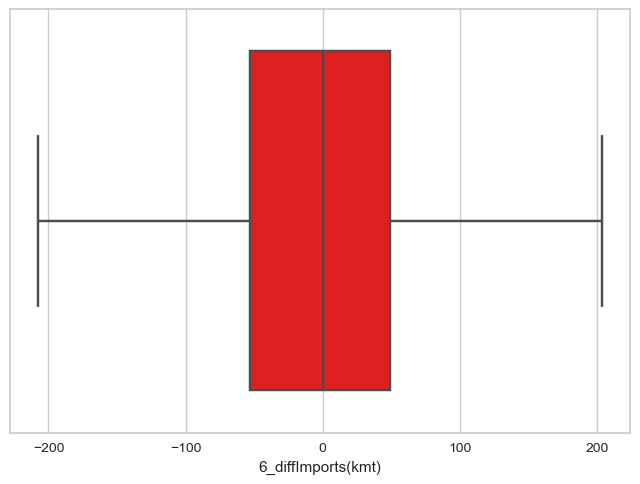

6_diffRefinery intake(kmt)


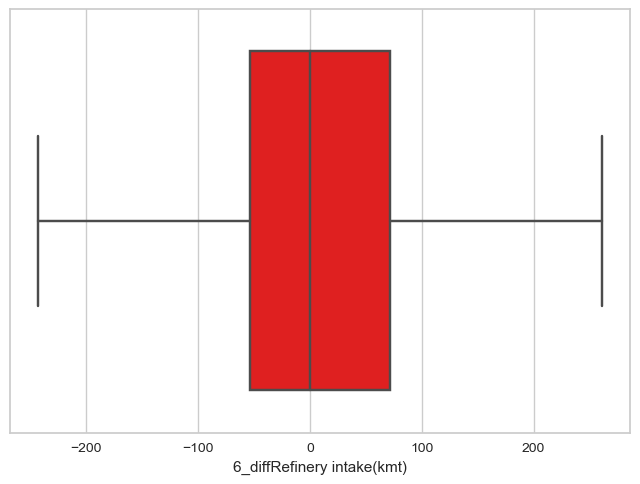

6_diffWTI


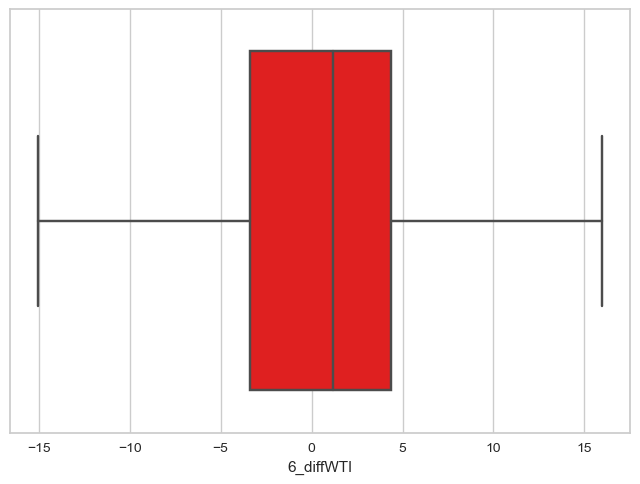

6_diffSumClosing stocks(kmt)


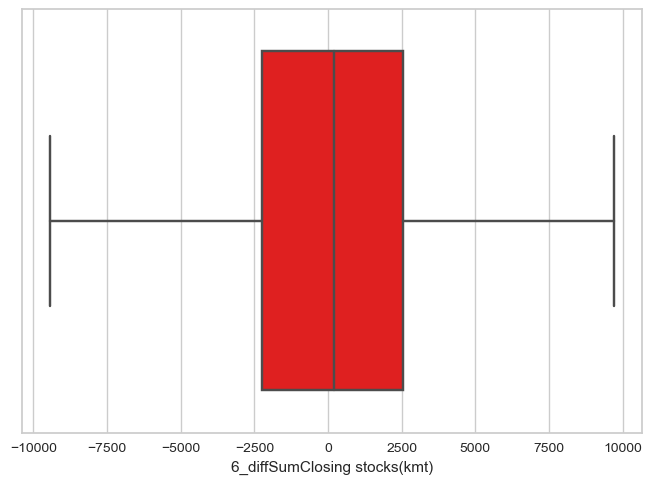

6_diffSumExports(kmt)


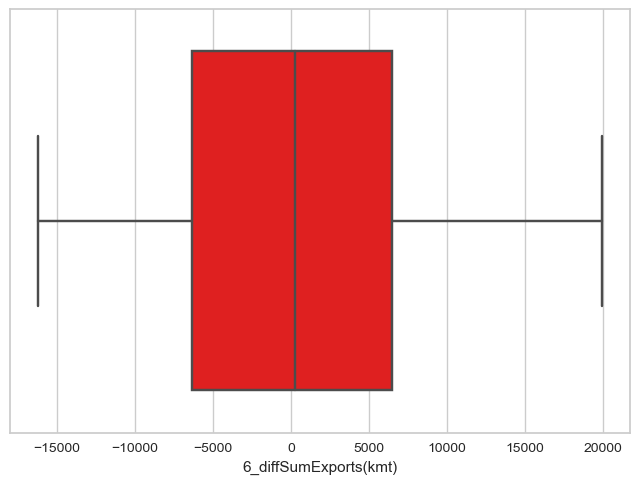

6_diffSumImports(kmt)


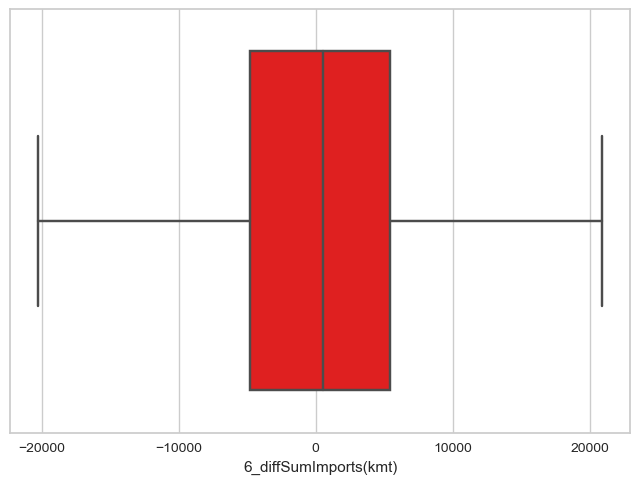

6_diffSumProduction(kmt)


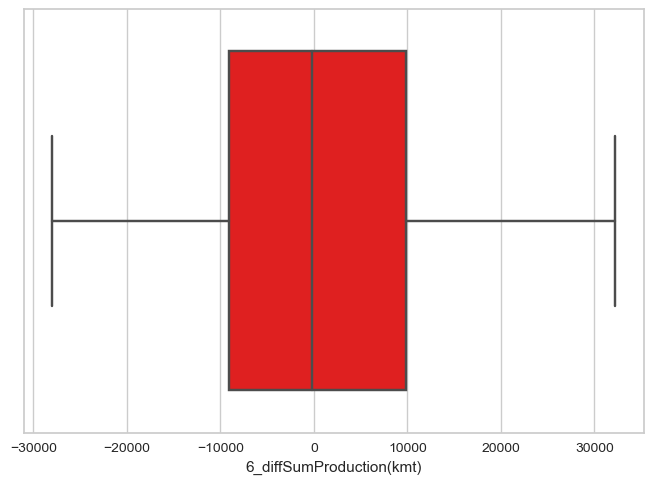

6_diffSumRefinery intake(kmt)


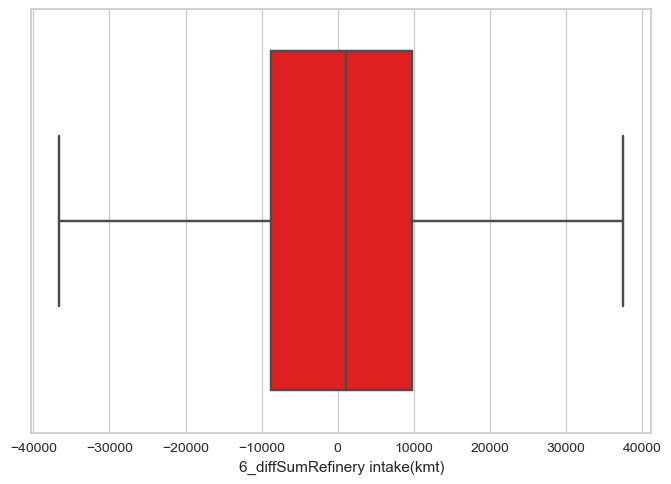

7_diffClosing stocks(kmt)


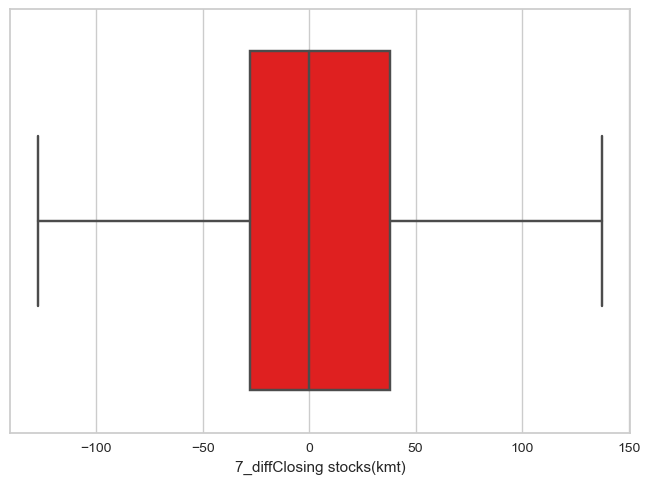

7_diffExports(kmt)


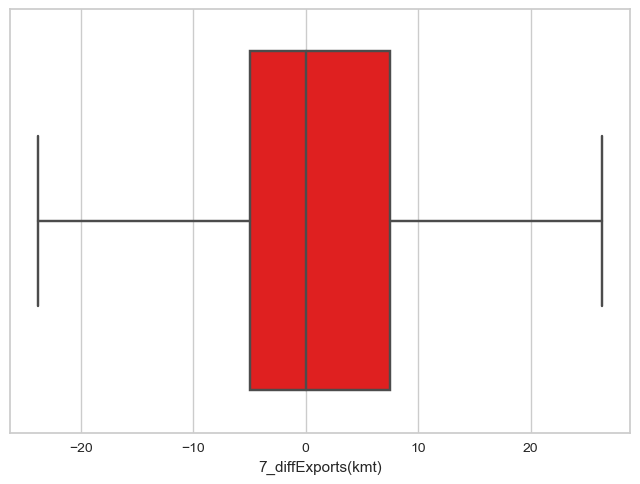

7_diffImports(kmt)


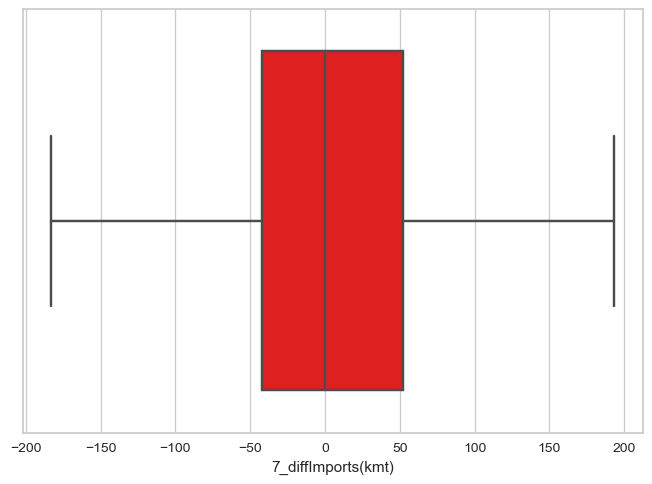

7_diffRefinery intake(kmt)


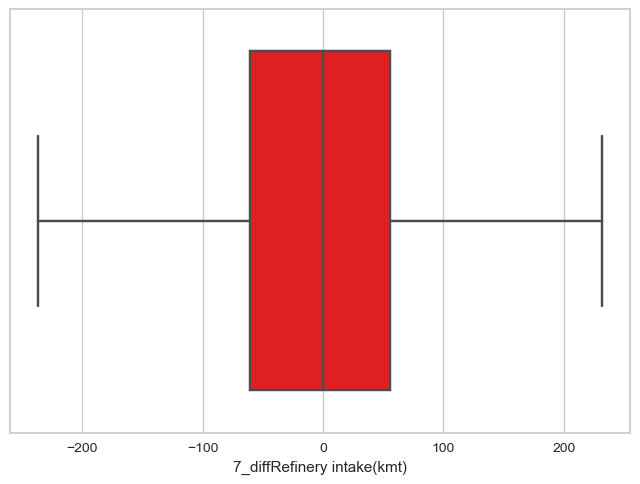

7_diffWTI


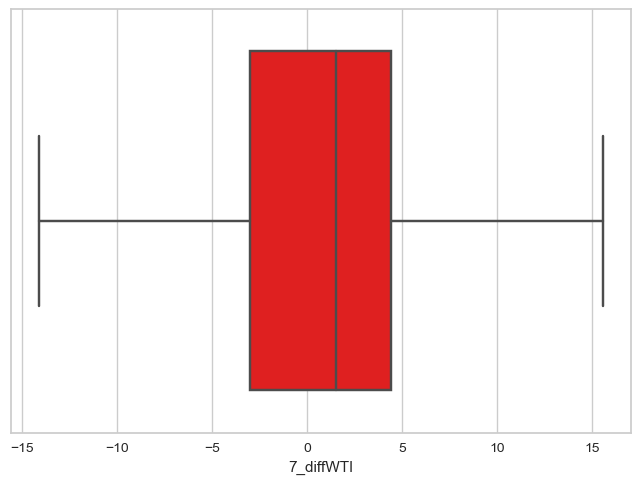

7_diffSumClosing stocks(kmt)


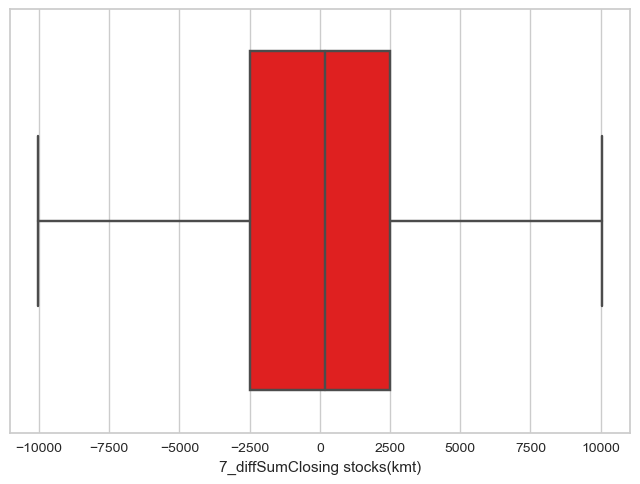

7_diffSumExports(kmt)


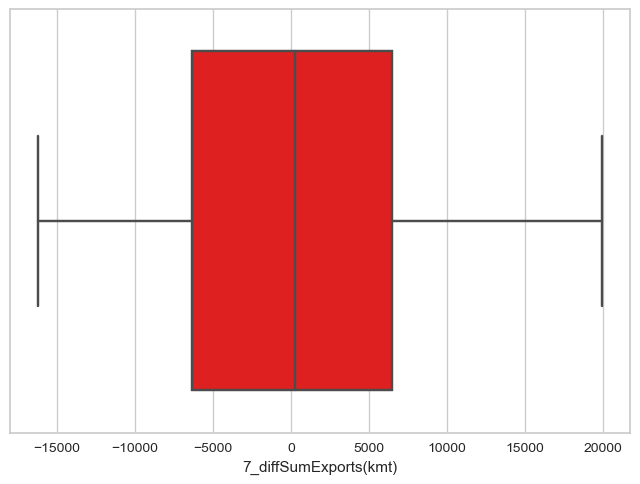

7_diffSumImports(kmt)


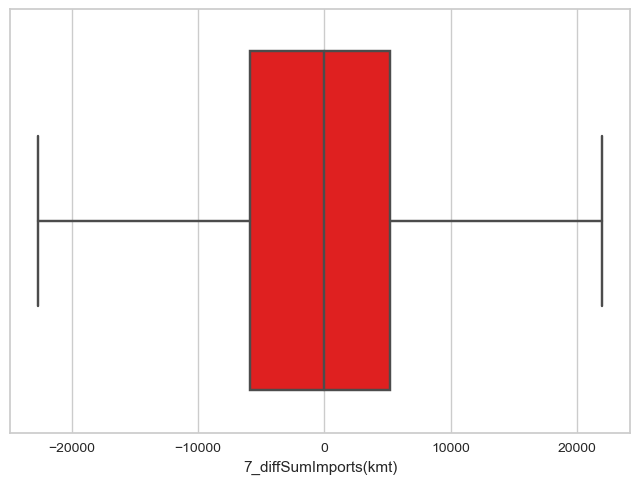

7_diffSumProduction(kmt)


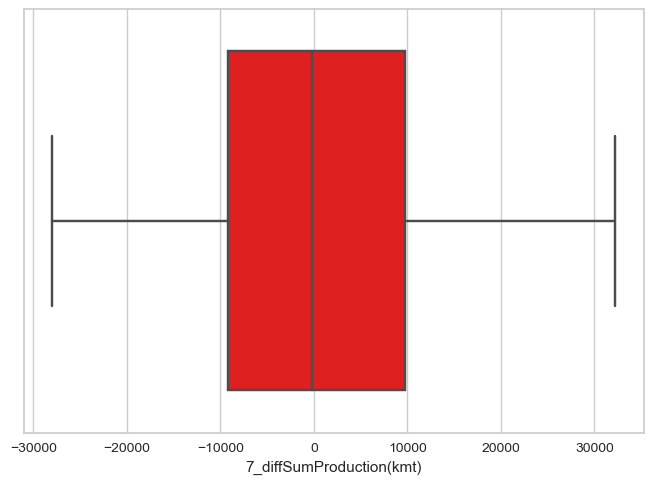

7_diffSumRefinery intake(kmt)


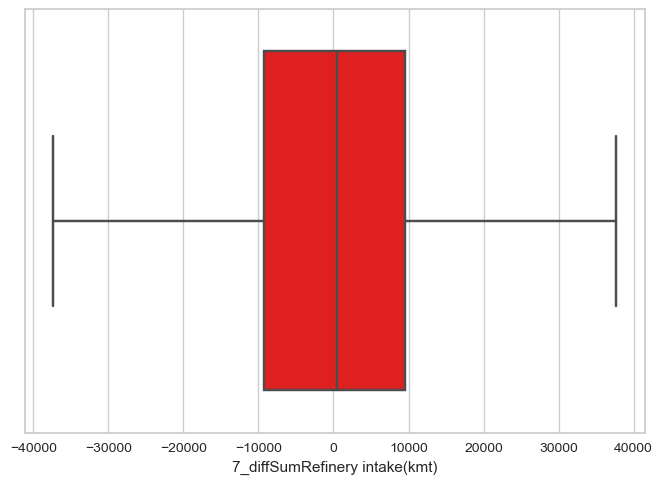

8_diffClosing stocks(kmt)


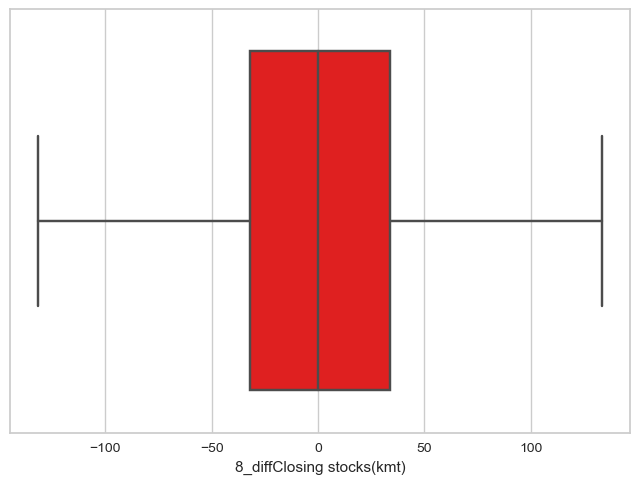

8_diffExports(kmt)


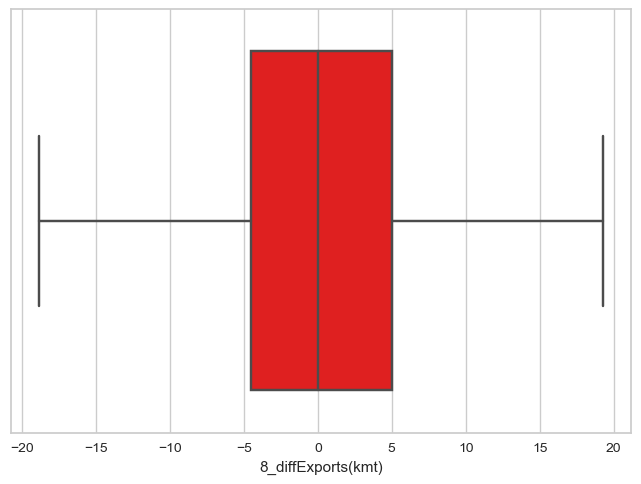

8_diffImports(kmt)


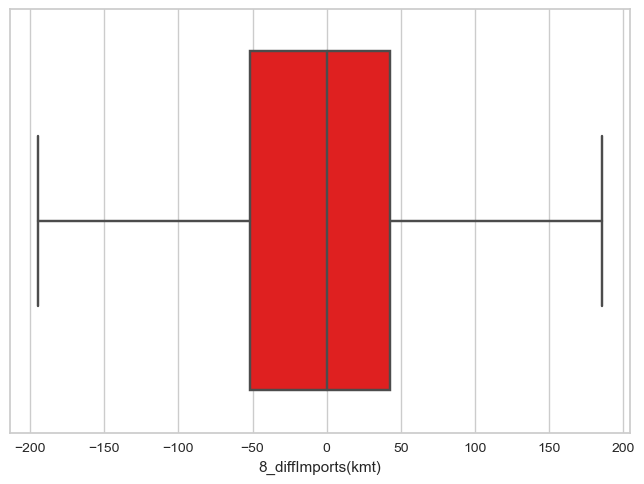

8_diffRefinery intake(kmt)


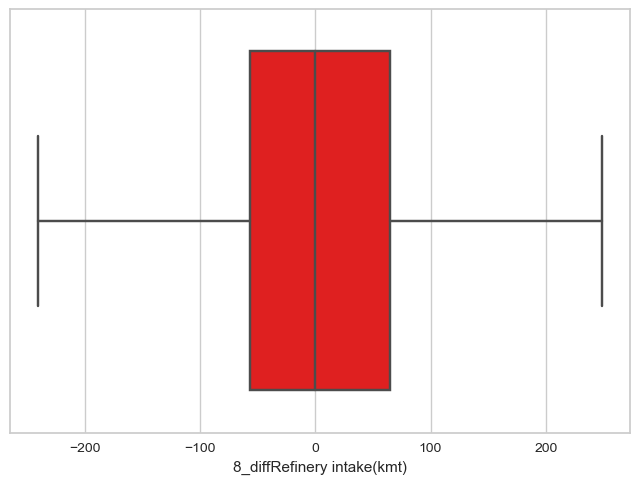

8_diffWTI


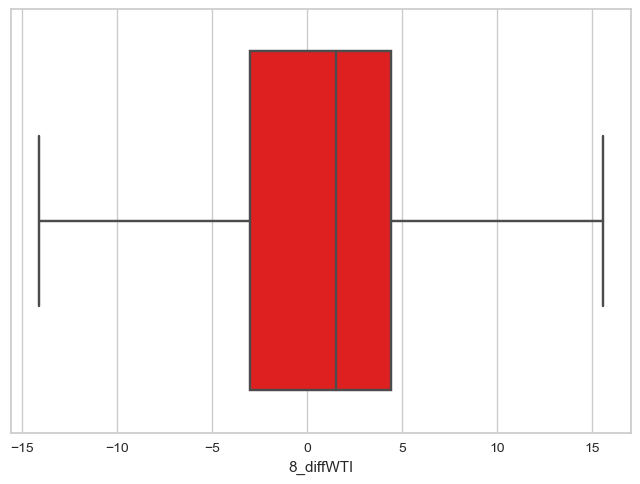

8_diffSumClosing stocks(kmt)


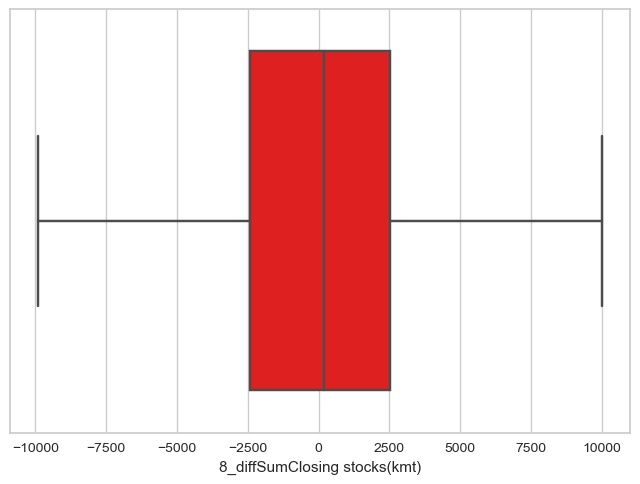

8_diffSumExports(kmt)


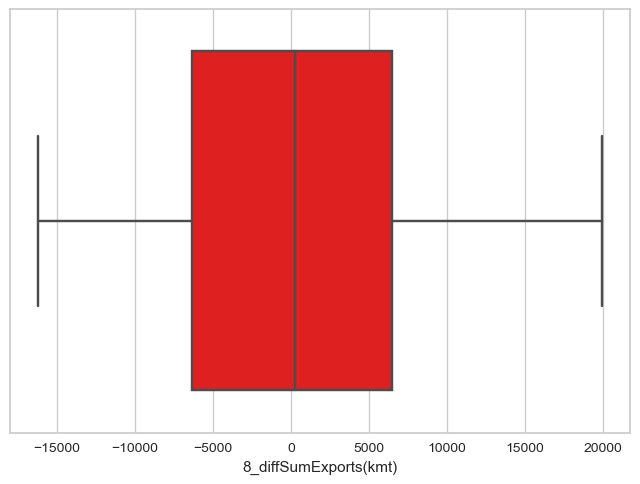

8_diffSumImports(kmt)


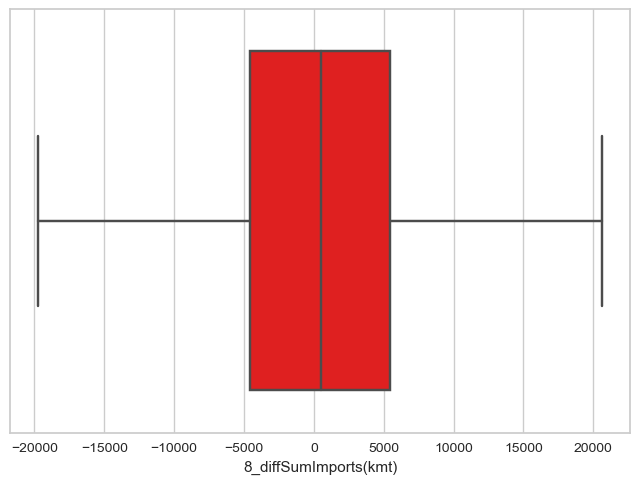

8_diffSumProduction(kmt)


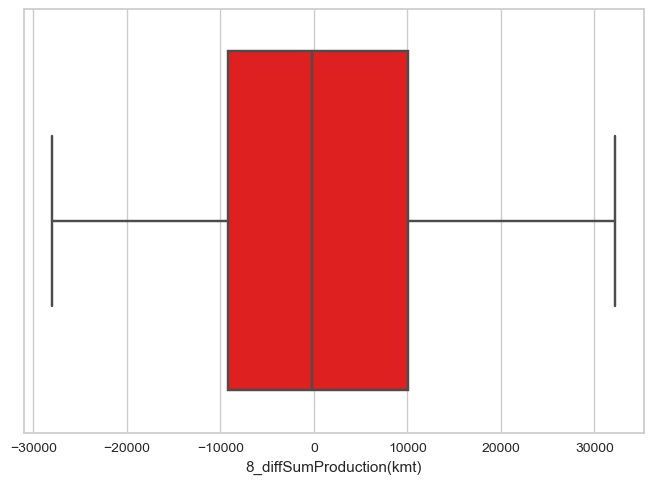

8_diffSumRefinery intake(kmt)


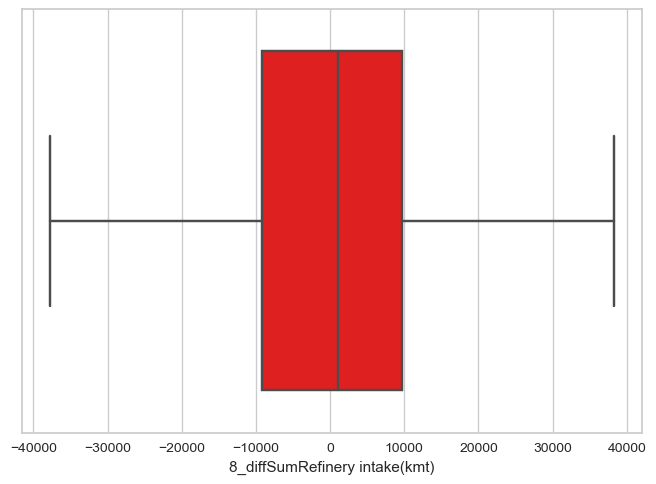

9_diffClosing stocks(kmt)


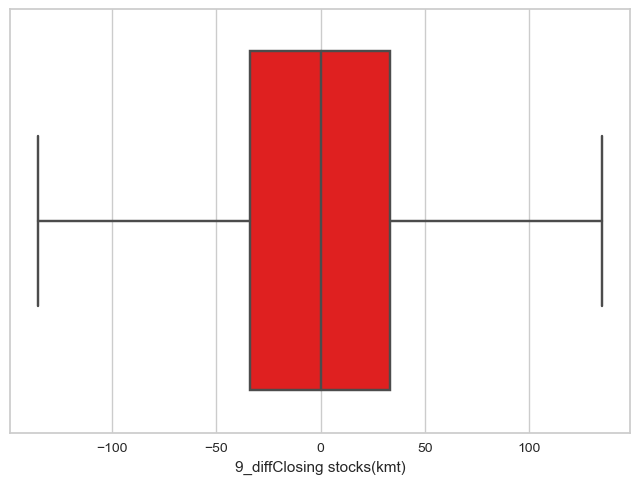

9_diffExports(kmt)


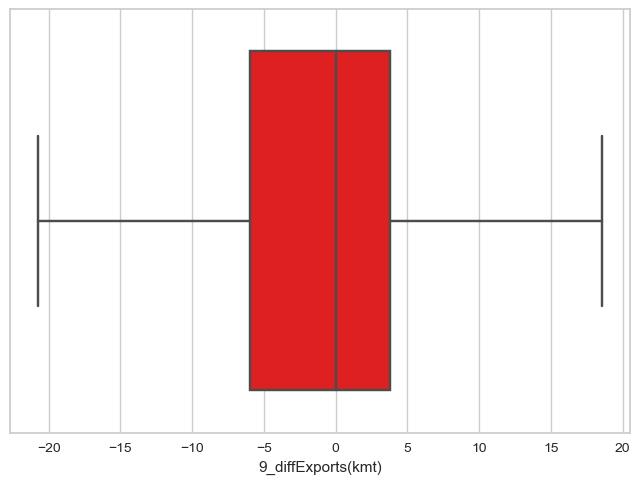

9_diffImports(kmt)


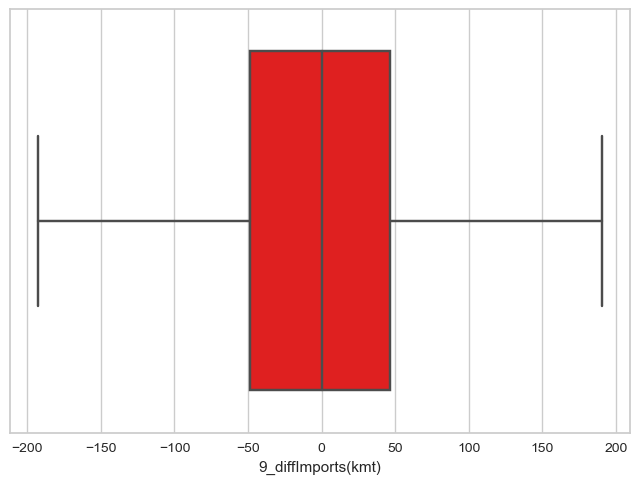

9_diffRefinery intake(kmt)


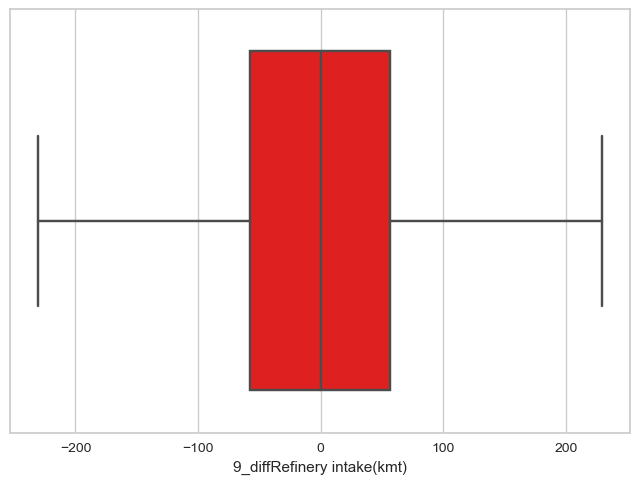

9_diffWTI


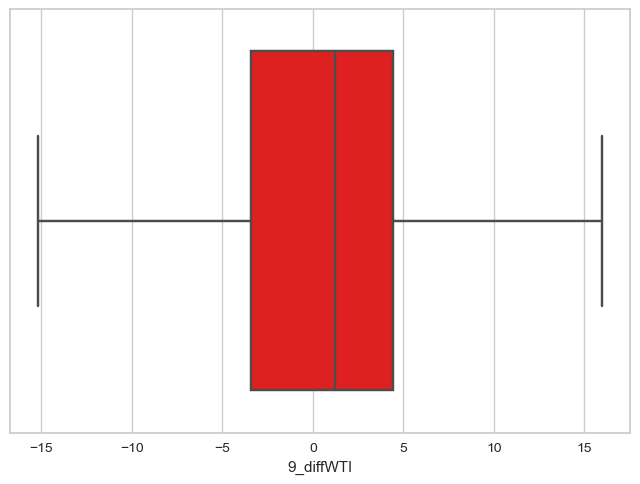

9_diffSumClosing stocks(kmt)


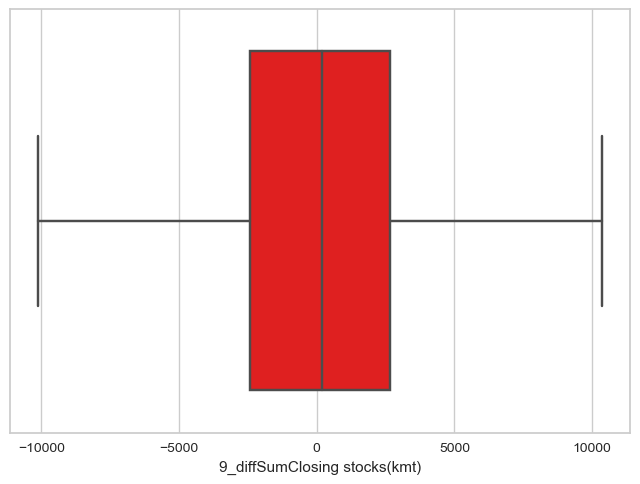

9_diffSumExports(kmt)


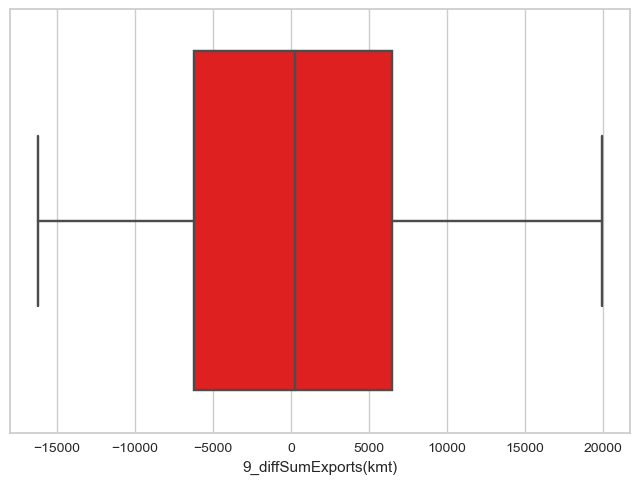

9_diffSumImports(kmt)


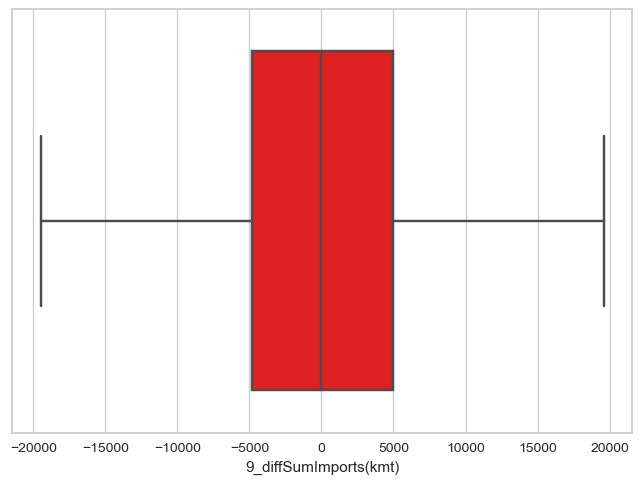

9_diffSumProduction(kmt)


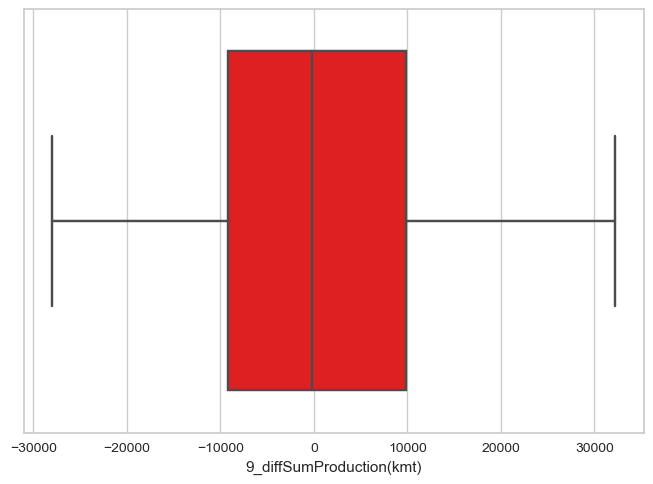

9_diffSumRefinery intake(kmt)


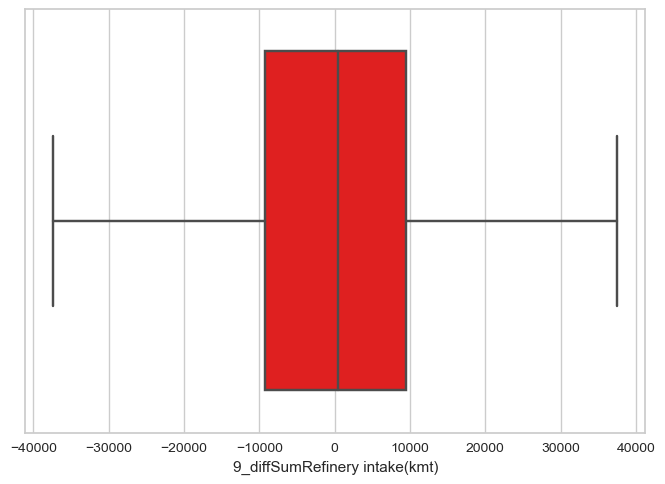

10_diffClosing stocks(kmt)


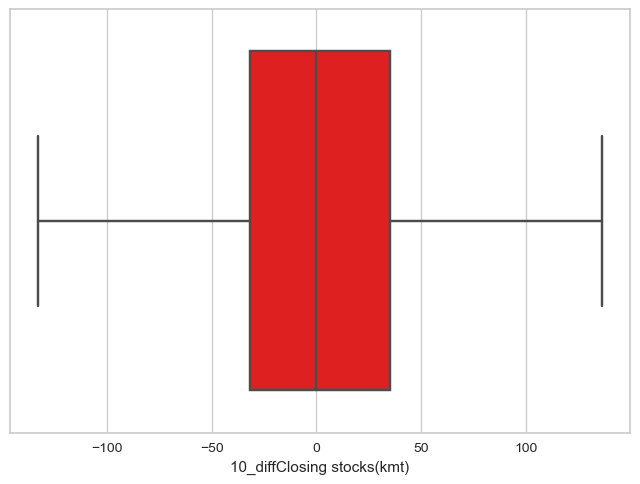

10_diffExports(kmt)


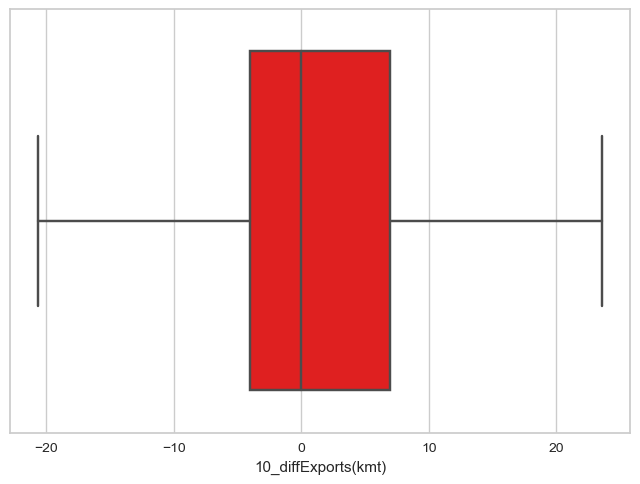

10_diffImports(kmt)


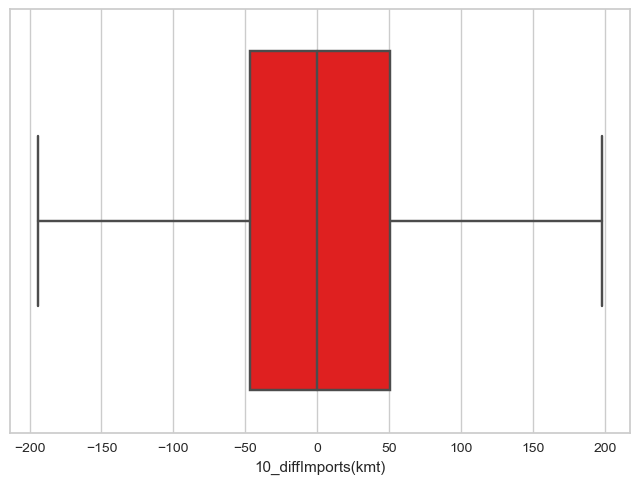

10_diffRefinery intake(kmt)


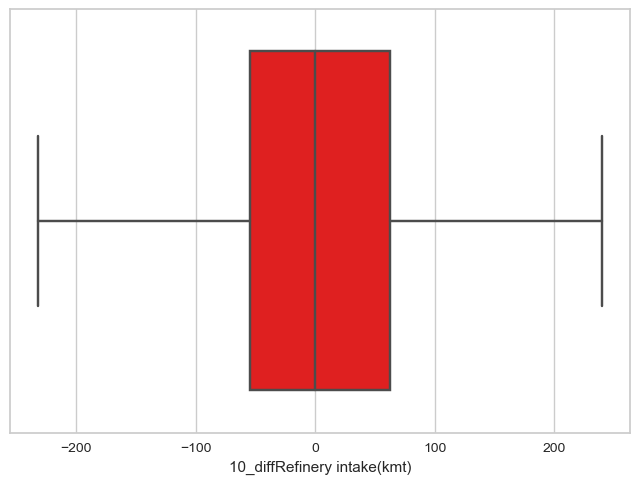

10_diffWTI


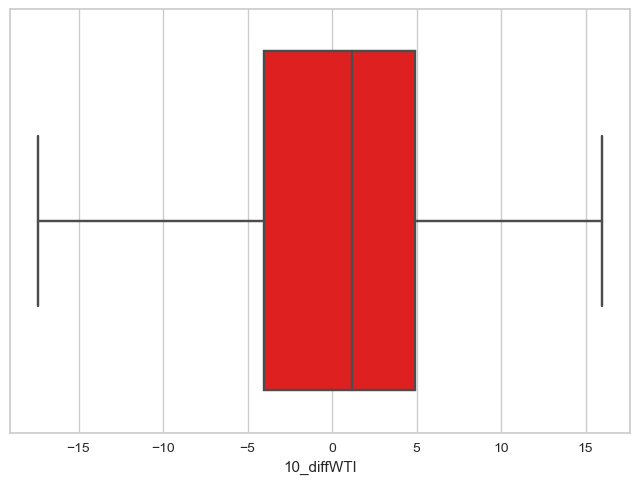

10_diffSumClosing stocks(kmt)


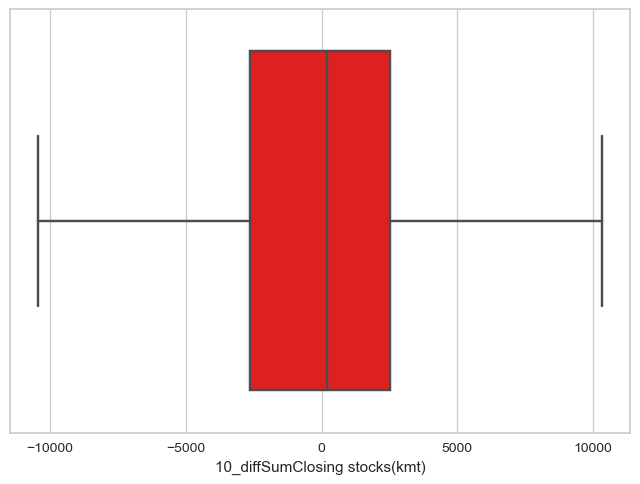

10_diffSumExports(kmt)


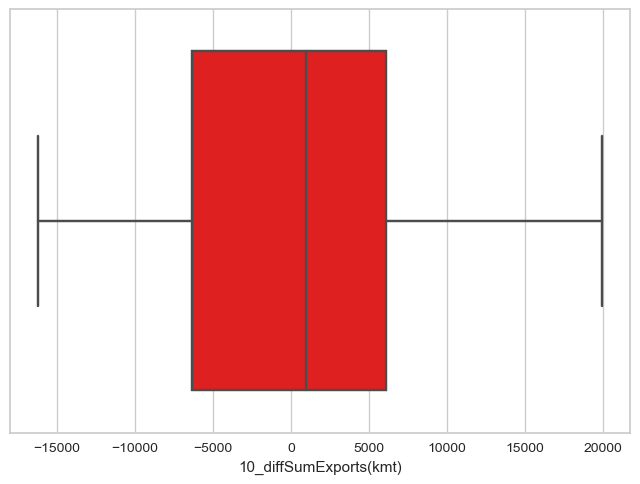

10_diffSumImports(kmt)


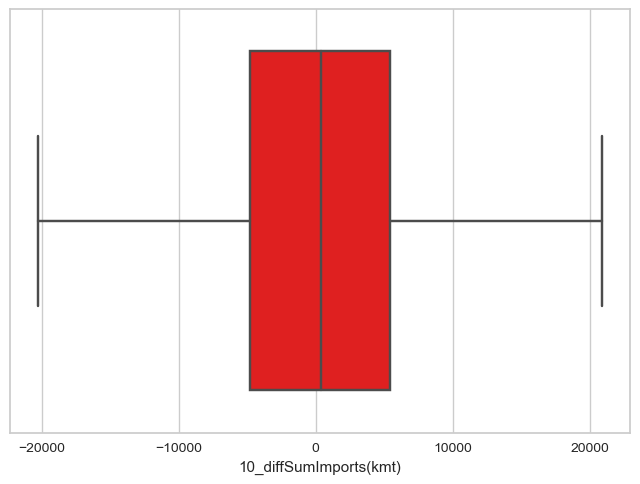

10_diffSumProduction(kmt)


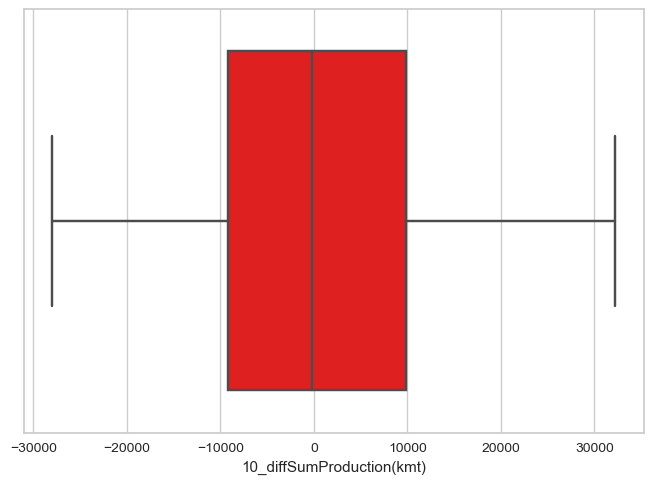

10_diffSumRefinery intake(kmt)


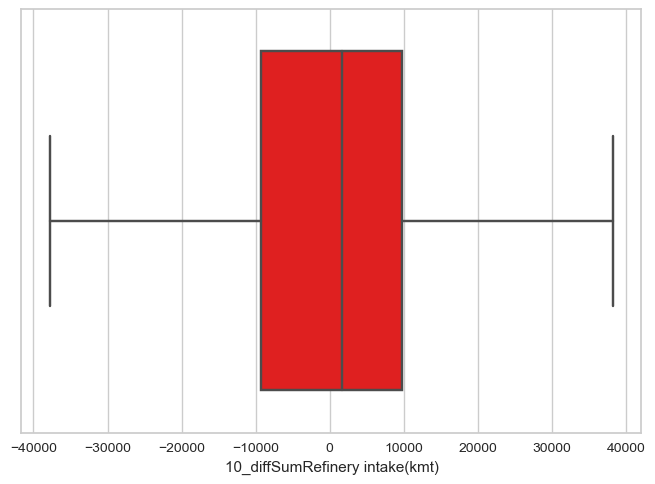

11_diffClosing stocks(kmt)


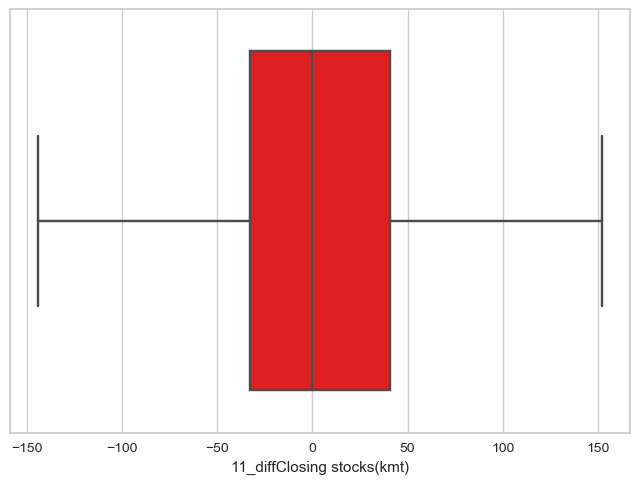

11_diffExports(kmt)


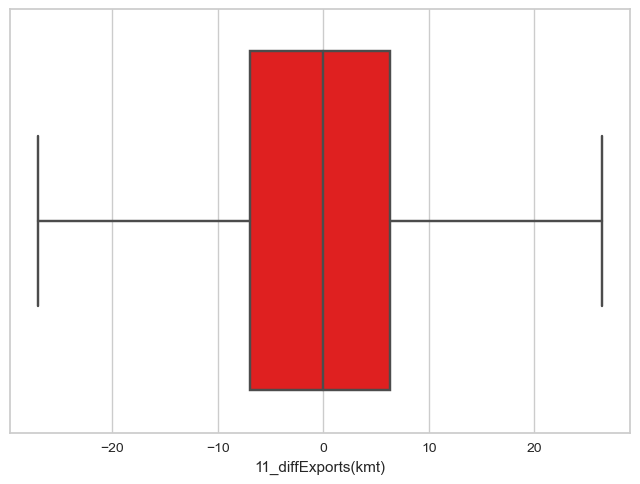

11_diffImports(kmt)


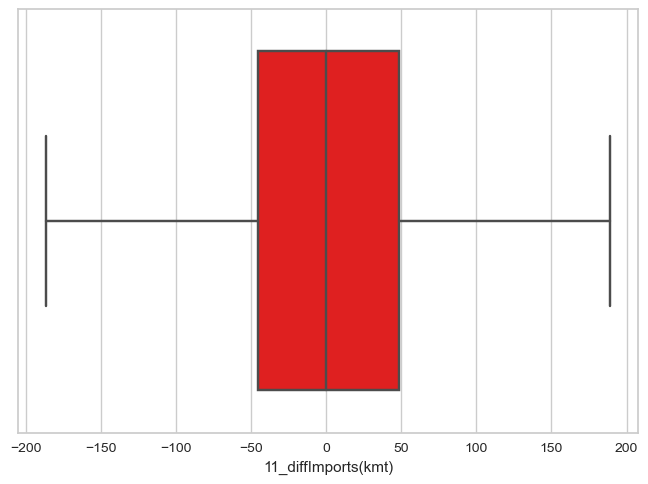

11_diffRefinery intake(kmt)


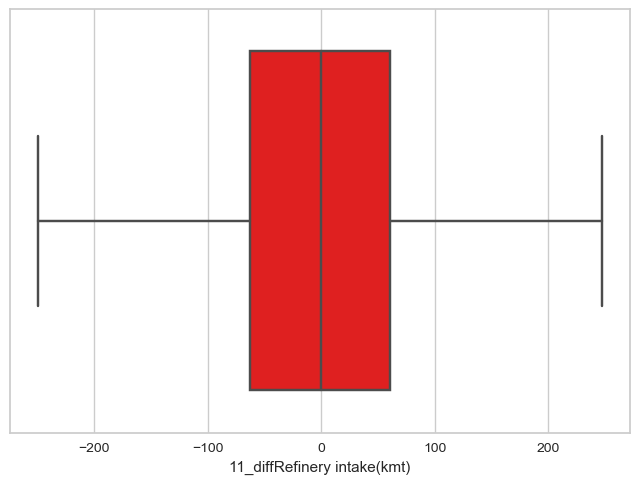

11_diffWTI


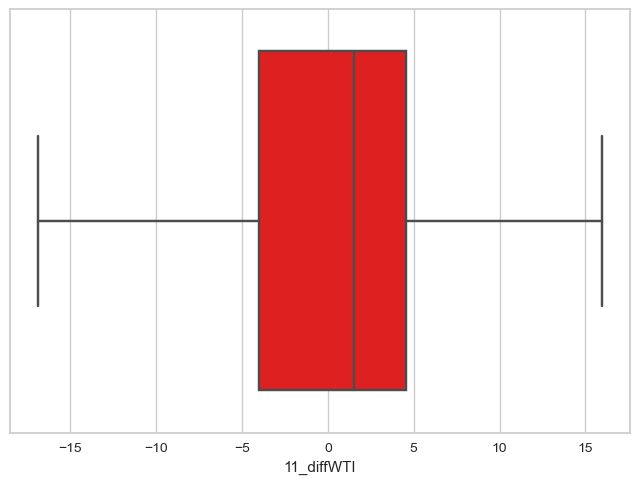

11_diffSumClosing stocks(kmt)


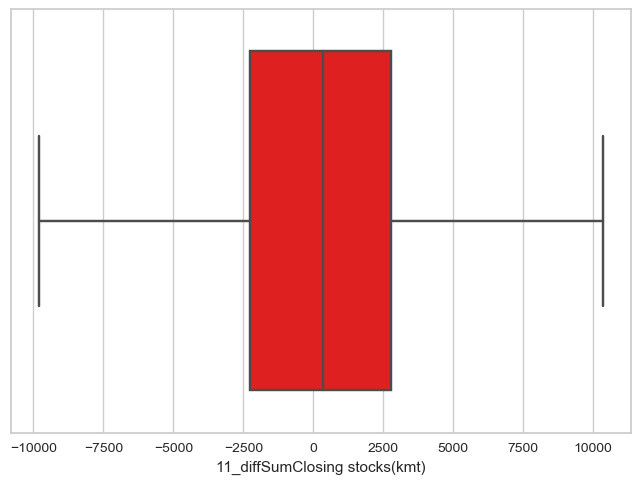

11_diffSumExports(kmt)


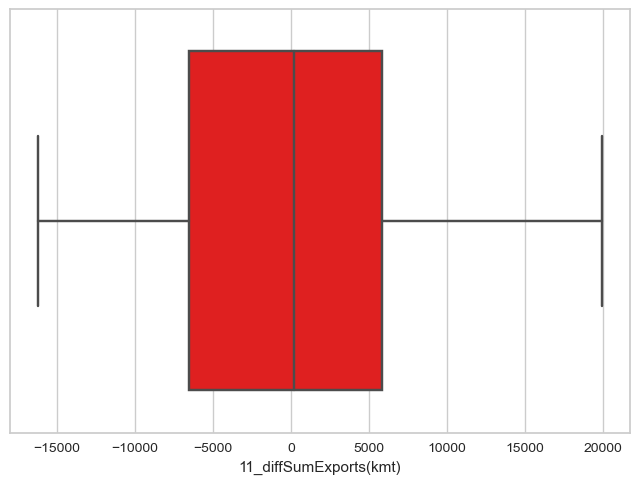

11_diffSumImports(kmt)


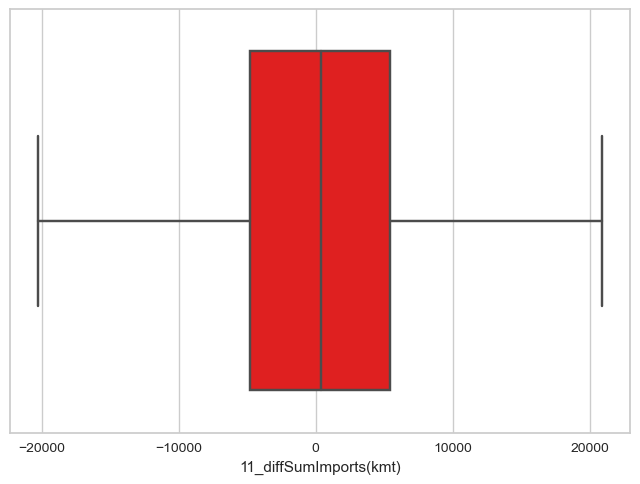

11_diffSumProduction(kmt)


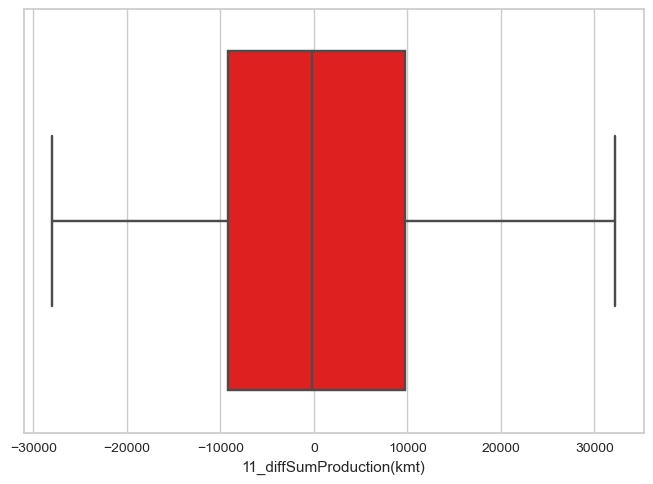

11_diffSumRefinery intake(kmt)


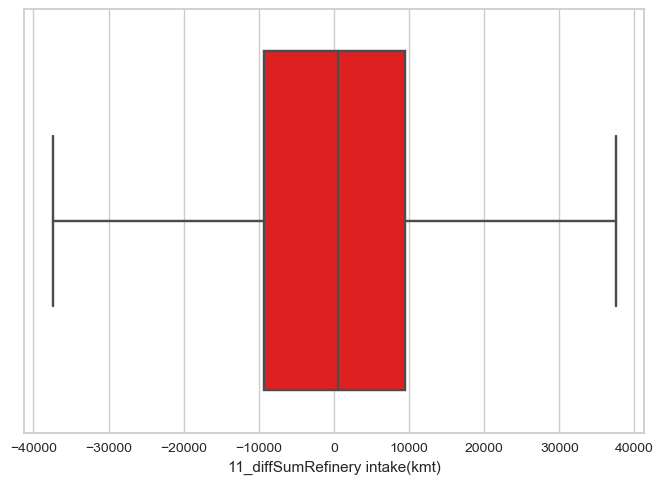

12_diffClosing stocks(kmt)


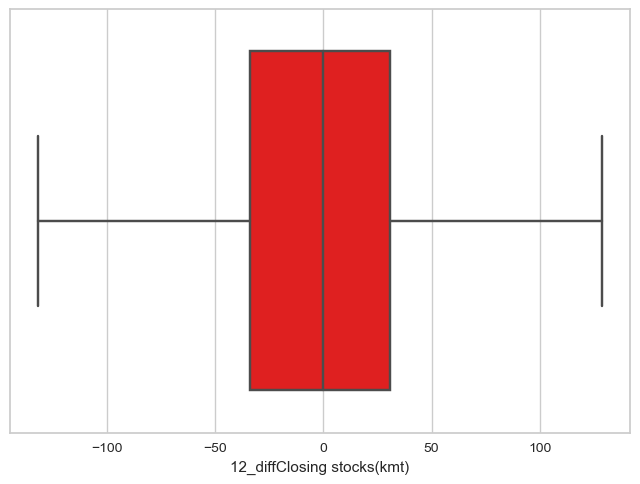

12_diffExports(kmt)


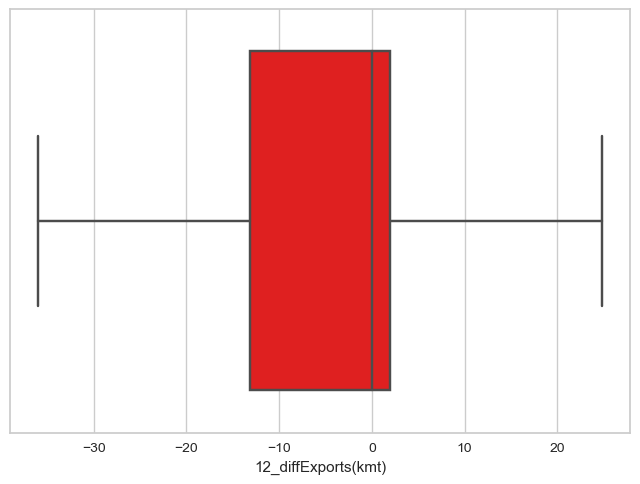

12_diffImports(kmt)


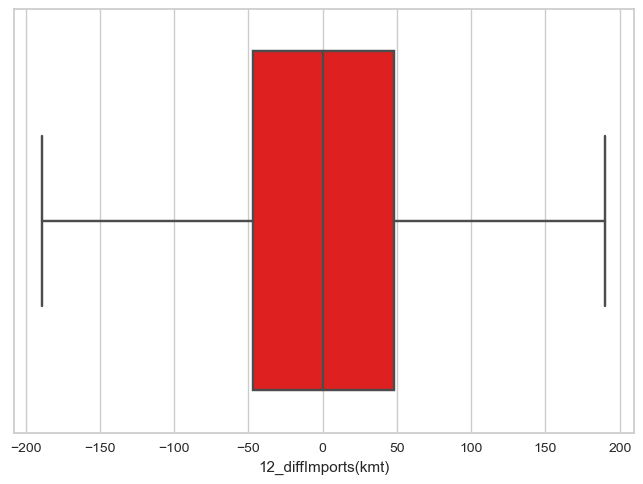

12_diffRefinery intake(kmt)


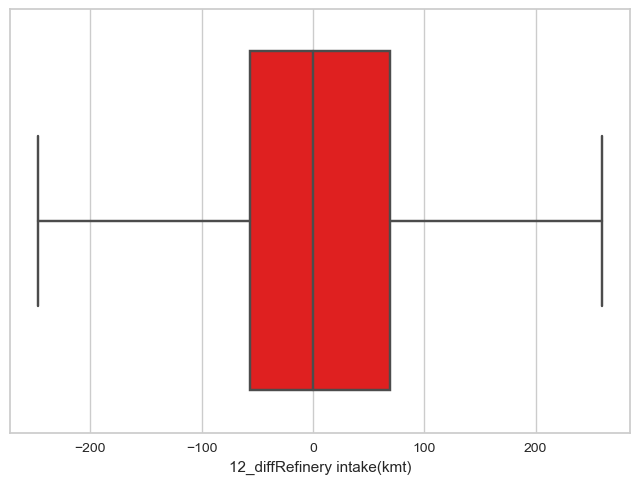

12_diffWTI


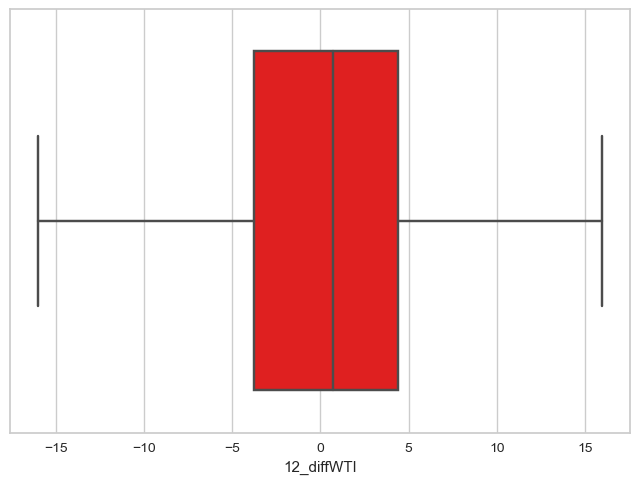

12_diffSumClosing stocks(kmt)


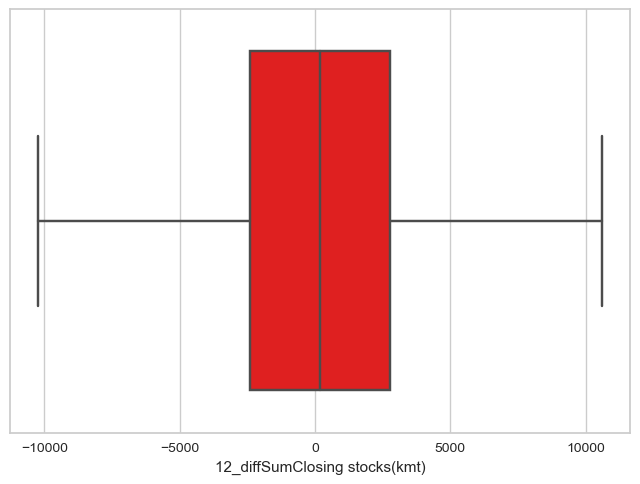

12_diffSumExports(kmt)


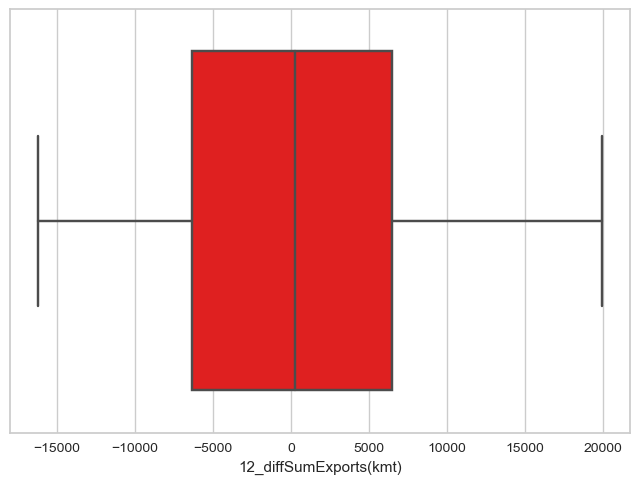

12_diffSumImports(kmt)


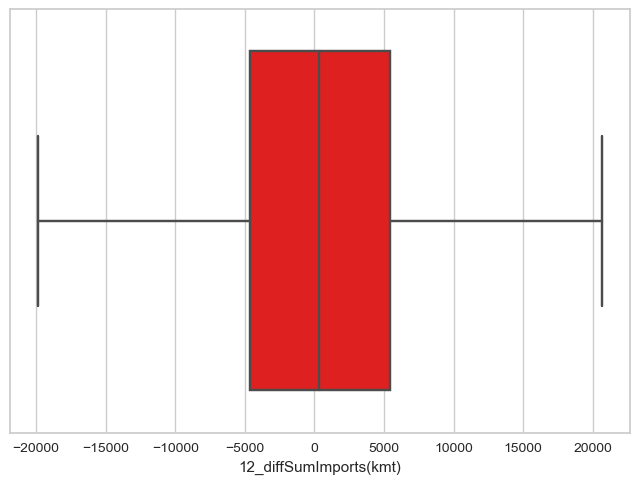

12_diffSumProduction(kmt)


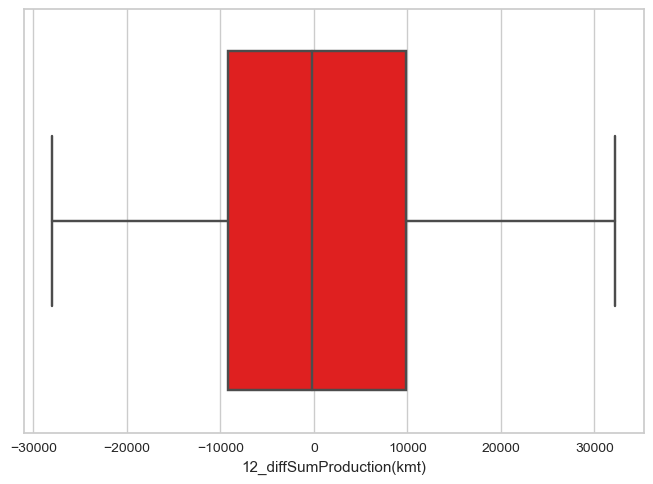

12_diffSumRefinery intake(kmt)


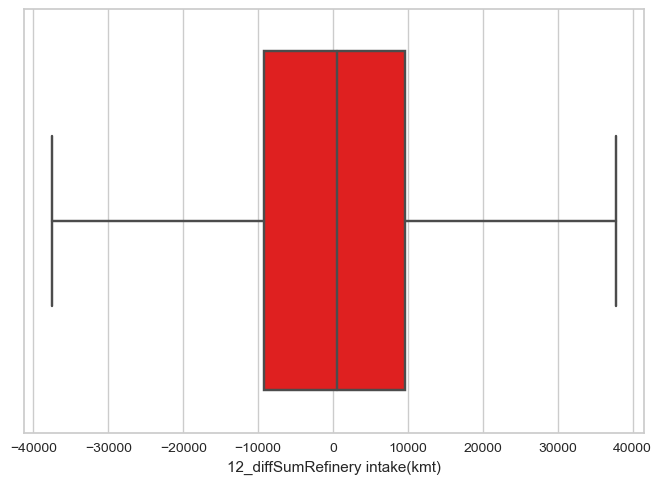

In [151]:
for col in test_df.iloc[:,1:].columns:
    print(col)
    sns.boxplot(x = test_df[col], data = test_df, color = 'red')
    plt.show()

In [152]:
df_test.head()

ID  country  1_diffClosing stocks(kmt)  1_diffExports(kmt)  \
0  ID03667     70.0                    115.000              0.0000   
1  ID06089     67.0                    135.000            -17.5000   
2  ID03095     38.0                    138.625              0.0000   
3  ID02233     54.0                    -12.000              0.0000   
4  ID03119     29.0                      0.000             -0.1492   

   1_diffImports(kmt)  1_diffRefinery intake(kmt)  1_diffWTI  \
0           64.000000                  101.000000       3.47   
1          211.611938                  222.041625       3.73   
2          211.611938                  222.041625      -0.37   
3           -1.000000                   27.000000      -5.95   
4            0.000000                    0.000000       7.92   

   1_diffSumClosing stocks(kmt)  1_diffSumExports(kmt)  1_diffSumImports(kmt)  \
0                    -1389.7911              8409.3483               327.2804   
1                   -10966.1695             10687.6499              3116.7874   
2                     7872.1638              1455.8212              8591.6520   
3                      195.2005              7500.1033              6335.0098   
4                    -2418.4155             -4488.9974             -3279.7480   

   ...  12_diffClosing stocks(kmt)  12_diffExports(kmt)  12_diffImports(kmt)  \
0  ...                  128.756987               0.0000           -74.000000   
1  ...                 -131.928313             -25.0000          -189.217438   
2  ...                 -131.928313               0.0000           190.330463   
3  ...                  -73.000000             -19.0000          -189.217438   
4  ...                    0.000000             -33.4329             0.000000   

   12_diffRefinery intake(kmt)  12_diffWTI  12_diffSumClosing stocks(kmt)  \
0                    -246.9492        1.56                      2053.0322   
1                    -246.9492        4.25                       556.2058   
2                     259.5820        3.29                     -5669.9954   
3                     -62.0000       -5.62                      3217.0304   
4                       0.0000        0.62                       672.6503   

   12_diffSumExports(kmt)  12_diffSumImports(kmt)  12_diffSumProduction(kmt)  \
0             -12407.3611              -6992.4780                -10142.2844   
1              -6009.6068               -893.0590                -11152.6291   
2               6087.2918               -305.7071                  8436.4626   
3              -6563.6422              -3587.5152                -13053.6586   
4               5374.9922               4515.2537                 11351.4010   

   12_diffSumRefinery intake(kmt)  
0                        345.4324  
1                     -37488.0054  
2                      12519.3416  
3                     -13005.0503  
4                      37754.9146  

[5 rows x 122 columns]

In [153]:
test_preds = df_test.iloc[:, 1:]

In [156]:
test_preds = scaler.transform(test_preds)

In [157]:
predict = ada_clf.predict(test_preds)

In [160]:
df_test['Target'] = predict

In [161]:
df_test.head()

ID  country  1_diffClosing stocks(kmt)  1_diffExports(kmt)  \
0  ID03667     70.0                    115.000              0.0000   
1  ID06089     67.0                    135.000            -17.5000   
2  ID03095     38.0                    138.625              0.0000   
3  ID02233     54.0                    -12.000              0.0000   
4  ID03119     29.0                      0.000             -0.1492   

   1_diffImports(kmt)  1_diffRefinery intake(kmt)  1_diffWTI  \
0           64.000000                  101.000000       3.47   
1          211.611938                  222.041625       3.73   
2          211.611938                  222.041625      -0.37   
3           -1.000000                   27.000000      -5.95   
4            0.000000                    0.000000       7.92   

   1_diffSumClosing stocks(kmt)  1_diffSumExports(kmt)  1_diffSumImports(kmt)  \
0                    -1389.7911              8409.3483               327.2804   
1                   -10966.1695             10687.6499              3116.7874   
2                     7872.1638              1455.8212              8591.6520   
3                      195.2005              7500.1033              6335.0098   
4                    -2418.4155             -4488.9974             -3279.7480   

   ...  12_diffExports(kmt)  12_diffImports(kmt)  12_diffRefinery intake(kmt)  \
0  ...               0.0000           -74.000000                    -246.9492   
1  ...             -25.0000          -189.217438                    -246.9492   
2  ...               0.0000           190.330463                     259.5820   
3  ...             -19.0000          -189.217438                     -62.0000   
4  ...             -33.4329             0.000000                       0.0000   

   12_diffWTI  12_diffSumClosing stocks(kmt)  12_diffSumExports(kmt)  \
0        1.56                      2053.0322             -12407.3611   
1        4.25                       556.2058              -6009.6068   
2        3.29                     -5669.9954               6087.2918   
3       -5.62                      3217.0304              -6563.6422   
4        0.62                       672.6503               5374.9922   

   12_diffSumImports(kmt)  12_diffSumProduction(kmt)  \
0              -6992.4780                -10142.2844   
1               -893.0590                -11152.6291   
2               -305.7071                  8436.4626   
3              -3587.5152                -13053.6586   
4               4515.2537                 11351.4010   

   12_diffSumRefinery intake(kmt)  Target  
0                        345.4324       0  
1                     -37488.0054       1  
2                      12519.3416       0  
3                     -13005.0503       1  
4                      37754.9146       0  

[5 rows x 123 columns]

In [162]:
df_test.to_csv('submission_crude.csv', index = False, header = False)